In [1]:
from itertools import chain

import numpy as np
import pandas as pd
import requests
import math

In [2]:
user_games = []

In [3]:
def get_user_games(user_id):
    try:
        pages = int(math.ceil(games_count/20))

        for page in np.arange(1,pages+1):
            print(f'pages number is: {page}')
            url=f"https://api.rawg.io/api/users/{user_id}/games?page={page}"
            print(url)
            response = requests.get(url)
            data = response.json()
#             print(len(data['results']))
            for result in data['results']:
                user_rating = result["user_rating"]
#                 print(user_rating)

                metacritic = result["metacritic"]
#                 print(metacritic)

                rawg_rating = result["rating"]
#                 print(rawg_rating)

                game_release = result["released"]
#                 print (game_release)

                game_id = result['id']
#                 print(game_id)

                game_slut = result["slug"]
#                 print(game_slut)

                game_name = result['name']
#                 print(game_name)
                play_time = result['playtime']

                user_games.append({"user_id":user_id,
                                   "game_id": game_id,
                                   "game_slug":game_slut,
                                   "game_name":game_name,
                                   "user_rating":user_rating,
                                   "metacritic":metacritic,
                                   "rawg_rating":rawg_rating,
                                   "released":game_release,
                                   "play_time":play_time})
    except:
        print ("no user or no user games")
    
    return user_games

In [29]:
try:
    raise TypeError()
except:
    print("catch")

catch


In [4]:
BASE_URL = "https://api.rawg.io/api"

In [5]:
def get_user_game(result, user_id):
    user_rating = result["user_rating"]
#     print(user_rating)

    metacritic = result["metacritic"]
#     print(metacritic) 
    
    rawg_rating = result["rating"]
#     print(rawg_rating)

    game_release = result["released"]
#     print (game_release)

    game_id = result['id']
#     print(game_id)

    game_slut = result["slug"]
#     print(game_slut)

    game_name = result['name']
#     print(game_name)
    play_time = result['playtime']
#     print(play_time)

    user_game = {"user_id":user_id,
                 "game_id": game_id,
                 "game_slug":game_slut,
                 "game_name":game_name,
                 "user_rating":user_rating,
                 "metacritic":metacritic,
                 "rawg_rating":rawg_rating,
                "released":game_release,
                "play_time":play_time}
    
    return user_game

In [6]:
def fetch_game(url):
    response = requests.get(url)
    data = response.json()
    return data

In [7]:
def get_results(results, user_id):
    user_games = []
    for result in results:
        game = get_user_game(result, user_id)
#         print(game)
        user_games.append(game)
    return user_games

In [8]:
def get_user_games(user_id):
    total_user_games = []
    url=BASE_URL + f"/users/{user_id}/games?"
    data = fetch_game(url)
    games = get_results(data['results'], user_id)
    total_user_games.extend(games)
    while data['next'] != None:
        url = data['next']
        data = fetch_game(url)
        games = get_results(data['results'], user_id)
        total_user_games.extend(games)    
#     except:
#         print ("no user or no user games")
    
    return total_user_games

In [9]:
get_user_games('1')

[{'user_id': '1',
  'game_id': 446900,
  'game_slug': 'high-rise-a-puzzle-cityscape',
  'game_name': 'High Rise - A Puzzle Cityscape',
  'user_rating': 4,
  'metacritic': None,
  'rawg_rating': 0.0,
  'released': '2020-05-16',
  'play_time': 0},
 {'user_id': '1',
  'game_id': 264830,
  'game_slug': 'twinfold',
  'game_name': 'Twinfold',
  'user_rating': 5,
  'metacritic': None,
  'rawg_rating': 0.0,
  'released': '2018-12-05',
  'play_time': 0},
 {'user_id': '1',
  'game_id': 58443,
  'game_slug': 'pocket-run-pool',
  'game_name': 'Pocket-Run Pool',
  'user_rating': 4,
  'metacritic': None,
  'rawg_rating': 0.0,
  'released': '2018-05-24',
  'play_time': 0},
 {'user_id': '1',
  'game_id': 51288,
  'game_slug': 'cinco-paus',
  'game_name': 'Cinco Paus',
  'user_rating': 0,
  'metacritic': None,
  'rawg_rating': 0.0,
  'released': '2017-12-25',
  'play_time': 0},
 {'user_id': '1',
  'game_id': 21889,
  'game_slug': 'desert-fox-the-battle-of-el-alamein',
  'game_name': 'Desert Fox: The Ba

In [100]:
# df_ug= pd.DataFrame(chain.from_iterable([get_user_games('agnes4') for u in range]))

In [108]:
df=pd.DataFrame(get_user_games('1'))

In [109]:
df.head(40)

user_id  game_id                            game_slug  \
0        1   446900         high-rise-a-puzzle-cityscape   
1        1   264830                             twinfold   
2        1    58443                      pocket-run-pool   
3        1    51288                           cinco-paus   
4        1    21889  desert-fox-the-battle-of-el-alamein   
5        1   326668                            p1-select   
6        1   311050                          twelvesmith   
7        1   262668                             seesaw-2   
8        1    59052        look-your-loot-a-card-crawler   
9        1    58156                     skies-of-fury-dx   
10       1     6630                          domino-drop   
11       1     1972                       sage-solitaire   
12       1     1190                            imbroglio   
13       1     1175                        lost-frontier   
14       1   252219                                 eloh   
15       1    58940                               drmeep   
16       1     6111                          twofold-inc   
17       1    33613                     indycar-racing-2   
18       1    22515                              topsoil   
19       1   359798                              inbento   
20       1     6675                               zipzap   
21       1     6370                     really-bad-chess   
22       1     6270                                 enyo   
23       1     1867                       desert-golfing   
24       1     1353                              warbits   
25       1     1268                             agricola   
26       1   376790                     card-of-darkness   
27       1   305984                         rush-rally-3   
28       1   254778                     f1-mobile-racing   
29       1    49769                   flipflop-solitaire   
30       1    49332                frost-a-dream-odyssey   
31       1     7118                           marathon-1   
32       1    52095                   meteorfall-journey   
33       1     7987                          last-voyage   
34       1     2227                letterpress-word-game   
35       1     1409                            sorcery-2   
36       1    44560          motorsport-manager-mobile-2   
37       1    34922                   grand-prix-legends   
38       1      273                            typeshift   
39       1   351827                            doom-1993   

                               game_name  user_rating  metacritic  \
0         High Rise - A Puzzle Cityscape            4         NaN   
1                               Twinfold            5         NaN   
2                        Pocket-Run Pool            4         NaN   
3                             Cinco Paus            0         NaN   
4   Desert Fox: The Battle of El Alamein            4         NaN   
5                              P1 Select            5         NaN   
6                            Twelvesmith            0         NaN   
7                                see/saw            4         NaN   
8      Look, Your Loot! - A card crawler            4         NaN   
9                       Skies of Fury DX            3         NaN   
10                           Domino Drop            5         NaN   
11                        Sage Solitaire            4         NaN   
12                             Imbroglio            4         NaN   
13                         Lost Frontier            4         NaN   
14                                  ELOH            0        89.0   
15                               DR.MEEP            4         NaN   
16                          twofold inc.            4         NaN   
17                      IndyCar Racing 2            4         NaN   
18                               Topsoil            0         NaN   
19                               inbento            4         NaN   
20                               Zip—Zap            4         NaN   
21                      

In [6]:
df_ug.head(40)

NameError: name 'df_ug' is not defined

In [35]:
users = pd.read_csv('../raw_data/rawg_users.csv')

In [36]:
# pd.DataFrame(chain.from_iterable([get_user_games(u, 28) for u in range(4)]))

In [37]:
users[['id','games_count']].apply(lambda x: get_user_games(x[0], x[1]),axis=1)

pages number is: 1
https://api.rawg.io/api/users/1/games?page=1
pages number is: 2
https://api.rawg.io/api/users/1/games?page=2
pages number is: 3
https://api.rawg.io/api/users/1/games?page=3
pages number is: 4
https://api.rawg.io/api/users/1/games?page=4
pages number is: 5
https://api.rawg.io/api/users/1/games?page=5
pages number is: 6
https://api.rawg.io/api/users/1/games?page=6
pages number is: 7
https://api.rawg.io/api/users/1/games?page=7
pages number is: 8
https://api.rawg.io/api/users/1/games?page=8
pages number is: 9
https://api.rawg.io/api/users/1/games?page=9
pages number is: 10
https://api.rawg.io/api/users/1/games?page=10
pages number is: 11
https://api.rawg.io/api/users/1/games?page=11
pages number is: 12
https://api.rawg.io/api/users/1/games?page=12
pages number is: 13
https://api.rawg.io/api/users/1/games?page=13
pages number is: 14
https://api.rawg.io/api/users/1/games?page=14
pages number is: 15
https://api.rawg.io/api/users/1/games?page=15
pages number is: 16
https://

pages number is: 4
https://api.rawg.io/api/users/18/games?page=4
pages number is: 5
https://api.rawg.io/api/users/18/games?page=5
pages number is: 6
https://api.rawg.io/api/users/18/games?page=6
pages number is: 7
https://api.rawg.io/api/users/18/games?page=7
pages number is: 8
https://api.rawg.io/api/users/18/games?page=8
pages number is: 9
https://api.rawg.io/api/users/18/games?page=9
pages number is: 10
https://api.rawg.io/api/users/18/games?page=10
pages number is: 11
https://api.rawg.io/api/users/18/games?page=11
pages number is: 12
https://api.rawg.io/api/users/18/games?page=12
pages number is: 13
https://api.rawg.io/api/users/18/games?page=13
pages number is: 14
https://api.rawg.io/api/users/18/games?page=14
pages number is: 15
https://api.rawg.io/api/users/18/games?page=15
pages number is: 16
https://api.rawg.io/api/users/18/games?page=16
pages number is: 17
https://api.rawg.io/api/users/18/games?page=17
pages number is: 1
https://api.rawg.io/api/users/19/games?page=1
pages num

pages number is: 32
https://api.rawg.io/api/users/25/games?page=32
pages number is: 33
https://api.rawg.io/api/users/25/games?page=33
pages number is: 34
https://api.rawg.io/api/users/25/games?page=34
pages number is: 35
https://api.rawg.io/api/users/25/games?page=35
pages number is: 36
https://api.rawg.io/api/users/25/games?page=36
pages number is: 37
https://api.rawg.io/api/users/25/games?page=37
pages number is: 38
https://api.rawg.io/api/users/25/games?page=38
pages number is: 39
https://api.rawg.io/api/users/25/games?page=39
pages number is: 40
https://api.rawg.io/api/users/25/games?page=40
pages number is: 41
https://api.rawg.io/api/users/25/games?page=41
pages number is: 42
https://api.rawg.io/api/users/25/games?page=42
pages number is: 43
https://api.rawg.io/api/users/25/games?page=43
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/26/games?page=1
pages number is: 2
https://api.rawg.io/api/users/26/games?page=2
pages number is: 3
https://api.rawg.io/ap

pages number is: 1
https://api.rawg.io/api/users/35/games?page=1
pages number is: 1
https://api.rawg.io/api/users/36/games?page=1
pages number is: 2
https://api.rawg.io/api/users/36/games?page=2
pages number is: 3
https://api.rawg.io/api/users/36/games?page=3
pages number is: 4
https://api.rawg.io/api/users/36/games?page=4
pages number is: 5
https://api.rawg.io/api/users/36/games?page=5
pages number is: 6
https://api.rawg.io/api/users/36/games?page=6
pages number is: 7
https://api.rawg.io/api/users/36/games?page=7
pages number is: 8
https://api.rawg.io/api/users/36/games?page=8
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/37/games?page=1
pages number is: 2
https://api.rawg.io/api/users/37/games?page=2
pages number is: 3
https://api.rawg.io/api/users/37/games?page=3
pages number is: 4
https://api.rawg.io/api/users/37/games?page=4
pages number is: 5
https://api.rawg.io/api/users/37/games?page=5
no user or no user games
pages number is: 1
https://api.rawg.io/a

pages number is: 19
https://api.rawg.io/api/users/45/games?page=19
pages number is: 20
https://api.rawg.io/api/users/45/games?page=20
pages number is: 21
https://api.rawg.io/api/users/45/games?page=21
pages number is: 22
https://api.rawg.io/api/users/45/games?page=22
pages number is: 23
https://api.rawg.io/api/users/45/games?page=23
pages number is: 24
https://api.rawg.io/api/users/45/games?page=24
pages number is: 25
https://api.rawg.io/api/users/45/games?page=25
pages number is: 26
https://api.rawg.io/api/users/45/games?page=26
pages number is: 27
https://api.rawg.io/api/users/45/games?page=27
pages number is: 28
https://api.rawg.io/api/users/45/games?page=28
pages number is: 29
https://api.rawg.io/api/users/45/games?page=29
pages number is: 30
https://api.rawg.io/api/users/45/games?page=30
pages number is: 31
https://api.rawg.io/api/users/45/games?page=31
pages number is: 1
https://api.rawg.io/api/users/46/games?page=1
pages number is: 2
https://api.rawg.io/api/users/46/games?page=2

pages number is: 30
https://api.rawg.io/api/users/54/games?page=30
pages number is: 31
https://api.rawg.io/api/users/54/games?page=31
pages number is: 32
https://api.rawg.io/api/users/54/games?page=32
pages number is: 33
https://api.rawg.io/api/users/54/games?page=33
pages number is: 34
https://api.rawg.io/api/users/54/games?page=34
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/55/games?page=1
pages number is: 2
https://api.rawg.io/api/users/55/games?page=2
pages number is: 1
https://api.rawg.io/api/users/56/games?page=1
pages number is: 2
https://api.rawg.io/api/users/56/games?page=2
pages number is: 3
https://api.rawg.io/api/users/56/games?page=3
pages number is: 4
https://api.rawg.io/api/users/56/games?page=4
pages number is: 5
https://api.rawg.io/api/users/56/games?page=5
pages number is: 1
https://api.rawg.io/api/users/58/games?page=1
pages number is: 2
https://api.rawg.io/api/users/58/games?page=2
pages number is: 3
https://api.rawg.io/api/users/58/gam

pages number is: 13
https://api.rawg.io/api/users/69/games?page=13
pages number is: 14
https://api.rawg.io/api/users/69/games?page=14
pages number is: 15
https://api.rawg.io/api/users/69/games?page=15
pages number is: 16
https://api.rawg.io/api/users/69/games?page=16
pages number is: 17
https://api.rawg.io/api/users/69/games?page=17
pages number is: 18
https://api.rawg.io/api/users/69/games?page=18
pages number is: 19
https://api.rawg.io/api/users/69/games?page=19
pages number is: 20
https://api.rawg.io/api/users/69/games?page=20
pages number is: 21
https://api.rawg.io/api/users/69/games?page=21
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/70/games?page=1
pages number is: 2
https://api.rawg.io/api/users/70/games?page=2
pages number is: 3
https://api.rawg.io/api/users/70/games?page=3
pages number is: 4
https://api.rawg.io/api/users/70/games?page=4
pages number is: 5
https://api.rawg.io/api/users/70/games?page=5
pages number is: 6
https://api.rawg.io/api/user

pages number is: 2
https://api.rawg.io/api/users/87/games?page=2
pages number is: 3
https://api.rawg.io/api/users/87/games?page=3
pages number is: 4
https://api.rawg.io/api/users/87/games?page=4
pages number is: 5
https://api.rawg.io/api/users/87/games?page=5
pages number is: 6
https://api.rawg.io/api/users/87/games?page=6
pages number is: 7
https://api.rawg.io/api/users/87/games?page=7
pages number is: 8
https://api.rawg.io/api/users/87/games?page=8
pages number is: 9
https://api.rawg.io/api/users/87/games?page=9
pages number is: 10
https://api.rawg.io/api/users/87/games?page=10
pages number is: 11
https://api.rawg.io/api/users/87/games?page=11
pages number is: 12
https://api.rawg.io/api/users/87/games?page=12
pages number is: 13
https://api.rawg.io/api/users/87/games?page=13
pages number is: 14
https://api.rawg.io/api/users/87/games?page=14
pages number is: 15
https://api.rawg.io/api/users/87/games?page=15
pages number is: 16
https://api.rawg.io/api/users/87/games?page=16
pages numbe

pages number is: 5
https://api.rawg.io/api/users/105/games?page=5
pages number is: 1
https://api.rawg.io/api/users/106/games?page=1
pages number is: 2
https://api.rawg.io/api/users/106/games?page=2
pages number is: 3
https://api.rawg.io/api/users/106/games?page=3
pages number is: 4
https://api.rawg.io/api/users/106/games?page=4
pages number is: 1
https://api.rawg.io/api/users/107/games?page=1
pages number is: 1
https://api.rawg.io/api/users/108/games?page=1
pages number is: 2
https://api.rawg.io/api/users/108/games?page=2
pages number is: 3
https://api.rawg.io/api/users/108/games?page=3
pages number is: 4
https://api.rawg.io/api/users/108/games?page=4
pages number is: 5
https://api.rawg.io/api/users/108/games?page=5
pages number is: 6
https://api.rawg.io/api/users/108/games?page=6
pages number is: 7
https://api.rawg.io/api/users/108/games?page=7
pages number is: 8
https://api.rawg.io/api/users/108/games?page=8
pages number is: 9
https://api.rawg.io/api/users/108/games?page=9
pages numb

pages number is: 19
https://api.rawg.io/api/users/112/games?page=19
pages number is: 20
https://api.rawg.io/api/users/112/games?page=20
pages number is: 1
https://api.rawg.io/api/users/113/games?page=1
pages number is: 2
https://api.rawg.io/api/users/113/games?page=2
pages number is: 3
https://api.rawg.io/api/users/113/games?page=3
pages number is: 4
https://api.rawg.io/api/users/113/games?page=4
pages number is: 5
https://api.rawg.io/api/users/113/games?page=5
pages number is: 6
https://api.rawg.io/api/users/113/games?page=6
pages number is: 7
https://api.rawg.io/api/users/113/games?page=7
pages number is: 8
https://api.rawg.io/api/users/113/games?page=8
pages number is: 9
https://api.rawg.io/api/users/113/games?page=9
pages number is: 10
https://api.rawg.io/api/users/113/games?page=10
pages number is: 11
https://api.rawg.io/api/users/113/games?page=11
pages number is: 12
https://api.rawg.io/api/users/113/games?page=12
pages number is: 13
https://api.rawg.io/api/users/113/games?page=1

pages number is: 59
https://api.rawg.io/api/users/128/games?page=59
pages number is: 60
https://api.rawg.io/api/users/128/games?page=60
pages number is: 61
https://api.rawg.io/api/users/128/games?page=61
pages number is: 62
https://api.rawg.io/api/users/128/games?page=62
pages number is: 63
https://api.rawg.io/api/users/128/games?page=63
pages number is: 64
https://api.rawg.io/api/users/128/games?page=64
pages number is: 65
https://api.rawg.io/api/users/128/games?page=65
pages number is: 66
https://api.rawg.io/api/users/128/games?page=66
pages number is: 67
https://api.rawg.io/api/users/128/games?page=67
pages number is: 68
https://api.rawg.io/api/users/128/games?page=68
pages number is: 69
https://api.rawg.io/api/users/128/games?page=69
pages number is: 70
https://api.rawg.io/api/users/128/games?page=70
pages number is: 71
https://api.rawg.io/api/users/128/games?page=71
pages number is: 72
https://api.rawg.io/api/users/128/games?page=72
pages number is: 73
https://api.rawg.io/api/user

pages number is: 3
https://api.rawg.io/api/users/135/games?page=3
pages number is: 4
https://api.rawg.io/api/users/135/games?page=4
pages number is: 5
https://api.rawg.io/api/users/135/games?page=5
pages number is: 6
https://api.rawg.io/api/users/135/games?page=6
pages number is: 7
https://api.rawg.io/api/users/135/games?page=7
pages number is: 8
https://api.rawg.io/api/users/135/games?page=8
pages number is: 9
https://api.rawg.io/api/users/135/games?page=9
pages number is: 10
https://api.rawg.io/api/users/135/games?page=10
pages number is: 11
https://api.rawg.io/api/users/135/games?page=11
pages number is: 12
https://api.rawg.io/api/users/135/games?page=12
pages number is: 13
https://api.rawg.io/api/users/135/games?page=13
pages number is: 14
https://api.rawg.io/api/users/135/games?page=14
pages number is: 15
https://api.rawg.io/api/users/135/games?page=15
pages number is: 16
https://api.rawg.io/api/users/135/games?page=16
pages number is: 17
https://api.rawg.io/api/users/135/games?pa

pages number is: 49
https://api.rawg.io/api/users/142/games?page=49
pages number is: 50
https://api.rawg.io/api/users/142/games?page=50
pages number is: 51
https://api.rawg.io/api/users/142/games?page=51
pages number is: 52
https://api.rawg.io/api/users/142/games?page=52
pages number is: 53
https://api.rawg.io/api/users/142/games?page=53
pages number is: 54
https://api.rawg.io/api/users/142/games?page=54
pages number is: 55
https://api.rawg.io/api/users/142/games?page=55
pages number is: 56
https://api.rawg.io/api/users/142/games?page=56
pages number is: 57
https://api.rawg.io/api/users/142/games?page=57
pages number is: 58
https://api.rawg.io/api/users/142/games?page=58
pages number is: 59
https://api.rawg.io/api/users/142/games?page=59
pages number is: 60
https://api.rawg.io/api/users/142/games?page=60
pages number is: 61
https://api.rawg.io/api/users/142/games?page=61
pages number is: 62
https://api.rawg.io/api/users/142/games?page=62
pages number is: 63
https://api.rawg.io/api/user

pages number is: 168
https://api.rawg.io/api/users/142/games?page=168
pages number is: 169
https://api.rawg.io/api/users/142/games?page=169
pages number is: 170
https://api.rawg.io/api/users/142/games?page=170
pages number is: 171
https://api.rawg.io/api/users/142/games?page=171
pages number is: 172
https://api.rawg.io/api/users/142/games?page=172
pages number is: 173
https://api.rawg.io/api/users/142/games?page=173
pages number is: 174
https://api.rawg.io/api/users/142/games?page=174
pages number is: 175
https://api.rawg.io/api/users/142/games?page=175
pages number is: 176
https://api.rawg.io/api/users/142/games?page=176
pages number is: 177
https://api.rawg.io/api/users/142/games?page=177
pages number is: 178
https://api.rawg.io/api/users/142/games?page=178
pages number is: 179
https://api.rawg.io/api/users/142/games?page=179
pages number is: 180
https://api.rawg.io/api/users/142/games?page=180
pages number is: 181
https://api.rawg.io/api/users/142/games?page=181
pages number is: 182

pages number is: 2
https://api.rawg.io/api/users/146/games?page=2
pages number is: 3
https://api.rawg.io/api/users/146/games?page=3
pages number is: 4
https://api.rawg.io/api/users/146/games?page=4
pages number is: 5
https://api.rawg.io/api/users/146/games?page=5
pages number is: 6
https://api.rawg.io/api/users/146/games?page=6
pages number is: 7
https://api.rawg.io/api/users/146/games?page=7
pages number is: 8
https://api.rawg.io/api/users/146/games?page=8
pages number is: 9
https://api.rawg.io/api/users/146/games?page=9
pages number is: 10
https://api.rawg.io/api/users/146/games?page=10
pages number is: 11
https://api.rawg.io/api/users/146/games?page=11
pages number is: 12
https://api.rawg.io/api/users/146/games?page=12
pages number is: 13
https://api.rawg.io/api/users/146/games?page=13
pages number is: 14
https://api.rawg.io/api/users/146/games?page=14
pages number is: 15
https://api.rawg.io/api/users/146/games?page=15
pages number is: 16
https://api.rawg.io/api/users/146/games?page

pages number is: 14
https://api.rawg.io/api/users/153/games?page=14
pages number is: 1
https://api.rawg.io/api/users/154/games?page=1
pages number is: 2
https://api.rawg.io/api/users/154/games?page=2
pages number is: 3
https://api.rawg.io/api/users/154/games?page=3
pages number is: 4
https://api.rawg.io/api/users/154/games?page=4
pages number is: 5
https://api.rawg.io/api/users/154/games?page=5
pages number is: 6
https://api.rawg.io/api/users/154/games?page=6
pages number is: 7
https://api.rawg.io/api/users/154/games?page=7
pages number is: 8
https://api.rawg.io/api/users/154/games?page=8
pages number is: 9
https://api.rawg.io/api/users/154/games?page=9
pages number is: 1
https://api.rawg.io/api/users/155/games?page=1
pages number is: 2
https://api.rawg.io/api/users/155/games?page=2
pages number is: 3
https://api.rawg.io/api/users/155/games?page=3
pages number is: 4
https://api.rawg.io/api/users/155/games?page=4
pages number is: 5
https://api.rawg.io/api/users/155/games?page=5
pages nu

pages number is: 25
https://api.rawg.io/api/users/162/games?page=25
pages number is: 26
https://api.rawg.io/api/users/162/games?page=26
pages number is: 27
https://api.rawg.io/api/users/162/games?page=27
pages number is: 28
https://api.rawg.io/api/users/162/games?page=28
pages number is: 29
https://api.rawg.io/api/users/162/games?page=29
pages number is: 30
https://api.rawg.io/api/users/162/games?page=30
pages number is: 31
https://api.rawg.io/api/users/162/games?page=31
pages number is: 32
https://api.rawg.io/api/users/162/games?page=32
pages number is: 33
https://api.rawg.io/api/users/162/games?page=33
pages number is: 34
https://api.rawg.io/api/users/162/games?page=34
pages number is: 35
https://api.rawg.io/api/users/162/games?page=35
pages number is: 36
https://api.rawg.io/api/users/162/games?page=36
pages number is: 37
https://api.rawg.io/api/users/162/games?page=37
pages number is: 38
https://api.rawg.io/api/users/162/games?page=38
pages number is: 39
https://api.rawg.io/api/user

pages number is: 3
https://api.rawg.io/api/users/174/games?page=3
pages number is: 4
https://api.rawg.io/api/users/174/games?page=4
pages number is: 5
https://api.rawg.io/api/users/174/games?page=5
pages number is: 6
https://api.rawg.io/api/users/174/games?page=6
pages number is: 7
https://api.rawg.io/api/users/174/games?page=7
pages number is: 1
https://api.rawg.io/api/users/175/games?page=1
pages number is: 2
https://api.rawg.io/api/users/175/games?page=2
pages number is: 3
https://api.rawg.io/api/users/175/games?page=3
pages number is: 4
https://api.rawg.io/api/users/175/games?page=4
pages number is: 5
https://api.rawg.io/api/users/175/games?page=5
pages number is: 6
https://api.rawg.io/api/users/175/games?page=6
pages number is: 7
https://api.rawg.io/api/users/175/games?page=7
pages number is: 8
https://api.rawg.io/api/users/175/games?page=8
pages number is: 9
https://api.rawg.io/api/users/175/games?page=9
pages number is: 10
https://api.rawg.io/api/users/175/games?page=10
pages nu

pages number is: 49
https://api.rawg.io/api/users/184/games?page=49
pages number is: 50
https://api.rawg.io/api/users/184/games?page=50
pages number is: 51
https://api.rawg.io/api/users/184/games?page=51
pages number is: 52
https://api.rawg.io/api/users/184/games?page=52
pages number is: 53
https://api.rawg.io/api/users/184/games?page=53
pages number is: 54
https://api.rawg.io/api/users/184/games?page=54
pages number is: 55
https://api.rawg.io/api/users/184/games?page=55
pages number is: 56
https://api.rawg.io/api/users/184/games?page=56
pages number is: 57
https://api.rawg.io/api/users/184/games?page=57
pages number is: 58
https://api.rawg.io/api/users/184/games?page=58
pages number is: 1
https://api.rawg.io/api/users/185/games?page=1
pages number is: 2
https://api.rawg.io/api/users/185/games?page=2
pages number is: 3
https://api.rawg.io/api/users/185/games?page=3
pages number is: 4
https://api.rawg.io/api/users/185/games?page=4
pages number is: 5
https://api.rawg.io/api/users/185/gam

pages number is: 91
https://api.rawg.io/api/users/187/games?page=91
pages number is: 92
https://api.rawg.io/api/users/187/games?page=92
pages number is: 93
https://api.rawg.io/api/users/187/games?page=93
pages number is: 94
https://api.rawg.io/api/users/187/games?page=94
pages number is: 95
https://api.rawg.io/api/users/187/games?page=95
pages number is: 96
https://api.rawg.io/api/users/187/games?page=96
pages number is: 97
https://api.rawg.io/api/users/187/games?page=97
pages number is: 98
https://api.rawg.io/api/users/187/games?page=98
pages number is: 99
https://api.rawg.io/api/users/187/games?page=99
pages number is: 100
https://api.rawg.io/api/users/187/games?page=100
pages number is: 101
https://api.rawg.io/api/users/187/games?page=101
pages number is: 102
https://api.rawg.io/api/users/187/games?page=102
pages number is: 103
https://api.rawg.io/api/users/187/games?page=103
pages number is: 104
https://api.rawg.io/api/users/187/games?page=104
pages number is: 105
https://api.rawg.

pages number is: 209
https://api.rawg.io/api/users/187/games?page=209
pages number is: 210
https://api.rawg.io/api/users/187/games?page=210
pages number is: 211
https://api.rawg.io/api/users/187/games?page=211
pages number is: 212
https://api.rawg.io/api/users/187/games?page=212
pages number is: 213
https://api.rawg.io/api/users/187/games?page=213
pages number is: 214
https://api.rawg.io/api/users/187/games?page=214
pages number is: 215
https://api.rawg.io/api/users/187/games?page=215
pages number is: 216
https://api.rawg.io/api/users/187/games?page=216
pages number is: 217
https://api.rawg.io/api/users/187/games?page=217
pages number is: 218
https://api.rawg.io/api/users/187/games?page=218
pages number is: 219
https://api.rawg.io/api/users/187/games?page=219
pages number is: 220
https://api.rawg.io/api/users/187/games?page=220
pages number is: 221
https://api.rawg.io/api/users/187/games?page=221
pages number is: 222
https://api.rawg.io/api/users/187/games?page=222
pages number is: 223

pages number is: 4
https://api.rawg.io/api/users/196/games?page=4
pages number is: 5
https://api.rawg.io/api/users/196/games?page=5
pages number is: 6
https://api.rawg.io/api/users/196/games?page=6
pages number is: 7
https://api.rawg.io/api/users/196/games?page=7
pages number is: 8
https://api.rawg.io/api/users/196/games?page=8
pages number is: 9
https://api.rawg.io/api/users/196/games?page=9
pages number is: 1
https://api.rawg.io/api/users/197/games?page=1
pages number is: 2
https://api.rawg.io/api/users/197/games?page=2
pages number is: 3
https://api.rawg.io/api/users/197/games?page=3
pages number is: 4
https://api.rawg.io/api/users/197/games?page=4
pages number is: 5
https://api.rawg.io/api/users/197/games?page=5
pages number is: 6
https://api.rawg.io/api/users/197/games?page=6
pages number is: 7
https://api.rawg.io/api/users/197/games?page=7
pages number is: 8
https://api.rawg.io/api/users/197/games?page=8
pages number is: 1
https://api.rawg.io/api/users/198/games?page=1
pages numb

pages number is: 55
https://api.rawg.io/api/users/205/games?page=55
pages number is: 56
https://api.rawg.io/api/users/205/games?page=56
pages number is: 57
https://api.rawg.io/api/users/205/games?page=57
pages number is: 58
https://api.rawg.io/api/users/205/games?page=58
pages number is: 59
https://api.rawg.io/api/users/205/games?page=59
pages number is: 60
https://api.rawg.io/api/users/205/games?page=60
pages number is: 61
https://api.rawg.io/api/users/205/games?page=61
pages number is: 62
https://api.rawg.io/api/users/205/games?page=62
pages number is: 63
https://api.rawg.io/api/users/205/games?page=63
pages number is: 64
https://api.rawg.io/api/users/205/games?page=64
pages number is: 65
https://api.rawg.io/api/users/205/games?page=65
pages number is: 66
https://api.rawg.io/api/users/205/games?page=66
pages number is: 67
https://api.rawg.io/api/users/205/games?page=67
pages number is: 68
https://api.rawg.io/api/users/205/games?page=68
pages number is: 69
https://api.rawg.io/api/user

pages number is: 174
https://api.rawg.io/api/users/205/games?page=174
pages number is: 175
https://api.rawg.io/api/users/205/games?page=175
pages number is: 176
https://api.rawg.io/api/users/205/games?page=176
pages number is: 177
https://api.rawg.io/api/users/205/games?page=177
pages number is: 178
https://api.rawg.io/api/users/205/games?page=178
pages number is: 179
https://api.rawg.io/api/users/205/games?page=179
pages number is: 180
https://api.rawg.io/api/users/205/games?page=180
pages number is: 181
https://api.rawg.io/api/users/205/games?page=181
pages number is: 182
https://api.rawg.io/api/users/205/games?page=182
pages number is: 183
https://api.rawg.io/api/users/205/games?page=183
pages number is: 184
https://api.rawg.io/api/users/205/games?page=184
pages number is: 185
https://api.rawg.io/api/users/205/games?page=185
pages number is: 186
https://api.rawg.io/api/users/205/games?page=186
pages number is: 187
https://api.rawg.io/api/users/205/games?page=187
pages number is: 188

pages number is: 1
https://api.rawg.io/api/users/211/games?page=1
pages number is: 2
https://api.rawg.io/api/users/211/games?page=2
pages number is: 3
https://api.rawg.io/api/users/211/games?page=3
pages number is: 4
https://api.rawg.io/api/users/211/games?page=4
pages number is: 5
https://api.rawg.io/api/users/211/games?page=5
pages number is: 6
https://api.rawg.io/api/users/211/games?page=6
pages number is: 7
https://api.rawg.io/api/users/211/games?page=7
pages number is: 8
https://api.rawg.io/api/users/211/games?page=8
pages number is: 9
https://api.rawg.io/api/users/211/games?page=9
pages number is: 1
https://api.rawg.io/api/users/212/games?page=1
pages number is: 1
https://api.rawg.io/api/users/213/games?page=1
pages number is: 1
https://api.rawg.io/api/users/214/games?page=1
pages number is: 2
https://api.rawg.io/api/users/214/games?page=2
pages number is: 3
https://api.rawg.io/api/users/214/games?page=3
pages number is: 4
https://api.rawg.io/api/users/214/games?page=4
pages numb

pages number is: 1
https://api.rawg.io/api/users/223/games?page=1
pages number is: 2
https://api.rawg.io/api/users/223/games?page=2
pages number is: 3
https://api.rawg.io/api/users/223/games?page=3
pages number is: 4
https://api.rawg.io/api/users/223/games?page=4
pages number is: 5
https://api.rawg.io/api/users/223/games?page=5
pages number is: 1
https://api.rawg.io/api/users/224/games?page=1
pages number is: 2
https://api.rawg.io/api/users/224/games?page=2
pages number is: 3
https://api.rawg.io/api/users/224/games?page=3
pages number is: 4
https://api.rawg.io/api/users/224/games?page=4
pages number is: 5
https://api.rawg.io/api/users/224/games?page=5
pages number is: 6
https://api.rawg.io/api/users/224/games?page=6
pages number is: 1
https://api.rawg.io/api/users/225/games?page=1
pages number is: 2
https://api.rawg.io/api/users/225/games?page=2
pages number is: 1
https://api.rawg.io/api/users/226/games?page=1
pages number is: 2
https://api.rawg.io/api/users/226/games?page=2
pages numb

pages number is: 11
https://api.rawg.io/api/users/242/games?page=11
pages number is: 12
https://api.rawg.io/api/users/242/games?page=12
pages number is: 13
https://api.rawg.io/api/users/242/games?page=13
pages number is: 14
https://api.rawg.io/api/users/242/games?page=14
pages number is: 15
https://api.rawg.io/api/users/242/games?page=15
pages number is: 1
https://api.rawg.io/api/users/243/games?page=1
pages number is: 2
https://api.rawg.io/api/users/243/games?page=2
pages number is: 3
https://api.rawg.io/api/users/243/games?page=3
pages number is: 4
https://api.rawg.io/api/users/243/games?page=4
pages number is: 5
https://api.rawg.io/api/users/243/games?page=5
pages number is: 6
https://api.rawg.io/api/users/243/games?page=6
pages number is: 7
https://api.rawg.io/api/users/243/games?page=7
pages number is: 8
https://api.rawg.io/api/users/243/games?page=8
pages number is: 9
https://api.rawg.io/api/users/243/games?page=9
pages number is: 10
https://api.rawg.io/api/users/243/games?page=1

pages number is: 32
https://api.rawg.io/api/users/249/games?page=32
pages number is: 33
https://api.rawg.io/api/users/249/games?page=33
pages number is: 34
https://api.rawg.io/api/users/249/games?page=34
pages number is: 35
https://api.rawg.io/api/users/249/games?page=35
pages number is: 36
https://api.rawg.io/api/users/249/games?page=36
pages number is: 37
https://api.rawg.io/api/users/249/games?page=37
pages number is: 38
https://api.rawg.io/api/users/249/games?page=38
pages number is: 39
https://api.rawg.io/api/users/249/games?page=39
pages number is: 40
https://api.rawg.io/api/users/249/games?page=40
pages number is: 41
https://api.rawg.io/api/users/249/games?page=41
pages number is: 42
https://api.rawg.io/api/users/249/games?page=42
pages number is: 43
https://api.rawg.io/api/users/249/games?page=43
pages number is: 44
https://api.rawg.io/api/users/249/games?page=44
pages number is: 45
https://api.rawg.io/api/users/249/games?page=45
pages number is: 46
https://api.rawg.io/api/user

pages number is: 14
https://api.rawg.io/api/users/262/games?page=14
pages number is: 15
https://api.rawg.io/api/users/262/games?page=15
pages number is: 16
https://api.rawg.io/api/users/262/games?page=16
pages number is: 17
https://api.rawg.io/api/users/262/games?page=17
pages number is: 18
https://api.rawg.io/api/users/262/games?page=18
pages number is: 19
https://api.rawg.io/api/users/262/games?page=19
pages number is: 20
https://api.rawg.io/api/users/262/games?page=20
pages number is: 21
https://api.rawg.io/api/users/262/games?page=21
pages number is: 22
https://api.rawg.io/api/users/262/games?page=22
pages number is: 23
https://api.rawg.io/api/users/262/games?page=23
pages number is: 24
https://api.rawg.io/api/users/262/games?page=24
pages number is: 25
https://api.rawg.io/api/users/262/games?page=25
pages number is: 26
https://api.rawg.io/api/users/262/games?page=26
pages number is: 27
https://api.rawg.io/api/users/262/games?page=27
pages number is: 28
https://api.rawg.io/api/user

pages number is: 1
https://api.rawg.io/api/users/266/games?page=1
pages number is: 2
https://api.rawg.io/api/users/266/games?page=2
pages number is: 3
https://api.rawg.io/api/users/266/games?page=3
pages number is: 4
https://api.rawg.io/api/users/266/games?page=4
pages number is: 5
https://api.rawg.io/api/users/266/games?page=5
pages number is: 6
https://api.rawg.io/api/users/266/games?page=6
pages number is: 7
https://api.rawg.io/api/users/266/games?page=7
pages number is: 8
https://api.rawg.io/api/users/266/games?page=8
pages number is: 9
https://api.rawg.io/api/users/266/games?page=9
pages number is: 10
https://api.rawg.io/api/users/266/games?page=10
pages number is: 11
https://api.rawg.io/api/users/266/games?page=11
pages number is: 12
https://api.rawg.io/api/users/266/games?page=12
pages number is: 13
https://api.rawg.io/api/users/266/games?page=13
pages number is: 14
https://api.rawg.io/api/users/266/games?page=14
pages number is: 15
https://api.rawg.io/api/users/266/games?page=1

pages number is: 52
https://api.rawg.io/api/users/271/games?page=52
pages number is: 53
https://api.rawg.io/api/users/271/games?page=53
pages number is: 54
https://api.rawg.io/api/users/271/games?page=54
pages number is: 55
https://api.rawg.io/api/users/271/games?page=55
pages number is: 56
https://api.rawg.io/api/users/271/games?page=56
pages number is: 57
https://api.rawg.io/api/users/271/games?page=57
pages number is: 1
https://api.rawg.io/api/users/272/games?page=1
pages number is: 2
https://api.rawg.io/api/users/272/games?page=2
pages number is: 1
https://api.rawg.io/api/users/274/games?page=1
pages number is: 1
https://api.rawg.io/api/users/275/games?page=1
pages number is: 2
https://api.rawg.io/api/users/275/games?page=2
pages number is: 3
https://api.rawg.io/api/users/275/games?page=3
pages number is: 4
https://api.rawg.io/api/users/275/games?page=4
pages number is: 5
https://api.rawg.io/api/users/275/games?page=5
pages number is: 1
https://api.rawg.io/api/users/276/games?page=

pages number is: 43
https://api.rawg.io/api/users/279/games?page=43
pages number is: 44
https://api.rawg.io/api/users/279/games?page=44
pages number is: 45
https://api.rawg.io/api/users/279/games?page=45
pages number is: 46
https://api.rawg.io/api/users/279/games?page=46
pages number is: 47
https://api.rawg.io/api/users/279/games?page=47
pages number is: 48
https://api.rawg.io/api/users/279/games?page=48
pages number is: 49
https://api.rawg.io/api/users/279/games?page=49
pages number is: 50
https://api.rawg.io/api/users/279/games?page=50
pages number is: 51
https://api.rawg.io/api/users/279/games?page=51
pages number is: 52
https://api.rawg.io/api/users/279/games?page=52
pages number is: 53
https://api.rawg.io/api/users/279/games?page=53
pages number is: 54
https://api.rawg.io/api/users/279/games?page=54
pages number is: 55
https://api.rawg.io/api/users/279/games?page=55
pages number is: 56
https://api.rawg.io/api/users/279/games?page=56
pages number is: 57
https://api.rawg.io/api/user

pages number is: 13
https://api.rawg.io/api/users/284/games?page=13
pages number is: 14
https://api.rawg.io/api/users/284/games?page=14
pages number is: 15
https://api.rawg.io/api/users/284/games?page=15
pages number is: 16
https://api.rawg.io/api/users/284/games?page=16
pages number is: 17
https://api.rawg.io/api/users/284/games?page=17
pages number is: 18
https://api.rawg.io/api/users/284/games?page=18
pages number is: 19
https://api.rawg.io/api/users/284/games?page=19
pages number is: 20
https://api.rawg.io/api/users/284/games?page=20
pages number is: 21
https://api.rawg.io/api/users/284/games?page=21
pages number is: 1
https://api.rawg.io/api/users/285/games?page=1
pages number is: 2
https://api.rawg.io/api/users/285/games?page=2
pages number is: 3
https://api.rawg.io/api/users/285/games?page=3
pages number is: 4
https://api.rawg.io/api/users/285/games?page=4
pages number is: 5
https://api.rawg.io/api/users/285/games?page=5
pages number is: 6
https://api.rawg.io/api/users/285/games

pages number is: 27
https://api.rawg.io/api/users/295/games?page=27
pages number is: 28
https://api.rawg.io/api/users/295/games?page=28
pages number is: 29
https://api.rawg.io/api/users/295/games?page=29
pages number is: 30
https://api.rawg.io/api/users/295/games?page=30
pages number is: 31
https://api.rawg.io/api/users/295/games?page=31
pages number is: 32
https://api.rawg.io/api/users/295/games?page=32
pages number is: 33
https://api.rawg.io/api/users/295/games?page=33
pages number is: 34
https://api.rawg.io/api/users/295/games?page=34
pages number is: 35
https://api.rawg.io/api/users/295/games?page=35
pages number is: 36
https://api.rawg.io/api/users/295/games?page=36
pages number is: 37
https://api.rawg.io/api/users/295/games?page=37
pages number is: 38
https://api.rawg.io/api/users/295/games?page=38
pages number is: 39
https://api.rawg.io/api/users/295/games?page=39
pages number is: 40
https://api.rawg.io/api/users/295/games?page=40
pages number is: 41
https://api.rawg.io/api/user

pages number is: 5
https://api.rawg.io/api/users/301/games?page=5
pages number is: 6
https://api.rawg.io/api/users/301/games?page=6
pages number is: 7
https://api.rawg.io/api/users/301/games?page=7
pages number is: 8
https://api.rawg.io/api/users/301/games?page=8
pages number is: 9
https://api.rawg.io/api/users/301/games?page=9
pages number is: 10
https://api.rawg.io/api/users/301/games?page=10
pages number is: 11
https://api.rawg.io/api/users/301/games?page=11
pages number is: 12
https://api.rawg.io/api/users/301/games?page=12
pages number is: 13
https://api.rawg.io/api/users/301/games?page=13
pages number is: 14
https://api.rawg.io/api/users/301/games?page=14
pages number is: 15
https://api.rawg.io/api/users/301/games?page=15
pages number is: 16
https://api.rawg.io/api/users/301/games?page=16
pages number is: 17
https://api.rawg.io/api/users/301/games?page=17
pages number is: 18
https://api.rawg.io/api/users/301/games?page=18
pages number is: 19
https://api.rawg.io/api/users/301/game

pages number is: 11
https://api.rawg.io/api/users/312/games?page=11
pages number is: 12
https://api.rawg.io/api/users/312/games?page=12
pages number is: 13
https://api.rawg.io/api/users/312/games?page=13
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/313/games?page=1
pages number is: 2
https://api.rawg.io/api/users/313/games?page=2
pages number is: 3
https://api.rawg.io/api/users/313/games?page=3
pages number is: 4
https://api.rawg.io/api/users/313/games?page=4
pages number is: 5
https://api.rawg.io/api/users/313/games?page=5
pages number is: 6
https://api.rawg.io/api/users/313/games?page=6
pages number is: 7
https://api.rawg.io/api/users/313/games?page=7
pages number is: 8
https://api.rawg.io/api/users/313/games?page=8
pages number is: 9
https://api.rawg.io/api/users/313/games?page=9
pages number is: 10
https://api.rawg.io/api/users/313/games?page=10
pages number is: 11
https://api.rawg.io/api/users/313/games?page=11
pages number is: 12
https://api.rawg.io/a

pages number is: 74
https://api.rawg.io/api/users/315/games?page=74
pages number is: 75
https://api.rawg.io/api/users/315/games?page=75
pages number is: 76
https://api.rawg.io/api/users/315/games?page=76
pages number is: 77
https://api.rawg.io/api/users/315/games?page=77
pages number is: 78
https://api.rawg.io/api/users/315/games?page=78
pages number is: 79
https://api.rawg.io/api/users/315/games?page=79
pages number is: 80
https://api.rawg.io/api/users/315/games?page=80
pages number is: 81
https://api.rawg.io/api/users/315/games?page=81
pages number is: 82
https://api.rawg.io/api/users/315/games?page=82
pages number is: 83
https://api.rawg.io/api/users/315/games?page=83
pages number is: 84
https://api.rawg.io/api/users/315/games?page=84
pages number is: 85
https://api.rawg.io/api/users/315/games?page=85
pages number is: 86
https://api.rawg.io/api/users/315/games?page=86
pages number is: 87
https://api.rawg.io/api/users/315/games?page=87
pages number is: 88
https://api.rawg.io/api/user

pages number is: 3
https://api.rawg.io/api/users/325/games?page=3
pages number is: 4
https://api.rawg.io/api/users/325/games?page=4
pages number is: 5
https://api.rawg.io/api/users/325/games?page=5
pages number is: 6
https://api.rawg.io/api/users/325/games?page=6
pages number is: 7
https://api.rawg.io/api/users/325/games?page=7
pages number is: 1
https://api.rawg.io/api/users/326/games?page=1
pages number is: 1
https://api.rawg.io/api/users/327/games?page=1
pages number is: 2
https://api.rawg.io/api/users/327/games?page=2
pages number is: 3
https://api.rawg.io/api/users/327/games?page=3
pages number is: 4
https://api.rawg.io/api/users/327/games?page=4
pages number is: 5
https://api.rawg.io/api/users/327/games?page=5
pages number is: 6
https://api.rawg.io/api/users/327/games?page=6
pages number is: 7
https://api.rawg.io/api/users/327/games?page=7
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/328/games?page=1
pages number is: 2
https://api.rawg.io/api/users/32

pages number is: 24
https://api.rawg.io/api/users/329/games?page=24
pages number is: 25
https://api.rawg.io/api/users/329/games?page=25
pages number is: 26
https://api.rawg.io/api/users/329/games?page=26
pages number is: 1
https://api.rawg.io/api/users/330/games?page=1
pages number is: 1
https://api.rawg.io/api/users/331/games?page=1
pages number is: 1
https://api.rawg.io/api/users/332/games?page=1
pages number is: 1
https://api.rawg.io/api/users/333/games?page=1
pages number is: 2
https://api.rawg.io/api/users/333/games?page=2
pages number is: 3
https://api.rawg.io/api/users/333/games?page=3
pages number is: 4
https://api.rawg.io/api/users/333/games?page=4
pages number is: 5
https://api.rawg.io/api/users/333/games?page=5
pages number is: 1
https://api.rawg.io/api/users/334/games?page=1
pages number is: 2
https://api.rawg.io/api/users/334/games?page=2
pages number is: 3
https://api.rawg.io/api/users/334/games?page=3
pages number is: 4
https://api.rawg.io/api/users/334/games?page=4
page

pages number is: 10
https://api.rawg.io/api/users/345/games?page=10
pages number is: 11
https://api.rawg.io/api/users/345/games?page=11
pages number is: 12
https://api.rawg.io/api/users/345/games?page=12
pages number is: 13
https://api.rawg.io/api/users/345/games?page=13
pages number is: 14
https://api.rawg.io/api/users/345/games?page=14
pages number is: 15
https://api.rawg.io/api/users/345/games?page=15
pages number is: 16
https://api.rawg.io/api/users/345/games?page=16
pages number is: 17
https://api.rawg.io/api/users/345/games?page=17
pages number is: 18
https://api.rawg.io/api/users/345/games?page=18
pages number is: 19
https://api.rawg.io/api/users/345/games?page=19
pages number is: 20
https://api.rawg.io/api/users/345/games?page=20
pages number is: 1
https://api.rawg.io/api/users/346/games?page=1
pages number is: 2
https://api.rawg.io/api/users/346/games?page=2
pages number is: 3
https://api.rawg.io/api/users/346/games?page=3
pages number is: 4
https://api.rawg.io/api/users/346/g

pages number is: 5
https://api.rawg.io/api/users/353/games?page=5
pages number is: 6
https://api.rawg.io/api/users/353/games?page=6
pages number is: 1
https://api.rawg.io/api/users/354/games?page=1
pages number is: 2
https://api.rawg.io/api/users/354/games?page=2
pages number is: 3
https://api.rawg.io/api/users/354/games?page=3
pages number is: 4
https://api.rawg.io/api/users/354/games?page=4
pages number is: 5
https://api.rawg.io/api/users/354/games?page=5
pages number is: 6
https://api.rawg.io/api/users/354/games?page=6
pages number is: 7
https://api.rawg.io/api/users/354/games?page=7
pages number is: 8
https://api.rawg.io/api/users/354/games?page=8
pages number is: 1
https://api.rawg.io/api/users/355/games?page=1
pages number is: 2
https://api.rawg.io/api/users/355/games?page=2
pages number is: 3
https://api.rawg.io/api/users/355/games?page=3
pages number is: 4
https://api.rawg.io/api/users/355/games?page=4
pages number is: 5
https://api.rawg.io/api/users/355/games?page=5
pages numb

pages number is: 26
https://api.rawg.io/api/users/360/games?page=26
pages number is: 27
https://api.rawg.io/api/users/360/games?page=27
pages number is: 28
https://api.rawg.io/api/users/360/games?page=28
pages number is: 29
https://api.rawg.io/api/users/360/games?page=29
pages number is: 30
https://api.rawg.io/api/users/360/games?page=30
pages number is: 31
https://api.rawg.io/api/users/360/games?page=31
pages number is: 32
https://api.rawg.io/api/users/360/games?page=32
pages number is: 33
https://api.rawg.io/api/users/360/games?page=33
pages number is: 34
https://api.rawg.io/api/users/360/games?page=34
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/361/games?page=1
pages number is: 2
https://api.rawg.io/api/users/361/games?page=2
pages number is: 3
https://api.rawg.io/api/users/361/games?page=3
pages number is: 4
https://api.rawg.io/api/users/361/games?page=4
pages number is: 5
https://api.rawg.io/api/users/361/games?page=5
pages number is: 6
https://api.ra

pages number is: 2
https://api.rawg.io/api/users/368/games?page=2
pages number is: 3
https://api.rawg.io/api/users/368/games?page=3
pages number is: 4
https://api.rawg.io/api/users/368/games?page=4
pages number is: 5
https://api.rawg.io/api/users/368/games?page=5
pages number is: 1
https://api.rawg.io/api/users/369/games?page=1
pages number is: 2
https://api.rawg.io/api/users/369/games?page=2
pages number is: 3
https://api.rawg.io/api/users/369/games?page=3
pages number is: 4
https://api.rawg.io/api/users/369/games?page=4
pages number is: 5
https://api.rawg.io/api/users/369/games?page=5
pages number is: 6
https://api.rawg.io/api/users/369/games?page=6
pages number is: 7
https://api.rawg.io/api/users/369/games?page=7
pages number is: 8
https://api.rawg.io/api/users/369/games?page=8
pages number is: 9
https://api.rawg.io/api/users/369/games?page=9
pages number is: 10
https://api.rawg.io/api/users/369/games?page=10
pages number is: 11
https://api.rawg.io/api/users/369/games?page=11
pages 

pages number is: 22
https://api.rawg.io/api/users/379/games?page=22
pages number is: 23
https://api.rawg.io/api/users/379/games?page=23
pages number is: 24
https://api.rawg.io/api/users/379/games?page=24
pages number is: 25
https://api.rawg.io/api/users/379/games?page=25
pages number is: 26
https://api.rawg.io/api/users/379/games?page=26
pages number is: 27
https://api.rawg.io/api/users/379/games?page=27
pages number is: 28
https://api.rawg.io/api/users/379/games?page=28
pages number is: 29
https://api.rawg.io/api/users/379/games?page=29
pages number is: 30
https://api.rawg.io/api/users/379/games?page=30
pages number is: 31
https://api.rawg.io/api/users/379/games?page=31
pages number is: 32
https://api.rawg.io/api/users/379/games?page=32
pages number is: 33
https://api.rawg.io/api/users/379/games?page=33
pages number is: 34
https://api.rawg.io/api/users/379/games?page=34
pages number is: 1
https://api.rawg.io/api/users/383/games?page=1
pages number is: 2
https://api.rawg.io/api/users/3

pages number is: 48
https://api.rawg.io/api/users/389/games?page=48
pages number is: 49
https://api.rawg.io/api/users/389/games?page=49
pages number is: 50
https://api.rawg.io/api/users/389/games?page=50
pages number is: 51
https://api.rawg.io/api/users/389/games?page=51
pages number is: 52
https://api.rawg.io/api/users/389/games?page=52
pages number is: 53
https://api.rawg.io/api/users/389/games?page=53
pages number is: 54
https://api.rawg.io/api/users/389/games?page=54
pages number is: 55
https://api.rawg.io/api/users/389/games?page=55
pages number is: 56
https://api.rawg.io/api/users/389/games?page=56
pages number is: 57
https://api.rawg.io/api/users/389/games?page=57
pages number is: 58
https://api.rawg.io/api/users/389/games?page=58
pages number is: 59
https://api.rawg.io/api/users/389/games?page=59
pages number is: 60
https://api.rawg.io/api/users/389/games?page=60
pages number is: 61
https://api.rawg.io/api/users/389/games?page=61
pages number is: 62
https://api.rawg.io/api/user

pages number is: 1
https://api.rawg.io/api/users/407/games?page=1
pages number is: 2
https://api.rawg.io/api/users/407/games?page=2
pages number is: 3
https://api.rawg.io/api/users/407/games?page=3
pages number is: 4
https://api.rawg.io/api/users/407/games?page=4
pages number is: 5
https://api.rawg.io/api/users/407/games?page=5
pages number is: 1
https://api.rawg.io/api/users/408/games?page=1
pages number is: 2
https://api.rawg.io/api/users/408/games?page=2
pages number is: 3
https://api.rawg.io/api/users/408/games?page=3
pages number is: 4
https://api.rawg.io/api/users/408/games?page=4
pages number is: 5
https://api.rawg.io/api/users/408/games?page=5
pages number is: 6
https://api.rawg.io/api/users/408/games?page=6
pages number is: 7
https://api.rawg.io/api/users/408/games?page=7
pages number is: 8
https://api.rawg.io/api/users/408/games?page=8
pages number is: 9
https://api.rawg.io/api/users/408/games?page=9
pages number is: 10
https://api.rawg.io/api/users/408/games?page=10
pages nu

pages number is: 18
https://api.rawg.io/api/users/417/games?page=18
pages number is: 19
https://api.rawg.io/api/users/417/games?page=19
pages number is: 20
https://api.rawg.io/api/users/417/games?page=20
pages number is: 21
https://api.rawg.io/api/users/417/games?page=21
pages number is: 22
https://api.rawg.io/api/users/417/games?page=22
pages number is: 23
https://api.rawg.io/api/users/417/games?page=23
pages number is: 24
https://api.rawg.io/api/users/417/games?page=24
pages number is: 25
https://api.rawg.io/api/users/417/games?page=25
pages number is: 26
https://api.rawg.io/api/users/417/games?page=26
pages number is: 27
https://api.rawg.io/api/users/417/games?page=27
pages number is: 28
https://api.rawg.io/api/users/417/games?page=28
pages number is: 29
https://api.rawg.io/api/users/417/games?page=29
pages number is: 30
https://api.rawg.io/api/users/417/games?page=30
pages number is: 31
https://api.rawg.io/api/users/417/games?page=31
pages number is: 32
https://api.rawg.io/api/user

pages number is: 5
https://api.rawg.io/api/users/432/games?page=5
pages number is: 6
https://api.rawg.io/api/users/432/games?page=6
pages number is: 7
https://api.rawg.io/api/users/432/games?page=7
pages number is: 8
https://api.rawg.io/api/users/432/games?page=8
pages number is: 1
https://api.rawg.io/api/users/433/games?page=1
pages number is: 2
https://api.rawg.io/api/users/433/games?page=2
pages number is: 1
https://api.rawg.io/api/users/434/games?page=1
pages number is: 2
https://api.rawg.io/api/users/434/games?page=2
pages number is: 3
https://api.rawg.io/api/users/434/games?page=3
pages number is: 4
https://api.rawg.io/api/users/434/games?page=4
pages number is: 5
https://api.rawg.io/api/users/434/games?page=5
pages number is: 6
https://api.rawg.io/api/users/434/games?page=6
pages number is: 7
https://api.rawg.io/api/users/434/games?page=7
pages number is: 8
https://api.rawg.io/api/users/434/games?page=8
pages number is: 9
https://api.rawg.io/api/users/434/games?page=9
pages numb

pages number is: 2
https://api.rawg.io/api/users/440/games?page=2
pages number is: 3
https://api.rawg.io/api/users/440/games?page=3
pages number is: 4
https://api.rawg.io/api/users/440/games?page=4
pages number is: 5
https://api.rawg.io/api/users/440/games?page=5
pages number is: 6
https://api.rawg.io/api/users/440/games?page=6
pages number is: 7
https://api.rawg.io/api/users/440/games?page=7
pages number is: 8
https://api.rawg.io/api/users/440/games?page=8
pages number is: 9
https://api.rawg.io/api/users/440/games?page=9
pages number is: 10
https://api.rawg.io/api/users/440/games?page=10
pages number is: 11
https://api.rawg.io/api/users/440/games?page=11
pages number is: 12
https://api.rawg.io/api/users/440/games?page=12
pages number is: 13
https://api.rawg.io/api/users/440/games?page=13
pages number is: 1
https://api.rawg.io/api/users/441/games?page=1
pages number is: 2
https://api.rawg.io/api/users/441/games?page=2
pages number is: 3
https://api.rawg.io/api/users/441/games?page=3
pa

pages number is: 42
https://api.rawg.io/api/users/449/games?page=42
pages number is: 43
https://api.rawg.io/api/users/449/games?page=43
pages number is: 44
https://api.rawg.io/api/users/449/games?page=44
pages number is: 45
https://api.rawg.io/api/users/449/games?page=45
pages number is: 46
https://api.rawg.io/api/users/449/games?page=46
pages number is: 47
https://api.rawg.io/api/users/449/games?page=47
pages number is: 48
https://api.rawg.io/api/users/449/games?page=48
pages number is: 49
https://api.rawg.io/api/users/449/games?page=49
pages number is: 50
https://api.rawg.io/api/users/449/games?page=50
pages number is: 51
https://api.rawg.io/api/users/449/games?page=51
pages number is: 52
https://api.rawg.io/api/users/449/games?page=52
pages number is: 53
https://api.rawg.io/api/users/449/games?page=53
pages number is: 54
https://api.rawg.io/api/users/449/games?page=54
pages number is: 55
https://api.rawg.io/api/users/449/games?page=55
pages number is: 56
https://api.rawg.io/api/user

pages number is: 8
https://api.rawg.io/api/users/454/games?page=8
pages number is: 9
https://api.rawg.io/api/users/454/games?page=9
pages number is: 10
https://api.rawg.io/api/users/454/games?page=10
pages number is: 11
https://api.rawg.io/api/users/454/games?page=11
pages number is: 12
https://api.rawg.io/api/users/454/games?page=12
pages number is: 13
https://api.rawg.io/api/users/454/games?page=13
pages number is: 14
https://api.rawg.io/api/users/454/games?page=14
pages number is: 15
https://api.rawg.io/api/users/454/games?page=15
pages number is: 16
https://api.rawg.io/api/users/454/games?page=16
pages number is: 17
https://api.rawg.io/api/users/454/games?page=17
pages number is: 18
https://api.rawg.io/api/users/454/games?page=18
pages number is: 19
https://api.rawg.io/api/users/454/games?page=19
pages number is: 20
https://api.rawg.io/api/users/454/games?page=20
pages number is: 1
https://api.rawg.io/api/users/455/games?page=1
pages number is: 2
https://api.rawg.io/api/users/455/g

pages number is: 57
https://api.rawg.io/api/users/465/games?page=57
pages number is: 58
https://api.rawg.io/api/users/465/games?page=58
pages number is: 59
https://api.rawg.io/api/users/465/games?page=59
pages number is: 60
https://api.rawg.io/api/users/465/games?page=60
pages number is: 61
https://api.rawg.io/api/users/465/games?page=61
pages number is: 62
https://api.rawg.io/api/users/465/games?page=62
pages number is: 63
https://api.rawg.io/api/users/465/games?page=63
pages number is: 64
https://api.rawg.io/api/users/465/games?page=64
pages number is: 65
https://api.rawg.io/api/users/465/games?page=65
pages number is: 66
https://api.rawg.io/api/users/465/games?page=66
pages number is: 67
https://api.rawg.io/api/users/465/games?page=67
pages number is: 68
https://api.rawg.io/api/users/465/games?page=68
pages number is: 69
https://api.rawg.io/api/users/465/games?page=69
pages number is: 70
https://api.rawg.io/api/users/465/games?page=70
pages number is: 71
https://api.rawg.io/api/user

pages number is: 25
https://api.rawg.io/api/users/467/games?page=25
pages number is: 26
https://api.rawg.io/api/users/467/games?page=26
pages number is: 27
https://api.rawg.io/api/users/467/games?page=27
pages number is: 28
https://api.rawg.io/api/users/467/games?page=28
pages number is: 29
https://api.rawg.io/api/users/467/games?page=29
pages number is: 30
https://api.rawg.io/api/users/467/games?page=30
pages number is: 31
https://api.rawg.io/api/users/467/games?page=31
pages number is: 32
https://api.rawg.io/api/users/467/games?page=32
pages number is: 33
https://api.rawg.io/api/users/467/games?page=33
pages number is: 34
https://api.rawg.io/api/users/467/games?page=34
pages number is: 35
https://api.rawg.io/api/users/467/games?page=35
pages number is: 36
https://api.rawg.io/api/users/467/games?page=36
pages number is: 37
https://api.rawg.io/api/users/467/games?page=37
pages number is: 38
https://api.rawg.io/api/users/467/games?page=38
pages number is: 39
https://api.rawg.io/api/user

pages number is: 3
https://api.rawg.io/api/users/481/games?page=3
pages number is: 4
https://api.rawg.io/api/users/481/games?page=4
pages number is: 5
https://api.rawg.io/api/users/481/games?page=5
pages number is: 6
https://api.rawg.io/api/users/481/games?page=6
pages number is: 7
https://api.rawg.io/api/users/481/games?page=7
pages number is: 8
https://api.rawg.io/api/users/481/games?page=8
pages number is: 9
https://api.rawg.io/api/users/481/games?page=9
pages number is: 10
https://api.rawg.io/api/users/481/games?page=10
pages number is: 11
https://api.rawg.io/api/users/481/games?page=11
pages number is: 12
https://api.rawg.io/api/users/481/games?page=12
pages number is: 1
https://api.rawg.io/api/users/482/games?page=1
pages number is: 2
https://api.rawg.io/api/users/482/games?page=2
pages number is: 3
https://api.rawg.io/api/users/482/games?page=3
pages number is: 4
https://api.rawg.io/api/users/482/games?page=4
pages number is: 5
https://api.rawg.io/api/users/482/games?page=5
page

pages number is: 7
https://api.rawg.io/api/users/490/games?page=7
pages number is: 8
https://api.rawg.io/api/users/490/games?page=8
pages number is: 9
https://api.rawg.io/api/users/490/games?page=9
pages number is: 10
https://api.rawg.io/api/users/490/games?page=10
pages number is: 11
https://api.rawg.io/api/users/490/games?page=11
pages number is: 12
https://api.rawg.io/api/users/490/games?page=12
pages number is: 13
https://api.rawg.io/api/users/490/games?page=13
pages number is: 14
https://api.rawg.io/api/users/490/games?page=14
pages number is: 15
https://api.rawg.io/api/users/490/games?page=15
pages number is: 16
https://api.rawg.io/api/users/490/games?page=16
pages number is: 17
https://api.rawg.io/api/users/490/games?page=17
pages number is: 18
https://api.rawg.io/api/users/490/games?page=18
pages number is: 19
https://api.rawg.io/api/users/490/games?page=19
pages number is: 20
https://api.rawg.io/api/users/490/games?page=20
pages number is: 21
https://api.rawg.io/api/users/490/

pages number is: 12
https://api.rawg.io/api/users/499/games?page=12
pages number is: 13
https://api.rawg.io/api/users/499/games?page=13
pages number is: 14
https://api.rawg.io/api/users/499/games?page=14
pages number is: 1
https://api.rawg.io/api/users/500/games?page=1
pages number is: 2
https://api.rawg.io/api/users/500/games?page=2
pages number is: 3
https://api.rawg.io/api/users/500/games?page=3
pages number is: 4
https://api.rawg.io/api/users/500/games?page=4
pages number is: 5
https://api.rawg.io/api/users/500/games?page=5
pages number is: 6
https://api.rawg.io/api/users/500/games?page=6
pages number is: 7
https://api.rawg.io/api/users/500/games?page=7
pages number is: 8
https://api.rawg.io/api/users/500/games?page=8
pages number is: 9
https://api.rawg.io/api/users/500/games?page=9
pages number is: 10
https://api.rawg.io/api/users/500/games?page=10
pages number is: 11
https://api.rawg.io/api/users/500/games?page=11
pages number is: 12
https://api.rawg.io/api/users/500/games?page=1

pages number is: 35
https://api.rawg.io/api/users/504/games?page=35
pages number is: 36
https://api.rawg.io/api/users/504/games?page=36
pages number is: 37
https://api.rawg.io/api/users/504/games?page=37
pages number is: 38
https://api.rawg.io/api/users/504/games?page=38
pages number is: 39
https://api.rawg.io/api/users/504/games?page=39
pages number is: 40
https://api.rawg.io/api/users/504/games?page=40
pages number is: 41
https://api.rawg.io/api/users/504/games?page=41
pages number is: 42
https://api.rawg.io/api/users/504/games?page=42
pages number is: 43
https://api.rawg.io/api/users/504/games?page=43
pages number is: 44
https://api.rawg.io/api/users/504/games?page=44
pages number is: 45
https://api.rawg.io/api/users/504/games?page=45
pages number is: 46
https://api.rawg.io/api/users/504/games?page=46
pages number is: 47
https://api.rawg.io/api/users/504/games?page=47
pages number is: 48
https://api.rawg.io/api/users/504/games?page=48
pages number is: 49
https://api.rawg.io/api/user

pages number is: 72
https://api.rawg.io/api/users/509/games?page=72
pages number is: 73
https://api.rawg.io/api/users/509/games?page=73
pages number is: 74
https://api.rawg.io/api/users/509/games?page=74
pages number is: 75
https://api.rawg.io/api/users/509/games?page=75
pages number is: 76
https://api.rawg.io/api/users/509/games?page=76
pages number is: 77
https://api.rawg.io/api/users/509/games?page=77
pages number is: 78
https://api.rawg.io/api/users/509/games?page=78
pages number is: 79
https://api.rawg.io/api/users/509/games?page=79
pages number is: 80
https://api.rawg.io/api/users/509/games?page=80
pages number is: 81
https://api.rawg.io/api/users/509/games?page=81
pages number is: 82
https://api.rawg.io/api/users/509/games?page=82
pages number is: 83
https://api.rawg.io/api/users/509/games?page=83
pages number is: 84
https://api.rawg.io/api/users/509/games?page=84
pages number is: 85
https://api.rawg.io/api/users/509/games?page=85
pages number is: 86
https://api.rawg.io/api/user

pages number is: 190
https://api.rawg.io/api/users/509/games?page=190
pages number is: 191
https://api.rawg.io/api/users/509/games?page=191
pages number is: 192
https://api.rawg.io/api/users/509/games?page=192
pages number is: 193
https://api.rawg.io/api/users/509/games?page=193
pages number is: 194
https://api.rawg.io/api/users/509/games?page=194
pages number is: 195
https://api.rawg.io/api/users/509/games?page=195
pages number is: 196
https://api.rawg.io/api/users/509/games?page=196
pages number is: 197
https://api.rawg.io/api/users/509/games?page=197
pages number is: 198
https://api.rawg.io/api/users/509/games?page=198
pages number is: 199
https://api.rawg.io/api/users/509/games?page=199
pages number is: 200
https://api.rawg.io/api/users/509/games?page=200
pages number is: 201
https://api.rawg.io/api/users/509/games?page=201
pages number is: 202
https://api.rawg.io/api/users/509/games?page=202
pages number is: 203
https://api.rawg.io/api/users/509/games?page=203
pages number is: 204

pages number is: 4
https://api.rawg.io/api/users/516/games?page=4
pages number is: 5
https://api.rawg.io/api/users/516/games?page=5
pages number is: 1
https://api.rawg.io/api/users/517/games?page=1
pages number is: 2
https://api.rawg.io/api/users/517/games?page=2
pages number is: 3
https://api.rawg.io/api/users/517/games?page=3
pages number is: 4
https://api.rawg.io/api/users/517/games?page=4
pages number is: 5
https://api.rawg.io/api/users/517/games?page=5
pages number is: 6
https://api.rawg.io/api/users/517/games?page=6
pages number is: 7
https://api.rawg.io/api/users/517/games?page=7
pages number is: 8
https://api.rawg.io/api/users/517/games?page=8
pages number is: 9
https://api.rawg.io/api/users/517/games?page=9
pages number is: 10
https://api.rawg.io/api/users/517/games?page=10
pages number is: 11
https://api.rawg.io/api/users/517/games?page=11
pages number is: 1
https://api.rawg.io/api/users/518/games?page=1
pages number is: 2
https://api.rawg.io/api/users/518/games?page=2
pages 

pages number is: 6
https://api.rawg.io/api/users/527/games?page=6
pages number is: 7
https://api.rawg.io/api/users/527/games?page=7
pages number is: 8
https://api.rawg.io/api/users/527/games?page=8
pages number is: 9
https://api.rawg.io/api/users/527/games?page=9
pages number is: 10
https://api.rawg.io/api/users/527/games?page=10
pages number is: 11
https://api.rawg.io/api/users/527/games?page=11
pages number is: 12
https://api.rawg.io/api/users/527/games?page=12
pages number is: 13
https://api.rawg.io/api/users/527/games?page=13
pages number is: 14
https://api.rawg.io/api/users/527/games?page=14
pages number is: 15
https://api.rawg.io/api/users/527/games?page=15
pages number is: 16
https://api.rawg.io/api/users/527/games?page=16
pages number is: 17
https://api.rawg.io/api/users/527/games?page=17
pages number is: 18
https://api.rawg.io/api/users/527/games?page=18
pages number is: 19
https://api.rawg.io/api/users/527/games?page=19
pages number is: 20
https://api.rawg.io/api/users/527/ga

pages number is: 7
https://api.rawg.io/api/users/540/games?page=7
pages number is: 8
https://api.rawg.io/api/users/540/games?page=8
pages number is: 9
https://api.rawg.io/api/users/540/games?page=9
pages number is: 10
https://api.rawg.io/api/users/540/games?page=10
pages number is: 11
https://api.rawg.io/api/users/540/games?page=11
pages number is: 12
https://api.rawg.io/api/users/540/games?page=12
pages number is: 13
https://api.rawg.io/api/users/540/games?page=13
pages number is: 14
https://api.rawg.io/api/users/540/games?page=14
pages number is: 15
https://api.rawg.io/api/users/540/games?page=15
pages number is: 16
https://api.rawg.io/api/users/540/games?page=16
pages number is: 17
https://api.rawg.io/api/users/540/games?page=17
pages number is: 18
https://api.rawg.io/api/users/540/games?page=18
pages number is: 1
https://api.rawg.io/api/users/541/games?page=1
pages number is: 2
https://api.rawg.io/api/users/541/games?page=2
pages number is: 3
https://api.rawg.io/api/users/541/games

pages number is: 33
https://api.rawg.io/api/users/546/games?page=33
pages number is: 34
https://api.rawg.io/api/users/546/games?page=34
pages number is: 35
https://api.rawg.io/api/users/546/games?page=35
pages number is: 36
https://api.rawg.io/api/users/546/games?page=36
pages number is: 37
https://api.rawg.io/api/users/546/games?page=37
pages number is: 38
https://api.rawg.io/api/users/546/games?page=38
pages number is: 39
https://api.rawg.io/api/users/546/games?page=39
pages number is: 40
https://api.rawg.io/api/users/546/games?page=40
pages number is: 41
https://api.rawg.io/api/users/546/games?page=41
pages number is: 42
https://api.rawg.io/api/users/546/games?page=42
pages number is: 43
https://api.rawg.io/api/users/546/games?page=43
pages number is: 44
https://api.rawg.io/api/users/546/games?page=44
pages number is: 45
https://api.rawg.io/api/users/546/games?page=45
pages number is: 46
https://api.rawg.io/api/users/546/games?page=46
pages number is: 47
https://api.rawg.io/api/user

pages number is: 17
https://api.rawg.io/api/users/555/games?page=17
pages number is: 18
https://api.rawg.io/api/users/555/games?page=18
pages number is: 19
https://api.rawg.io/api/users/555/games?page=19
pages number is: 20
https://api.rawg.io/api/users/555/games?page=20
pages number is: 21
https://api.rawg.io/api/users/555/games?page=21
pages number is: 22
https://api.rawg.io/api/users/555/games?page=22
pages number is: 23
https://api.rawg.io/api/users/555/games?page=23
pages number is: 24
https://api.rawg.io/api/users/555/games?page=24
pages number is: 25
https://api.rawg.io/api/users/555/games?page=25
pages number is: 26
https://api.rawg.io/api/users/555/games?page=26
pages number is: 27
https://api.rawg.io/api/users/555/games?page=27
pages number is: 28
https://api.rawg.io/api/users/555/games?page=28
pages number is: 29
https://api.rawg.io/api/users/555/games?page=29
pages number is: 30
https://api.rawg.io/api/users/555/games?page=30
pages number is: 31
https://api.rawg.io/api/user

pages number is: 52
https://api.rawg.io/api/users/560/games?page=52
pages number is: 53
https://api.rawg.io/api/users/560/games?page=53
pages number is: 54
https://api.rawg.io/api/users/560/games?page=54
pages number is: 55
https://api.rawg.io/api/users/560/games?page=55
pages number is: 56
https://api.rawg.io/api/users/560/games?page=56
pages number is: 57
https://api.rawg.io/api/users/560/games?page=57
pages number is: 58
https://api.rawg.io/api/users/560/games?page=58
pages number is: 59
https://api.rawg.io/api/users/560/games?page=59
pages number is: 60
https://api.rawg.io/api/users/560/games?page=60
pages number is: 61
https://api.rawg.io/api/users/560/games?page=61
pages number is: 62
https://api.rawg.io/api/users/560/games?page=62
pages number is: 63
https://api.rawg.io/api/users/560/games?page=63
pages number is: 64
https://api.rawg.io/api/users/560/games?page=64
pages number is: 65
https://api.rawg.io/api/users/560/games?page=65
pages number is: 66
https://api.rawg.io/api/user

pages number is: 2
https://api.rawg.io/api/users/568/games?page=2
pages number is: 3
https://api.rawg.io/api/users/568/games?page=3
pages number is: 4
https://api.rawg.io/api/users/568/games?page=4
pages number is: 5
https://api.rawg.io/api/users/568/games?page=5
pages number is: 6
https://api.rawg.io/api/users/568/games?page=6
pages number is: 7
https://api.rawg.io/api/users/568/games?page=7
pages number is: 8
https://api.rawg.io/api/users/568/games?page=8
pages number is: 9
https://api.rawg.io/api/users/568/games?page=9
pages number is: 10
https://api.rawg.io/api/users/568/games?page=10
pages number is: 1
https://api.rawg.io/api/users/569/games?page=1
pages number is: 2
https://api.rawg.io/api/users/569/games?page=2
pages number is: 3
https://api.rawg.io/api/users/569/games?page=3
pages number is: 4
https://api.rawg.io/api/users/569/games?page=4
pages number is: 5
https://api.rawg.io/api/users/569/games?page=5
pages number is: 6
https://api.rawg.io/api/users/569/games?page=6
pages nu

pages number is: 66
https://api.rawg.io/api/users/574/games?page=66
pages number is: 67
https://api.rawg.io/api/users/574/games?page=67
pages number is: 68
https://api.rawg.io/api/users/574/games?page=68
pages number is: 69
https://api.rawg.io/api/users/574/games?page=69
pages number is: 70
https://api.rawg.io/api/users/574/games?page=70
pages number is: 71
https://api.rawg.io/api/users/574/games?page=71
pages number is: 72
https://api.rawg.io/api/users/574/games?page=72
pages number is: 73
https://api.rawg.io/api/users/574/games?page=73
pages number is: 74
https://api.rawg.io/api/users/574/games?page=74
pages number is: 75
https://api.rawg.io/api/users/574/games?page=75
pages number is: 76
https://api.rawg.io/api/users/574/games?page=76
pages number is: 77
https://api.rawg.io/api/users/574/games?page=77
pages number is: 78
https://api.rawg.io/api/users/574/games?page=78
pages number is: 79
https://api.rawg.io/api/users/574/games?page=79
pages number is: 80
https://api.rawg.io/api/user

pages number is: 55
https://api.rawg.io/api/users/578/games?page=55
pages number is: 56
https://api.rawg.io/api/users/578/games?page=56
pages number is: 57
https://api.rawg.io/api/users/578/games?page=57
pages number is: 58
https://api.rawg.io/api/users/578/games?page=58
pages number is: 59
https://api.rawg.io/api/users/578/games?page=59
pages number is: 60
https://api.rawg.io/api/users/578/games?page=60
pages number is: 61
https://api.rawg.io/api/users/578/games?page=61
pages number is: 62
https://api.rawg.io/api/users/578/games?page=62
pages number is: 63
https://api.rawg.io/api/users/578/games?page=63
pages number is: 64
https://api.rawg.io/api/users/578/games?page=64
pages number is: 65
https://api.rawg.io/api/users/578/games?page=65
pages number is: 66
https://api.rawg.io/api/users/578/games?page=66
pages number is: 67
https://api.rawg.io/api/users/578/games?page=67
pages number is: 68
https://api.rawg.io/api/users/578/games?page=68
pages number is: 69
https://api.rawg.io/api/user

pages number is: 26
https://api.rawg.io/api/users/584/games?page=26
pages number is: 27
https://api.rawg.io/api/users/584/games?page=27
pages number is: 28
https://api.rawg.io/api/users/584/games?page=28
pages number is: 29
https://api.rawg.io/api/users/584/games?page=29
pages number is: 30
https://api.rawg.io/api/users/584/games?page=30
pages number is: 31
https://api.rawg.io/api/users/584/games?page=31
pages number is: 32
https://api.rawg.io/api/users/584/games?page=32
pages number is: 33
https://api.rawg.io/api/users/584/games?page=33
pages number is: 34
https://api.rawg.io/api/users/584/games?page=34
pages number is: 35
https://api.rawg.io/api/users/584/games?page=35
pages number is: 36
https://api.rawg.io/api/users/584/games?page=36
pages number is: 37
https://api.rawg.io/api/users/584/games?page=37
pages number is: 38
https://api.rawg.io/api/users/584/games?page=38
pages number is: 39
https://api.rawg.io/api/users/584/games?page=39
pages number is: 40
https://api.rawg.io/api/user

pages number is: 57
https://api.rawg.io/api/users/589/games?page=57
pages number is: 58
https://api.rawg.io/api/users/589/games?page=58
pages number is: 59
https://api.rawg.io/api/users/589/games?page=59
pages number is: 60
https://api.rawg.io/api/users/589/games?page=60
pages number is: 61
https://api.rawg.io/api/users/589/games?page=61
pages number is: 62
https://api.rawg.io/api/users/589/games?page=62
pages number is: 63
https://api.rawg.io/api/users/589/games?page=63
pages number is: 64
https://api.rawg.io/api/users/589/games?page=64
pages number is: 65
https://api.rawg.io/api/users/589/games?page=65
pages number is: 1
https://api.rawg.io/api/users/590/games?page=1
pages number is: 2
https://api.rawg.io/api/users/590/games?page=2
pages number is: 3
https://api.rawg.io/api/users/590/games?page=3
pages number is: 4
https://api.rawg.io/api/users/590/games?page=4
pages number is: 5
https://api.rawg.io/api/users/590/games?page=5
pages number is: 6
https://api.rawg.io/api/users/590/games

pages number is: 8
https://api.rawg.io/api/users/604/games?page=8
pages number is: 9
https://api.rawg.io/api/users/604/games?page=9
pages number is: 10
https://api.rawg.io/api/users/604/games?page=10
pages number is: 11
https://api.rawg.io/api/users/604/games?page=11
pages number is: 12
https://api.rawg.io/api/users/604/games?page=12
pages number is: 13
https://api.rawg.io/api/users/604/games?page=13
pages number is: 14
https://api.rawg.io/api/users/604/games?page=14
pages number is: 15
https://api.rawg.io/api/users/604/games?page=15
pages number is: 16
https://api.rawg.io/api/users/604/games?page=16
pages number is: 17
https://api.rawg.io/api/users/604/games?page=17
pages number is: 18
https://api.rawg.io/api/users/604/games?page=18
pages number is: 19
https://api.rawg.io/api/users/604/games?page=19
pages number is: 20
https://api.rawg.io/api/users/604/games?page=20
pages number is: 21
https://api.rawg.io/api/users/604/games?page=21
pages number is: 22
https://api.rawg.io/api/users/60

pages number is: 1
https://api.rawg.io/api/users/615/games?page=1
pages number is: 2
https://api.rawg.io/api/users/615/games?page=2
pages number is: 3
https://api.rawg.io/api/users/615/games?page=3
pages number is: 4
https://api.rawg.io/api/users/615/games?page=4
pages number is: 5
https://api.rawg.io/api/users/615/games?page=5
pages number is: 6
https://api.rawg.io/api/users/615/games?page=6
pages number is: 7
https://api.rawg.io/api/users/615/games?page=7
pages number is: 8
https://api.rawg.io/api/users/615/games?page=8
pages number is: 9
https://api.rawg.io/api/users/615/games?page=9
pages number is: 10
https://api.rawg.io/api/users/615/games?page=10
pages number is: 11
https://api.rawg.io/api/users/615/games?page=11
pages number is: 12
https://api.rawg.io/api/users/615/games?page=12
pages number is: 13
https://api.rawg.io/api/users/615/games?page=13
pages number is: 14
https://api.rawg.io/api/users/615/games?page=14
pages number is: 15
https://api.rawg.io/api/users/615/games?page=1

pages number is: 23
https://api.rawg.io/api/users/623/games?page=23
pages number is: 24
https://api.rawg.io/api/users/623/games?page=24
pages number is: 25
https://api.rawg.io/api/users/623/games?page=25
pages number is: 26
https://api.rawg.io/api/users/623/games?page=26
pages number is: 27
https://api.rawg.io/api/users/623/games?page=27
pages number is: 28
https://api.rawg.io/api/users/623/games?page=28
pages number is: 29
https://api.rawg.io/api/users/623/games?page=29
pages number is: 30
https://api.rawg.io/api/users/623/games?page=30
pages number is: 31
https://api.rawg.io/api/users/623/games?page=31
pages number is: 32
https://api.rawg.io/api/users/623/games?page=32
pages number is: 33
https://api.rawg.io/api/users/623/games?page=33
pages number is: 34
https://api.rawg.io/api/users/623/games?page=34
pages number is: 35
https://api.rawg.io/api/users/623/games?page=35
pages number is: 36
https://api.rawg.io/api/users/623/games?page=36
pages number is: 37
https://api.rawg.io/api/user

pages number is: 143
https://api.rawg.io/api/users/623/games?page=143
pages number is: 144
https://api.rawg.io/api/users/623/games?page=144
pages number is: 145
https://api.rawg.io/api/users/623/games?page=145
pages number is: 146
https://api.rawg.io/api/users/623/games?page=146
pages number is: 147
https://api.rawg.io/api/users/623/games?page=147
pages number is: 148
https://api.rawg.io/api/users/623/games?page=148
pages number is: 149
https://api.rawg.io/api/users/623/games?page=149
pages number is: 150
https://api.rawg.io/api/users/623/games?page=150
pages number is: 151
https://api.rawg.io/api/users/623/games?page=151
pages number is: 152
https://api.rawg.io/api/users/623/games?page=152
pages number is: 153
https://api.rawg.io/api/users/623/games?page=153
pages number is: 154
https://api.rawg.io/api/users/623/games?page=154
pages number is: 155
https://api.rawg.io/api/users/623/games?page=155
pages number is: 156
https://api.rawg.io/api/users/623/games?page=156
pages number is: 157

pages number is: 261
https://api.rawg.io/api/users/623/games?page=261
pages number is: 262
https://api.rawg.io/api/users/623/games?page=262
pages number is: 263
https://api.rawg.io/api/users/623/games?page=263
pages number is: 264
https://api.rawg.io/api/users/623/games?page=264
pages number is: 265
https://api.rawg.io/api/users/623/games?page=265
pages number is: 266
https://api.rawg.io/api/users/623/games?page=266
pages number is: 267
https://api.rawg.io/api/users/623/games?page=267
pages number is: 268
https://api.rawg.io/api/users/623/games?page=268
pages number is: 269
https://api.rawg.io/api/users/623/games?page=269
pages number is: 270
https://api.rawg.io/api/users/623/games?page=270
pages number is: 1
https://api.rawg.io/api/users/624/games?page=1
pages number is: 1
https://api.rawg.io/api/users/625/games?page=1
pages number is: 2
https://api.rawg.io/api/users/625/games?page=2
pages number is: 3
https://api.rawg.io/api/users/625/games?page=3
pages number is: 4
https://api.rawg.

pages number is: 1
https://api.rawg.io/api/users/634/games?page=1
pages number is: 2
https://api.rawg.io/api/users/634/games?page=2
pages number is: 3
https://api.rawg.io/api/users/634/games?page=3
pages number is: 4
https://api.rawg.io/api/users/634/games?page=4
pages number is: 5
https://api.rawg.io/api/users/634/games?page=5
pages number is: 6
https://api.rawg.io/api/users/634/games?page=6
pages number is: 7
https://api.rawg.io/api/users/634/games?page=7
pages number is: 8
https://api.rawg.io/api/users/634/games?page=8
pages number is: 9
https://api.rawg.io/api/users/634/games?page=9
pages number is: 10
https://api.rawg.io/api/users/634/games?page=10
pages number is: 11
https://api.rawg.io/api/users/634/games?page=11
pages number is: 1
https://api.rawg.io/api/users/635/games?page=1
pages number is: 2
https://api.rawg.io/api/users/635/games?page=2
pages number is: 1
https://api.rawg.io/api/users/636/games?page=1
pages number is: 2
https://api.rawg.io/api/users/636/games?page=2
pages 

pages number is: 7
https://api.rawg.io/api/users/649/games?page=7
pages number is: 8
https://api.rawg.io/api/users/649/games?page=8
pages number is: 9
https://api.rawg.io/api/users/649/games?page=9
pages number is: 10
https://api.rawg.io/api/users/649/games?page=10
pages number is: 11
https://api.rawg.io/api/users/649/games?page=11
pages number is: 12
https://api.rawg.io/api/users/649/games?page=12
pages number is: 13
https://api.rawg.io/api/users/649/games?page=13
pages number is: 14
https://api.rawg.io/api/users/649/games?page=14
pages number is: 15
https://api.rawg.io/api/users/649/games?page=15
pages number is: 16
https://api.rawg.io/api/users/649/games?page=16
pages number is: 17
https://api.rawg.io/api/users/649/games?page=17
pages number is: 18
https://api.rawg.io/api/users/649/games?page=18
pages number is: 19
https://api.rawg.io/api/users/649/games?page=19
pages number is: 20
https://api.rawg.io/api/users/649/games?page=20
pages number is: 21
https://api.rawg.io/api/users/649/

pages number is: 52
https://api.rawg.io/api/users/655/games?page=52
pages number is: 53
https://api.rawg.io/api/users/655/games?page=53
pages number is: 54
https://api.rawg.io/api/users/655/games?page=54
pages number is: 55
https://api.rawg.io/api/users/655/games?page=55
pages number is: 56
https://api.rawg.io/api/users/655/games?page=56
pages number is: 57
https://api.rawg.io/api/users/655/games?page=57
pages number is: 58
https://api.rawg.io/api/users/655/games?page=58
pages number is: 59
https://api.rawg.io/api/users/655/games?page=59
pages number is: 60
https://api.rawg.io/api/users/655/games?page=60
pages number is: 61
https://api.rawg.io/api/users/655/games?page=61
pages number is: 62
https://api.rawg.io/api/users/655/games?page=62
pages number is: 63
https://api.rawg.io/api/users/655/games?page=63
pages number is: 64
https://api.rawg.io/api/users/655/games?page=64
pages number is: 65
https://api.rawg.io/api/users/655/games?page=65
pages number is: 66
https://api.rawg.io/api/user

pages number is: 47
https://api.rawg.io/api/users/665/games?page=47
pages number is: 48
https://api.rawg.io/api/users/665/games?page=48
pages number is: 49
https://api.rawg.io/api/users/665/games?page=49
pages number is: 50
https://api.rawg.io/api/users/665/games?page=50
pages number is: 51
https://api.rawg.io/api/users/665/games?page=51
pages number is: 52
https://api.rawg.io/api/users/665/games?page=52
pages number is: 53
https://api.rawg.io/api/users/665/games?page=53
pages number is: 54
https://api.rawg.io/api/users/665/games?page=54
pages number is: 55
https://api.rawg.io/api/users/665/games?page=55
pages number is: 56
https://api.rawg.io/api/users/665/games?page=56
pages number is: 57
https://api.rawg.io/api/users/665/games?page=57
pages number is: 58
https://api.rawg.io/api/users/665/games?page=58
pages number is: 59
https://api.rawg.io/api/users/665/games?page=59
pages number is: 60
https://api.rawg.io/api/users/665/games?page=60
pages number is: 61
https://api.rawg.io/api/user

pages number is: 19
https://api.rawg.io/api/users/673/games?page=19
pages number is: 20
https://api.rawg.io/api/users/673/games?page=20
pages number is: 21
https://api.rawg.io/api/users/673/games?page=21
pages number is: 22
https://api.rawg.io/api/users/673/games?page=22
pages number is: 23
https://api.rawg.io/api/users/673/games?page=23
pages number is: 24
https://api.rawg.io/api/users/673/games?page=24
pages number is: 25
https://api.rawg.io/api/users/673/games?page=25
pages number is: 26
https://api.rawg.io/api/users/673/games?page=26
pages number is: 27
https://api.rawg.io/api/users/673/games?page=27
pages number is: 28
https://api.rawg.io/api/users/673/games?page=28
pages number is: 29
https://api.rawg.io/api/users/673/games?page=29
pages number is: 30
https://api.rawg.io/api/users/673/games?page=30
pages number is: 31
https://api.rawg.io/api/users/673/games?page=31
pages number is: 32
https://api.rawg.io/api/users/673/games?page=32
pages number is: 33
https://api.rawg.io/api/user

pages number is: 1
https://api.rawg.io/api/users/676/games?page=1
pages number is: 2
https://api.rawg.io/api/users/676/games?page=2
pages number is: 3
https://api.rawg.io/api/users/676/games?page=3
pages number is: 4
https://api.rawg.io/api/users/676/games?page=4
pages number is: 1
https://api.rawg.io/api/users/677/games?page=1
pages number is: 2
https://api.rawg.io/api/users/677/games?page=2
pages number is: 3
https://api.rawg.io/api/users/677/games?page=3
pages number is: 4
https://api.rawg.io/api/users/677/games?page=4
pages number is: 5
https://api.rawg.io/api/users/677/games?page=5
pages number is: 6
https://api.rawg.io/api/users/677/games?page=6
pages number is: 7
https://api.rawg.io/api/users/677/games?page=7
pages number is: 8
https://api.rawg.io/api/users/677/games?page=8
pages number is: 9
https://api.rawg.io/api/users/677/games?page=9
pages number is: 10
https://api.rawg.io/api/users/677/games?page=10
pages number is: 11
https://api.rawg.io/api/users/677/games?page=11
pages 

pages number is: 79
https://api.rawg.io/api/users/685/games?page=79
pages number is: 80
https://api.rawg.io/api/users/685/games?page=80
pages number is: 81
https://api.rawg.io/api/users/685/games?page=81
pages number is: 82
https://api.rawg.io/api/users/685/games?page=82
pages number is: 83
https://api.rawg.io/api/users/685/games?page=83
pages number is: 84
https://api.rawg.io/api/users/685/games?page=84
pages number is: 1
https://api.rawg.io/api/users/686/games?page=1
pages number is: 1
https://api.rawg.io/api/users/688/games?page=1
pages number is: 1
https://api.rawg.io/api/users/689/games?page=1
pages number is: 2
https://api.rawg.io/api/users/689/games?page=2
pages number is: 3
https://api.rawg.io/api/users/689/games?page=3
pages number is: 4
https://api.rawg.io/api/users/689/games?page=4
pages number is: 5
https://api.rawg.io/api/users/689/games?page=5
pages number is: 6
https://api.rawg.io/api/users/689/games?page=6
pages number is: 1
https://api.rawg.io/api/users/690/games?page=

pages number is: 22
https://api.rawg.io/api/users/698/games?page=22
pages number is: 23
https://api.rawg.io/api/users/698/games?page=23
pages number is: 24
https://api.rawg.io/api/users/698/games?page=24
pages number is: 25
https://api.rawg.io/api/users/698/games?page=25
pages number is: 26
https://api.rawg.io/api/users/698/games?page=26
pages number is: 27
https://api.rawg.io/api/users/698/games?page=27
pages number is: 28
https://api.rawg.io/api/users/698/games?page=28
pages number is: 29
https://api.rawg.io/api/users/698/games?page=29
pages number is: 30
https://api.rawg.io/api/users/698/games?page=30
pages number is: 31
https://api.rawg.io/api/users/698/games?page=31
pages number is: 32
https://api.rawg.io/api/users/698/games?page=32
pages number is: 33
https://api.rawg.io/api/users/698/games?page=33
pages number is: 34
https://api.rawg.io/api/users/698/games?page=34
pages number is: 35
https://api.rawg.io/api/users/698/games?page=35
pages number is: 36
https://api.rawg.io/api/user

pages number is: 21
https://api.rawg.io/api/users/714/games?page=21
pages number is: 22
https://api.rawg.io/api/users/714/games?page=22
pages number is: 23
https://api.rawg.io/api/users/714/games?page=23
pages number is: 24
https://api.rawg.io/api/users/714/games?page=24
pages number is: 25
https://api.rawg.io/api/users/714/games?page=25
pages number is: 26
https://api.rawg.io/api/users/714/games?page=26
pages number is: 27
https://api.rawg.io/api/users/714/games?page=27
pages number is: 28
https://api.rawg.io/api/users/714/games?page=28
pages number is: 29
https://api.rawg.io/api/users/714/games?page=29
pages number is: 30
https://api.rawg.io/api/users/714/games?page=30
pages number is: 31
https://api.rawg.io/api/users/714/games?page=31
pages number is: 32
https://api.rawg.io/api/users/714/games?page=32
pages number is: 33
https://api.rawg.io/api/users/714/games?page=33
pages number is: 34
https://api.rawg.io/api/users/714/games?page=34
pages number is: 35
https://api.rawg.io/api/user

pages number is: 3
https://api.rawg.io/api/users/721/games?page=3
pages number is: 4
https://api.rawg.io/api/users/721/games?page=4
pages number is: 5
https://api.rawg.io/api/users/721/games?page=5
pages number is: 6
https://api.rawg.io/api/users/721/games?page=6
pages number is: 7
https://api.rawg.io/api/users/721/games?page=7
pages number is: 8
https://api.rawg.io/api/users/721/games?page=8
pages number is: 9
https://api.rawg.io/api/users/721/games?page=9
pages number is: 10
https://api.rawg.io/api/users/721/games?page=10
pages number is: 11
https://api.rawg.io/api/users/721/games?page=11
pages number is: 12
https://api.rawg.io/api/users/721/games?page=12
pages number is: 13
https://api.rawg.io/api/users/721/games?page=13
pages number is: 14
https://api.rawg.io/api/users/721/games?page=14
pages number is: 15
https://api.rawg.io/api/users/721/games?page=15
pages number is: 16
https://api.rawg.io/api/users/721/games?page=16
pages number is: 17
https://api.rawg.io/api/users/721/games?pa

pages number is: 2
https://api.rawg.io/api/users/732/games?page=2
pages number is: 3
https://api.rawg.io/api/users/732/games?page=3
pages number is: 4
https://api.rawg.io/api/users/732/games?page=4
pages number is: 5
https://api.rawg.io/api/users/732/games?page=5
pages number is: 1
https://api.rawg.io/api/users/733/games?page=1
pages number is: 1
https://api.rawg.io/api/users/734/games?page=1
pages number is: 2
https://api.rawg.io/api/users/734/games?page=2
pages number is: 3
https://api.rawg.io/api/users/734/games?page=3
pages number is: 4
https://api.rawg.io/api/users/734/games?page=4
pages number is: 5
https://api.rawg.io/api/users/734/games?page=5
pages number is: 6
https://api.rawg.io/api/users/734/games?page=6
pages number is: 7
https://api.rawg.io/api/users/734/games?page=7
pages number is: 8
https://api.rawg.io/api/users/734/games?page=8
pages number is: 9
https://api.rawg.io/api/users/734/games?page=9
pages number is: 10
https://api.rawg.io/api/users/734/games?page=10
pages nu

pages number is: 6
https://api.rawg.io/api/users/743/games?page=6
pages number is: 7
https://api.rawg.io/api/users/743/games?page=7
pages number is: 8
https://api.rawg.io/api/users/743/games?page=8
pages number is: 9
https://api.rawg.io/api/users/743/games?page=9
pages number is: 10
https://api.rawg.io/api/users/743/games?page=10
pages number is: 11
https://api.rawg.io/api/users/743/games?page=11
pages number is: 12
https://api.rawg.io/api/users/743/games?page=12
pages number is: 13
https://api.rawg.io/api/users/743/games?page=13
pages number is: 14
https://api.rawg.io/api/users/743/games?page=14
pages number is: 15
https://api.rawg.io/api/users/743/games?page=15
pages number is: 16
https://api.rawg.io/api/users/743/games?page=16
pages number is: 17
https://api.rawg.io/api/users/743/games?page=17
pages number is: 18
https://api.rawg.io/api/users/743/games?page=18
pages number is: 19
https://api.rawg.io/api/users/743/games?page=19
pages number is: 20
https://api.rawg.io/api/users/743/ga

pages number is: 98
https://api.rawg.io/api/users/744/games?page=98
pages number is: 99
https://api.rawg.io/api/users/744/games?page=99
pages number is: 100
https://api.rawg.io/api/users/744/games?page=100
pages number is: 101
https://api.rawg.io/api/users/744/games?page=101
pages number is: 102
https://api.rawg.io/api/users/744/games?page=102
pages number is: 103
https://api.rawg.io/api/users/744/games?page=103
pages number is: 104
https://api.rawg.io/api/users/744/games?page=104
pages number is: 105
https://api.rawg.io/api/users/744/games?page=105
pages number is: 106
https://api.rawg.io/api/users/744/games?page=106
pages number is: 107
https://api.rawg.io/api/users/744/games?page=107
pages number is: 108
https://api.rawg.io/api/users/744/games?page=108
pages number is: 109
https://api.rawg.io/api/users/744/games?page=109
pages number is: 110
https://api.rawg.io/api/users/744/games?page=110
pages number is: 111
https://api.rawg.io/api/users/744/games?page=111
pages number is: 112
htt

pages number is: 64
https://api.rawg.io/api/users/750/games?page=64
pages number is: 65
https://api.rawg.io/api/users/750/games?page=65
pages number is: 66
https://api.rawg.io/api/users/750/games?page=66
pages number is: 67
https://api.rawg.io/api/users/750/games?page=67
pages number is: 68
https://api.rawg.io/api/users/750/games?page=68
pages number is: 69
https://api.rawg.io/api/users/750/games?page=69
pages number is: 70
https://api.rawg.io/api/users/750/games?page=70
pages number is: 71
https://api.rawg.io/api/users/750/games?page=71
pages number is: 72
https://api.rawg.io/api/users/750/games?page=72
pages number is: 73
https://api.rawg.io/api/users/750/games?page=73
pages number is: 74
https://api.rawg.io/api/users/750/games?page=74
pages number is: 75
https://api.rawg.io/api/users/750/games?page=75
pages number is: 76
https://api.rawg.io/api/users/750/games?page=76
pages number is: 77
https://api.rawg.io/api/users/750/games?page=77
pages number is: 78
https://api.rawg.io/api/user

pages number is: 6
https://api.rawg.io/api/users/766/games?page=6
pages number is: 7
https://api.rawg.io/api/users/766/games?page=7
pages number is: 8
https://api.rawg.io/api/users/766/games?page=8
pages number is: 9
https://api.rawg.io/api/users/766/games?page=9
pages number is: 10
https://api.rawg.io/api/users/766/games?page=10
pages number is: 11
https://api.rawg.io/api/users/766/games?page=11
pages number is: 12
https://api.rawg.io/api/users/766/games?page=12
pages number is: 13
https://api.rawg.io/api/users/766/games?page=13
pages number is: 14
https://api.rawg.io/api/users/766/games?page=14
pages number is: 15
https://api.rawg.io/api/users/766/games?page=15
pages number is: 16
https://api.rawg.io/api/users/766/games?page=16
pages number is: 17
https://api.rawg.io/api/users/766/games?page=17
pages number is: 18
https://api.rawg.io/api/users/766/games?page=18
pages number is: 19
https://api.rawg.io/api/users/766/games?page=19
pages number is: 20
https://api.rawg.io/api/users/766/ga

pages number is: 7
https://api.rawg.io/api/users/776/games?page=7
pages number is: 8
https://api.rawg.io/api/users/776/games?page=8
pages number is: 9
https://api.rawg.io/api/users/776/games?page=9
pages number is: 10
https://api.rawg.io/api/users/776/games?page=10
pages number is: 11
https://api.rawg.io/api/users/776/games?page=11
pages number is: 12
https://api.rawg.io/api/users/776/games?page=12
pages number is: 13
https://api.rawg.io/api/users/776/games?page=13
pages number is: 14
https://api.rawg.io/api/users/776/games?page=14
pages number is: 15
https://api.rawg.io/api/users/776/games?page=15
pages number is: 16
https://api.rawg.io/api/users/776/games?page=16
pages number is: 17
https://api.rawg.io/api/users/776/games?page=17
pages number is: 18
https://api.rawg.io/api/users/776/games?page=18
pages number is: 19
https://api.rawg.io/api/users/776/games?page=19
pages number is: 1
https://api.rawg.io/api/users/777/games?page=1
pages number is: 1
https://api.rawg.io/api/users/779/gam

pages number is: 11
https://api.rawg.io/api/users/788/games?page=11
pages number is: 12
https://api.rawg.io/api/users/788/games?page=12
pages number is: 13
https://api.rawg.io/api/users/788/games?page=13
pages number is: 14
https://api.rawg.io/api/users/788/games?page=14
pages number is: 15
https://api.rawg.io/api/users/788/games?page=15
pages number is: 16
https://api.rawg.io/api/users/788/games?page=16
pages number is: 17
https://api.rawg.io/api/users/788/games?page=17
pages number is: 18
https://api.rawg.io/api/users/788/games?page=18
pages number is: 19
https://api.rawg.io/api/users/788/games?page=19
pages number is: 20
https://api.rawg.io/api/users/788/games?page=20
pages number is: 21
https://api.rawg.io/api/users/788/games?page=21
pages number is: 22
https://api.rawg.io/api/users/788/games?page=22
pages number is: 23
https://api.rawg.io/api/users/788/games?page=23
pages number is: 24
https://api.rawg.io/api/users/788/games?page=24
pages number is: 25
https://api.rawg.io/api/user

pages number is: 6
https://api.rawg.io/api/users/806/games?page=6
pages number is: 1
https://api.rawg.io/api/users/807/games?page=1
pages number is: 2
https://api.rawg.io/api/users/807/games?page=2
pages number is: 3
https://api.rawg.io/api/users/807/games?page=3
pages number is: 4
https://api.rawg.io/api/users/807/games?page=4
pages number is: 5
https://api.rawg.io/api/users/807/games?page=5
pages number is: 6
https://api.rawg.io/api/users/807/games?page=6
pages number is: 7
https://api.rawg.io/api/users/807/games?page=7
pages number is: 8
https://api.rawg.io/api/users/807/games?page=8
pages number is: 9
https://api.rawg.io/api/users/807/games?page=9
pages number is: 10
https://api.rawg.io/api/users/807/games?page=10
pages number is: 11
https://api.rawg.io/api/users/807/games?page=11
pages number is: 12
https://api.rawg.io/api/users/807/games?page=12
pages number is: 13
https://api.rawg.io/api/users/807/games?page=13
pages number is: 14
https://api.rawg.io/api/users/807/games?page=14


pages number is: 13
https://api.rawg.io/api/users/821/games?page=13
pages number is: 14
https://api.rawg.io/api/users/821/games?page=14
pages number is: 15
https://api.rawg.io/api/users/821/games?page=15
pages number is: 16
https://api.rawg.io/api/users/821/games?page=16
pages number is: 17
https://api.rawg.io/api/users/821/games?page=17
pages number is: 18
https://api.rawg.io/api/users/821/games?page=18
pages number is: 19
https://api.rawg.io/api/users/821/games?page=19
pages number is: 20
https://api.rawg.io/api/users/821/games?page=20
pages number is: 21
https://api.rawg.io/api/users/821/games?page=21
pages number is: 22
https://api.rawg.io/api/users/821/games?page=22
pages number is: 23
https://api.rawg.io/api/users/821/games?page=23
pages number is: 24
https://api.rawg.io/api/users/821/games?page=24
pages number is: 25
https://api.rawg.io/api/users/821/games?page=25
pages number is: 26
https://api.rawg.io/api/users/821/games?page=26
pages number is: 27
https://api.rawg.io/api/user

pages number is: 2
https://api.rawg.io/api/users/830/games?page=2
pages number is: 3
https://api.rawg.io/api/users/830/games?page=3
pages number is: 4
https://api.rawg.io/api/users/830/games?page=4
pages number is: 5
https://api.rawg.io/api/users/830/games?page=5
pages number is: 6
https://api.rawg.io/api/users/830/games?page=6
pages number is: 7
https://api.rawg.io/api/users/830/games?page=7
pages number is: 1
https://api.rawg.io/api/users/831/games?page=1
pages number is: 2
https://api.rawg.io/api/users/831/games?page=2
pages number is: 3
https://api.rawg.io/api/users/831/games?page=3
pages number is: 4
https://api.rawg.io/api/users/831/games?page=4
pages number is: 5
https://api.rawg.io/api/users/831/games?page=5
pages number is: 6
https://api.rawg.io/api/users/831/games?page=6
pages number is: 7
https://api.rawg.io/api/users/831/games?page=7
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/832/games?page=1
pages number is: 2
https://api.rawg.io/api/users/83

pages number is: 36
https://api.rawg.io/api/users/847/games?page=36
pages number is: 37
https://api.rawg.io/api/users/847/games?page=37
pages number is: 38
https://api.rawg.io/api/users/847/games?page=38
pages number is: 39
https://api.rawg.io/api/users/847/games?page=39
pages number is: 40
https://api.rawg.io/api/users/847/games?page=40
pages number is: 41
https://api.rawg.io/api/users/847/games?page=41
pages number is: 42
https://api.rawg.io/api/users/847/games?page=42
pages number is: 43
https://api.rawg.io/api/users/847/games?page=43
pages number is: 44
https://api.rawg.io/api/users/847/games?page=44
pages number is: 45
https://api.rawg.io/api/users/847/games?page=45
pages number is: 46
https://api.rawg.io/api/users/847/games?page=46
pages number is: 47
https://api.rawg.io/api/users/847/games?page=47
pages number is: 48
https://api.rawg.io/api/users/847/games?page=48
pages number is: 49
https://api.rawg.io/api/users/847/games?page=49
pages number is: 50
https://api.rawg.io/api/user

pages number is: 6
https://api.rawg.io/api/users/854/games?page=6
pages number is: 7
https://api.rawg.io/api/users/854/games?page=7
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/855/games?page=1
pages number is: 2
https://api.rawg.io/api/users/855/games?page=2
pages number is: 3
https://api.rawg.io/api/users/855/games?page=3
pages number is: 4
https://api.rawg.io/api/users/855/games?page=4
pages number is: 5
https://api.rawg.io/api/users/855/games?page=5
pages number is: 6
https://api.rawg.io/api/users/855/games?page=6
pages number is: 1
https://api.rawg.io/api/users/857/games?page=1
pages number is: 2
https://api.rawg.io/api/users/857/games?page=2
pages number is: 3
https://api.rawg.io/api/users/857/games?page=3
pages number is: 4
https://api.rawg.io/api/users/857/games?page=4
pages number is: 5
https://api.rawg.io/api/users/857/games?page=5
pages number is: 6
https://api.rawg.io/api/users/857/games?page=6
pages number is: 7
https://api.rawg.io/api/users/85

pages number is: 20
https://api.rawg.io/api/users/862/games?page=20
pages number is: 21
https://api.rawg.io/api/users/862/games?page=21
pages number is: 22
https://api.rawg.io/api/users/862/games?page=22
pages number is: 23
https://api.rawg.io/api/users/862/games?page=23
pages number is: 24
https://api.rawg.io/api/users/862/games?page=24
pages number is: 25
https://api.rawg.io/api/users/862/games?page=25
pages number is: 26
https://api.rawg.io/api/users/862/games?page=26
pages number is: 27
https://api.rawg.io/api/users/862/games?page=27
pages number is: 28
https://api.rawg.io/api/users/862/games?page=28
pages number is: 29
https://api.rawg.io/api/users/862/games?page=29
pages number is: 30
https://api.rawg.io/api/users/862/games?page=30
pages number is: 31
https://api.rawg.io/api/users/862/games?page=31
pages number is: 32
https://api.rawg.io/api/users/862/games?page=32
pages number is: 33
https://api.rawg.io/api/users/862/games?page=33
pages number is: 34
https://api.rawg.io/api/user

pages number is: 26
https://api.rawg.io/api/users/865/games?page=26
pages number is: 27
https://api.rawg.io/api/users/865/games?page=27
pages number is: 28
https://api.rawg.io/api/users/865/games?page=28
pages number is: 29
https://api.rawg.io/api/users/865/games?page=29
pages number is: 30
https://api.rawg.io/api/users/865/games?page=30
pages number is: 31
https://api.rawg.io/api/users/865/games?page=31
pages number is: 32
https://api.rawg.io/api/users/865/games?page=32
pages number is: 33
https://api.rawg.io/api/users/865/games?page=33
pages number is: 34
https://api.rawg.io/api/users/865/games?page=34
pages number is: 35
https://api.rawg.io/api/users/865/games?page=35
pages number is: 1
https://api.rawg.io/api/users/866/games?page=1
pages number is: 2
https://api.rawg.io/api/users/866/games?page=2
pages number is: 3
https://api.rawg.io/api/users/866/games?page=3
pages number is: 4
https://api.rawg.io/api/users/866/games?page=4
pages number is: 5
https://api.rawg.io/api/users/866/gam

pages number is: 29
https://api.rawg.io/api/users/875/games?page=29
pages number is: 30
https://api.rawg.io/api/users/875/games?page=30
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/877/games?page=1
pages number is: 1
https://api.rawg.io/api/users/878/games?page=1
pages number is: 1
https://api.rawg.io/api/users/879/games?page=1
pages number is: 2
https://api.rawg.io/api/users/879/games?page=2
pages number is: 3
https://api.rawg.io/api/users/879/games?page=3
pages number is: 4
https://api.rawg.io/api/users/879/games?page=4
pages number is: 5
https://api.rawg.io/api/users/879/games?page=5
pages number is: 6
https://api.rawg.io/api/users/879/games?page=6
pages number is: 7
https://api.rawg.io/api/users/879/games?page=7
pages number is: 1
https://api.rawg.io/api/users/881/games?page=1
pages number is: 1
https://api.rawg.io/api/users/882/games?page=1
pages number is: 2
https://api.rawg.io/api/users/882/games?page=2
pages number is: 3
https://api.rawg.io/api/user

pages number is: 34
https://api.rawg.io/api/users/892/games?page=34
pages number is: 35
https://api.rawg.io/api/users/892/games?page=35
pages number is: 36
https://api.rawg.io/api/users/892/games?page=36
pages number is: 37
https://api.rawg.io/api/users/892/games?page=37
pages number is: 38
https://api.rawg.io/api/users/892/games?page=38
pages number is: 39
https://api.rawg.io/api/users/892/games?page=39
pages number is: 40
https://api.rawg.io/api/users/892/games?page=40
pages number is: 41
https://api.rawg.io/api/users/892/games?page=41
pages number is: 42
https://api.rawg.io/api/users/892/games?page=42
pages number is: 43
https://api.rawg.io/api/users/892/games?page=43
pages number is: 44
https://api.rawg.io/api/users/892/games?page=44
pages number is: 45
https://api.rawg.io/api/users/892/games?page=45
pages number is: 46
https://api.rawg.io/api/users/892/games?page=46
pages number is: 47
https://api.rawg.io/api/users/892/games?page=47
pages number is: 48
https://api.rawg.io/api/user

pages number is: 2
https://api.rawg.io/api/users/900/games?page=2
pages number is: 3
https://api.rawg.io/api/users/900/games?page=3
pages number is: 1
https://api.rawg.io/api/users/901/games?page=1
pages number is: 2
https://api.rawg.io/api/users/901/games?page=2
pages number is: 3
https://api.rawg.io/api/users/901/games?page=3
pages number is: 4
https://api.rawg.io/api/users/901/games?page=4
pages number is: 5
https://api.rawg.io/api/users/901/games?page=5
pages number is: 6
https://api.rawg.io/api/users/901/games?page=6
pages number is: 7
https://api.rawg.io/api/users/901/games?page=7
pages number is: 8
https://api.rawg.io/api/users/901/games?page=8
pages number is: 9
https://api.rawg.io/api/users/901/games?page=9
pages number is: 10
https://api.rawg.io/api/users/901/games?page=10
pages number is: 11
https://api.rawg.io/api/users/901/games?page=11
pages number is: 12
https://api.rawg.io/api/users/901/games?page=12
pages number is: 13
https://api.rawg.io/api/users/901/games?page=13
pa

pages number is: 3
https://api.rawg.io/api/users/923/games?page=3
pages number is: 4
https://api.rawg.io/api/users/923/games?page=4
pages number is: 5
https://api.rawg.io/api/users/923/games?page=5
pages number is: 6
https://api.rawg.io/api/users/923/games?page=6
pages number is: 7
https://api.rawg.io/api/users/923/games?page=7
pages number is: 8
https://api.rawg.io/api/users/923/games?page=8
pages number is: 9
https://api.rawg.io/api/users/923/games?page=9
pages number is: 10
https://api.rawg.io/api/users/923/games?page=10
pages number is: 11
https://api.rawg.io/api/users/923/games?page=11
pages number is: 12
https://api.rawg.io/api/users/923/games?page=12
pages number is: 13
https://api.rawg.io/api/users/923/games?page=13
pages number is: 14
https://api.rawg.io/api/users/923/games?page=14
pages number is: 15
https://api.rawg.io/api/users/923/games?page=15
pages number is: 16
https://api.rawg.io/api/users/923/games?page=16
pages number is: 17
https://api.rawg.io/api/users/923/games?pa

pages number is: 10
https://api.rawg.io/api/users/931/games?page=10
pages number is: 11
https://api.rawg.io/api/users/931/games?page=11
pages number is: 12
https://api.rawg.io/api/users/931/games?page=12
pages number is: 13
https://api.rawg.io/api/users/931/games?page=13
pages number is: 14
https://api.rawg.io/api/users/931/games?page=14
pages number is: 15
https://api.rawg.io/api/users/931/games?page=15
pages number is: 16
https://api.rawg.io/api/users/931/games?page=16
pages number is: 17
https://api.rawg.io/api/users/931/games?page=17
pages number is: 1
https://api.rawg.io/api/users/932/games?page=1
pages number is: 2
https://api.rawg.io/api/users/932/games?page=2
pages number is: 3
https://api.rawg.io/api/users/932/games?page=3
pages number is: 4
https://api.rawg.io/api/users/932/games?page=4
pages number is: 5
https://api.rawg.io/api/users/932/games?page=5
pages number is: 6
https://api.rawg.io/api/users/932/games?page=6
pages number is: 7
https://api.rawg.io/api/users/932/games?p

pages number is: 64
https://api.rawg.io/api/users/934/games?page=64
pages number is: 65
https://api.rawg.io/api/users/934/games?page=65
pages number is: 66
https://api.rawg.io/api/users/934/games?page=66
pages number is: 67
https://api.rawg.io/api/users/934/games?page=67
pages number is: 68
https://api.rawg.io/api/users/934/games?page=68
pages number is: 69
https://api.rawg.io/api/users/934/games?page=69
pages number is: 70
https://api.rawg.io/api/users/934/games?page=70
pages number is: 71
https://api.rawg.io/api/users/934/games?page=71
pages number is: 72
https://api.rawg.io/api/users/934/games?page=72
pages number is: 73
https://api.rawg.io/api/users/934/games?page=73
pages number is: 74
https://api.rawg.io/api/users/934/games?page=74
pages number is: 75
https://api.rawg.io/api/users/934/games?page=75
pages number is: 76
https://api.rawg.io/api/users/934/games?page=76
pages number is: 77
https://api.rawg.io/api/users/934/games?page=77
pages number is: 78
https://api.rawg.io/api/user

pages number is: 7
https://api.rawg.io/api/users/941/games?page=7
pages number is: 8
https://api.rawg.io/api/users/941/games?page=8
pages number is: 9
https://api.rawg.io/api/users/941/games?page=9
pages number is: 10
https://api.rawg.io/api/users/941/games?page=10
pages number is: 11
https://api.rawg.io/api/users/941/games?page=11
pages number is: 12
https://api.rawg.io/api/users/941/games?page=12
pages number is: 13
https://api.rawg.io/api/users/941/games?page=13
pages number is: 14
https://api.rawg.io/api/users/941/games?page=14
pages number is: 15
https://api.rawg.io/api/users/941/games?page=15
pages number is: 16
https://api.rawg.io/api/users/941/games?page=16
pages number is: 17
https://api.rawg.io/api/users/941/games?page=17
pages number is: 18
https://api.rawg.io/api/users/941/games?page=18
pages number is: 19
https://api.rawg.io/api/users/941/games?page=19
pages number is: 20
https://api.rawg.io/api/users/941/games?page=20
pages number is: 21
https://api.rawg.io/api/users/941/

pages number is: 10
https://api.rawg.io/api/users/959/games?page=10
pages number is: 11
https://api.rawg.io/api/users/959/games?page=11
pages number is: 12
https://api.rawg.io/api/users/959/games?page=12
pages number is: 13
https://api.rawg.io/api/users/959/games?page=13
pages number is: 14
https://api.rawg.io/api/users/959/games?page=14
pages number is: 15
https://api.rawg.io/api/users/959/games?page=15
pages number is: 16
https://api.rawg.io/api/users/959/games?page=16
pages number is: 17
https://api.rawg.io/api/users/959/games?page=17
pages number is: 18
https://api.rawg.io/api/users/959/games?page=18
pages number is: 19
https://api.rawg.io/api/users/959/games?page=19
pages number is: 20
https://api.rawg.io/api/users/959/games?page=20
pages number is: 21
https://api.rawg.io/api/users/959/games?page=21
no user or no user games
pages number is: 1
https://api.rawg.io/api/users/960/games?page=1
pages number is: 2
https://api.rawg.io/api/users/960/games?page=2
pages number is: 3
https://

pages number is: 34
https://api.rawg.io/api/users/969/games?page=34
pages number is: 35
https://api.rawg.io/api/users/969/games?page=35
pages number is: 36
https://api.rawg.io/api/users/969/games?page=36
pages number is: 37
https://api.rawg.io/api/users/969/games?page=37
pages number is: 38
https://api.rawg.io/api/users/969/games?page=38
pages number is: 39
https://api.rawg.io/api/users/969/games?page=39
pages number is: 40
https://api.rawg.io/api/users/969/games?page=40
pages number is: 41
https://api.rawg.io/api/users/969/games?page=41
pages number is: 42
https://api.rawg.io/api/users/969/games?page=42
pages number is: 43
https://api.rawg.io/api/users/969/games?page=43
pages number is: 44
https://api.rawg.io/api/users/969/games?page=44
pages number is: 45
https://api.rawg.io/api/users/969/games?page=45
pages number is: 46
https://api.rawg.io/api/users/969/games?page=46
pages number is: 47
https://api.rawg.io/api/users/969/games?page=47
pages number is: 48
https://api.rawg.io/api/user

pages number is: 8
https://api.rawg.io/api/users/988/games?page=8
pages number is: 9
https://api.rawg.io/api/users/988/games?page=9
pages number is: 1
https://api.rawg.io/api/users/989/games?page=1
pages number is: 2
https://api.rawg.io/api/users/989/games?page=2
pages number is: 3
https://api.rawg.io/api/users/989/games?page=3
pages number is: 4
https://api.rawg.io/api/users/989/games?page=4
pages number is: 5
https://api.rawg.io/api/users/989/games?page=5
pages number is: 6
https://api.rawg.io/api/users/989/games?page=6
pages number is: 7
https://api.rawg.io/api/users/989/games?page=7
pages number is: 8
https://api.rawg.io/api/users/989/games?page=8
pages number is: 9
https://api.rawg.io/api/users/989/games?page=9
pages number is: 10
https://api.rawg.io/api/users/989/games?page=10
pages number is: 11
https://api.rawg.io/api/users/989/games?page=11
pages number is: 12
https://api.rawg.io/api/users/989/games?page=12
pages number is: 13
https://api.rawg.io/api/users/989/games?page=13
pa

pages number is: 20
https://api.rawg.io/api/users/997/games?page=20
pages number is: 21
https://api.rawg.io/api/users/997/games?page=21
pages number is: 22
https://api.rawg.io/api/users/997/games?page=22
pages number is: 1
https://api.rawg.io/api/users/998/games?page=1
pages number is: 2
https://api.rawg.io/api/users/998/games?page=2
pages number is: 3
https://api.rawg.io/api/users/998/games?page=3
pages number is: 4
https://api.rawg.io/api/users/998/games?page=4
pages number is: 5
https://api.rawg.io/api/users/998/games?page=5
pages number is: 6
https://api.rawg.io/api/users/998/games?page=6
pages number is: 7
https://api.rawg.io/api/users/998/games?page=7
pages number is: 8
https://api.rawg.io/api/users/998/games?page=8
pages number is: 9
https://api.rawg.io/api/users/998/games?page=9
pages number is: 10
https://api.rawg.io/api/users/998/games?page=10
pages number is: 11
https://api.rawg.io/api/users/998/games?page=11
pages number is: 12
https://api.rawg.io/api/users/998/games?page=1

0      [{'user_id': 1, 'game_id': 446900, 'game_slug'...
1      [{'user_id': 1, 'game_id': 446900, 'game_slug'...
2      [{'user_id': 1, 'game_id': 446900, 'game_slug'...
3      [{'user_id': 1, 'game_id': 446900, 'game_slug'...
4      [{'user_id': 1, 'game_id': 446900, 'game_slug'...
                             ...                        
843    [{'user_id': 1, 'game_id': 446900, 'game_slug'...
844    [{'user_id': 1, 'game_id': 446900, 'game_slug'...
845    [{'user_id': 1, 'game_id': 446900, 'game_slug'...
846    [{'user_id': 1, 'game_id': 446900, 'game_slug'...
847    [{'user_id': 1, 'game_id': 446900, 'game_slug'...
Length: 848, dtype: object

In [38]:
len(user_games)

255366

In [39]:
user_games_df=pd.DataFrame.from_dict(user_games)

In [3]:
user_games_df

NameError: name 'user_games_df' is not defined

In [41]:
user_games_df.to_csv('../raw_data/rawg_user_games.csv')

In [42]:
user_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255366 entries, 0 to 255365
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      255366 non-null  int64  
 1   game_id      255366 non-null  int64  
 2   game_slug    255366 non-null  object 
 3   game_name    255366 non-null  object 
 4   user_rating  255366 non-null  int64  
 5   metacritic   156197 non-null  float64
 6   rawg_rating  255366 non-null  float64
 7   released     253397 non-null  object 
 8   play_time    255366 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 17.5+ MB


In [43]:
user_games_df["user_rating"].value_counts()

0    230988
4      9723
3      6435
5      5798
1      2422
Name: user_rating, dtype: int64

<AxesSubplot:>

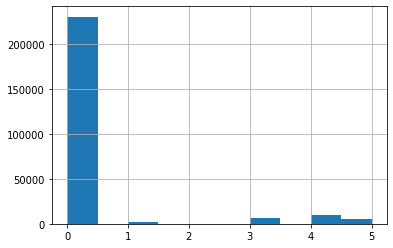

In [44]:
user_games_df["user_rating"].hist()

In [45]:
user_games_df["rawg_rating"].value_counts()

0.00    24615
4.39     3147
4.06     2459
3.67     2296
3.89     2242
        ...  
4.56        3
4.64        2
4.69        1
4.86        1
4.73        1
Name: rawg_rating, Length: 348, dtype: int64

<AxesSubplot:>

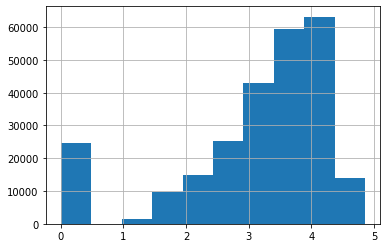

In [46]:
user_games_df["rawg_rating"].hist()

<AxesSubplot:>

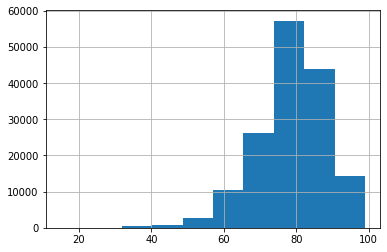

In [47]:
user_games_df["metacritic"].hist()

In [48]:
user_games_df.shape

(255366, 9)

In [49]:
len(user_games_df.game_id.unique())

18603

In [50]:
games = user_games_df.game_id.unique()

In [75]:
games

array([446900, 264830,  58443, ...,  49840,   4735,   3436])

In [67]:
rawg_games = []

In [11]:
def get_games(game_id):
    rawg_games = []
    try:
#         api_key="58eeb730ca1a47e8aa9d130c3127d412"
        url=f"https://api.rawg.io/api/games/{game_id}"
        response = requests.get(url)
        data = response.json()

    #         this is to transfer the list of dict into a string to stock in one cell:
        rawg_ratings = []
        for rating in data["ratings"]:
            rawg_ratings.append(f"{rating['id']}|{rating['title']}|{rating['count']}|{rating['percent']}")
        print(', '.join(rawg_ratings))


    #         this is to get the list of platforms availble for each games:
        game_platforms = []
        for platform in data["platforms"]:
            game_platforms.append(f"{platform['platform']['id']}|{platform['platform']['name']}")

        print(', '.join(game_platforms))

        game_genres = []
        for genre in data["genres"]:
            game_genres.append(genre['name'])
        print(', '.join(game_genres))

        game_tags = []
        for tag in data['tags']:
            game_tags.append(tag['name'])
        print(', '.join(game_genres))

        developers = []
        if data["developers"]:
            for developer in data["developers"]:
                developers.append(f"{developer['id']}|{developer['name']}")
            print(', '.join(developers))

        publishers = []
        if data["publishers"]:
            for publisher in data["publishers"]:
                publishers.append(f"{publisher['id']}|{publisher['name']}")
            print(', '.join(publishers))

        rawg_games.append({"game_id":game_id,
                           "slug": data["slug"],
                           "name":data["name"],
                           "description":data["description"],
                           "released":data["released"],
                           "rating":data["rating"],
                           "detail_ratings":', '.join(rawg_ratings),
                           "ratings_count":data["ratings_count"],
                           "suggestions_count":data["suggestions_count"],
                           "game_series_count":data["game_series_count"],
                           "reviews_count":data["reviews_count"],
                           "metacritic":data["metacritic"],
                           "game_platforms":', '.join(game_platforms),
                           "game_genres":', '.join(game_genres),
                           "game_tags":', '.join(game_tags),
                           "developers": ', '.join(developers),
                           "publishers": ', '.join(publishers)})
              
        print(f"game-{game_id}-{data['name']} has added to list")
    
    except:
        print ("no games")
    return pd.DataFrame(rawg_games)

In [12]:
game = get_games(58443)

4|recommended|1|100.0
3|iOS
Board Games
Board Games
179|Zach Gage
112|Zach Gage
game-58443-Pocket-Run Pool has added to list


In [13]:
game

game_id             slug             name  \
0    58443  pocket-run-pool  Pocket-Run Pool   

                                         description    released  rating  \
0  <p>The return of arcade pool from the creator ...  2018-05-24     0.0   

          detail_ratings  ratings_count  suggestions_count  game_series_count  \
0  4|recommended|1|100.0              1                 41                  0   

   reviews_count metacritic game_platforms  game_genres     game_tags  \
0              1       None          3|iOS  Board Games  Singleplayer   

      developers     publishers  
0  179|Zach Gage  112|Zach Gage

In [65]:
pd.DataFrame.from_dict(rawg_games)

game_id             slug             name  \
0    58443  pocket-run-pool  Pocket-Run Pool   

                                         description    released  rating  \
0  <p>The return of arcade pool from the creator ...  2018-05-24     0.0   

          detail_ratings  ratings_count  suggestions_count  game_series_count  \
0  4|recommended|1|100.0              1                 38                  0   

   reviews_count metacritic game_platforms  game_genres     game_tags  \
0              1       None          3|iOS  Board Games  Singleplayer   

      developers     publishers  
0  179|Zach Gage  112|Zach Gage

In [70]:
counter = 0
for game_id in games:
    counter += 1
    get_games(game_id)
    print(counter)
    

4|recommended|1|100.0
3|iOS
Casual, Puzzle
Casual, Puzzle
181849|Florian Grolig
42334|Florian Grolig
game-446900-High Rise - A Puzzle Cityscape has added to list
1
5|exceptional|2|100.0
21|Android, 3|iOS, 4|PC, 5|macOS
Strategy, Indie, Puzzle
Strategy, Indie, Puzzle
2241|Kenny Sun
1904|Kenny Sun
game-264830-Twinfold has added to list
2
4|recommended|1|100.0
3|iOS
Board Games
Board Games
179|Zach Gage
112|Zach Gage
game-58443-Pocket-Run Pool has added to list
3

3|iOS
Adventure, Strategy
Adventure, Strategy
638|Michael Brough
488|Michael Brough
game-51288-Cinco Paus has added to list
4
4|recommended|1|100.0
3|iOS
Strategy, Board Games
Strategy, Board Games
8795|Shenandoah Studio
9939|Shenandoah Studio
game-21889-Desert Fox: The Battle of El Alamein has added to list
5
4|recommended|1|100.0
4|PC, 3|iOS
Adventure, Strategy, Casual, Indie
Adventure, Strategy, Casual, Indie
638|Michael Brough, 149959|Rostislav Pogosian
488|Michael Brough, 39838|Rostialav Pogosian
game-1190-Imbroglio has add

5|exceptional|2|33.33, 4|recommended|2|33.33, 3|meh|1|16.67, 1|skip|1|16.67
4|PC
Simulation, Sports, Racing
Simulation, Sports, Racing
14511|MicroProse Software, 14874|Geoff Crammond
11462|Hasbro Interactive
game-32353-Grand Prix 3 has added to list
48
4|recommended|5|83.33, 5|exceptional|1|16.67
3|iOS, 21|Android
Simulation, Racing
Simulation, Racing
23545|Mediocre
35849|Mediocre
game-2463-Does not Commute has added to list
49
5|exceptional|4|57.14, 4|recommended|3|42.86
3|iOS, 21|Android
RPG, Strategy
RPG, Strategy
23963|Mika Mobile
81|Mika Mobile
game-192-Battleheart has added to list
50
5|exceptional|2|66.67, 4|recommended|1|33.33
24|Game Boy Advance, 4|PC
Simulation
Simulation
13178|Origin Systems, 26285|Raylight Studios
354|Electronic Arts, 10894|Destination Software
game-29633-Wing Commander: Prophecy has added to list
51
5|exceptional|4|66.67, 4|recommended|2|33.33
107|SEGA Saturn, 7|Nintendo Switch, 117|SEGA 32X, 167|Genesis
Racing
Racing
425|SEGA
3408|SEGA, 11857|Time Warner 

4|recommended|10|100.0
5|macOS, 4|PC, 3|iOS, 21|Android
Strategy, Board Games, Indie
Strategy, Board Games, Indie
23795|CGE digital, 807|Czech Games Edition
22009|CGE Digital, 675|Czech Games Edition
game-46738-Through the Ages has added to list
86
4|recommended|16|51.61, 5|exceptional|13|41.94, 3|meh|2|6.45
3|iOS, 21|Android, 1|Xbox One
Casual, Card, Educational, Indie, Puzzle
Casual, Card, Educational, Indie, Puzzle
293|Sirvo, 35019|Asher Vollmer
902|Sirvo
game-455-Threes! has added to list
87
5|exceptional|22|56.41, 4|recommended|13|33.33, 3|meh|3|7.69, 1|skip|1|2.56
9|Nintendo DS
Adventure, Puzzle
Adventure, Puzzle
27990|Cing
10681|Nintendo
game-25091-Hotel Dusk: Room 215 has added to list
88
4|recommended|8|80.0, 5|exceptional|1|10.0, 3|meh|1|10.0
4|PC, 5|macOS, 6|Linux, 49|NES, 55|Classic Macintosh, 166|Commodore / Amiga, 26|Game Boy
Action, Adventure, Simulation
Action, Adventure, Simulation
4497|Visual Concepts, 12539|Interplay Entertainment
11483|Interplay Productions, 19468|U

4|recommended|59|57.84, 3|meh|32|31.37, 5|exceptional|9|8.82, 1|skip|2|1.96
7|Nintendo Switch
Sports, Arcade
Sports, Arcade
16257|Nintendo, 28075|Camelot
10681|Nintendo
game-51609-Mario Tennis Aces has added to list
116
4|recommended|14|70.0, 3|meh|4|20.0, 5|exceptional|1|5.0, 1|skip|1|5.0
3|iOS, 21|Android, 6|Linux, 4|PC, 5|macOS
Indie, Puzzle
Indie, Puzzle
23486|Draknek, 3417|Alan Hazelden, 3415|Benjamin Davis
3161|Draknek
game-8042-A Good Snowman Is Hard To Build has added to list
117
4|recommended|16|48.48, 5|exceptional|14|42.42, 3|meh|3|9.09
4|PC, 6|Linux, 5|macOS
Adventure, Indie
Adventure, Indie
8316|Wadjet Eye Games
6277|Wadjet Eye Games
game-21515-Blackwell Epiphany has added to list
118
4|recommended|15|55.56, 5|exceptional|9|33.33, 3|meh|2|7.41, 1|skip|1|3.7
3|iOS, 5|macOS, 4|PC
Adventure, Puzzle
Adventure, Puzzle
2582|Phoenix Online Studios, 7563|Pinkerton Road Studio
6367|Pinkerton Road Studio, 10365|Phoenix Online Studios
game-8665-Gabriel Knight: Sins of the Fathers 20t

4|recommended|52|55.32, 5|exceptional|21|22.34, 3|meh|13|13.83, 1|skip|8|8.51
3|iOS, 10|Wii U, 19|PS Vita, 7|Nintendo Switch, 8|Nintendo 3DS
Action, Adventure
Action, Adventure
1003|DrinkBox Studios
8216|DrinkBox Studios
game-2049-Severed has added to list
144
4|recommended|29|50.0, 5|exceptional|22|37.93, 3|meh|5|8.62, 1|skip|2|3.45
7|Nintendo Switch, 4|PC
Strategy, Indie
Strategy, Indie
810|Terry Cavanagh, 34482|Marlowe Dobbe, 34481|chipzel
679|Terry Cavanagh
game-62423-Dicey Dungeons has added to list
145
3|meh|27|45.76, 4|recommended|21|35.59, 5|exceptional|6|10.17, 1|skip|5|8.47
4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
6063|Tale of Tales
5204|Tale of Tales
game-12240-The Path has added to list
146
3|meh|12|44.44, 4|recommended|8|29.63, 5|exceptional|4|14.81, 1|skip|3|11.11
4|PC, 6|Linux, 5|macOS, 3|iOS
Adventure, Puzzle
Adventure, Puzzle
11076|Trilobyte Games
3603|Nightdive Studios, 10286|Trilobyte Games
game-5873-The 7th Guest has added to list
147
4|recommended|80|61.07, 

5|exceptional|143|61.11, 4|recommended|67|28.63, 1|skip|14|5.98, 3|meh|10|4.27
4|PC, 18|PlayStation 4
Puzzle
Puzzle
591|Enhance Games
game-58818-Tetris Effect has added to list
176
4|recommended|80|51.61, 5|exceptional|65|41.94, 3|meh|7|4.52, 1|skip|3|1.94
4|PC, 3|iOS, 21|Android
Indie, Puzzle
Indie, Puzzle
988|Fireproof Games
6665|Fireproof Games
game-5916-The Room Two has added to list
177
4|recommended|74|57.81, 5|exceptional|33|25.78, 3|meh|18|14.06, 1|skip|3|2.34
4|PC, 1|Xbox One
Simulation, Racing
Simulation, Racing
14256|Turn 10 Studios
20987|Microsoft Studios
game-8098-Forza Motorsport 6 has added to list
178
5|exceptional|103|55.98, 4|recommended|64|34.78, 3|meh|11|5.98, 1|skip|6|3.26
5|macOS, 4|PC, 7|Nintendo Switch, 6|Linux
Adventure, Indie
Adventure, Indie
34459|adamgryu
8977|adamgryu
game-304247-A Short Hike has added to list
179
5|exceptional|125|48.45, 4|recommended|103|39.92, 3|meh|26|10.08, 1|skip|4|1.55
21|Android, 3|iOS, 4|PC, 5|macOS, 7|Nintendo Switch, 18|PlayStati

4|recommended|76|52.78, 3|meh|44|30.56, 5|exceptional|15|10.42, 1|skip|9|6.25
21|Android, 5|macOS, 3|iOS, 6|Linux, 4|PC, 7|Nintendo Switch, 14|Xbox 360, 16|PlayStation 3
Simulation, Sports, Racing
Simulation, Sports, Racing
18893|Feral Interactive, 3543|Codemasters
19651|Feral Interactive, 1294|Codemasters
game-3656-GRID Autosport has added to list
206
1|skip|58|44.62, 3|meh|38|29.23, 4|recommended|24|18.46, 5|exceptional|10|7.69
5|macOS, 4|PC
Action, Shooter
Action, Shooter
13204|Eclipse Productions
10299|Eclipse Productions
game-22798-Tyrian 2000 has added to list
207
5|exceptional|75|52.82, 4|recommended|48|33.8, 1|skip|11|7.75, 3|meh|8|5.63
4|PC, 14|Xbox 360, 16|PlayStation 3
Action, Adventure
Action, Adventure
14443|LucasArts Entertainment
250|Disney Interactive, 11461|LucasArts Entertainment
game-12074-Monkey Island 2 Special Edition: LeChuck’s Revenge has added to list
208
5|exceptional|379|56.15, 4|recommended|231|34.22, 3|meh|44|6.52, 1|skip|21|3.11
7|Nintendo Switch
Racing, A

5|exceptional|86|46.74, 4|recommended|43|23.37, 3|meh|39|21.2, 1|skip|16|8.7
5|macOS, 4|PC, 7|Nintendo Switch, 6|Linux
Adventure, Indie
Adventure, Indie
8820|Cardboard Computer
3998|Annapurna Interactive, 7799|Cardboard Computer
game-17010-Kentucky Route Zero has added to list
236
4|recommended|93|50.82, 5|exceptional|41|22.4, 3|meh|33|18.03, 1|skip|16|8.74
4|PC, 5|macOS, 6|Linux
Strategy
Strategy
18893|Feral Interactive, 3844|Creative Assembly
3408|SEGA, 19651|Feral Interactive
game-12741-Empire: Total War has added to list
237
5|exceptional|273|64.54, 4|recommended|93|21.99, 1|skip|31|7.33, 3|meh|26|6.15
5|macOS, 4|PC, 18|PlayStation 4, 1|Xbox One, 7|Nintendo Switch
Adventure, Indie
Adventure, Indie
473|3909, 13253|Lucas Pope, 35148|dukope
8224|3909
game-46508-Return Of The Obra Dinn has added to list
238
4|recommended|128|57.66, 3|meh|44|19.82, 5|exceptional|41|18.47, 1|skip|9|4.05
4|PC, 14|Xbox 360, 16|PlayStation 3
Action, Arcade, Platformer
Action, Arcade, Platformer
1181|Frozenb

4|recommended|131|43.23, 5|exceptional|79|26.07, 3|meh|51|16.83, 1|skip|42|13.86
6|Linux, 4|PC, 3|iOS, 1|Xbox One, 5|macOS, 19|PS Vita, 18|PlayStation 4
Adventure, Family
Adventure, Family
16|Double Fine Productions
7544|Double Fine Productions
game-2639-Day of the Tentacle Remastered has added to list
264
4|recommended|221|50.11, 5|exceptional|138|31.29, 3|meh|59|13.38, 1|skip|23|5.22
3|iOS, 21|Android, 4|PC, 5|macOS
Adventure, Simulation, Indie, Puzzle
Adventure, Simulation, Indie, Puzzle
1111|Sam Barlow
1001|Sam Barlow
game-2287-Her Story has added to list
265
5|exceptional|324|54.73, 4|recommended|209|35.3, 3|meh|43|7.26, 1|skip|16|2.7
21|Android, 3|iOS, 6|Linux, 4|PC, 1|Xbox One, 5|macOS, 7|Nintendo Switch, 18|PlayStation 4
RPG, Strategy, Card, Indie
RPG, Strategy, Card, Indie
186355|Humble Bundle, 13791|Mega Crit Games, 153822|Mega Crit
3794|Humble Bundle, 11163|Mega Crit Games
game-28121-Slay the Spire has added to list
266
4|recommended|74|43.53, 1|skip|48|28.24, 3|meh|44|25.88

4|recommended|118|41.99, 3|meh|72|25.62, 1|skip|71|25.27, 5|exceptional|20|7.12
4|PC, 6|Linux, 5|macOS, 14|Xbox 360
Action, Strategy, Casual, Indie
Action, Strategy, Casual, Indie
3707|Pocketwatch Games
1034|Majesco Entertainment, 3406|Pocketwatch Games
game-17037-Monaco: What's Yours Is Mine has added to list
289
4|recommended|466|55.28, 5|exceptional|191|22.66, 3|meh|160|18.98, 1|skip|26|3.08
4|PC, 18|PlayStation 4, 7|Nintendo Switch, 1|Xbox One
Action, Shooter, Adventure, RPG
Action, Shooter, Adventure, RPG
409|Obsidian Entertainment
30406|Private Division
game-274762-The Outer Worlds has added to list
290
5|exceptional|443|52.99, 4|recommended|254|30.38, 3|meh|94|11.24, 1|skip|45|5.38
16|PlayStation 3
Action
Action
6|Sony Interactive Entertainment
game-4491-Shadow of the Colossus (2011) has added to list
291
4|recommended|465|55.42, 5|exceptional|278|33.13, 3|meh|79|9.42, 1|skip|17|2.03
5|macOS, 4|PC, 3|iOS, 18|PlayStation 4, 1|Xbox One, 6|Linux, 7|Nintendo Switch
Strategy, Simulat

4|recommended|436|46.19, 5|exceptional|320|33.9, 3|meh|125|13.24, 1|skip|63|6.67
5|macOS, 4|PC, 3|iOS, 6|Linux, 19|PS Vita, 16|PlayStation 3, 18|PlayStation 4, 14|Xbox 360
Action, Adventure, Indie, Puzzle, Platformer
Action, Adventure, Indie, Puzzle, Platformer
35504|POLYTRON
20987|Microsoft Studios, 7274|Trapdoor, 18738|Corporation Polytron, 18131|Polytron
game-3740-FEZ has added to list
317
5|exceptional|789|46.55, 4|recommended|732|43.19, 3|meh|130|7.67, 1|skip|44|2.6
1|Xbox One, 5|macOS, 4|PC, 6|Linux, 18|PlayStation 4, 7|Nintendo Switch
Adventure, Simulation, Indie
Adventure, Simulation, Indie
1344|Campo Santo
2332|Campo Santo, 21246|Panic
game-2819-Firewatch has added to list
318
4|recommended|412|60.77, 3|meh|129|19.03, 5|exceptional|91|13.42, 1|skip|46|6.78
5|macOS, 6|Linux, 4|PC, 7|Nintendo Switch, 18|PlayStation 4
Action, Indie, Puzzle, Platformer
Action, Indie, Puzzle, Platformer
1181|Frozenbyte
3277|Frozenbyte
game-3853-Trine 2: Complete Story has added to list
319
5|except

5|exceptional|1370|53.04, 4|recommended|891|34.49, 3|meh|252|9.76, 1|skip|70|2.71
4|PC, 18|PlayStation 4
Action, Adventure, RPG
Action, Adventure, RPG
17202|Guerrilla Games
10212|Sony Computer Entertainment
game-278-Horizon Zero Dawn has added to list
346
5|exceptional|829|49.55, 4|recommended|629|37.6, 3|meh|154|9.21, 1|skip|61|3.65
3|iOS, 5|macOS, 4|PC, 21|Android, 7|Nintendo Switch, 16|PlayStation 3, 1|Xbox One, 18|PlayStation 4, 19|PS Vita, 14|Xbox 360
Action, Adventure
Action, Adventure
694|Telltale Games
221|Telltale Games
game-23027-The Walking Dead: Season 1 has added to list
347
4|recommended|830|46.47, 3|meh|555|31.08, 5|exceptional|267|14.95, 1|skip|134|7.5
187|PlayStation 5, 171|Web, 186|Xbox Series S/X, 4|PC, 1|Xbox One, 18|PlayStation 4
Action, Shooter, Massively Multiplayer
Action, Shooter, Massively Multiplayer
13905|Vicarious Visions
10830|Activision Blizzard, 34753|Bungie
game-32-Destiny 2 has added to list
348
4|recommended|1077|55.15, 5|exceptional|531|27.19, 3|meh|

4|recommended|22|59.46, 5|exceptional|7|18.92, 3|meh|5|13.51, 1|skip|3|8.11
4|PC
Shooter
Shooter
9498|Ritual Entertainment
10830|Activision Blizzard
game-30112-SiN has added to list
378
4|recommended|44|69.84, 3|meh|11|17.46, 5|exceptional|7|11.11, 1|skip|1|1.59
11|Wii, 14|Xbox 360, 18|PlayStation 4, 1|Xbox One, 10|Wii U, 7|Nintendo Switch
Action, Family
Action, Family
405|Ubisoft, 4110|Ubisoft Paris
918|Ubisoft Entertainment
game-46893-Just Dance 2018 has added to list
379
5|exceptional|65|60.19, 4|recommended|25|23.15, 3|meh|12|11.11, 1|skip|6|5.56
4|PC
Adventure
Adventure
14443|LucasArts Entertainment
11461|LucasArts Entertainment
game-29413-Grim Fandango has added to list
380
4|recommended|56|55.45, 3|meh|23|22.77, 5|exceptional|15|14.85, 1|skip|7|6.93
8|Nintendo 3DS, 24|Game Boy Advance, 11|Wii, 10|Wii U, 49|NES
Action, Adventure, Platformer
Action, Adventure, Platformer
16257|Nintendo, 26425|Bandai Namco Entertainment, 5173|Team NINJA, 12898|Intelligent Systems, 10218|MercuryStea

5|exceptional|91|65.47, 4|recommended|38|27.34, 3|meh|6|4.32, 1|skip|4|2.88
4|PC, 3|iOS, 1|Xbox One, 7|Nintendo Switch, 18|PlayStation 4, 8|Nintendo 3DS
Adventure, Simulation
Adventure, Simulation
3678|Capcom, 17|Capcom U.S.A
2150|Capcom
game-1452-Ace Attorney: Phoenix Wright Trilogy has added to list
408
5|exceptional|211|64.33, 4|recommended|67|20.43, 3|meh|31|9.45, 1|skip|19|5.79
15|PlayStation 2
Action, Adventure, RPG
Action, Adventure, RPG
19032|Team Ico
10212|Sony Computer Entertainment
game-59248-Shadow of the Colossus has added to list
409
5|exceptional|198|63.87, 4|recommended|70|22.58, 1|skip|26|8.39, 3|meh|16|5.16
83|Nintendo 64, 10|Wii U, 11|Wii
Action, Adventure
Action, Adventure
16257|Nintendo
10681|Nintendo
game-25924-The Legend of Zelda: Majora's Mask has added to list
410
4|recommended|73|57.94, 5|exceptional|28|22.22, 3|meh|20|15.87, 1|skip|5|3.97
14|Xbox 360, 5|macOS, 4|PC, 16|PlayStation 3
Action, Shooter
Action, Shooter
4630|Starbreeze Studios, 656|Atari, 17322|Tig

4|recommended|241|54.28, 5|exceptional|177|39.86, 3|meh|21|4.73, 1|skip|5|1.13
19|PS Vita, 16|PlayStation 3, 15|PlayStation 2
Action, Adventure
Action, Adventure
18720|SCE Santa Monica Studio
10212|Sony Computer Entertainment
game-29179-God of War (2005) has added to list
440
3|meh|120|50.21, 4|recommended|71|29.71, 1|skip|43|17.99, 5|exceptional|5|2.09
16|PlayStation 3
Arcade, Fighting
Arcade, Fighting
6|Sony Interactive Entertainment, 19431|SuperBot Entertainment
10212|Sony Computer Entertainment
game-4187-PlayStation All-Stars Battle Royale has added to list
441
5|exceptional|248|64.25, 4|recommended|103|26.68, 3|meh|18|4.66, 1|skip|17|4.4
7|Nintendo Switch, 5|macOS, 4|PC, 1|Xbox One, 18|PlayStation 4
RPG
RPG
4056|Larian Studios
8352|Bandai Namco Entertainment, 3678|Larian Studios
game-59199-Divinity: Original Sin 2 - Definitive Edition has added to list
442
5|exceptional|551|62.83, 4|recommended|235|26.8, 3|meh|49|5.59, 1|skip|42|4.79
4|PC, 5|macOS
RPG, Strategy
RPG, Strategy
11237

4|recommended|291|65.69, 3|meh|81|18.28, 5|exceptional|54|12.19, 1|skip|17|3.84
3|iOS, 21|Android, 5|macOS, 4|PC, 1|Xbox One, 18|PlayStation 4, 16|PlayStation 3, 19|PS Vita, 10|Wii U, 14|Xbox 360
Action, Adventure, Family
Action, Adventure, Family
18893|Feral Interactive, 3|Warner Bros. Interactive, 3682|Traveller's Tales
19651|Feral Interactive, 350|Warner Bros. Interactive
game-3850-LEGO Marvel Super Heroes has added to list
469
4|recommended|325|56.72, 5|exceptional|148|25.83, 3|meh|75|13.09, 1|skip|25|4.36
4|PC, 18|PlayStation 4, 1|Xbox One, 7|Nintendo Switch
Action, Adventure, Fighting
Action, Adventure, Fighting
3|Warner Bros. Interactive, 8986|NetherRealm Studios, 3606|QLOC, 9635|Shiver Games
350|Warner Bros. Interactive
game-274480-Mortal Kombat 11 has added to list
470
4|recommended|253|45.1, 3|meh|209|37.25, 1|skip|55|9.8, 5|exceptional|44|7.84
14|Xbox 360, 18|PlayStation 4, 1|Xbox One, 4|PC, 16|PlayStation 3
Action, Shooter
Action, Shooter
5833|Raven Software, 5250|Sledgeham

4|recommended|190|43.98, 3|meh|162|37.5, 1|skip|53|12.27, 5|exceptional|27|6.25
4|PC, 14|Xbox 360, 16|PlayStation 3
Action, Shooter
Action, Shooter
3|Warner Bros. Interactive, 10528|Day 1 Studios
350|Warner Bros. Interactive
game-5565-F.E.A.R. 3 has added to list
499
4|recommended|532|54.96, 5|exceptional|369|38.12, 3|meh|57|5.89, 1|skip|10|1.03
18|PlayStation 4
Action, Adventure
Action, Adventure
13071|Naughty Dog
10212|Sony Computer Entertainment
game-21926-Uncharted: The Lost Legacy has added to list
500
5|exceptional|511|65.26, 4|recommended|158|20.18, 1|skip|62|7.92, 3|meh|52|6.64
4|PC, 5|macOS
RPG
RPG
11150|Black Isle Studios
339|Bethesda Softworks, 11483|Interplay Productions
game-19299-Fallout 2: A Post Nuclear Role Playing Game has added to list
501
5|exceptional|791|63.53, 4|recommended|344|27.63, 3|meh|62|4.98, 1|skip|48|3.86
4|PC, 18|PlayStation 4, 1|Xbox One
Action, Shooter, Adventure
Action, Shooter, Adventure
3678|Capcom
2150|Capcom
game-58813-Resident Evil 2 has added t

4|recommended|399|45.14, 5|exceptional|348|39.37, 3|meh|113|12.78, 1|skip|24|2.71
186|Xbox Series S/X, 187|PlayStation 5, 4|PC, 18|PlayStation 4, 1|Xbox One
Action, Shooter, Adventure
Action, Shooter, Adventure
237|505 Games, 6294|Remedy Entertainment
243|505 Games
game-58812-Control has added to list
528
5|exceptional|618|59.03, 4|recommended|328|31.33, 3|meh|55|5.25, 1|skip|46|4.39
4|PC, 7|Nintendo Switch, 14|Xbox 360, 1|Xbox One
Adventure, Platformer
Adventure, Platformer
19103|Moon Studios
20987|Microsoft Studios
game-17959-Ori and the Blind Forest: Definitive Edition has added to list
529
5|exceptional|548|49.1, 4|recommended|455|40.77, 3|meh|74|6.63, 1|skip|39|3.49
18|PlayStation 4, 1|Xbox One, 4|PC
Action, Shooter, Adventure
Action, Shooter, Adventure
3678|Capcom, 17|Capcom U.S.A
2150|Capcom
game-480-Resident Evil 7: Biohazard has added to list
530
4|recommended|457|47.26, 5|exceptional|435|44.98, 3|meh|56|5.79, 1|skip|19|1.96
1|Xbox One, 4|PC, 14|Xbox 360, 16|PlayStation 3
Acti

5|exceptional|530|51.91, 4|recommended|411|40.25, 3|meh|56|5.48, 1|skip|24|2.35
14|Xbox 360, 4|PC, 18|PlayStation 4, 1|Xbox One, 5|macOS
Action, Adventure
Action, Adventure
18893|Feral Interactive, 10002|Rocksteady Studios
19651|Feral Interactive, 350|Warner Bros. Interactive
game-17576-Batman: Arkham City - Game of the Year Edition has added to list
556
5|exceptional|727|57.56, 4|recommended|413|32.7, 3|meh|97|7.68, 1|skip|26|2.06
4|PC, 18|PlayStation 4, 1|Xbox One
Action, RPG
Action, RPG
4207|Bethesda Game Studios
339|Bethesda Softworks
game-12447-The Elder Scrolls V: Skyrim Special Edition has added to list
557
4|recommended|337|51.53, 5|exceptional|210|32.11, 3|meh|64|9.79, 1|skip|43|6.57
7|Nintendo Switch, 4|PC, 5|macOS, 1|Xbox One, 18|PlayStation 4
Action, RPG
Action, RPG
1072|Digital Extremes, 4149|2K Australia, 5114|2K Marin, 5113|2K China, 9914|Virtuos, 4738|Blind Squirrel
358|2K Games, 11279|Take Two Interactive
game-11142-BioShock 2 Remastered has added to list
558
4|recomme

5|exceptional|1345|52.99, 4|recommended|957|37.71, 3|meh|178|7.01, 1|skip|58|2.29
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, Shooter
Action, Shooter
4|Bethesda Softworks, 343|id Software
339|Bethesda Softworks
game-2454-DOOM (2016) has added to list
584
4|recommended|910|45.52, 3|meh|496|24.81, 5|exceptional|404|20.21, 1|skip|189|9.45
4|PC, 6|Linux, 5|macOS
Action, Shooter
Action, Shooter
1612|Valve Software
3399|Valve
game-11859-Team Fortress 2 has added to list
585
5|exceptional|2278|71.84, 4|recommended|610|19.24, 3|meh|186|5.87, 1|skip|97|3.06
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Adventure
Action, Adventure
10|Rockstar Games
2155|Rockstar Games
game-28-Red Dead Redemption 2 has added to list
586
4|recommended|1041|47.6, 3|meh|584|26.7, 5|exceptional|339|15.5, 1|skip|223|10.2
4|PC, 14|Xbox 360, 16|PlayStation 3
Action, Shooter
Action, Shooter
1612|Valve Software, 3900|Hidden Path Entertainment
3399|Valve
game-4291-Counter-Strike: Global Offensive has added t

3|meh|194|43.21, 4|recommended|140|31.18, 1|skip|76|16.93, 5|exceptional|39|8.69
186|Xbox Series S/X, 187|PlayStation 5, 5|macOS, 7|Nintendo Switch, 4|PC, 21|Android, 3|iOS, 1|Xbox One, 18|PlayStation 4
Action, Shooter
Action, Shooter
120|Epic Games
game-47137-Fortnite Battle Royale has added to list
619

4|PC
Action, Strategy
Action, Strategy
15825|Blue Tongue Software
11462|Hasbro Interactive
game-32527-Starship Troopers: Terran Ascendancy has added to list
620

4|PC
Action, Shooter
Action, Shooter
15594|Termite Games
12079|Project Three Interactive
game-31822-New World Order has added to list
621
5|exceptional|7|63.64, 1|skip|2|18.18, 4|recommended|1|9.09, 3|meh|1|9.09
4|PC, 5|macOS, 6|Linux, 111|3DO
Adventure, RPG, Strategy
Adventure, RPG, Strategy
7301|Cryo Interactive
11483|Interplay Productions
game-13679-Lost Eden has added to list
622
3|meh|8|66.67, 4|recommended|4|33.33
4|PC
Action, Shooter
Action, Shooter
17159|Strangelite Studio
10880|Empire Interactive
game-35702-Starship 

3|meh|48|44.86, 4|recommended|30|28.04, 1|skip|24|22.43, 5|exceptional|5|4.67
19|PS Vita, 18|PlayStation 4
Puzzle
Puzzle
6|Sony Interactive Entertainment
game-3822-Escape Plan has added to list
654
4|recommended|75|60.0, 5|exceptional|21|16.8, 3|meh|19|15.2, 1|skip|10|8.0
17|PSP, 14|Xbox 360, 16|PlayStation 3
Action, Racing, Arcade
Action, Racing, Arcade
9526|Rockstar San Diego
2155|Rockstar Games
game-28604-Midnight Club: LA has added to list
655
5|exceptional|48|48.48, 4|recommended|37|37.37, 3|meh|12|12.12, 1|skip|2|2.02
187|PlayStation 5, 18|PlayStation 4
Action, Adventure
Action, Adventure
5342|Insomniac Games
11687|Sony Interactive Entertainment
game-452634-Marvel's Spider-Man: Miles Morales has added to list
656
4|recommended|17|39.53, 5|exceptional|12|27.91, 3|meh|7|16.28, 1|skip|7|16.28
4|PC
Strategy
Strategy
3933|Best Way
4879|1C-SoftClub, 3370|1C Company
game-19509-Men of War has added to list
657
3|meh|22|59.46, 4|recommended|10|27.03, 1|skip|4|10.81, 5|exceptional|1|2.7
4|

4|recommended|146|58.17, 5|exceptional|47|18.73, 3|meh|44|17.53, 1|skip|14|5.58
43|Game Boy Color, 27|PlayStation, 26|Game Boy, 4|PC
Action, Adventure
Action, Adventure
14613|DMA Design, 14756|Tarantula Studios, 14650|Visual Sciences
11279|Take Two Interactive, 11672|BMG Interactive, 12938|ASC Games
game-52998-Grand Theft Auto has added to list
684
4|recommended|163|53.97, 5|exceptional|71|23.51, 3|meh|55|18.21, 1|skip|13|4.3
1|Xbox One, 17|PSP, 14|Xbox 360, 16|PlayStation 3
Action, Adventure
Action, Adventure
109|Electronic Arts, 11265|Visceral Games
354|Electronic Arts
game-4700-Dante's Inferno has added to list
685
4|recommended|65|53.28, 5|exceptional|30|24.59, 3|meh|16|13.11, 1|skip|11|9.02
5|macOS, 4|PC, 3|iOS
Strategy, Simulation
Strategy, Simulation
17132|Aspyr Media, 5505|Electronic Arts Maxis
354|Electronic Arts, 3363|Aspyr
game-14346-SimCity 4 Deluxe Edition has added to list
686
4|recommended|161|54.21, 5|exceptional|87|29.29, 3|meh|39|13.13, 1|skip|10|3.37
16|PlayStation 3

4|recommended|209|58.38, 5|exceptional|129|36.03, 3|meh|16|4.47, 1|skip|4|1.12
80|Xbox, 6|Linux, 4|PC, 15|PlayStation 2
Racing, Arcade
Racing, Arcade
11171|Bugbear Entertainment
4253|Strategy First
game-19628-FlatOut 2 has added to list
711
4|recommended|79|46.2, 5|exceptional|74|43.27, 1|skip|10|5.85, 3|meh|8|4.68
4|PC, 80|Xbox, 15|PlayStation 2
Action
Action
9240|Pyro Studios
4284|Merge Games
game-19627-Commandos 2: Men of Courage has added to list
712
4|recommended|344|56.58, 5|exceptional|173|28.45, 3|meh|82|13.49, 1|skip|9|1.48
4|PC, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch, 5|macOS, 14|Xbox 360, 16|PlayStation 3
Action, RPG
Action, RPG
11237|Blizzard Entertainment
game-23600-Diablo III has added to list
713
5|exceptional|210|48.95, 4|recommended|153|35.66, 3|meh|55|12.82, 1|skip|11|2.56
6|Linux, 5|macOS, 4|PC, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Adventure
Adventure
214|Finji, 34609|bombsfall, 34610|InfiniteAmmo, 4895|Infinite Fall
1161|Finji
game-320-Night in t

4|recommended|320|53.33, 5|exceptional|194|32.33, 3|meh|69|11.5, 1|skip|17|2.83
1|Xbox One, 4|PC, 14|Xbox 360
Action, Shooter
Action, Shooter
120|Epic Games, 3635|People Can Fly
20987|Microsoft Studios
game-28615-Gears of War has added to list
743
4|recommended|160|59.26, 5|exceptional|60|22.22, 3|meh|35|12.96, 1|skip|15|5.56
4|PC, 14|Xbox 360
Action, Shooter, Indie
Action, Shooter, Indie
3988|Croteam
1307|Devolver Digital, 1034|Majesco Entertainment
game-13387-Serious Sam HD: The Second Encounter has added to list
744
4|recommended|222|49.66, 3|meh|126|28.19, 5|exceptional|54|12.08, 1|skip|45|10.07
4|PC, 18|PlayStation 4, 16|PlayStation 3
Action
Action
6666|Arrowhead Game Studios
517|PlayStation Mobile
game-12884-HELLDIVERS has added to list
745
4|recommended|257|62.38, 5|exceptional|74|17.96, 3|meh|65|15.78, 1|skip|16|3.88
1|Xbox One, 4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Shooter
Action, Shooter
405|Ubisoft, 4303|Techland
918|Ubisoft Entertainment, 1838|Techland Publishing
game

4|recommended|263|53.56, 5|exceptional|127|25.87, 3|meh|72|14.66, 1|skip|29|5.91
4|PC
Racing, Arcade
Racing, Arcade
6946|Criterion Games
354|Electronic Arts
game-19491-Burnout Paradise: The Ultimate Box has added to list
771
4|recommended|220|59.62, 3|meh|61|16.53, 5|exceptional|60|16.26, 1|skip|28|7.59
18|PlayStation 4, 6|Linux, 4|PC, 5|macOS, 1|Xbox One, 7|Nintendo Switch
Strategy, Simulation, Indie
Strategy, Simulation, Indie
1492|Double Eleven, 2112|Introversion Software
1732|Introversion Software
game-12320-Prison Architect has added to list
772
4|recommended|241|49.28, 3|meh|170|34.76, 1|skip|45|9.2, 5|exceptional|33|6.75
6|Linux, 5|macOS, 4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Shooter, Indie
Action, Shooter, Indie
436|Devolver Digital, 3988|Croteam
1307|Devolver Digital, 36726|Mastertronic Group
game-3697-Serious Sam 3: BFE has added to list
773
4|recommended|351|46.18, 5|exceptional|292|38.42, 3|meh|88|11.58, 1|skip|29|3.82
4|PC, 1|Xbox One, 14|Xbox 360, 16|PlayStation 3
A

800
5|exceptional|694|60.4, 4|recommended|282|24.54, 3|meh|105|9.14, 1|skip|68|5.92
6|Linux, 5|macOS, 4|PC, 19|PS Vita, 18|PlayStation 4, 7|Nintendo Switch
RPG, Indie
RPG, Indie
28889|8-4, 13342|Toby Fox, 7263|tobyfox
21251|8-4, 10390|Toby Fox, 6137|tobyfox
game-13627-Undertale has added to list
801
4|recommended|640|59.31, 3|meh|225|20.85, 5|exceptional|165|15.29, 1|skip|49|4.54
4|PC, 18|PlayStation 4, 7|Nintendo Switch, 16|PlayStation 3, 1|Xbox One, 14|Xbox 360
Action, Shooter
Action, Shooter
3678|Capcom, 17|Capcom U.S.A, 14065|Mercenary Technology
2150|Capcom
game-13461-Resident Evil 5 has added to list
802
4|recommended|618|47.39, 5|exceptional|570|43.71, 3|meh|91|6.98, 1|skip|25|1.92
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Shooter
Action, Shooter
19732|Respawn Entertainment
354|Electronic Arts
game-923-Titanfall 2 has added to list
803
5|exceptional|490|50.0, 4|recommended|384|39.18, 3|meh|63|6.43, 1|skip|43|4.39
5|macOS, 4|PC, 10|Wii U, 14|Xbox 360, 16|PlayStation 3
Action, RP


4|PC
Adventure
Adventure
7534|Overflow
6344|Overflow
game-379505-Abode 2 has added to list
831
1|skip|1|100.0
6|Linux, 4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
20229|Tom Coxon, 146388|Bytten Studio
15147|Tom Coxon, 39261|Bytten Studio
game-43052-Lenna's Inception has added to list
832
4|recommended|2|100.0
4|PC


6335|MyDream Interactive
5413|MyDream Interactive
game-9847-VR Toolbox has added to list
833
5|exceptional|8|72.73, 3|meh|2|18.18, 1|skip|1|9.09
4|PC
Action, Indie
Action, Indie
25788|Veyeral Games
19301|The Hidden Levels
game-52042-The Void Rains Upon Her Heart has added to list
834
5|exceptional|2|66.67, 4|recommended|1|33.33
7|Nintendo Switch, 3|iOS, 5|macOS, 4|PC
Action, Strategy, Casual, Indie, Puzzle
Action, Strategy, Casual, Indie, Puzzle
1090|ARTE Experience, 153819|Ludopium
984|ARTE France Apps, 33303|ARTE Experience, 21815|Ludopium
game-60540-Vectronom has added to list
835
3|meh|2|50.0, 5|exceptional|1|25.0, 1|skip|1|25.0
4|PC
Action
Action


4|recommended|31|49.21, 5|exceptional|24|38.1, 3|meh|4|6.35, 1|skip|4|6.35
4|PC
Board Games, Card
Board Games, Card
475|Wizards of the Coast
8217|Wizards of the Coast
game-245719-Magic: The Gathering Arena has added to list
872
3|meh|5|38.46, 4|recommended|4|30.77, 1|skip|4|30.77
19|PS Vita
Action, RPG
Action, RPG
386|BANDAI NAMCO Entertainment America
game-3614-Sword Art Online -Hollow Fragment has added to list
873
3|meh|1|50.0, 1|skip|1|50.0
4|PC
Simulation, Massively Multiplayer
Simulation, Massively Multiplayer
3621|The Wave VR
3330|The Wave VR
game-9646-TheWave has added to list
874
4|recommended|6|37.5, 3|meh|6|37.5, 5|exceptional|3|18.75, 1|skip|1|6.25
7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4, 16|PlayStation 3, 19|PS Vita
Action, Racing, Arcade
Action, Racing, Arcade
1572|Finish Line Games
1836|Finish Line Games
game-3712-Cel Damage HD has added to list
875
4|recommended|2|40.0, 3|meh|2|40.0, 1|skip|1|20.0
6|Linux, 5|macOS, 4|PC, 18|PlayStation 4
Indie
Indie
5914|Michael

5|exceptional|51|64.56, 4|recommended|21|26.58, 3|meh|5|6.33, 1|skip|2|2.53
10|Wii U
Action, RPG
Action, RPG
16257|Nintendo
10681|Nintendo
game-24182-The Legend of Zelda: Twilight Princess HD has added to list
910
4|recommended|14|63.64, 5|exceptional|4|18.18, 3|meh|3|13.64, 1|skip|1|4.55
18|PlayStation 4, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
6003|Neat
5160|Neat
game-12177-Budget Cuts has added to list
911
4|recommended|16|69.57, 3|meh|3|13.04, 5|exceptional|2|8.7, 1|skip|2|8.7
4|PC, 18|PlayStation 4
Action, Simulation, Sports
Action, Simulation, Sports
3793|Survios
3469|Survios
game-59319-Creed: Rise to Glory has added to list
912
3|meh|16|59.26, 1|skip|8|29.63, 4|recommended|3|11.11
19|PS Vita, 18|PlayStation 4
Action
Action
18792|Eiconic
game-3484-Final Horizon has added to list
913
4|recommended|5|38.46, 3|meh|4|30.77, 5|exceptional|2|15.38, 1|skip|2|15.38
4|PC
Adventure
Adventure
3654|Cloudhead Games
3399|Valve
game-349677-Aperture Hand Lab has added to list
914


4|recommended|7|58.33, 3|meh|3|25.0, 5|exceptional|1|8.33, 1|skip|1|8.33
6|Linux, 4|PC, 5|macOS
Adventure, Casual
Adventure, Casual
5333|Winged Cloud
4629|Winged Cloud
game-14102-Sakura Santa has added to list
949
3|meh|5|50.0, 1|skip|3|30.0, 4|recommended|2|20.0
6|Linux, 4|PC, 5|macOS
Action, Shooter
Action, Shooter
9703|JAM Productions
5858|Apogee Software
game-17141-Blake Stone: Planet Strike has added to list
950
3|meh|22|61.11, 1|skip|8|22.22, 4|recommended|6|16.67
19|PS Vita
Action, Puzzle
Action, Puzzle
887|Digital Dreams
game-3625-Metrico has added to list
951
4|recommended|11|40.74, 5|exceptional|9|33.33, 3|meh|5|18.52, 1|skip|2|7.41
5|macOS, 4|PC
Adventure, Indie, Puzzle
Adventure, Indie, Puzzle
1795|Cyan Worlds
8875|Cyan Worlds
game-17942-realMyst: Masterpiece Edition has added to list
952
3|meh|5|62.5, 1|skip|2|25.0, 4|recommended|1|12.5
4|PC, 6|Linux, 5|macOS
Action, Adventure, Arcade, Platformer
Action, Adventure, Arcade, Platformer
10340|3D Realms, 13168|Apogee Software


4|recommended|13|36.11, 3|meh|12|33.33, 5|exceptional|7|19.44, 1|skip|4|11.11
4|PC, 1|Xbox One, 18|PlayStation 4
Adventure, Simulation, Indie
Adventure, Simulation, Indie
1358|Teotl Studios, 7203|Grip Digital, 6229|Grip Games, 6228|Hourences
5333|Teotl Studios
game-6627-The Solus Project has added to list
985
3|meh|20|46.51, 1|skip|17|39.53, 4|recommended|6|13.95
19|PS Vita
Action
Action
25912|KOEI TECMO America
game-4447-Dynasty Warriors Next has added to list
986
4|recommended|7|38.89, 5|exceptional|4|22.22, 1|skip|4|22.22, 3|meh|3|16.67
4|PC, 6|Linux, 5|macOS
Action, Racing
Action, Racing
13287|Beavis-Soft, 10268|Beavis Soft
4640|3D Realms
game-17891-Wacky Wheels has added to list
987
5|exceptional|70|64.81, 4|recommended|24|22.22, 3|meh|10|9.26, 1|skip|4|3.7
4|PC, 1|Xbox One, 18|PlayStation 4
Action, RPG
Action, RPG
4132|Square Enix
308|Square Enix
game-69-KINGDOM HEARTS HD 1.5 +2.5 ReMIX has added to list
988
4|recommended|26|52.0, 5|exceptional|21|42.0, 3|meh|3|6.0
4|PC, 18|PlayS

4|recommended|28|68.29, 5|exceptional|6|14.63, 3|meh|4|9.76, 1|skip|3|7.32
7|Nintendo Switch, 18|PlayStation 4, 4|PC
Casual, Indie
Casual, Indie
6503|NEKO WORKs, 106335|CFK CO
3169|Sekai Project, 21029|CFK
game-16613-NEKOPARA Vol. 2 has added to list
1018
5|exceptional|79|61.72, 4|recommended|26|20.31, 1|skip|12|9.38, 3|meh|11|8.59
18|PlayStation 4
Adventure
Adventure
6|Sony Interactive Entertainment, 26191|SIE Japan Studio, 27803|Japan Studio
11687|Sony Interactive Entertainment
game-59155-Astro Bot: Rescue Mission has added to list
1019
4|recommended|24|32.88, 3|meh|24|32.88, 1|skip|16|21.92, 5|exceptional|9|12.33
19|PS Vita
Action, RPG
Action, RPG
18527|SCE Japan Studio, 3607|DIMPS, 9708|SHIFT
11687|Sony Interactive Entertainment
game-3527-Freedom Wars has added to list
1020
4|recommended|67|63.21, 5|exceptional|23|21.7, 3|meh|12|11.32, 1|skip|4|3.77
1|Xbox One, 10|Wii U, 16|PlayStation 3, 14|Xbox 360
Arcade, Fighting
Arcade, Fighting
386|BANDAI NAMCO Entertainment America, 26425|Ba

3|meh|22|48.89, 1|skip|17|37.78, 4|recommended|6|13.33
4|PC
Action, RPG, Massively Multiplayer
Action, RPG, Massively Multiplayer
5362|Panzar Studio
4654|OVALIS INVESTMENTS
game-11403-Panzar has added to list
1051
4|recommended|75|58.59, 3|meh|27|21.09, 5|exceptional|21|16.41, 1|skip|5|3.91
1|Xbox One, 4|PC
Strategy
Strategy
3844|Creative Assembly, 20502|343i
20987|Microsoft Studios
game-8433-Halo Wars 2 has added to list
1052
3|meh|35|46.67, 4|recommended|27|36.0, 1|skip|7|9.33, 5|exceptional|6|8.0
19|PS Vita
RPG
RPG
6|Sony Interactive Entertainment
game-4026-Soul Sacrifice has added to list
1053
5|exceptional|12|29.27, 4|recommended|11|26.83, 1|skip|11|26.83, 3|meh|7|17.07
5|macOS, 4|PC, 6|Linux
Racing, Casual, Indie
Racing, Casual, Indie
24301|Noctet Studio, 36005|ansdor
17994|Noctet Studio, 32202|ansdor
game-49382-Slipstream has added to list
1054
3|meh|24|42.86, 4|recommended|22|39.29, 1|skip|6|10.71, 5|exceptional|4|7.14
4|PC, 5|macOS, 1|Xbox One, 6|Linux, 18|PlayStation 4, 7|Nin

3|meh|8|44.44, 1|skip|6|33.33, 4|recommended|4|22.22
18|PlayStation 4, 4|PC, 5|macOS, 7|Nintendo Switch, 1|Xbox One
Adventure, Strategy, Simulation
Adventure, Strategy, Simulation
7970|IMGN.PRO, 1311|IMAGINATION, 9848|Sleepless Clinic
3227|IMGN.PRO, 32872|Imagination
game-17327-SYMMETRY has added to list
1083
4|recommended|14|66.67, 3|meh|4|19.05, 1|skip|2|9.52, 5|exceptional|1|4.76
4|PC
Adventure, Indie
Adventure, Indie
109729|Tunnel Vision Games
3363|Aspyr
game-272427-Lightmatter has added to list
1084
4|recommended|78|56.12, 5|exceptional|41|29.5, 3|meh|18|12.95, 1|skip|2|1.44
19|PS Vita
Action, Adventure
Action, Adventure
16320|Media Molecule
11687|Sony Interactive Entertainment
game-3830-Tearaway has added to list
1085
3|meh|72|42.86, 4|recommended|71|42.26, 1|skip|17|10.12, 5|exceptional|8|4.76
21|Android, 3|iOS, 18|PlayStation 4
Action, Adventure
Action, Adventure
11915|Supermassive Games, 667|PlayStation Mobile
11687|Sony Interactive Entertainment, 517|PlayStation Mobile
game-4

3|meh|52|52.0, 1|skip|25|25.0, 4|recommended|22|22.0, 5|exceptional|1|1.0
4|PC, 3|iOS, 5|macOS, 21|Android, 18|PlayStation 4
RPG, Indie, Puzzle
RPG, Indie, Puzzle
1565|Spry Fox
474|Spry Fox
game-3627-Road Not Taken has added to list
1115
4|recommended|112|54.63, 5|exceptional|72|35.12, 3|meh|18|8.78, 1|skip|3|1.46
4|PC, 171|Web, 1|Xbox One, 7|Nintendo Switch, 18|PlayStation 4
Action, Indie
Action, Indie
4192|Drool
3766|Drool
game-1152-Thumper has added to list
1116
1|skip|47|50.54, 3|meh|32|34.41, 4|recommended|14|15.05
5|macOS, 4|PC, 6|Linux
Shooter
Shooter
13230|Chasseur De Bots
10313|Chasseur De Bots
game-22879-Warsow has added to list
1117
1|skip|25|48.08, 3|meh|20|38.46, 4|recommended|6|11.54, 5|exceptional|1|1.92
4|PC
Action, Indie
Action, Indie
9881|CodeBrush Games
7971|Codebrush Games
game-17374-ArcheBlade has added to list
1118
1|skip|18|41.86, 3|meh|13|30.23, 4|recommended|10|23.26, 5|exceptional|2|4.65
6|Linux, 4|PC, 5|macOS
Indie
Indie
5333|Winged Cloud
4629|Winged Cloud
ga

3|meh|28|38.89, 1|skip|28|38.89, 4|recommended|15|20.83, 5|exceptional|1|1.39
6|Linux, 5|macOS, 4|PC
Action, Shooter
Action, Shooter
10340|3D Realms, 13168|Apogee Software
4640|3D Realms
game-17636-Bio Menace has added to list
1147
1|skip|43|56.58, 3|meh|22|28.95, 4|recommended|9|11.84, 5|exceptional|2|2.63
5|macOS, 4|PC, 55|Classic Macintosh, 166|Commodore / Amiga
Adventure
Adventure
13193|Metropolis Software, 15613|Metropolis Software House
15146|cdp.pl, 10294|Metropolis Software, 20391|Union Logic
game-22749-Teenagent has added to list
1148
4|recommended|33|49.25, 1|skip|16|23.88, 3|meh|15|22.39, 5|exceptional|3|4.48
7|Nintendo Switch, 18|PlayStation 4, 4|PC, 5|macOS
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
4318|Hunter Studio
20977|X.D. Network, 3860|Another Indie, 27940|Another Indie Studio
game-10313-Lost Castle has added to list
1149
5|exceptional|163|59.06, 4|recommended|82|29.71, 1|skip|19|6.88, 3|meh|12|4.35
18|PlayStation 4, 16|PlayStation 3, 14|Xbox 360, 4

4|recommended|148|58.96, 5|exceptional|47|18.73, 3|meh|43|17.13, 1|skip|13|5.18
4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Racing, Arcade
Action, Racing, Arcade
1202|Disney Interactive Studios, 9140|Black Rock Studio, 13994|BlackRock Studios
250|Disney Interactive
game-4747-Split/Second has added to list
1178
4|recommended|131|48.88, 5|exceptional|110|41.04, 3|meh|16|5.97, 1|skip|11|4.1
14|Xbox 360, 1|Xbox One
Racing
Racing
4786|Sumo Digital, 13141|Playground Games
20987|Microsoft Studios
game-28633-Forza Horizon 2 has added to list
1179
1|skip|64|59.26, 3|meh|26|24.07, 4|recommended|16|14.81, 5|exceptional|2|1.85
5|macOS, 4|PC
Adventure, RPG
Adventure, RPG
13178|Origin Systems
354|Electronic Arts
game-22853-Worlds of Ultima: The Savage Empire has added to list
1180
3|meh|25|44.64, 1|skip|23|41.07, 4|recommended|7|12.5, 5|exceptional|1|1.79
4|PC
Action, Strategy
Action, Strategy
14511|MicroProse Software
358|2K Games
game-20570-X-COM: Interceptor has added to list
1181
4|recommended|4

3|meh|32|51.61, 1|skip|23|37.1, 4|recommended|7|11.29
5|macOS, 6|Linux, 4|PC, 16|PlayStation 3, 19|PS Vita
Action, Strategy, Arcade, Indie, Puzzle
Action, Strategy, Arcade, Indie, Puzzle
9471|Misfits Attic
7704|Misfits Attic
game-2568-A Virus Named TOM has added to list
1207
4|recommended|99|54.7, 3|meh|48|26.52, 1|skip|18|9.94, 5|exceptional|16|8.84
6|Linux, 5|macOS, 4|PC, 7|Nintendo Switch, 21|Android, 18|PlayStation 4, 1|Xbox One
Action, Strategy, Arcade, Fighting, Indie
Action, Strategy, Arcade, Fighting, Indie
11580|tinyBuild, 5772|Pinokl Games, 5773|Kverta
460|tinyBuild
game-2503-Party Hard has added to list
1208
4|recommended|27|44.26, 3|meh|20|32.79, 1|skip|10|16.39, 5|exceptional|4|6.56
4|PC
Action, Adventure
Action, Adventure
6102|Core Design
308|Square Enix
game-12279-Tomb Raider V: Chronicles has added to list
1209
4|recommended|152|56.3, 5|exceptional|60|22.22, 3|meh|47|17.41, 1|skip|11|4.07
19|PS Vita
Action, Adventure
Action, Adventure
6|Sony Interactive Entertainment
11

4|recommended|89|40.64, 5|exceptional|73|33.33, 3|meh|42|19.18, 1|skip|15|6.85
6|Linux, 4|PC, 5|macOS, 7|Nintendo Switch, 1|Xbox One, 19|PS Vita, 18|PlayStation 4
Action, Indie, Platformer
Action, Indie, Platformer
13308|Matt Makes Games, 8320|Matt Thorson
10370|Matt Makes Games
game-2960-TowerFall Ascension has added to list
1236
4|recommended|183|56.13, 3|meh|71|21.78, 5|exceptional|54|16.56, 1|skip|18|5.52
19|PS Vita
Action, Adventure
Action, Adventure
6|Sony Interactive Entertainment
game-4475-UNCHARTED: Golden Abyss has added to list
1237
4|recommended|107|58.47, 3|meh|51|27.87, 1|skip|14|7.65, 5|exceptional|11|6.01
4|PC, 18|PlayStation 4, 1|Xbox One
Simulation, Sports, Racing
Simulation, Sports, Racing
3572|Slightly Mad Studios
8352|Bandai Namco Entertainment, 7430|Slightly Mad Studios
game-3336-Project CARS has added to list
1238
3|meh|21|42.0, 1|skip|17|34.0, 4|recommended|10|20.0, 5|exceptional|2|4.0
4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Adventure, Puzzle, Platformer
Act

4|recommended|106|51.96, 3|meh|43|21.08, 5|exceptional|42|20.59, 1|skip|13|6.37
4|PC, 5|macOS, 6|Linux
RPG, Strategy
RPG, Strategy
18893|Feral Interactive, 3715|Relic Entertainment
3408|SEGA, 19651|Feral Interactive, 6062|THQ
game-12761-Warhammer 40,000: Dawn of War II: Retribution has added to list
1267
4|recommended|165|62.98, 3|meh|56|21.37, 5|exceptional|35|13.36, 1|skip|6|2.29
4|PC, 5|macOS, 15|PlayStation 2, 17|PSP
Action
Action
17132|Aspyr Media, 14443|LucasArts Entertainment
3363|Aspyr, 250|Disney Interactive, 11461|LucasArts Entertainment
game-15861-STAR WARS - The Force Unleashed Ultimate Sith Edition has added to list
1268
4|recommended|96|47.29, 3|meh|74|36.45, 1|skip|22|10.84, 5|exceptional|11|5.42
6|Linux, 4|PC, 5|macOS, 11|Wii
Action, Arcade, Indie
Action, Arcade, Indie
399|Choice Provisions, 9517|Gaijin Games
1780|Aksys Games, 7|Choice Provisions, 7733|Gaijin Games
game-16779-BIT.TRIP RUNNER has added to list
1269
3|meh|50|37.59, 4|recommended|40|30.08, 1|skip|33|24.81,

3|meh|119|37.78, 4|recommended|97|30.79, 1|skip|63|20.0, 5|exceptional|36|11.43
3|iOS, 6|Linux, 4|PC, 5|macOS, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Action, Adventure, RPG, Massively Multiplayer, Indie
Action, Adventure, RPG, Massively Multiplayer, Indie
3807|Virtual Basement, 3806|Studio Wildcard, 3808|Efecto Studios, 3805|Instinct Games, 416|WILDCARD PROPERTIES
3479|Studio Wildcard, 21016|Wildcard Properties, 5571|Snail Games USA
game-9810-ARK: Survival Evolved has added to list
1296
5|exceptional|141|46.69, 4|recommended|117|38.74, 3|meh|26|8.61, 1|skip|18|5.96
105|GameCube, 4|PC, 5|macOS, 18|PlayStation 4, 7|Nintendo Switch, 55|Classic Macintosh, 80|Xbox
Action, Shooter, Adventure
Action, Shooter, Adventure
17132|Aspyr Media, 5833|Raven Software, 13290|Lucasfilm
10830|Activision Blizzard, 3363|Aspyr, 250|Disney Interactive, 11461|LucasArts Entertainment, 19502|small, 20466|(Mac)
game-12018-STAR WARS Jedi Knight II - Jedi Outcast has added to list
1297
4|recommended|109|38

4|recommended|82|50.31, 3|meh|35|21.47, 5|exceptional|25|15.34, 1|skip|21|12.88
4|PC, 18|PlayStation 4, 1|Xbox One
Action, Adventure
Action, Adventure
12191|d3t, 3979|Hangar 13
358|2K Games
game-442855-Mafia II: Definitive Edition has added to list
1325
4|recommended|138|40.95, 3|meh|128|37.98, 1|skip|55|16.32, 5|exceptional|16|4.75
3|iOS, 6|Linux, 5|macOS, 4|PC, 19|PS Vita, 18|PlayStation 4, 16|PlayStation 3, 10|Wii U, 171|Web, 1|Xbox One
Action, Racing, Arcade, Indie
Action, Racing, Arcade, Indie
5069|FlippFly
10342|Flippfly
game-2131-Race The Sun has added to list
1326
4|recommended|120|46.51, 3|meh|57|22.09, 1|skip|45|17.44, 5|exceptional|36|13.95
6|Linux, 5|macOS, 4|PC
Action, Shooter
Action, Shooter
436|Devolver Digital, 10340|3D Realms, 13233|3D Realms Entertainment
1307|Devolver Digital, 349|GHI Media, 4640|3D Realms
game-15317-Shadow Warrior Classic has added to list
1327
5|exceptional|264|51.97, 4|recommended|187|36.81, 3|meh|39|7.68, 1|skip|18|3.54
6|Linux, 4|PC
Action, Shoo

4|recommended|161|40.86, 3|meh|81|20.56, 5|exceptional|76|19.29, 1|skip|76|19.29
19|PS Vita, 16|PlayStation 3, 106|Dreamcast, 24|Game Boy Advance, 21|Android, 14|Xbox 360, 4|PC, 3|iOS
Action, Sports, Platformer
Action, Sports, Platformer
425|SEGA, 8228|Blit Software, 14556|Smilebit, 13979|Blit
3408|SEGA
game-53341-Jet Set Radio has added to list
1353
4|recommended|168|42.86, 3|meh|123|31.38, 1|skip|83|21.17, 5|exceptional|18|4.59
5|macOS, 6|Linux, 4|PC, 1|Xbox One, 7|Nintendo Switch, 18|PlayStation 4
Action, Indie
Action, Indie
6435|Thunder Lotus Games, 185681|Thunder Lotus
5494|Thunder Lotus Games
game-15274-Jotun: Valhalla Edition has added to list
1354
4|recommended|538|52.23, 5|exceptional|230|22.33, 3|meh|216|20.97, 1|skip|46|4.47
1|Xbox One, 4|PC, 18|PlayStation 4
RPG
RPG
4132|Square Enix
308|Square Enix
game-750-FINAL FANTASY XV has added to list
1355
3|meh|326|47.45, 4|recommended|195|28.38, 1|skip|142|20.67, 5|exceptional|24|3.49
4|PC, 21|Android, 3|iOS, 1|Xbox One, 18|PlaySta

4|recommended|666|46.41, 5|exceptional|426|29.69, 3|meh|270|18.82, 1|skip|73|5.09
6|Linux, 4|PC, 18|PlayStation 4, 1|Xbox One, 5|macOS
Action, RPG
Action, RPG
4878|Eidos Montreal
308|Square Enix, 19651|Feral Interactive
game-1447-Deus Ex: Mankind Divided has added to list
1383
4|recommended|586|42.19, 3|meh|435|31.32, 5|exceptional|196|14.11, 1|skip|172|12.38
186|Xbox Series S/X, 187|PlayStation 5, 4|PC, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Action, Shooter, Massively Multiplayer
Action, Shooter, Massively Multiplayer
1072|Digital Extremes, 28246|Panic Button
337|Digital Extremes
game-766-Warframe has added to list
1384
3|meh|569|31.91, 4|recommended|509|28.55, 1|skip|432|24.23, 5|exceptional|273|15.31
6|Linux, 5|macOS, 4|PC
Action, Massively Multiplayer
Action, Massively Multiplayer
1612|Valve Software
3399|Valve
game-10213-Dota 2 has added to list
1385
4|recommended|3|50.0, 3|meh|2|33.33, 1|skip|1|16.67
3|iOS, 21|Android
Puzzle
Puzzle
1131|The Pokemon Company
1014|The Pokem

4|recommended|725|50.07, 5|exceptional|559|38.6, 3|meh|110|7.6, 1|skip|54|3.73
4|PC, 14|Xbox 360
RPG
RPG
9023|CD PROJEKT RED
4879|1C-SoftClub, 7411|CD PROJEKT RED
game-16944-The Witcher 2: Assassins of Kings Enhanced Edition has added to list
1414
4|recommended|1|100.0
3|iOS
Family, Puzzle
Family, Puzzle
552|Disney
250|Disney Interactive
game-67767-Where's My Water? Lite has added to list
1415
4|recommended|4|66.67, 5|exceptional|2|33.33
21|Android, 3|iOS
Puzzle
Puzzle
552|Disney
250|Disney Interactive
game-5886-Where's My Water? 2 has added to list
1416
4|recommended|8|80.0, 5|exceptional|2|20.0
3|iOS
Action, Arcade, Casual
Action, Arcade, Casual
73|Andreas Illiger
43|Andreas Illiger
game-109-Tiny Wings has added to list
1417
4|recommended|7|53.85, 5|exceptional|3|23.08, 3|meh|2|15.38, 1|skip|1|7.69
3|iOS, 21|Android
Family, Puzzle
Family, Puzzle
552|Disney
250|Disney Interactive
game-1388-Where's My Water? has added to list
1418
5|exceptional|6|50.0, 4|recommended|4|33.33, 1|skip|2|1

3|meh|5|38.46, 4|recommended|4|30.77, 1|skip|3|23.08, 5|exceptional|1|7.69
4|PC
RPG, Indie
RPG, Indie
4502|Iron Tower Studio
3992|Iron Tower Studio
game-11605-Dungeon Rats has added to list
1452
4|recommended|11|44.0, 3|meh|7|28.0, 1|skip|6|24.0, 5|exceptional|1|4.0
4|PC, 5|macOS
Action, Strategy, Indie
Action, Strategy, Indie
9776|Skyshine Games
772|Versus Evil
game-17230-Skyshine's BEDLAM has added to list
1453
3|meh|5|35.71, 5|exceptional|3|21.43, 4|recommended|3|21.43, 1|skip|3|21.43
21|Android, 4|PC, 6|Linux, 5|macOS, 3|iOS, 18|PlayStation 4, 7|Nintendo Switch
Adventure, RPG, Strategy, Indie
Adventure, RPG, Strategy, Indie
2590|Plug In Digital, 322|Mi-Clos Studio, 4550|Goblinz Studio
515|Plug In Digital, 3184|WhisperGames, 226|Mi-Clos Studio, 4030|Goblinz Studio
game-1486-Dungeon Rushers has added to list
1454
4|recommended|15|45.45, 3|meh|13|39.39, 5|exceptional|3|9.09, 1|skip|2|6.06
5|macOS, 4|PC, 18|PlayStation 4, 1|Xbox One
Strategy, Simulation, Indie
Strategy, Simulation, Ind

4|recommended|49|60.49, 5|exceptional|15|18.52, 3|meh|12|14.81, 1|skip|5|6.17
6|Linux, 4|PC, 5|macOS, 18|PlayStation 4, 1|Xbox One, 7|Nintendo Switch
Action, RPG, Indie
Action, RPG, Indie
727|Defiant Development
643|Defiant Development
game-15406-Hand of Fate 2 has added to list
1484
4|recommended|9|40.91, 5|exceptional|8|36.36, 1|skip|3|13.64, 3|meh|2|9.09
4|PC
Adventure
Adventure
8615|Sierra
10830|Activision Blizzard
game-18615-Space Quest Collection has added to list
1485
5|exceptional|15|39.47, 4|recommended|14|36.84, 3|meh|6|15.79, 1|skip|3|7.89
4|PC
RPG, Indie
RPG, Indie
7453|Stygian Software
6282|Stygian Software
game-13861-UnderRail has added to list
1486
4|recommended|10|38.46, 3|meh|9|34.62, 1|skip|6|23.08, 5|exceptional|1|3.85
6|Linux, 5|macOS, 4|PC, 18|PlayStation 4
Action, Adventure
Action, Adventure
1181|Frozenbyte
3277|Frozenbyte
game-2443-Shadwen has added to list
1487
4|recommended|30|54.55, 5|exceptional|13|23.64, 3|meh|8|14.55, 1|skip|4|7.27
4|PC
RPG
RPG
409|Obsidian

4|recommended|47|54.02, 3|meh|21|24.14, 1|skip|11|12.64, 5|exceptional|8|9.2
5|macOS, 4|PC
Strategy, Simulation, Indie
Strategy, Simulation, Indie
3772|Mohawk Games
3319|Stardock Entertainment
game-9786-Offworld Trading Company has added to list
1516
5|exceptional|127|62.25, 4|recommended|51|25.0, 3|meh|14|6.86, 1|skip|12|5.88
4|PC
Adventure, RPG, Strategy, Simulation
Adventure, RPG, Strategy, Simulation
5836|Katauri Interactive, 5834|Elemental Games, 5835|SNK Games, 13300|SNK-Games
4879|1C-SoftClub, 3370|1C Company
game-11971-Space Rangers HD: A War Apart has added to list
1517
4|recommended|65|39.63, 3|meh|58|35.37, 1|skip|30|18.29, 5|exceptional|11|6.71
4|PC, 18|PlayStation 4
Action, Adventure, Indie
Action, Adventure, Indie
4228|ACE Team
11330|Atlus USA
game-2898-The Deadly Tower of Monsters has added to list
1518
4|recommended|127|52.48, 3|meh|79|32.64, 1|skip|22|9.09, 5|exceptional|14|5.79
18|PlayStation 4
Action, Shooter
Action, Shooter
6|Sony Interactive Entertainment
game-2490

4|recommended|204|57.14, 3|meh|69|19.33, 5|exceptional|56|15.69, 1|skip|28|7.84
4|PC, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Adventure, RPG, Strategy
Adventure, RPG, Strategy
1204|Funcom Oslo A/S, 29079|The Bearded Ladies, 18958|The Bearded Ladies Consulting
2055|Funcom
game-58921-Mutant Year Zero: Road to Eden has added to list
1546
4|recommended|128|40.63, 5|exceptional|123|39.05, 3|meh|45|14.29, 1|skip|19|6.03
5|macOS, 6|Linux, 4|PC
RPG
RPG
409|Obsidian Entertainment
3656|Paradox Interactive
game-10039-Tyranny has added to list
1547
3|meh|143|44.14, 1|skip|97|29.94, 4|recommended|75|23.15, 5|exceptional|9|2.78
4|PC, 18|PlayStation 4, 1|Xbox One
Action, Adventure, Massively Multiplayer
Action, Adventure, Massively Multiplayer
3831|Funcom, 1204|Funcom Oslo A/S
2055|Funcom
game-9831-Conan Exiles has added to list
1548
3|meh|161|49.85, 4|recommended|79|24.46, 1|skip|75|23.22, 5|exceptional|8|2.48
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Adventure, Fighting, Indie
Action, Adve

4|recommended|119|45.42, 1|skip|61|23.28, 3|meh|53|20.23, 5|exceptional|29|11.07
5|macOS, 4|PC
Strategy
Strategy
898|Amplitude Studios
3408|SEGA
game-14317-Endless Space - Collection has added to list
1575
4|recommended|320|47.55, 3|meh|229|34.03, 1|skip|69|10.25, 5|exceptional|55|8.17
4|PC, 1|Xbox One, 18|PlayStation 4, 16|PlayStation 3, 14|Xbox 360
Action, Adventure, RPG
Action, Adventure, RPG
4132|Square Enix, 4117|Airtight Games
308|Square Enix
game-3427-Murdered: Soul Suspect has added to list
1576
4|recommended|423|56.32, 5|exceptional|156|20.77, 3|meh|128|17.04, 1|skip|44|5.86
4|PC, 14|Xbox 360, 10|Wii U, 1|Xbox One, 16|PlayStation 3, 18|PlayStation 4, 19|PS Vita, 7|Nintendo Switch
RPG, Indie
RPG, Indie
405|Ubisoft, 3709|Ubisoft Montreal
918|Ubisoft Entertainment
game-3647-Child of Light has added to list
1577
3|meh|289|37.88, 4|recommended|282|36.96, 1|skip|136|17.82, 5|exceptional|56|7.34
4|PC, 3|iOS, 5|macOS, 14|Xbox 360, 16|PlayStation 3, 1|Xbox One, 18|PlayStation 4, 21|And

1|skip|38|35.51, 3|meh|30|28.04, 4|recommended|24|22.43, 5|exceptional|15|14.02
4|PC, 6|Linux, 5|macOS
Strategy, Indie
Strategy, Indie
2112|Introversion Software
1732|Introversion Software
game-12321-Darwinia has added to list
1606
4|recommended|33|42.31, 3|meh|22|28.21, 1|skip|15|19.23, 5|exceptional|8|10.26
16|PlayStation 3, 5|macOS, 4|PC
Adventure
Adventure
694|Telltale Games
221|Telltale Games
game-18845-Back to the Future: Ep 5 - OUTATIME has added to list
1607
4|recommended|34|41.98, 3|meh|23|28.4, 1|skip|16|19.75, 5|exceptional|8|9.88
16|PlayStation 3, 5|macOS, 4|PC
Adventure
Adventure
694|Telltale Games
221|Telltale Games
game-18844-Back to the Future: Ep 4 - Double Visions has added to list
1608
4|recommended|38|44.71, 3|meh|23|27.06, 1|skip|16|18.82, 5|exceptional|8|9.41
5|macOS, 4|PC, 16|PlayStation 3
Adventure
Adventure
694|Telltale Games
221|Telltale Games
game-40646-Back to the Future: The Game - Episode 3. Citizen Brown has added to list
1609
4|recommended|39|43.82, 3|me

4|recommended|4|36.36, 1|skip|3|27.27, 5|exceptional|2|18.18, 3|meh|2|18.18
4|PC
RPG, Massively Multiplayer
RPG, Massively Multiplayer
18268|devCAT
3588|Nexon
game-38567-Mabinogi has added to list
1642
4|recommended|8|44.44, 3|meh|4|22.22, 1|skip|4|22.22, 5|exceptional|2|11.11
4|PC
RPG, Massively Multiplayer
RPG, Massively Multiplayer
9145|Eyedentity Games
3352|Nexon America
game-38701-Dragon Nest has added to list
1643
3|meh|9|42.86, 1|skip|5|23.81, 4|recommended|4|19.05, 5|exceptional|3|14.29
4|PC
Strategy, Massively Multiplayer
Strategy, Massively Multiplayer
9135|Gas Powered Games, 592|Robot Entertainment
20987|Microsoft Studios
game-40430-Age of Empires Online has added to list
1644
4|recommended|15|57.69, 3|meh|5|19.23, 1|skip|5|19.23, 5|exceptional|1|3.85
6|Linux, 4|PC, 5|macOS
Action, Sports, Indie
Action, Sports, Indie
5215|Merixgames
4526|Merixgames
game-11241-Kopanito All-Stars Soccer has added to list
1645
4|recommended|11|37.93, 3|meh|11|37.93, 1|skip|4|13.79, 5|exceptiona

1|skip|11|57.89, 5|exceptional|3|15.79, 4|recommended|3|15.79, 3|meh|2|10.53
4|PC
Educational
Educational
7003|Scirra
5947|Scirra
game-13289-Construct 2 has added to list
1680
1|skip|21|40.38, 4|recommended|14|26.92, 3|meh|14|26.92, 5|exceptional|3|5.77
4|PC
Action, Adventure, RPG, Massively Multiplayer
Action, Adventure, RPG, Massively Multiplayer
3942|Neople
5578|Neople
game-12732-Dungeon Fighter Online has added to list
1681
1|skip|20|52.63, 3|meh|13|34.21, 4|recommended|3|7.89, 5|exceptional|2|5.26
4|PC
RPG, Massively Multiplayer
RPG, Massively Multiplayer
9523|Reloaded Productions
7737|Gamersfirst
game-16790-Fallen Earth Free2Play has added to list
1682
1|skip|18|47.37, 3|meh|14|36.84, 4|recommended|4|10.53, 5|exceptional|2|5.26
4|PC, 5|macOS
Action
Action
7313|FIX Korea, Co.LTD, 7314|FIX Games, Co
6177|FIX Games, Co
game-13688-Tactical Intervention has added to list
1683
1|skip|31|60.78, 3|meh|9|17.65, 4|recommended|8|15.69, 5|exceptional|3|5.88
4|PC


5655|EVGA
4885|EVGA
game-11

3|meh|70|41.92, 1|skip|70|41.92, 4|recommended|25|14.97, 5|exceptional|2|1.2
4|PC
Action, Indie
Action, Indie
4586|800 North and Digital Ranch
4053|800 North and Digital Ranch
game-10602-Dino D-Day has added to list
1713
4|recommended|193|57.96, 3|meh|67|20.12, 5|exceptional|49|14.71, 1|skip|24|7.21
7|Nintendo Switch, 6|Linux, 5|macOS, 4|PC, 18|PlayStation 4, 1|Xbox One
Action, Sports, Racing, Casual, Indie
Action, Sports, Racing, Casual, Indie
11580|tinyBuild, 5204|DoubleDutch Games
460|tinyBuild
game-11228-SpeedRunners has added to list
1714
4|recommended|412|63.09, 5|exceptional|132|20.21, 3|meh|88|13.48, 1|skip|21|3.22
21|Android, 3|iOS, 1|Xbox One, 4|PC, 18|PlayStation 4
Action, RPG, Fighting
Action, RPG, Fighting
3|Warner Bros. Interactive, 8986|NetherRealm Studios, 3606|QLOC
350|Warner Bros. Interactive
game-38-Injustice 2 has added to list
1715
3|meh|137|43.08, 1|skip|113|35.53, 4|recommended|62|19.5, 5|exceptional|6|1.89
4|PC, 18|PlayStation 4
Action, Indie
Action, Indie
9499|

4|recommended|204|52.71, 5|exceptional|100|25.84, 3|meh|58|14.99, 1|skip|25|6.46
18|PlayStation 4, 21|Android, 3|iOS, 4|PC, 1|Xbox One, 7|Nintendo Switch
Action, RPG
Action, RPG
84|THQ Nordic, 133403|Handy Games, 5033|Iron Lore Entertainment
1283|THQ Nordic, 6062|THQ, 1029|Nordic Games, 51|DotEmu
game-123-Titan Quest has added to list
1746
4|recommended|598|58.97, 5|exceptional|332|32.74, 3|meh|67|6.61, 1|skip|17|1.68
5|macOS, 4|PC, 16|PlayStation 3, 14|Xbox 360, 1|Xbox One, 18|PlayStation 4
Action, Adventure
Action, Adventure
3709|Ubisoft Montreal
918|Ubisoft Entertainment
game-10064-Assassin’s Creed Brotherhood has added to list
1747
4|recommended|265|39.97, 3|meh|257|38.76, 5|exceptional|78|11.76, 1|skip|63|9.5
1|Xbox One, 16|PlayStation 3, 4|PC, 14|Xbox 360
Action, Shooter
Action, Shooter
405|Ubisoft, 3709|Ubisoft Montreal
918|Ubisoft Entertainment
game-19600-Far Cry 2 has added to list
1748
4|recommended|244|54.34, 5|exceptional|107|23.83, 3|meh|70|15.59, 1|skip|28|6.24
4|PC
Actio

1|skip|6|54.55, 3|meh|5|45.45
4|PC, 16|PlayStation 3
Action, Racing
Action, Racing
1355|Gaijin Entertainment, 11269|Sky Fallen
4879|1C-SoftClub, 3370|1C Company
game-4983-Death Track: Resurrection has added to list
1779
3|meh|15|50.0, 1|skip|10|33.33, 4|recommended|5|16.67
18|PlayStation 4, 4|PC, 1|Xbox One
Action, Indie
Action, Indie
11236|Rimlight Studios
756|Rimlight Studios
game-1740-ZHEROS has added to list
1780
4|recommended|7|58.33, 5|exceptional|2|16.67, 3|meh|2|16.67, 1|skip|1|8.33
4|PC
Action, Indie
Action, Indie
14291|Zombie Panic Team
11344|Zombie Panic Team
game-29207-Zombie Panic! Source has added to list
1781
4|recommended|5|41.67, 3|meh|3|25.0, 1|skip|3|25.0, 5|exceptional|1|8.33
4|PC, 5|macOS
Simulation, Casual
Simulation, Casual
4327|Giants Software
713|Focus Home Interactive, 9225|Giants Software
game-11854-Farming Simulator 2013 Titanium Edition has added to list
1782
4|recommended|14|29.79, 3|meh|13|27.66, 1|skip|13|27.66, 5|exceptional|7|14.89
1|Xbox One, 16|PlayS

4|recommended|50|48.08, 3|meh|29|27.88, 5|exceptional|18|17.31, 1|skip|7|6.73
4|PC, 1|Xbox One
Strategy
Strategy
11328|343 Industries, 3902|Ensemble Studios, 6816|Behaviour Interactive
20987|Microsoft Studios
game-22041-Halo Wars: Definitive Edition has added to list
1813
4|recommended|29|36.71, 3|meh|29|36.71, 1|skip|14|17.72, 5|exceptional|7|8.86
1|Xbox One, 14|Xbox 360
Action, Family
Action, Family
13836|Rare
20987|Microsoft Studios
game-28326-Kameo has added to list
1814
4|recommended|24|48.0, 3|meh|13|26.0, 1|skip|9|18.0, 5|exceptional|4|8.0
4|PC
RPG, Strategy
RPG, Strategy
7930|Triumph Studios
3656|Paradox Interactive, 6629|Triumph Studios
game-16373-Age of Wonders has added to list
1815
1|skip|29|45.31, 3|meh|23|35.94, 4|recommended|10|15.62, 5|exceptional|2|3.12
7|Nintendo Switch, 5|macOS, 6|Linux, 4|PC, 19|PS Vita, 18|PlayStation 4, 16|PlayStation 3
Action, Adventure, Strategy, Casual, Indie, Puzzle
Action, Adventure, Strategy, Casual, Indie, Puzzle
325|Curve Digital, 9248|Cru

4|recommended|27|45.76, 3|meh|15|25.42, 5|exceptional|9|15.25, 1|skip|8|13.56
4|PC
Strategy, Simulation
Strategy, Simulation
7942|Rune Forge, 13298|Runeforge
1283|THQ Nordic
game-14527-The Guild II Renaissance has added to list
1847
4|recommended|27|55.1, 3|meh|15|30.61, 1|skip|4|8.16, 5|exceptional|3|6.12
4|PC, 5|macOS, 6|Linux, 3|iOS
Action, Adventure, Indie
Action, Adventure, Indie
1134|Tribute Games
19330|Tribute Games
game-2343-Wizorb has added to list
1848
3|meh|30|41.1, 4|recommended|26|35.62, 1|skip|11|15.07, 5|exceptional|6|8.22
6|Linux, 4|PC, 5|macOS, 11|Wii
Action, Arcade, Casual, Indie
Action, Arcade, Casual, Indie
399|Choice Provisions, 9517|Gaijin Games
1780|Aksys Games, 7|Choice Provisions, 7733|Gaijin Games
game-16777-BIT.TRIP BEAT has added to list
1849
1|skip|16|57.14, 3|meh|10|35.71, 4|recommended|2|7.14
4|PC, 5|macOS
Action, Strategy, Indie
Action, Strategy, Indie
11314|Ludochip
8933|Ludochip
game-19579-Cubetractor has added to list
1850
1|skip|17|51.52, 3|meh|15|45

4|recommended|121|48.79, 3|meh|78|31.45, 5|exceptional|26|10.48, 1|skip|23|9.27
14|Xbox 360
Shooter
Shooter
120|Epic Games
20987|Microsoft Studios
game-28628-Gears of War: Judgment has added to list
1882
4|recommended|85|51.2, 5|exceptional|47|28.31, 3|meh|26|15.66, 1|skip|8|4.82
4|PC, 5|macOS
Strategy
Strategy
3844|Creative Assembly
3408|SEGA
game-13467-Total War: ROME II - Emperor Edition has added to list
1883
4|recommended|76|58.46, 5|exceptional|27|20.77, 3|meh|23|17.69, 1|skip|4|3.08
4|PC
Racing, Arcade
Racing, Arcade
11171|Bugbear Entertainment
4253|Strategy First
game-19347-FlatOut: Ultimate Carnage has added to list
1884
4|recommended|71|45.51, 3|meh|41|26.28, 5|exceptional|28|17.95, 1|skip|16|10.26
6|Linux, 4|PC, 5|macOS, 18|PlayStation 4, 1|Xbox One
Adventure, RPG, Strategy, Indie
Adventure, RPG, Strategy, Indie
4303|Techland
1838|Techland Publishing, 324|inXile Entertainment
game-284-Torment: Tides of Numenera has added to list
1885
3|meh|88|41.9, 4|recommended|66|31.43, 1|

3|meh|23|35.94, 1|skip|22|34.38, 4|recommended|17|26.56, 5|exceptional|2|3.12
4|PC, 14|Xbox 360
Action, Shooter, Strategy
Action, Shooter, Strategy
3543|Codemasters
1294|Codemasters
game-19377-Operation Flashpoint: Red River has added to list
1914
4|recommended|171|57.0, 5|exceptional|72|24.0, 3|meh|52|17.33, 1|skip|5|1.67
4|PC, 1|Xbox One, 14|Xbox 360
Action, Shooter
Action, Shooter
109|Electronic Arts, 19732|Respawn Entertainment, 18721|Bluepoint Games
354|Electronic Arts
game-42230-Titanfall has added to list
1915
4|recommended|85|52.47, 5|exceptional|57|35.19, 1|skip|14|8.64, 3|meh|6|3.7
5|macOS, 4|PC
RPG, Strategy
RPG, Strategy
5836|Katauri Interactive
4879|1C-SoftClub, 3370|1C Company
game-17698-King's Bounty: Armored Princess has added to list
1916
4|recommended|100|52.08, 5|exceptional|56|29.17, 3|meh|27|14.06, 1|skip|9|4.69
4|PC, 18|PlayStation 4
Action, RPG
Action, RPG
386|BANDAI NAMCO Entertainment America, 26425|Bandai Namco Entertainment
8352|Bandai Namco Entertainment, 31

3|meh|90|50.28, 4|recommended|55|30.73, 1|skip|27|15.08, 5|exceptional|7|3.91
18|PlayStation 4, 1|Xbox One, 4|PC
Action, Adventure
Action, Adventure
9935|2K Czech, 3979|Hangar 13
358|2K Games
game-445430-Mafia III: Definitive Edition has added to list
1945
4|recommended|144|57.37, 3|meh|52|20.72, 5|exceptional|41|16.33, 1|skip|14|5.58
4|PC, 3|iOS, 21|Android, 5|macOS, 6|Linux, 10|Wii U, 7|Nintendo Switch
Adventure, Simulation, Casual, Indie, Puzzle
Adventure, Simulation, Casual, Indie, Puzzle
705|Experimental Gameplay Group, 9998|Tomorrow
8050|Tomorrow, 550|Experimental Gameplay Group
game-5995-Little Inferno has added to list
1946
3|meh|55|40.15, 1|skip|42|30.66, 4|recommended|35|25.55, 5|exceptional|5|3.65
4|PC
Action, RPG, Indie
Action, RPG, Indie
17823|Outerlight
6197|Blazing Griffin
game-19151-The Ship: Single Player has added to list
1947
3|meh|42|31.11, 4|recommended|39|28.89, 1|skip|39|28.89, 5|exceptional|15|11.11
4|PC
Action, RPG, Indie
Action, RPG, Indie
17823|Outerlight
619

4|recommended|306|55.43, 5|exceptional|174|31.52, 3|meh|54|9.78, 1|skip|18|3.26
1|Xbox One, 16|PlayStation 3, 5|macOS, 4|PC, 11|Wii, 3|iOS, 14|Xbox 360, 8|Nintendo 3DS, 19|PS Vita
Action, Arcade, Family, Platformer
Action, Arcade, Family, Platformer
18893|Feral Interactive, 405|Ubisoft, 17382|Ubisoft Casablanca, 10155|UBIart Montpellier
918|Ubisoft Entertainment, 19651|Feral Interactive
game-4361-Rayman Origins has added to list
1975
4|recommended|222|58.27, 5|exceptional|80|21.0, 3|meh|55|14.44, 1|skip|24|6.3
4|PC
Action, Shooter
Action, Shooter
4033|IO Interactive
308|Square Enix, 10877|Eidos Interactive
game-10049-Hitman: Codename 47 has added to list
1976
4|recommended|207|50.12, 3|meh|137|33.17, 5|exceptional|35|8.47, 1|skip|34|8.23
4|PC, 1|Xbox One, 18|PlayStation 4, 14|Xbox 360
Action
Action
17|Capcom U.S.A, 10201|Capcom Vancouver, 14111|Blue Castle Games
2150|Capcom
game-1322-Dead Rising 2 has added to list
1977
4|recommended|254|60.48, 3|meh|90|21.43, 5|exceptional|51|12.14, 1

3|meh|129|40.44, 1|skip|108|33.86, 4|recommended|71|22.26, 5|exceptional|11|3.45
5|macOS, 4|PC, 6|Linux
Action, Simulation, Indie
Action, Simulation, Indie
3778|Muse Games
3461|Muse Games
game-9793-Guns of Icarus Online has added to list
2004
4|recommended|371|44.65, 3|meh|300|36.1, 1|skip|98|11.79, 5|exceptional|62|7.46
7|Nintendo Switch, 171|Web, 4|PC, 16|PlayStation 3, 1|Xbox One, 18|PlayStation 4, 14|Xbox 360
Action, Shooter, Adventure
Action, Shooter, Adventure
3678|Capcom, 17|Capcom U.S.A, 3606|QLOC
2150|Capcom
game-2623-Resident Evil 6 has added to list
2005
4|recommended|159|45.82, 5|exceptional|97|27.95, 3|meh|48|13.83, 1|skip|43|12.39
4|PC
Strategy, Simulation
Strategy, Simulation
3868|Firaxis
358|2K Games, 11453|Infogrames
game-17380-Sid Meier's Civilization III Complete has added to list
2006
4|recommended|312|48.98, 3|meh|128|20.09, 5|exceptional|115|18.05, 1|skip|82|12.87
4|PC, 7|Nintendo Switch, 10|Wii U, 14|Xbox 360, 1|Xbox One, 18|PlayStation 4
Action, Indie, Platforme

4|recommended|2|40.0, 5|exceptional|1|20.0, 3|meh|1|20.0, 1|skip|1|20.0
6|Linux, 4|PC
Adventure
Adventure
23038|Point Bleep Studios
4765|Flying Interactive
game-47366-The Mind of Marlo has added to list
2047
5|exceptional|1|50.0, 1|skip|1|50.0
5|macOS, 6|Linux, 4|PC
Action, Shooter, Casual, Indie
Action, Shooter, Casual, Indie
20801|Alysson Moraes, 41233|MoraesStudio
15696|Moraes Studio
game-43960-In Game Adventure: Legend of Monsters has added to list
2048
5|exceptional|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC
Action, Adventure, Strategy, Casual, Indie
Action, Adventure, Strategy, Casual, Indie
5482|GamersHype Productions
4736|GamersHype Productions
game-11539-Box Maze has added to list
2049
5|exceptional|1|50.0, 1|skip|1|50.0
5|macOS, 6|Linux, 4|PC, 19|PS Vita, 7|Nintendo Switch
Indie, Puzzle
Indie, Puzzle
2836|iFun4all
2556|iFun4all
game-2594-Green Game: TimeSwapper has added to list
2050
1|skip|4|44.44, 4|recommended|2|22.22, 3|meh|2|22.22, 5|exceptional|1|11.11
4|PC
Action
Acti

5|exceptional|4|33.33, 1|skip|4|33.33, 4|recommended|3|25.0, 3|meh|1|8.33
4|PC
Adventure
Adventure
1620|Lexis Numerique
game-16416-eXperience 112 has added to list
2087
4|recommended|3|42.86, 1|skip|2|28.57, 5|exceptional|1|14.29, 3|meh|1|14.29
4|PC
Action, RPG, Simulation
Action, RPG, Simulation
3410|SkyRiver Studios
3370|1C Company
game-21616-A.I.M.2 Clan Wars has added to list
2088
1|skip|7|43.75, 3|meh|5|31.25, 4|recommended|3|18.75, 5|exceptional|1|6.25
5|macOS, 6|Linux, 4|PC
RPG, Strategy, Massively Multiplayer
RPG, Strategy, Massively Multiplayer
4414|Blue Byte, 10178|Related Designs
918|Ubisoft Entertainment
game-20710-Might & Magic Heroes Online has added to list
2089
3|meh|2|50.0, 1|skip|2|50.0
6|Linux, 4|PC, 5|macOS
Adventure, Casual, Indie
Adventure, Casual, Indie
11008|Harotobira
1905|Sometimes You
game-19067-Cyber City 2157: The Visual Novel has added to list
2090
3|meh|8|33.33, 1|skip|8|33.33, 4|recommended|6|25.0, 5|exceptional|2|8.33
4|PC
Adventure, Indie
Adventure, In

4|recommended|10|45.45, 3|meh|6|27.27, 1|skip|4|18.18, 5|exceptional|2|9.09
6|Linux, 4|PC, 5|macOS
Indie
Indie
6570|Michael Pelletier, 6571|Ross Joseph Gardner
5606|Michael Pelletier, 5607|Ross Joseph Gardner
game-12781-Half-Life: A Place in the West has added to list
2124
3|meh|33|45.83, 1|skip|22|30.56, 4|recommended|13|18.06, 5|exceptional|4|5.56
4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Shooter
Action, Shooter
425|SEGA, 4015|Gearbox Software, 4886|Demiurge Studios, 1655|TimeGate Studios
3408|SEGA
game-3991-Aliens: Colonial Marines has added to list
2125
4|recommended|8|47.06, 1|skip|5|29.41, 3|meh|4|23.53
4|PC, 18|PlayStation 4, 19|PS Vita
Action, Adventure, RPG, Arcade, Casual, Indie
Action, Adventure, RPG, Arcade, Casual, Indie
20|Atlus U.S.A, 3624|Phantom Compass
11330|Atlus USA
game-3505-Rollers of the Realm has added to list
2126
3|meh|26|48.15, 1|skip|18|33.33, 4|recommended|8|14.81, 5|exceptional|2|3.7
5|macOS, 4|PC, 18|PlayStation 4, 19|PS Vita
Action, Indie
Action, Indie

1|skip|14|36.84, 4|recommended|13|34.21, 3|meh|7|18.42, 5|exceptional|4|10.53
5|macOS, 4|PC
Strategy
Strategy
5897|Reality Pump Studios
5141|TopWare Interactive, 6486|ACE
game-19606-Earth 2150 Trilogy has added to list
2156
3|meh|10|43.48, 4|recommended|8|34.78, 1|skip|5|21.74
4|PC, 80|Xbox, 15|PlayStation 2
Action
Action
4037|Crystal Dynamics
308|Square Enix
game-10053-Project: Snowblind has added to list
2157
4|recommended|32|38.55, 5|exceptional|31|37.35, 1|skip|12|14.46, 3|meh|8|9.64
4|PC, 3|iOS
Adventure, RPG, Simulation, Casual, Indie
Adventure, RPG, Simulation, Casual, Indie
25519|kikiyama, 118719|caerux.co.ltd
3777|AGM PLAYISM, 32560|caerux.co.ltd
game-51595-Yume Nikki has added to list
2158
3|meh|21|43.75, 4|recommended|15|31.25, 1|skip|8|16.67, 5|exceptional|4|8.33
4|PC
Action, Adventure
Action, Adventure
1784|Microids, 9323|MC2
3205|Anuman Interactive
game-16426-Post Mortem has added to list
2159
5|exceptional|64|44.76, 4|recommended|56|39.16, 3|meh|17|11.89, 1|skip|6|4.2
21

4|recommended|24|48.0, 3|meh|13|26.0, 1|skip|9|18.0, 5|exceptional|4|8.0
4|PC
Action, Adventure
Action, Adventure
694|Telltale Games
221|Telltale Games
game-37873-Sam & Max: 103 - The Mole, the Mob and the Meatball has added to list
2188
4|recommended|33|51.56, 3|meh|19|29.69, 5|exceptional|8|12.5, 1|skip|4|6.25
4|PC, 5|macOS
Adventure, RPG, Strategy
Adventure, RPG, Strategy
8419|1C-SoftClub
3370|1C Company
game-15198-King's Bounty: Warriors of the North has added to list
2189
4|recommended|40|42.55, 5|exceptional|39|41.49, 3|meh|10|10.64, 1|skip|5|5.32
5|macOS, 6|Linux, 3|iOS, 4|PC, 18|PlayStation 4, 16|PlayStation 3
Action, Adventure, Arcade, Platformer
Action, Adventure, Arcade, Platformer
85|DotEmu, 45749|4EversGames, 11022|Eric Chahi, 19685|The Digital Lounge
713|Focus Home Interactive, 51|DotEmu, 7249|The Digital Lounge
game-19093-Another World – 20th Anniversary Edition has added to list
2190
4|recommended|31|53.45, 3|meh|15|25.86, 1|skip|7|12.07, 5|exceptional|5|8.62
4|PC
Actio

4|recommended|45|50.56, 3|meh|20|22.47, 5|exceptional|12|13.48, 1|skip|12|13.48
1|Xbox One, 16|PlayStation 3, 14|Xbox 360
Action, Adventure
Action, Adventure
14146|Grasshopper Manufacture, 279|XSEED JKS, 14246|Kadokawa Games
3290|XSEED Games
game-3922-KILLER IS DEAD has added to list
2218
3|meh|48|38.1, 4|recommended|42|33.33, 1|skip|26|20.63, 5|exceptional|10|7.94
6|Linux, 5|macOS, 4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
5291|Giant Army
4592|Giant Army
game-16702-Universe Sandbox has added to list
2219
4|recommended|47|41.96, 3|meh|30|26.79, 1|skip|24|21.43, 5|exceptional|11|9.82
3|iOS, 6|Linux, 4|PC, 5|macOS, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Adventure, Puzzle
Adventure, Puzzle
34897|charblar, 13329|MidBoss, 35557|Kossio, 35558|JJSignal
21039|MidBoss
game-498-2064: Read Only Memories has added to list
2220
3|meh|20|44.44, 1|skip|14|31.11, 4|recommended|11|24.44
6|Linux, 4|PC, 5|macOS, 1|Xbox One
Action, Adventure, Casual, Indie, Puzzle
Action, Adventure

4|recommended|135|44.26, 3|meh|73|23.93, 1|skip|63|20.66, 5|exceptional|34|11.15
4|PC
Action
Action
14146|Grasshopper Manufacture, 14246|Kadokawa Games
311|Deep Silver
game-16199-Killer is Dead - Nightmare Edition has added to list
2248
3|meh|369|45.84, 4|recommended|259|32.17, 1|skip|119|14.78, 5|exceptional|58|7.2
4|PC, 6|Linux, 5|macOS, 3|iOS, 21|Android, 18|PlayStation 4, 1|Xbox One, 14|Xbox 360, 16|PlayStation 3
Action, Simulation, Casual, Indie
Action, Simulation, Casual, Indie
1492|Double Eleven, 7257|Coffee Stain Studios, 33497|Coffee Stain Publishing
4910|Coffee Stain Studios, 3286|Double Eleven
game-1959-Goat Simulator has added to list
2249
4|recommended|167|32.36, 5|exceptional|154|29.84, 3|meh|106|20.54, 1|skip|89|17.25
4|PC, 6|Linux, 5|macOS
Strategy, Simulation
Strategy, Simulation
4024|Paradox Development Studio
3656|Paradox Interactive
game-10340-Crusader Kings II has added to list
2250
3|meh|1|50.0, 1|skip|1|50.0
4|PC
Action, Strategy
Action, Strategy
14268|Games Dist

3|meh|20|57.14, 1|skip|11|31.43, 4|recommended|4|11.43
14|Xbox 360, 16|PlayStation 3
Sports, Racing, Arcade
Sports, Racing, Arcade
84|THQ Nordic, 14787|THQ, 4743|Rainbow Studios
6062|THQ
game-28546-MX vs. ATV Alive has added to list
2286
3|meh|11|64.71, 1|skip|5|29.41, 4|recommended|1|5.88
4|PC
Strategy
Strategy
4815|Cyanide Studio, 10134|Cyanide Montreal
4879|1C-SoftClub, 713|Focus Home Interactive
game-11750-A Game of Thrones - Genesis has added to list
2287
3|meh|13|50.0, 1|skip|9|34.62, 4|recommended|4|15.38
4|PC, 16|PlayStation 3, 19|PS Vita
Simulation, Sports, Racing
Simulation, Sports, Racing
251|Milestone
515|Plug In Digital, 17858|Milestone
game-3626-MotoGP 13 has added to list
2288
4|recommended|28|59.57, 5|exceptional|9|19.15, 3|meh|7|14.89, 1|skip|3|6.38
4|PC, 18|PlayStation 4, 19|PS Vita
Action, RPG
Action, RPG
279|XSEED JKS, 5445|Nihon Falcom
3290|XSEED Games, 11066|Marvelous USA
game-3829-Ys: Memories of Celceta has added to list
2289
4|recommended|9|42.86, 5|exceptional

4|recommended|42|62.69, 5|exceptional|10|14.93, 3|meh|9|13.43, 1|skip|6|8.96
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
405|Ubisoft, 11140|Ubisoft Reflections
918|Ubisoft Entertainment
game-2064-Grow Up has added to list
2320
3|meh|22|43.14, 4|recommended|20|39.22, 1|skip|5|9.8, 5|exceptional|4|7.84
14|Xbox 360
Action, Shooter
Action, Shooter
405|Ubisoft
918|Ubisoft Entertainment
game-28405-TC's GRAW2 has added to list
2321
4|recommended|38|55.88, 5|exceptional|21|30.88, 3|meh|8|11.76, 1|skip|1|1.47
1|Xbox One, 4|PC, 14|Xbox 360
Action, Shooter
Action, Shooter
3813|Monolith Productions
3408|SEGA
game-28480-Condemned has added to list
2322
3|meh|28|53.85, 1|skip|11|21.15, 4|recommended|10|19.23, 5|exceptional|3|5.77
1|Xbox One, 14|Xbox 360
Action, Shooter, RPG
Action, Shooter, RPG
14155|Silicon Knights
20987|Microsoft Studios
game-28807-Too Human has added to list
2323
3|meh|15|65.22, 1|skip|4|17.39, 4|recommended|3|13.04, 5|exce

5|exceptional|22|52.38, 4|recommended|12|28.57, 1|skip|5|11.9, 3|meh|3|7.14
4|PC, 5|macOS
Adventure, RPG
Adventure, RPG
13172|Sir-Tech Software, 11032|Sir-Tech Canada
3603|Nightdive Studios, 13289|Gamepot
game-19110-Wizardry 8 has added to list
2353
3|meh|35|53.85, 4|recommended|17|26.15, 1|skip|10|15.38, 5|exceptional|3|4.62
16|PlayStation 3
Racing, Arcade
Racing, Arcade
6|Sony Interactive Entertainment, 14953|Evolution Studios
10212|Sony Computer Entertainment
game-4435-MotorStorm RC has added to list
2354
3|meh|15|40.54, 4|recommended|11|29.73, 1|skip|6|16.22, 5|exceptional|5|13.51
4|PC
Adventure, RPG, Strategy, Indie
Adventure, RPG, Strategy, Indie
4736|Aterdux Entertainment
4154|Aterdux Entertainment
game-10751-Legends of Eisenwald has added to list
2355
3|meh|25|50.0, 4|recommended|13|26.0, 1|skip|8|16.0, 5|exceptional|4|8.0
3|iOS, 5|macOS, 6|Linux, 4|PC, 1|Xbox One, 18|PlayStation 4
Action, RPG
Action, RPG
65|Kalypso Media, 4272|Games Farm
11186|Kalypso Media, 31894|Kalypso
game

4|recommended|35|48.61, 5|exceptional|23|31.94, 3|meh|10|13.89, 1|skip|4|5.56
3|iOS, 4|PC, 21|Android, 9|Nintendo DS, 16|PlayStation 3, 14|Xbox 360
RPG, Strategy, Puzzle
RPG, Strategy, Puzzle
405|Ubisoft, 1481|Capybara Games
918|Ubisoft Entertainment
game-58896-Might and Magic Clash of Heroes has added to list
2386
4|recommended|66|52.8, 3|meh|35|28.0, 5|exceptional|12|9.6, 1|skip|12|9.6
14|Xbox 360, 16|PlayStation 3
Sports, Arcade
Sports, Arcade
109|Electronic Arts, 13972|Electronic Arts Canada
354|Electronic Arts, 11220|EA SPORTS
game-4284-SSX has added to list
2387
4|recommended|35|58.33, 5|exceptional|18|30.0, 1|skip|5|8.33, 3|meh|2|3.33
18|PlayStation 4, 1|Xbox One, 6|Linux, 5|macOS, 4|PC, 7|Nintendo Switch, 21|Android, 3|iOS
Adventure, RPG, Strategy
Adventure, RPG, Strategy
297|Overhaul Games, 4570|Beamdog, 11150|Black Isle Studios
206|Overhaul Games, 4043|Beamdog
game-2254-Icewind Dale: Enhanced Edition has added to list
2388
4|recommended|63|53.39, 3|meh|33|27.97, 5|exceptional

3|meh|56|38.1, 4|recommended|44|29.93, 1|skip|43|29.25, 5|exceptional|4|2.72
14|Xbox 360
Shooter
Shooter
11328|343 Industries
20987|Microsoft Studios
game-28600-Halo Waypoint has added to list
2416
4|recommended|131|54.13, 5|exceptional|60|24.79, 3|meh|41|16.94, 1|skip|10|4.13
1|Xbox One, 4|PC, 14|Xbox 360, 16|PlayStation 3
Action, Adventure
Action, Adventure
1971|Konami Digital Entertainment, 9300|Kojima Productions, 13959|Mercury Steam Entertainment, 17000|MercurySteam Entertainment
10691|Konami
game-5529-Castlevania: Lords of Shadow has added to list
2417
3|meh|56|51.38, 4|recommended|30|27.52, 1|skip|15|13.76, 5|exceptional|8|7.34
6|Linux, 4|PC, 5|macOS, 1|Xbox One
Action, Strategy, Indie
Action, Strategy, Indie
16|Double Fine Productions
7544|Double Fine Productions
game-1743-MASSIVE CHALICE has added to list
2418
4|recommended|58|59.79, 3|meh|24|24.74, 1|skip|10|10.31, 5|exceptional|5|5.15
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
1051|NeocoreGames
game-955

5|exceptional|69|41.57, 4|recommended|68|40.96, 3|meh|20|12.05, 1|skip|9|5.42
4|PC, 16|PlayStation 3, 106|Dreamcast, 27|PlayStation, 19|PS Vita, 17|PSP
Action, Adventure, Platformer
Action, Adventure, Platformer
6|Sony Interactive Entertainment, 4037|Crystal Dynamics, 30013|Nixxes software
308|Square Enix, 10877|Eidos Interactive
game-5158-Legacy of Kain: Soul Reaver has added to list
2447
4|recommended|93|52.54, 5|exceptional|58|32.77, 3|meh|16|9.04, 1|skip|10|5.65
5|macOS, 1|Xbox One, 18|PlayStation 4, 4|PC
Adventure, RPG
Adventure, RPG
4988|Daedalic Entertainment
2157|Daedalic Entertainment
game-15712-Goodbye Deponia has added to list
2448
3|meh|63|38.41, 4|recommended|59|35.98, 1|skip|27|16.46, 5|exceptional|15|9.15
5|macOS, 6|Linux, 4|PC, 18|PlayStation 4, 19|PS Vita
Action, Indie, Platformer
Action, Indie, Platformer
1481|Capybara Games
5871|Capybara Games
game-3194-Super Time Force Ultra has added to list
2449
4|recommended|276|63.3, 5|exceptional|116|26.61, 3|meh|39|8.94, 1|ski

3|meh|67|37.43, 4|recommended|53|29.61, 1|skip|49|27.37, 5|exceptional|10|5.59
21|Android, 4|PC, 10|Wii U, 1|Xbox One, 16|PlayStation 3, 18|PlayStation 4, 19|PS Vita
Action, Adventure, Indie, Puzzle
Action, Adventure, Indie, Puzzle
23342|NVIDIA Lightspeed Studios, 325|Curve Digital, 11517|Carbon
8|Curve Digital
game-3374-Stealth Inc 2: A Game of Clones has added to list
2478
5|exceptional|224|40.95, 4|recommended|208|38.03, 3|meh|96|17.55, 1|skip|19|3.47
18|PlayStation 4
Action, Adventure
Action, Adventure
6|Sony Interactive Entertainment, 26191|SIE Japan Studio, 19032|Team Ico
10212|Sony Computer Entertainment
game-693-The Last Guardian has added to list
2479
4|recommended|314|56.37, 3|meh|145|26.03, 5|exceptional|67|12.03, 1|skip|31|5.57
4|PC, 5|macOS, 1|Xbox One, 18|PlayStation 4
Strategy, Simulation, Casual
Strategy, Simulation, Casual
109|Electronic Arts, 14641|Maxis
354|Electronic Arts
game-42187-The Sims 4 has added to list
2480
4|recommended|158|42.82, 3|meh|141|38.21, 1|skip|3

4|recommended|63|45.99, 3|meh|46|33.58, 5|exceptional|16|11.68, 1|skip|12|8.76
4|PC, 1|Xbox One, 18|PlayStation 4
Action, RPG
Action, RPG
386|BANDAI NAMCO Entertainment America, 26425|Bandai Namco Entertainment
8352|Bandai Namco Entertainment
game-58637-CODE VEIN has added to list
2509
3|meh|111|50.23, 4|recommended|54|24.43, 1|skip|50|22.62, 5|exceptional|6|2.71
3|iOS, 21|Android, 4|PC, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Action, Adventure, Arcade, Casual
Action, Adventure, Arcade, Casual
425|SEGA, 8254|Sonic Team, 10944|Hardlight
3408|SEGA
game-27943-Sonic Forces has added to list
2510
4|recommended|141|48.62, 5|exceptional|92|31.72, 3|meh|46|15.86, 1|skip|11|3.79
1|Xbox One, 7|Nintendo Switch, 18|PlayStation 4, 4|PC
Action, Adventure
Action, Adventure
237|505 Games, 10280|Armature Studio, 4307|Inti Creates, 29968|ArtPlay, 28539|Dico
243|505 Games
game-61176-Bloodstained: Ritual of the Night has added to list
2511
4|recommended|261|54.95, 5|exceptional|160|33.68, 3|meh|43

4|recommended|5|71.43, 5|exceptional|1|14.29, 3|meh|1|14.29
1|Xbox One, 4|PC, 6|Linux, 5|macOS, 7|Nintendo Switch
Action, Simulation, Indie
Action, Simulation, Indie
3782|Fractal Phase
3465|Fractal Phase
game-9797-Sky Rogue has added to list
2548
5|exceptional|1|33.33, 4|recommended|1|33.33, 1|skip|1|33.33
4|PC
Action, Indie
Action, Indie
9222|nornware
7555|nornware
game-16238-Space Beast Terror Fright has added to list
2549
3|meh|2|66.67, 1|skip|1|33.33
4|PC, 6|Linux
Action, Strategy, Indie
Action, Strategy, Indie
13244|Space Bullet Dynamics
17057|Space Bullet Dynamics
game-19668-Signal Ops has added to list
2550
3|meh|8|61.54, 1|skip|4|30.77, 4|recommended|1|7.69
4|PC, 1|Xbox One, 7|Nintendo Switch
Action, Adventure, Indie
Action, Adventure, Indie
4788|MMEU
3911|Forever Entertainment
game-10805-Hollow has added to list
2551
3|meh|6|60.0, 4|recommended|4|40.0
4|PC
Action, Adventure, Massively Multiplayer
Action, Adventure, Massively Multiplayer
5912|Room710Games
5075|Room710Games
game

5|exceptional|42|53.85, 4|recommended|29|37.18, 1|skip|4|5.13, 3|meh|3|3.85
166|Commodore / Amiga, 79|SNES, 24|Game Boy Advance, 4|PC, 167|Genesis
Strategy, Puzzle, Platformer
Strategy, Puzzle, Platformer
15681|Silicon & Synapse
11483|Interplay Productions, 11237|Blizzard Entertainment
game-32965-The Lost Vikings has added to list
2585
4|recommended|5|38.46, 3|meh|4|30.77, 5|exceptional|2|15.38, 1|skip|2|15.38
4|PC, 6|Linux, 5|macOS, 1|Xbox One, 7|Nintendo Switch, 18|PlayStation 4
Action, Casual, Indie
Action, Casual, Indie
22035|Topstitch Games
16740|Topstitch Games
game-45902-Treadnauts has added to list
2586
4|recommended|1|100.0
6|Linux, 4|PC, 5|macOS
Action, Indie
Action, Indie
11697|Carmine T. Guida
9211|Carmine T. Guida
game-20139-Quintet has added to list
2587
4|recommended|11|73.33, 5|exceptional|3|20.0, 3|meh|1|6.67
4|PC
Adventure
Adventure
17088|Nucleosys
11445|Got Game Entertainment
game-37967-Scratches: Director's Cut has added to list
2588
4|recommended|42|63.64, 5|except

5|exceptional|8|34.78, 4|recommended|8|34.78, 3|meh|5|21.74, 1|skip|2|8.7
4|PC
Adventure
Adventure
17088|Nucleosys
21918|Nucleosys
game-60712-Scratches - Director's Cut has added to list
2622
4|recommended|19|61.29, 5|exceptional|5|16.13, 3|meh|5|16.13, 1|skip|2|6.45
7|Nintendo Switch, 21|Android, 3|iOS, 5|macOS, 4|PC, 9|Nintendo DS, 14|Xbox 360
Action, Strategy, Board Games, Casual, Family
Action, Strategy, Board Games, Casual, Family
2590|Plug In Digital, 530|Asmodee Digital, 6313|Frima Studio, 292|TheCodingMonkeys
390|Asmodee Digital, 202|TheCodingMonkeys
game-288661-Carcassonne has added to list
2623
3|meh|6|46.15, 1|skip|4|30.77, 4|recommended|2|15.38, 5|exceptional|1|7.69
4|PC, 5|macOS
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
5086|Krealit
4428|Krealit
game-11110-Guns n Zombies has added to list
2624
3|meh|27|50.0, 4|recommended|13|24.07, 1|skip|12|22.22, 5|exceptional|2|3.7
4|PC, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Action, Indie
Action, Indie
22023|

4|recommended|28|40.0, 3|meh|25|35.71, 1|skip|11|15.71, 5|exceptional|6|8.57
21|Android, 5|macOS, 4|PC, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Casual, Indie, Puzzle
Casual, Indie, Puzzle
935|SMG Studio
1828|SMG Studio
game-174-Death Squared has added to list
2657
4|recommended|34|44.16, 3|meh|30|38.96, 1|skip|7|9.09, 5|exceptional|6|7.79
4|PC, 18|PlayStation 4, 1|Xbox One
RPG
RPG
22|Deep Silver, 7671|Nine Dots Studio
311|Deep Silver
game-60783-Outward has added to list
2658
1|skip|29|31.87, 4|recommended|27|29.67, 3|meh|23|25.27, 5|exceptional|12|13.19
6|Linux, 4|PC, 5|macOS, 80|Xbox, 15|PlayStation 2, 55|Classic Macintosh, 106|Dreamcast, 12|Neo Geo
Action, Arcade, Fighting
Action, Arcade, Fighting
15189|SNK, 26841|Eolith, 26843|Playmore
11893|SNK, 20142|Eolith, 20143|Playmore
game-23669-THE KING OF FIGHTERS 2002 has added to list
2659
1|skip|18|33.96, 3|meh|13|24.53, 5|exceptional|12|22.64, 4|recommended|10|18.87
4|PC, 5|macOS, 6|Linux
Adventure, Puzzle
Adventure, Puzzle
9203

5|exceptional|44|46.81, 4|recommended|37|39.36, 3|meh|10|10.64, 1|skip|3|3.19
6|Linux, 4|PC, 5|macOS
Simulation, Indie, Puzzle
Simulation, Indie, Puzzle
4332|Zachtronics
3870|Zachtronics
game-48897-Opus Magnum has added to list
2689
4|recommended|33|57.89, 5|exceptional|12|21.05, 3|meh|9|15.79, 1|skip|3|5.26
4|PC
Action, Indie
Action, Indie
171935|Kinetic Games
41470|Kinetic Games
game-427930-Phasmophobia has added to list
2690
4|recommended|51|65.38, 5|exceptional|14|17.95, 3|meh|10|12.82, 1|skip|3|3.85
4|PC, 18|PlayStation 4, 7|Nintendo Switch, 1|Xbox One
Action, Adventure, Puzzle, Platformer
Action, Adventure, Puzzle, Platformer
1181|Frozenbyte
3277|Frozenbyte, 21035|Modus Games
game-257252-Trine 4: The Nightmare Prince has added to list
2691
4|recommended|57|61.29, 1|skip|16|17.2, 5|exceptional|14|15.05, 3|meh|6|6.45
6|Linux, 5|macOS, 4|PC, 1|Xbox One
Adventure, Casual, Indie
Adventure, Casual, Indie
21552|Total Mayhem Games
3215|Total Mayhem Games
game-45156-We Were Here Too has a

4|recommended|84|54.19, 5|exceptional|43|27.74, 3|meh|19|12.26, 1|skip|9|5.81
5|macOS, 4|PC
Strategy
Strategy
898|Amplitude Studios
3408|SEGA
game-10309-Endless Space 2 has added to list
2720
4|recommended|36|40.91, 5|exceptional|28|31.82, 3|meh|15|17.05, 1|skip|9|10.23
4|PC, 5|macOS
Strategy
Strategy
9328|Elixir Studios
2710|Rebellion
game-16434-Evil Genius has added to list
2721
4|recommended|37|57.81, 3|meh|17|26.56, 1|skip|6|9.38, 5|exceptional|4|6.25
4|PC, 5|macOS, 6|Linux, 1|Xbox One, 7|Nintendo Switch, 18|PlayStation 4
Strategy, Simulation
Strategy, Simulation
325|Curve Digital, 21951|Runner Duck
8|Curve Digital
game-45763-Bomber Crew has added to list
2722
4|recommended|132|57.64, 5|exceptional|44|19.21, 3|meh|38|16.59, 1|skip|15|6.55
6|Linux, 5|macOS, 3|iOS, 4|PC, 18|PlayStation 4, 1|Xbox One, 7|Nintendo Switch
Adventure, RPG, Indie
Adventure, RPG, Indie
436|Devolver Digital, 27908|Kitty, 27906|Jukio, 27907|JW, 27905|and Dom, 14299|JW, Kitty, Jukio, and Dominik, 22449|JW, Kitt

4|recommended|242|57.76, 5|exceptional|146|34.84, 3|meh|21|5.01, 1|skip|10|2.39
6|Linux, 5|macOS, 4|PC, 18|PlayStation 4, 1|Xbox One, 7|Nintendo Switch
Action, Casual, Indie
Action, Casual, Indie
13328|Team17 Digital, 7731|Ghost Town Games
402|Team17 Digital
game-58827-Overcooked! 2 has added to list
2750
4|recommended|124|50.82, 5|exceptional|63|25.82, 3|meh|35|14.34, 1|skip|22|9.02
4|PC
Action, RPG, Indie
Action, RPG, Indie
4051|TaleWorlds Entertainment
2354|TaleWorlds Entertainment
game-16813-Mount & Blade has added to list
2751
1|skip|35|53.85, 3|meh|23|35.38, 4|recommended|6|9.23, 5|exceptional|1|1.54
18|PlayStation 4, 7|Nintendo Switch, 4|PC
Action, Sports, Casual, Indie
Action, Sports, Casual, Indie
30496|IguanaBee
641|Iceberg Interactive
game-61961-Headsnatchers has added to list
2752
1|skip|77|39.9, 3|meh|72|37.31, 4|recommended|40|20.73, 5|exceptional|4|2.07
6|Linux, 5|macOS, 4|PC
Action, Simulation, Indie
Action, Simulation, Indie
3778|Muse Games
3461|Muse Games
game-9871-Gu

4|recommended|38|55.07, 3|meh|21|30.43, 1|skip|8|11.59, 5|exceptional|2|2.9
4|PC
Puzzle
Puzzle
12104|Toxic Games
9517|Toxic Games
game-41054-Q.U.B.E. has added to list
2781
4|recommended|27|39.71, 5|exceptional|17|25.0, 1|skip|13|19.12, 3|meh|11|16.18
3|iOS, 4|PC
Strategy, Simulation
Strategy, Simulation
18893|Feral Interactive, 3844|Creative Assembly
3408|SEGA, 19651|Feral Interactive
game-14974-Rome: Total War - Alexander has added to list
2782
5|exceptional|92|60.13, 4|recommended|41|26.8, 1|skip|11|7.19, 3|meh|9|5.88
4|PC
Adventure, Puzzle
Adventure, Puzzle
3831|Funcom
2055|Funcom
game-16159-The Longest Journey has added to list
2783
4|recommended|63|51.22, 5|exceptional|51|41.46, 3|meh|7|5.69, 1|skip|2|1.63
4|PC
Action
Action
120|Epic Games
game-19625-Unreal Tournament 2004: Editor's Choice Edition has added to list
2784
5|exceptional|107|62.21, 4|recommended|37|21.51, 3|meh|14|8.14, 1|skip|14|8.14
21|Android, 18|PlayStation 4, 7|Nintendo Switch, 4|PC, 1|Xbox One, 3|iOS, 6|Linux, 

1|skip|7|43.75, 4|recommended|4|25.0, 3|meh|4|25.0, 5|exceptional|1|6.25
6|Linux, 5|macOS, 4|PC
Adventure, Strategy, Simulation, Indie
Adventure, Strategy, Simulation, Indie
9050|it Matters Games
2157|Daedalic Entertainment
game-16009-Caravan has added to list
2813
4|recommended|5|33.33, 3|meh|5|33.33, 1|skip|3|20.0, 5|exceptional|2|13.33
3|iOS, 5|macOS, 21|Android, 6|Linux, 4|PC, 1|Xbox One, 18|PlayStation 4
Action, Arcade, Casual, Indie
Action, Arcade, Casual, Indie
13328|Team17 Digital, 10150|Self Made Miracle
402|Team17 Digital
game-4-Penarium has added to list
2814
5|exceptional|5|29.41, 1|skip|5|29.41, 3|meh|4|23.53, 4|recommended|3|17.65
4|PC
RPG, Strategy, Simulation
RPG, Strategy, Simulation
13173|ASCARON Entertainment
11186|Kalypso Media
game-14025-Patrician III has added to list
2815
4|recommended|7|53.85, 3|meh|4|30.77, 5|exceptional|2|15.38
4|PC, 5|macOS
Strategy, Simulation
Strategy, Simulation
2546|Runesoft, 4571|Gaming Minds Studios
11186|Kalypso Media, 31894|Kalypso, 2

4|recommended|83|52.87, 3|meh|39|24.84, 1|skip|21|13.38, 5|exceptional|14|8.92
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Adventure, Puzzle, Platformer
Action, Adventure, Puzzle, Platformer
22|Deep Silver, 4309|Abstraction Games, 3557|Tequila Works
311|Deep Silver
game-2298-Deadlight: Director's Cut has added to list
2845
4|recommended|70|53.44, 3|meh|37|28.24, 5|exceptional|13|9.92, 1|skip|11|8.4
4|PC, 5|macOS, 6|Linux, 14|Xbox 360, 16|PlayStation 3
Action, Shooter
Action, Shooter
84|THQ Nordic, 4016|The Farm 51
1283|THQ Nordic, 1029|Nordic Games
game-17650-Painkiller Hell & Damnation has added to list
2846
4|recommended|32|41.03, 1|skip|21|26.92, 5|exceptional|13|16.67, 3|meh|12|15.38
4|PC, 5|macOS, 3|iOS
Adventure, RPG, Indie
Adventure, RPG, Indie
4988|Daedalic Entertainment, 172433|Diagonal Games
2157|Daedalic Entertainment, 41891|Diagonal Games
game-16253-Memoria has added to list
2847
3|meh|81|49.09, 1|skip|49|29.7, 4|recommended|31|18.79, 5|exceptional|4|2.42
4|PC
Action, Massiv

4|recommended|16|50.0, 3|meh|9|28.12, 5|exceptional|5|15.62, 1|skip|2|6.25
14|Xbox 360
Action, Fighting
Action, Fighting
14068|CyberConnect2 Co.
8352|Bandai Namco Entertainment
game-28616-NARUTO STORM R has added to list
2880
4|recommended|21|70.0, 5|exceptional|4|13.33, 1|skip|4|13.33, 3|meh|1|3.33
7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One, 4|PC
Sports
Sports
405|Ubisoft
918|Ubisoft Entertainment
game-327214-Just Dance 2020 has added to list
2881
3|meh|13|48.15, 4|recommended|9|33.33, 1|skip|3|11.11, 5|exceptional|2|7.41
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
4334|Nikita Kaf
3871|Nikita Kaf
game-10329-My Name is You has added to list
2882
3|meh|4|80.0, 1|skip|1|20.0
4|PC, 5|macOS
Action, Indie
Action, Indie
11182|Point Five Projects
4546|Digital Tribe
game-19362-Bad Bots has added to list
2883
3|meh|3|75.0, 1|skip|1|25.0
14|Xbox 360
Action, Platformer
Action, Platformer
14258|Extend Studio;Origo Games
1780|Aksys Games
game-29133-A.R.E.S. has added to list
2884


1|skip|9|56.25, 3|meh|4|25.0, 4|recommended|3|18.75
4|PC
Strategy
Strategy
10058|Lesta Studio
4879|1C-SoftClub, 3370|1C Company
game-17610-Reign: Conflict of Nations has added to list
2916
3|meh|10|47.62, 4|recommended|5|23.81, 1|skip|5|23.81, 5|exceptional|1|4.76
4|PC
Simulation, Racing, Arcade
Simulation, Racing, Arcade
10078|SoftLab-NSK
4879|1C-SoftClub, 3370|1C Company
game-17639-Rig n Roll has added to list
2917
4|recommended|14|56.0, 3|meh|8|32.0, 5|exceptional|2|8.0, 1|skip|1|4.0
4|PC, 186|Xbox Series S/X, 1|Xbox One
Action, Adventure, Strategy, Casual, Indie
Action, Adventure, Strategy, Casual, Indie
5400|Other Ocean Interactive
11334|Other Ocean Group
game-251525-Project Winter has added to list
2918
3|meh|8|66.67, 1|skip|4|33.33
4|PC
Action, Adventure, Simulation, Sports, Casual, Indie
Action, Adventure, Simulation, Sports, Casual, Indie
9574|Biart Company
7764|Biart Company
game-16880-Depth Hunter 2: Deep Dive has added to list
2919
1|skip|6|60.0, 3|meh|4|40.0
4|PC
Strategy,

1|skip|8|50.0, 4|recommended|4|25.0, 3|meh|4|25.0
4|PC
Action, Adventure
Action, Adventure
1497|Sierra Entertainment, 4060|Sunlight Games, 12396|The Software Farm
9835|Kiss
game-21208-Gold Rush! Classic has added to list
2954
1|skip|7|46.67, 3|meh|5|33.33, 4|recommended|2|13.33, 5|exceptional|1|6.67
4|PC
Action
Action
11308|Rage Software
9835|Kiss, 14356|Funbox Media
game-19634-Incoming Forces has added to list
2955
1|skip|9|56.25, 3|meh|6|37.5, 4|recommended|1|6.25
18|PlayStation 4, 4|PC
Shooter, Casual, Indie
Shooter, Casual, Indie
12215|Dark Computer Entertainment, 12216|DM Media
9835|Kiss, 14356|Funbox Media
game-20915-Terra Lander has added to list
2956
1|skip|10|55.56, 4|recommended|4|22.22, 3|meh|4|22.22
4|PC
Action, Strategy, Simulation, Casual, Indie
Action, Strategy, Simulation, Casual, Indie
4392|Decaying Logic
9835|Kiss
game-21403-Pixel Puzzles 2: Anime has added to list
2957
1|skip|12|63.16, 3|meh|5|26.32, 4|recommended|2|10.53
4|PC
Action, Indie
Action, Indie
12683|Utopia

4|recommended|89|53.29, 3|meh|52|31.14, 1|skip|14|8.38, 5|exceptional|12|7.19
18|PlayStation 4
Action
Action
6|Sony Interactive Entertainment
game-1142-PlayStation VR Worlds has added to list
2988
4|recommended|7|46.67, 1|skip|6|40.0, 3|meh|2|13.33
5|macOS, 4|PC, 6|Linux
Sports, Indie
Sports, Indie
5700|Powerhoof
4920|Powerhoof
game-59028-Regular Human Basketball has added to list
2989
4|recommended|129|50.79, 3|meh|76|29.92, 5|exceptional|34|13.39, 1|skip|15|5.91
8|Nintendo 3DS, 11|Wii, 16|PlayStation 3, 4|PC, 14|Xbox 360
Adventure, Racing
Adventure, Racing
14004|Black Box
354|Electronic Arts
game-4385-NEED FOR SPEED THE RUN has added to list
2990
3|meh|12|44.44, 1|skip|10|37.04, 4|recommended|4|14.81, 5|exceptional|1|3.7
4|PC
Action, RPG
Action, RPG
13209|Infogrames Europe, 11334|Infogames Europe
9835|Kiss, 14356|Funbox Media, 10281|Blue Moon Red Owl
game-19624-Soulbringer has added to list
2991
1|skip|15|57.69, 3|meh|10|38.46, 4|recommended|1|3.85
4|PC
Indie
Indie
9205|Flump Studios

4|recommended|48|58.54, 3|meh|20|24.39, 1|skip|10|12.2, 5|exceptional|4|4.88
3|iOS, 5|macOS, 21|Android, 6|Linux, 4|PC, 1|Xbox One, 7|Nintendo Switch
Strategy, Simulation, Casual, Educational, Indie
Strategy, Simulation, Casual, Educational, Indie
10300|PlayWay, 4369|Jutsu Games, 34125|Games Operators
18332|PLAYWAY SPOLKA AKCYJNA, 21452|Games Operators, 20878|SONKA
game-10364-911 Operator has added to list
3018
4|recommended|131|62.38, 5|exceptional|40|19.05, 3|meh|35|16.67, 1|skip|4|1.9
1|Xbox One, 14|Xbox 360, 16|PlayStation 3
Action, Shooter
Action, Shooter
109|Electronic Arts, 17911|Electronic Arts Digital Illusions Creative Entertainment
354|Electronic Arts
game-28547-Battlefield: Bad Company has added to list
3019
1|skip|6|60.0, 4|recommended|2|20.0, 3|meh|2|20.0
4|PC
Action
Action
425|SEGA, 213246|The Eccentric Ape
3408|SEGA
game-507151-Endless Zone has added to list
3020
1|skip|8|66.67, 4|recommended|3|25.0, 3|meh|1|8.33
4|PC
Action
Action
425|SEGA, 213246|The Eccentric Ape
340

4|recommended|134|52.14, 5|exceptional|56|21.79, 3|meh|56|21.79, 1|skip|11|4.28
4|PC, 18|PlayStation 4, 105|GameCube, 7|Nintendo Switch, 16|PlayStation 3
Action, Adventure
Action, Adventure
3678|Capcom
2150|Capcom
game-17179-Resident Evil 0 / biohazard 0 HD REMASTER has added to list
3048
4|recommended|69|47.92, 3|meh|38|26.39, 1|skip|19|13.19, 5|exceptional|18|12.5
4|PC, 14|Xbox 360, 11|Wii, 16|PlayStation 3, 9|Nintendo DS, 5|macOS
Action, Adventure, Family
Action, Adventure, Family
18893|Feral Interactive, 4132|Square Enix, 4033|IO Interactive
308|Square Enix, 19651|Feral Interactive, 10877|Eidos Interactive
game-4480-Mini Ninjas has added to list
3049
1|skip|58|59.79, 3|meh|28|28.87, 4|recommended|9|9.28, 5|exceptional|2|2.06
4|PC
Casual, Indie, Puzzle
Casual, Indie, Puzzle
4392|Decaying Logic
9835|Kiss
game-10390-Pixel Puzzles Ultimate has added to list
3050
4|recommended|166|51.71, 5|exceptional|118|36.76, 3|meh|21|6.54, 1|skip|16|4.98
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|

1|skip|42|50.6, 3|meh|27|32.53, 4|recommended|12|14.46, 5|exceptional|2|2.41
4|PC, 1|Xbox One, 14|Xbox 360, 16|PlayStation 3, 18|PlayStation 4
Casual, Family, Puzzle
Casual, Family, Puzzle
1202|Disney Interactive Studios
250|Disney Interactive
game-561-Frozen Free Fall: Snowball Fight has added to list
3081
5|exceptional|39|43.82, 4|recommended|36|40.45, 3|meh|8|8.99, 1|skip|6|6.74
6|Linux, 4|PC
Adventure, Indie
Adventure, Indie
7123|Harvester Games
3305|Screen 7
game-13434-The Cat Lady has added to list
3082
3|meh|24|42.86, 1|skip|18|32.14, 4|recommended|13|23.21, 5|exceptional|1|1.79
6|Linux, 5|macOS, 4|PC, 16|PlayStation 3
Adventure, Indie
Adventure, Indie
7575|Dreampainters
11186|Kalypso Media
game-14017-Anna - Extended Edition has added to list
3083
4|recommended|49|47.57, 3|meh|33|32.04, 1|skip|12|11.65, 5|exceptional|9|8.74
4|PC, 14|Xbox 360
Action, Adventure
Action, Adventure
8449|Frogwares
9065|Atlus, 7626|Frogwares, 10776|Inc.)
game-17659-The Testament of Sherlock Holmes has 

3|meh|1|100.0
4|PC, 18|PlayStation 4
Adventure, Simulation, Indie
Adventure, Simulation, Indie
4620|Anshar Studios, 28651|ANSHAR STUDIOS SPÓŁKA AKCYJNA
4078|Anshar Studios
game-10635-Detached has added to list
3115
1|skip|1|100.0
4|PC
Casual
Casual
5325|Silicon Echo
4623|Silicon Echo
game-11579-The First Spark has added to list
3116
3|meh|2|66.67, 4|recommended|1|33.33
6|Linux, 5|macOS, 4|PC, 7|Nintendo Switch
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
10421|Toucan Studio
28663|Ultimate Games, 8336|Toucan Studio
game-18128-Selma and the Wisp has added to list
3117

5|macOS, 4|PC
Indie
Indie
10114|Neo Red Entertainment
8120|Neo Red Entertainment
game-17694-Zero Gravity has added to list
3118
5|exceptional|1|100.0
4|PC
Casual, Indie
Casual, Indie
11467|Digital Mantis
4284|Merge Games, 4589|IV Productions
game-19816-Yon Paradox has added to list
3119
5|exceptional|1|100.0
5|macOS, 21|Android, 6|Linux, 4|PC
Adventure, Indie, Puzzle
Adventure, Indie, Puzzle
23342|NVID

3|meh|1|50.0, 1|skip|1|50.0
4|PC
Action, Adventure, Simulation, Massively Multiplayer, Indie
Action, Adventure, Simulation, Massively Multiplayer, Indie
6293|Digital Dawn Studios
5383|Digital Dawn Studios
game-12479-Sirius Online has added to list
3157
1|skip|1|100.0
5|macOS, 6|Linux, 4|PC, 21|Android
Adventure, RPG, Board Games, Indie
Adventure, RPG, Board Games, Indie
10505|Leslie Valverde, 10506|Stephane Valverde, 23654|Agent Mega
8398|Agent Mega
game-18538-Paper Dungeons has added to list
3158
1|skip|2|100.0
4|PC
Action, Adventure, RPG, Casual, Indie
Action, Adventure, RPG, Casual, Indie
7015|Odnako Games
5954|Odnako Games
game-13300-Grind Zones has added to list
3159
3|meh|3|50.0, 4|recommended|2|33.33, 5|exceptional|1|16.67
4|PC
Adventure, Indie
Adventure, Indie
6317|David Szymanski
9209|David Szymanski
game-20136-The Music Machine has added to list
3160
1|skip|3|60.0, 3|meh|2|40.0
7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One, 6|Linux, 5|macOS, 4|PC
Adventure, Arcade, Casual, 

1|skip|4|50.0, 4|recommended|2|25.0, 3|meh|2|25.0
4|PC, 5|macOS, 8|Nintendo 3DS, 10|Wii U, 7|Nintendo Switch
Action, Casual, Indie
Action, Casual, Indie
8618|dadako
3847|13AM Games, 7129|13AM Shipping Solutions
game-15439-Pirate Pop Plus has added to list
3193
3|meh|18|69.23, 4|recommended|4|15.38, 1|skip|4|15.38
4|PC
Action, Indie
Action, Indie
4375|L. Stotch
3905|L. Stotch
game-10369-Bloody Walls has added to list
3194
1|skip|7|70.0, 3|meh|3|30.0
4|PC
Racing, Casual, Indie
Racing, Casual, Indie
6971|NukGames
5920|NukGames
game-15032-Razortron 2000 has added to list
3195
3|meh|10|62.5, 1|skip|5|31.25, 4|recommended|1|6.25
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
3436|Guru Games
3174|Guru Games
game-9472-Medusa's Labyrinth has added to list
3196
3|meh|21|40.38, 4|recommended|16|30.77, 1|skip|14|26.92, 5|exceptional|1|1.92
18|PlayStation 4, 1|Xbox One, 4|PC, 3|iOS, 21|Android
Action, Simulation, Indie
Action, Simulation, Indie
1797|Scott Cawthon
1404|Scott Cawthon
game-942

4|recommended|21|60.0, 5|exceptional|6|17.14, 1|skip|5|14.29, 3|meh|3|8.57
5|macOS, 3|iOS, 21|Android, 4|PC, 6|Linux, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Adventure, Family, Indie
Adventure, Family, Indie
7954|Headup Games, 7960|Studio Fizbin
180|Headup Games
game-56-The Inner World has added to list
3227
4|recommended|13|41.94, 3|meh|12|38.71, 1|skip|5|16.13, 5|exceptional|1|3.23
21|Android, 6|Linux, 5|macOS, 4|PC
Adventure, Casual, Indie, Puzzle, Platformer
Adventure, Casual, Indie, Puzzle, Platformer
36406|Asteristic Game Studio, 9376|Anthony Septim, 9377|Andre Chagas Silva
7636|Asteristic Game Studio
game-16532-Dreaming Sarah has added to list
3228
3|meh|16|40.0, 4|recommended|11|27.5, 1|skip|9|22.5, 5|exceptional|4|10.0
6|Linux, 4|PC
Action, Indie
Action, Indie
5719|Walter Machado
4933|Walter Machado
game-11838-UBERMOSH has added to list
3229
3|meh|31|44.93, 4|recommended|22|31.88, 1|skip|12|17.39, 5|exceptional|4|5.8
7|Nintendo Switch, 4|PC, 1|Xbox One, 18|PlayStation 

3|meh|31|50.0, 1|skip|20|32.26, 4|recommended|9|14.52, 5|exceptional|2|3.23
4|PC, 21|Android, 3|iOS, 5|macOS
Action, Adventure, RPG, Strategy, Simulation, Sports, Racing, Casual, Indie
Action, Adventure, RPG, Strategy, Simulation, Sports, Racing, Casual, Indie
9133|Antanas Marcelionis, 9134|Renė Petrulienė
7491|Antanas Marcelionis
game-16117-The Howler has added to list
3256
4|recommended|45|48.39, 3|meh|30|32.26, 1|skip|11|11.83, 5|exceptional|7|7.53
6|Linux, 4|PC, 5|macOS, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Action, Adventure, Indie
Action, Adventure, Indie
22|Deep Silver, 3643|Parabole
311|Deep Silver, 5050|Koch Media, 2299|Ravenscourt, 3350|Parabole
game-119-Kona has added to list
3257
3|meh|50|42.02, 1|skip|42|35.29, 4|recommended|24|20.17, 5|exceptional|3|2.52
4|PC, 18|PlayStation 4
Adventure, Indie
Adventure, Indie
1520|White Paper Games
8969|White Paper Games
game-3344-Ether One has added to list
3258
3|meh|26|36.62, 1|skip|22|30.99, 4|recommended|19|26.76, 5|except

3|meh|27|65.85, 1|skip|9|21.95, 4|recommended|4|9.76, 5|exceptional|1|2.44
21|Android, 3|iOS, 4|PC
Action, RPG
Action, RPG
3709|Ubisoft Montreal
918|Ubisoft Entertainment
game-41656-The Mighty Quest for Epic Loot (2015) has added to list
3290
3|meh|44|45.83, 4|recommended|34|35.42, 1|skip|11|11.46, 5|exceptional|7|7.29
4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Shooter
Action, Shooter
1072|Digital Extremes
3740|D3 PUBLISHER, 5752|ND Games
game-19565-Dark Sector has added to list
3291
4|recommended|36|47.37, 3|meh|20|26.32, 5|exceptional|13|17.11, 1|skip|7|9.21
4|PC
Action, Shooter
Action, Shooter
3461|Bohemia Interactive
3197|Bohemia Interactive
game-42064-Arma 2: DayZ Mod has added to list
3292
4|recommended|49|52.13, 1|skip|20|21.28, 3|meh|17|18.09, 5|exceptional|8|8.51
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
9494|Lag Studios
7715|Lag Studios
game-16733-Spooky's Jump Scare Mansion has added to list
3293
3|meh|20|43.48, 1|skip|14|30.43, 4|recommended|10|21.74, 5|except

4|recommended|74|61.16, 3|meh|24|19.83, 5|exceptional|21|17.36, 1|skip|2|1.65
3|iOS, 21|Android, 9|Nintendo DS, 17|PSP, 19|PS Vita
Action, Adventure
Action, Adventure
3524|Rockstar North, 9525|Rockstar Leeds
2155|Rockstar Games
game-5200-Grand Theft Auto: Chinatown Wars has added to list
3325
4|recommended|24|63.16, 3|meh|8|21.05, 5|exceptional|3|7.89, 1|skip|3|7.89
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, Indie
Action, Indie
3817|Fire Hose Games, 3818|Batterystaple Games
3487|Batterystaple Games, 20999|Batterystaple
game-9820-20XX has added to list
3326
3|meh|8|47.06, 4|recommended|4|23.53, 1|skip|4|23.53, 5|exceptional|1|5.88
4|PC, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
325|Curve Digital, 28558|Solar Sail Games
8|Curve Digital
game-58334-Smoke And Sacrifice has added to list
3327
4|recommended|61|65.59, 3|meh|17|18.28, 5|exceptional|11|11.83, 1|skip|4|4.3
4|PC
Action, Shooter
Action, Shooter
109

4|recommended|54|69.23, 3|meh|15|19.23, 5|exceptional|5|6.41, 1|skip|4|5.13
6|Linux, 5|macOS, 4|PC, 1|Xbox One, 10|Wii U, 18|PlayStation 4, 16|PlayStation 3, 14|Xbox 360
Action, Adventure, RPG, Casual
Action, Adventure, RPG, Casual
16|Double Fine Productions, 1098|Majesco Entertainment Company
1034|Majesco Entertainment, 1191|Midnight City
game-2858-Costume Quest 2 has added to list
3355
4|recommended|76|58.46, 5|exceptional|40|30.77, 3|meh|10|7.69, 1|skip|4|3.08
4|PC, 3|iOS, 21|Android, 5|macOS
Action, RPG
Action, RPG
17132|Aspyr Media, 8933|BioWare
354|Electronic Arts, 3363|Aspyr, 8936|BioWare
game-2495-Jade Empire: Special Edition has added to list
3356
4|recommended|40|39.22, 3|meh|33|32.35, 1|skip|21|20.59, 5|exceptional|8|7.84
4|PC, 5|macOS, 1|Xbox One, 18|PlayStation 4
Simulation, Family
Simulation, Family
133|Focus Home Interactive, 4327|Giants Software
713|Focus Home Interactive
game-61471-Farming Simulator 19 has added to list
3357
4|recommended|30|42.86, 3|meh|22|31.43, 1|sk

3|meh|73|34.43, 1|skip|73|34.43, 4|recommended|58|27.36, 5|exceptional|8|3.77
6|Linux, 4|PC, 1|Xbox One, 18|PlayStation 4
Sports, Racing
Sports, Racing
18893|Feral Interactive, 3543|Codemasters
19651|Feral Interactive, 1294|Codemasters
game-3251-F1 2015 has added to list
3383
3|meh|124|41.61, 1|skip|94|31.54, 4|recommended|72|24.16, 5|exceptional|8|2.68
7|Nintendo Switch, 4|PC, 18|PlayStation 4, 1|Xbox One
Adventure, Indie
Adventure, Indie
7970|IMGN.PRO, 1311|IMAGINATION
515|Plug In Digital, 3227|IMGN.PRO, 32872|Imagination
game-2722-Kholat has added to list
3384
4|recommended|1|50.0, 1|skip|1|50.0
4|PC
Educational
Educational
9586|Treexy
7771|Treexy
game-16911-Driver Fusion Premium has added to list
3385
4|recommended|9|52.94, 3|meh|3|17.65, 1|skip|3|17.65, 5|exceptional|2|11.76
14|Xbox 360
Action, Adventure
Action, Adventure
14163|Etranges Libellules
10830|Activision Blizzard
game-29110-Legend of Spyro has added to list
3386

4|PC
Action, Strategy, Simulation, Sports, Casual, Indie
A

4|recommended|5|41.67, 3|meh|3|25.0, 1|skip|3|25.0, 5|exceptional|1|8.33
4|PC, 5|macOS
Action, Shooter, Adventure, Indie
Action, Shooter, Adventure, Indie
1784|Microids, 13196|4X Studio
1287|Microids, 3205|Anuman Interactive
game-16419-Iron Storm has added to list
3419
4|recommended|13|40.62, 5|exceptional|10|31.25, 3|meh|8|25.0, 1|skip|1|3.12
1|Xbox One, 14|Xbox 360
Sports, Family
Sports, Family
9526|Rockstar San Diego
2155|Rockstar Games
game-29066-Rockstar Table Tennis has added to list
3420
4|recommended|18|72.0, 3|meh|3|12.0, 5|exceptional|2|8.0, 1|skip|2|8.0
4|PC, 5|macOS
Adventure, Casual, Puzzle
Adventure, Casual, Puzzle
9325|Kheops Studio
3205|Anuman Interactive
game-16428-Return to Mysterious Island has added to list
3421
1|skip|11|45.83, 4|recommended|8|33.33, 3|meh|4|16.67, 5|exceptional|1|4.17
4|PC
Shooter, Indie
Shooter, Indie
7315|Emad
6178|Emad
game-13689-Jigoku Kisetsukan: Sense of the Seasons has added to list
3422
4|recommended|22|46.81, 5|exceptional|17|36.17, 3|meh

3|meh|9|50.0, 4|recommended|4|22.22, 1|skip|4|22.22, 5|exceptional|1|5.56
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
13236|IonFX Studios
8043|IonFX Studios
game-17522-Miasmata has added to list
3454
1|skip|6|46.15, 3|meh|5|38.46, 4|recommended|2|15.38
4|PC
Action, RPG
Action, RPG
7954|Headup Games
180|Headup Games
game-14550-Greed: Black Border has added to list
3455
4|recommended|41|51.25, 3|meh|21|26.25, 5|exceptional|14|17.5, 1|skip|4|5.0
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Adventure
Action, Adventure
11915|Supermassive Games
8352|Bandai Namco Entertainment, 546|BANDAI NAMCO Entertainment Europe
game-369158-The Dark Pictures Anthology: Little Hope has added to list
3456
3|meh|9|40.91, 4|recommended|8|36.36, 1|skip|4|18.18, 5|exceptional|1|4.55
4|PC
Adventure
Adventure
8449|Frogwares
7626|Frogwares, 11714|Wanadoo
game-16465-Sherlock Holmes: The Mystery of the Mummy has added to list
3457
3|meh|15|53.57, 4|recommended|7|25.0, 1|skip|6|21.43
3|iOS, 21|Android, 4|PC, 

3|meh|15|45.45, 4|recommended|11|33.33, 1|skip|6|18.18, 5|exceptional|1|3.03
5|macOS, 3|iOS, 4|PC
Action, Adventure, Indie, Puzzle
Action, Adventure, Indie, Puzzle
4988|Daedalic Entertainment, 9478|Irresponsible Games
2157|Daedalic Entertainment
game-16710-1954 Alcatraz has added to list
3486
1|skip|6|37.5, 3|meh|5|31.25, 4|recommended|4|25.0, 5|exceptional|1|6.25
4|PC
Action, Sports, Casual
Action, Sports, Casual
5446|Hatrabbit
4712|Hatrabbit Playground
game-11499-Merry Snowballs has added to list
3487
3|meh|14|36.84, 4|recommended|13|34.21, 1|skip|9|23.68, 5|exceptional|2|5.26
5|macOS, 3|iOS, 6|Linux, 4|PC
Adventure, Indie, Puzzle
Adventure, Indie, Puzzle
4988|Daedalic Entertainment, 9237|Koboldgames, 13273|Kobold Games
2157|Daedalic Entertainment
game-16259-Journey of a Roach has added to list
3488
3|meh|21|38.18, 4|recommended|20|36.36, 1|skip|14|25.45
4|PC
Action, Shooter
Action, Shooter
5345|Interceptor Entertainment
5858|Apogee Software
game-17121-Rise of the Triad has added to 

4|recommended|116|58.29, 3|meh|59|29.65, 5|exceptional|16|8.04, 1|skip|8|4.02
19|PS Vita, 5|macOS, 4|PC, 3|iOS, 21|Android, 1|Xbox One, 8|Nintendo 3DS, 10|Wii U, 16|PlayStation 3, 18|PlayStation 4, 14|Xbox 360
Action, Adventure, Puzzle
Action, Adventure, Puzzle
18893|Feral Interactive, 3|Warner Bros. Interactive, 3682|Traveller's Tales
19651|Feral Interactive, 350|Warner Bros. Interactive
game-1935-LEGO Star Wars: The Force Awakens has added to list
3519
5|exceptional|19|45.24, 4|recommended|11|26.19, 1|skip|8|19.05, 3|meh|4|9.52
4|PC, 18|PlayStation 4, 187|PlayStation 5, 186|Xbox Series S/X, 1|Xbox One
Action, RPG
Action, RPG
1586|Hardsuit Labs
3656|Paradox Interactive
game-303576-Vampire: The Masquerade - Bloodlines 2 has added to list
3520
4|recommended|96|59.63, 3|meh|36|22.36, 5|exceptional|20|12.42, 1|skip|9|5.59
1|Xbox One, 4|PC, 5|macOS, 8|Nintendo 3DS, 14|Xbox 360, 11|Wii, 16|PlayStation 3, 17|PSP
Action, Adventure, Arcade, Family
Action, Adventure, Arcade, Family
18893|Feral 

4|recommended|75|58.59, 3|meh|21|16.41, 1|skip|17|13.28, 5|exceptional|15|11.72
5|macOS, 6|Linux, 4|PC, 1|Xbox One, 18|PlayStation 4
Action, Sports, Indie
Action, Sports, Indie
9600|Team Reptile, 13257|Reptile Games
7783|Team Reptile
game-16948-Lethal League has added to list
3550
5|exceptional|173|49.15, 4|recommended|138|39.2, 3|meh|29|8.24, 1|skip|12|3.41
7|Nintendo Switch, 14|Xbox 360, 1|Xbox One, 18|PlayStation 4, 4|PC, 16|PlayStation 3
Action, Adventure
Action, Adventure
3678|Capcom
2150|Capcom
game-42920-Resident Evil HD Remaster has added to list
3551
4|recommended|62|36.26, 3|meh|49|28.65, 1|skip|44|25.73, 5|exceptional|16|9.36
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
5953|Jesse Makkonen
5112|Jesse Makkonen
game-12108-DISTRAINT has added to list
3552
3|meh|150|43.35, 4|recommended|98|28.32, 1|skip|81|23.41, 5|exceptional|17|4.91
18|PlayStation 4, 4|PC, 1|Xbox One
Action, RPG, Massively Multiplayer
Action, RPG, Massively Multiplayer
4133|Bluehole, 25897|En Masse E

4|recommended|16|55.17, 3|meh|8|27.59, 1|skip|3|10.34, 5|exceptional|2|6.9
4|PC
Action
Action
7389|ProGames Studio
6230|ProGames Studio
game-13790-Aim Hero has added to list
3586
4|recommended|8|47.06, 3|meh|5|29.41, 5|exceptional|4|23.53
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
4062|Indomitus Games
3684|Indomitus Games
game-13307-In Verbis Virtus has added to list
3587
4|recommended|5|41.67, 1|skip|5|41.67, 3|meh|2|16.67
3|iOS, 6|Linux, 4|PC, 5|macOS, 21|Android
Adventure, Strategy, Simulation, Casual, Indie
Adventure, Strategy, Simulation, Casual, Indie
3919|Sauropod Studio, 23926|Storm8 Studios
3569|Sauropod Studio, 24672|Storm8 Studios
game-9921-Castle Story has added to list
3588
4|recommended|13|48.15, 3|meh|7|25.93, 5|exceptional|4|14.81, 1|skip|3|11.11
4|PC
RPG
RPG
4207|Bethesda Game Studios
339|Bethesda Softworks
game-29176-Fallout 4 VR has added to list
3589
4|recommended|5|55.56, 3|meh|3|33.33, 1|skip|1|11.11
6|Linux, 4|PC, 5|macOS
RPG, Indie
RPG, Ind

3|meh|14|41.18, 4|recommended|12|35.29, 1|skip|6|17.65, 5|exceptional|2|5.88
21|Android, 3|iOS, 6|Linux, 4|PC, 5|macOS, 18|PlayStation 4, 19|PS Vita, 1|Xbox One, 11|Wii, 16|PlayStation 3
Action, Adventure, Arcade, Puzzle, Platformer
Action, Adventure, Arcade, Puzzle, Platformer
4309|Abstraction Games, 378|WayForward Technologies, 1098|Majesco Entertainment Company, 1164|Majesco Entertainment, 18669|Majesco Games, 18670|Skyworks Technologies
1034|Majesco Entertainment, 1191|Midnight City
game-2258-A Boy and His Blob has added to list
3622
5|exceptional|33|49.25, 4|recommended|25|37.31, 3|meh|5|7.46, 1|skip|4|5.97
4|PC
Strategy, Simulation
Strategy, Simulation
13269|Cyberlore Studios, 11112|Cyberlore
3656|Paradox Interactive
game-19235-Majesty Gold HD has added to list
3623
5|exceptional|30|40.54, 4|recommended|21|28.38, 3|meh|18|24.32, 1|skip|5|6.76
4|PC
Action, RPG, Strategy, Simulation, Indie
Action, RPG, Strategy, Simulation, Indie
5522|Lo-Fi Games
4770|Lo-Fi Games
game-11587-Kenshi 

1|skip|32|61.54, 3|meh|13|25.0, 4|recommended|7|13.46
4|PC
Action, Adventure, RPG, Strategy, Simulation, Sports, Racing, Casual, Indie
Action, Adventure, RPG, Strategy, Simulation, Sports, Racing, Casual, Indie
9181|Laser Guided Games
7523|Laser Guided Games
game-16182-Revolution Ace has added to list
3656
5|exceptional|16|28.57, 4|recommended|16|28.57, 1|skip|15|26.79, 3|meh|9|16.07
5|macOS, 4|PC
Strategy
Strategy
4024|Paradox Development Studio
3656|Paradox Interactive
game-19240-Europa Universalis III Complete has added to list
3657
4|recommended|43|47.25, 3|meh|21|23.08, 5|exceptional|17|18.68, 1|skip|10|10.99
5|macOS, 6|Linux, 4|PC
Simulation, Indie, Puzzle
Simulation, Indie, Puzzle
4332|Zachtronics
3870|Zachtronics
game-21705-TIS-100 has added to list
3658
5|exceptional|106|43.98, 4|recommended|96|39.83, 3|meh|27|11.2, 1|skip|12|4.98
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, Indie, Platformer
Action, Indie, Platformer
564|Klei Entertainment
3178|Klei Entertain

3|meh|5|71.43, 1|skip|2|28.57
6|Linux, 4|PC, 5|macOS
Adventure, Casual, Indie
Adventure, Casual, Indie
3394|Milkstone Studios
567|Milkstone Studios
game-18063-White Noise Online has added to list
3693
4|recommended|7|58.33, 5|exceptional|2|16.67, 1|skip|2|16.67, 3|meh|1|8.33
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
10885|Grynsoft
8673|Grynsoft
game-18871-Wings of Vi has added to list
3694
4|recommended|4|40.0, 1|skip|4|40.0, 3|meh|2|20.0
4|PC, 5|macOS
Adventure
Adventure
4532|Libredia
game-16483-Kaptain Brawe: A Brawe New World has added to list
3695
4|recommended|8|66.67, 3|meh|2|16.67, 1|skip|2|16.67
5|macOS, 4|PC
Action, Adventure, RPG, Strategy, Simulation, Indie
Action, Adventure, RPG, Strategy, Simulation, Indie
9001|Toge Productions
7401|Toge Productions
game-15946-Infectonator: Survivors has added to list
3696
1|skip|5|71.43, 5|exceptional|1|14.29, 3|meh|1|14.29
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
5458|Amaterasu Software
4719|Amaterasu Software


3|meh|17|37.78, 4|recommended|14|31.11, 1|skip|12|26.67, 5|exceptional|2|4.44
4|PC, 5|macOS
Action, Adventure, Simulation
Action, Adventure, Simulation
4957|Bankroll Studios
4330|Bankroll Studios
game-10976-Hurtworld has added to list
3730
1|skip|13|48.15, 3|meh|9|33.33, 4|recommended|4|14.81, 5|exceptional|1|3.7
5|macOS, 3|iOS, 21|Android, 6|Linux, 4|PC
Action, RPG, Indie
Action, RPG, Indie
19811|Forever Entertainment
3911|Forever Entertainment
game-602-Iesabel has added to list
3731
5|exceptional|63|50.4, 4|recommended|43|34.4, 3|meh|12|9.6, 1|skip|7|5.6
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
2329|Killmonday Games
10377|Killmonday Games
game-13858-Fran Bow has added to list
3732
3|meh|13|43.33, 1|skip|13|43.33, 4|recommended|4|13.33
4|PC, 5|macOS, 3|iOS, 6|Linux
Action, Strategy, Casual, Indie
Action, Strategy, Casual, Indie
6702|Cobra Mobile
5707|Cobra Mobile
game-6800-iBomber Defense Pacific has added to list
3733
1|skip|24|72.73, 3|meh|9|27.27
6|Linux, 5|macOS, 4

1|skip|17|47.22, 3|meh|13|36.11, 4|recommended|4|11.11, 5|exceptional|2|5.56
4|PC
Action, Adventure, RPG, Massively Multiplayer
Action, Adventure, RPG, Massively Multiplayer
19317|Neowiz Games, 24158|NEOWIZ BLESS STUDIO
10483|NEOWIZ, 14023|Neowiz Games
game-41181-Bless Online has added to list
3764
1|skip|8|50.0, 4|recommended|4|25.0, 3|meh|3|18.75, 5|exceptional|1|6.25
4|PC
Simulation
Simulation
3567|Bossa Studios
2559|Bossa Studios
game-9594-Worlds Adrift Island Creator has added to list
3765
4|recommended|24|61.54, 5|exceptional|9|23.08, 3|meh|3|7.69, 1|skip|3|7.69
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, Fighting
Action, Fighting
17|Capcom U.S.A, 4245|Digital Eclipse
2150|Capcom
game-50970-Street Fighter 30th Anniversary Collection has added to list
3766
1|skip|21|61.76, 3|meh|11|32.35, 4|recommended|2|5.88
4|PC
Action, Shooter, RPG
Action, Shooter, RPG
15080|Atomic Games, 30384|QC Games
14139|Atomic Games, 22593|QC Games
game-40129-Breach has added to list
376

4|recommended|43|49.43, 3|meh|18|20.69, 5|exceptional|15|17.24, 1|skip|11|12.64
4|PC, 5|macOS, 171|Web
RPG, Strategy, Indie
RPG, Strategy, Indie
6088|BlankMediaGames
5223|BlankMediaGames
game-12264-Town of Salem has added to list
3796
3|meh|1|100.0
16|PlayStation 3, 4|PC, 14|Xbox 360
Shooter, Arcade
Shooter, Arcade
10793|Zootfly
918|Ubisoft Entertainment
game-28682-The Expendables 2 Videogame has added to list
3797
3|meh|5|55.56, 1|skip|2|22.22, 5|exceptional|1|11.11, 4|recommended|1|11.11
4|PC
Action, RPG
Action, RPG
14641|Maxis
354|Electronic Arts
game-40379-Darkspore has added to list
3798
3|meh|13|48.15, 4|recommended|11|40.74, 1|skip|2|7.41, 5|exceptional|1|3.7
4|PC, 15|PlayStation 2, 80|Xbox
Action, Shooter, Racing, Arcade
Action, Shooter, Racing, Arcade
14192|Volatile Games
10877|Eidos Interactive
game-37406-Reservoir Dogs has added to list
3799
4|recommended|4|50.0, 3|meh|2|25.0, 5|exceptional|1|12.5, 1|skip|1|12.5
4|PC
Action, Shooter
Action, Shooter
13632|Red Storm
918|Ubisof

1|skip|29|50.88, 3|meh|18|31.58, 4|recommended|9|15.79, 5|exceptional|1|1.75
4|PC
Racing
Racing
12253|Team 6 Studios
4253|Strategy First
game-21229-Flatout 3: Chaos & Destruction has added to list
3833
4|recommended|37|50.68, 3|meh|16|21.92, 5|exceptional|14|19.18, 1|skip|6|8.22
4|PC
Simulation
Simulation
14641|Maxis
354|Electronic Arts
game-11564-SPORE Creepy & Cute Parts Pack has added to list
3834
4|recommended|52|50.49, 3|meh|25|24.27, 5|exceptional|15|14.56, 1|skip|11|10.68
3|iOS, 6|Linux, 4|PC, 5|macOS
Strategy, Simulation, Indie
Strategy, Simulation, Indie
1822|Positech Games
5595|Positech Games, 11692|Positech Computing
game-5926-Democracy 3 has added to list
3835
4|recommended|26|36.11, 3|meh|26|36.11, 1|skip|15|20.83, 5|exceptional|5|6.94
21|Android, 4|PC, 5|macOS, 3|iOS
Adventure, RPG, Strategy, Board Games
Adventure, RPG, Strategy, Board Games
9023|CD PROJEKT RED, 10965|Can Explode
7411|CD PROJEKT RED
game-6400-The Witcher Adventure Game has added to list
3836
4|recommended

4|recommended|63|52.5, 5|exceptional|40|33.33, 3|meh|15|12.5, 1|skip|2|1.67
1|Xbox One, 16|PlayStation 3, 14|Xbox 360
Action, Adventure
Action, Adventure
14068|CyberConnect2 Co.
2150|Capcom
game-28534-ASURA'S WRATH has added to list
3868
3|meh|9|50.0, 1|skip|5|27.78, 5|exceptional|2|11.11, 4|recommended|2|11.11
4|PC, 5|macOS
Strategy, Indie
Strategy, Indie
3705|WhiteMoon Dreams
3404|Privateer Press Interactive
game-9726-WARMACHINE: Tactics has added to list
3869
4|recommended|20|47.62, 1|skip|11|26.19, 3|meh|10|23.81, 5|exceptional|1|2.38
4|PC
Adventure, RPG
Adventure, RPG
11280|Hothead Games
8908|Hothead Games
game-21349-Precipice of Darkness, Episode One has added to list
3870
1|skip|10|55.56, 3|meh|8|44.44
4|PC
Strategy, Indie
Strategy, Indie
11378|Alister Software
3389|Back To Basics Gaming, 9786|Alister Software
game-21411-Star Chronicles: Delta Quadrant has added to list
3871
1|skip|41|66.13, 3|meh|15|24.19, 4|recommended|6|9.68
18|PlayStation 4, 4|PC
Action, Shooter
Action, Shoo

3|meh|3|50.0, 1|skip|2|33.33, 4|recommended|1|16.67
4|PC
Strategy, Indie
Strategy, Indie
150310|Unexpected
4030|Goblinz Studio, 38350|Maple Whispering, 39900|Unexpected
game-384504-As Far As The Eye has added to list
3907
3|meh|6|60.0, 1|skip|3|30.0, 4|recommended|1|10.0
4|PC
Action, Indie
Action, Indie
128130|Glaive Games
34384|Glaive Games
game-320428-COLLAPSED has added to list
3908
4|recommended|4|66.67, 3|meh|2|33.33
5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
29349|98DEMAKE
21671|98DEMAKE
game-60295-OK/NORMAL has added to list
3909
4|recommended|17|53.12, 5|exceptional|14|43.75, 3|meh|1|3.12
4|PC
Strategy
Strategy
8622|Impressions Games
11434|Sierra On-Line
game-29539-Pharaoh has added to list
3910
4|recommended|4|66.67, 3|meh|2|33.33
1|Xbox One, 18|PlayStation 4, 4|PC, 7|Nintendo Switch
Action, Platformer
Action, Platformer
6904|Art in Heart
2068|Raw Fury
game-481901-GONNER2 has added to list
3911
4|recommended|10|66.67, 3|meh|3|20.0, 5|exceptional|2|13.33
4|PC, 16|PlayStati

4|recommended|10|50.0, 5|exceptional|5|25.0, 3|meh|5|25.0
18|PlayStation 4, 1|Xbox One, 3|iOS, 7|Nintendo Switch, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
820|Hello Games
4345|Hello Games
game-274670-The Last Campfire has added to list
3946
4|recommended|6|46.15, 5|exceptional|4|30.77, 3|meh|2|15.38, 1|skip|1|7.69
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
1566|Cellar Door Games
1795|Cellar Door Games
game-428839-Rogue Legacy 2 has added to list
3947
4|recommended|3|75.0, 1|skip|1|25.0
3|iOS, 5|macOS, 21|Android, 6|Linux, 4|PC, 1|Xbox One, 18|PlayStation 4
Action, Simulation, Puzzle
Action, Simulation, Puzzle
7954|Headup Games, 4799|ClockStone
180|Headup Games
game-6561-Bridge Constructor Stunts has added to list
3948
1|skip|3|60.0, 3|meh|2|40.0
4|PC, 6|Linux, 5|macOS
Action, Adventure, Strategy, Indie
Action, Adventure, Strategy, Indie
31110|Indie Light, 19804|Just A Pixel
402|Team17 Digital, 24251|Indie Light
game-19433-Light has added to list
3949

1|skip|5|33.33, 4|recommended|4|26.67, 3|meh|4|26.67, 5|exceptional|2|13.33
4|PC
Action, Adventure, RPG, Strategy, Massively Multiplayer
Action, Adventure, RPG, Strategy, Massively Multiplayer
3879|Panoramik
game-9887-Mighty Party has added to list
3979
4|recommended|5|62.5, 5|exceptional|1|12.5, 3|meh|1|12.5, 1|skip|1|12.5
5|macOS, 3|iOS, 6|Linux, 4|PC, 21|Android
Simulation, Casual, Indie, Puzzle
Simulation, Casual, Indie, Puzzle
7954|Headup Games, 4799|ClockStone
180|Headup Games
game-14544-Bridge Constructor Medieval has added to list
3980
4|recommended|44|70.97, 5|exceptional|10|16.13, 3|meh|6|9.68, 1|skip|2|3.23
6|Linux, 4|PC, 7|Nintendo Switch, 16|PlayStation 3
Action, Adventure
Action, Adventure
4103|Volition, 14787|THQ
311|Deep Silver, 5050|Koch Media
game-4203-Saints Row: The Third - The Full Package has added to list
3981
4|recommended|68|67.33, 3|meh|17|16.83, 5|exceptional|11|10.89, 1|skip|5|4.95
12|Neo Geo, 1|Xbox One, 74|SEGA Master System, 49|NES, 46|Atari Lynx, 16|Play

1|skip|26|66.67, 3|meh|10|25.64, 4|recommended|2|5.13, 5|exceptional|1|2.56
4|PC
Indie
Indie
30339|Viktor Yurchuk
22557|Viktor Yurchuk
game-61725-Ball laB has added to list
4009
3|meh|12|42.86, 4|recommended|8|28.57, 1|skip|8|28.57
4|PC, 18|PlayStation 4, 1|Xbox One
Adventure, Indie
Adventure, Indie
1572|Finish Line Games
1836|Finish Line Games
game-11813-Maize has added to list
4010
4|recommended|5|45.45, 3|meh|3|27.27, 1|skip|2|18.18, 5|exceptional|1|9.09
4|PC
Strategy
Strategy
4024|Paradox Development Studio
3656|Paradox Interactive
game-23011-Europa Universalis II has added to list
4011
3|meh|15|53.57, 1|skip|6|21.43, 4|recommended|5|17.86, 5|exceptional|2|7.14
4|PC
RPG, Simulation, Indie
RPG, Simulation, Indie
14303|Plukit
3794|Humble Bundle
game-29225-Staxel has added to list
4012
1|skip|11|61.11, 4|recommended|5|27.78, 3|meh|2|11.11
4|PC
Strategy, Simulation, Indie
Strategy, Simulation, Indie
5101|Petroglyph
402|Team17 Digital
game-48894-Forged Battalion has added to list
4013
3

4|recommended|16|34.78, 3|meh|16|34.78, 1|skip|10|21.74, 5|exceptional|4|8.7
4|PC, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
609|SOEDESCO Publishing, 3956|Knuist & Perzik, 13363|Perzik, 13364|Knuist
636|SOEDESCO Publishing
game-9963-Wuppo has added to list
4039
4|recommended|26|44.07, 3|meh|19|32.2, 1|skip|10|16.95, 5|exceptional|4|6.78
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
7970|IMGN.PRO, 7969|Fool's Theory
3227|IMGN.PRO
game-14575-Seven: The Days Long Gone has added to list
4040
4|recommended|259|48.78, 5|exceptional|224|42.18, 3|meh|35|6.59, 1|skip|13|2.45
79|SNES, 7|Nintendo Switch, 24|Game Boy Advance, 43|Game Boy Color, 49|NES, 10|Wii U, 11|Wii, 8|Nintendo 3DS
Action, Adventure, Platformer
Action, Adventure, Platformer
16257|Nintendo
10681|Nintendo
game-25080-Super Mario Bros. has added to list
4041
4|recommended|127|55.7, 3|meh|58|25.44, 5|exceptional|35|15.35, 1|skip|8|3.51
4|PC, 16|Play

3|meh|66|38.15, 4|recommended|58|33.53, 1|skip|40|23.12, 5|exceptional|9|5.2
4|PC, 18|PlayStation 4
Action, Strategy
Action, Strategy
592|Robot Entertainment
451|Robot Entertainment
game-10165-Orcs Must Die! Unchained has added to list
4069
3|meh|120|43.48, 1|skip|87|31.52, 4|recommended|59|21.38, 5|exceptional|10|3.62
4|PC, 5|macOS, 1|Xbox One, 18|PlayStation 4
Action, RPG, Casual, Massively Multiplayer
Action, RPG, Casual, Massively Multiplayer
3494|Trion Worlds, 134|Trion Network
3224|Trion Worlds
game-197-Trove has added to list
4070

18|PlayStation 4
Arcade
Arcade
game-523179-Snake Boat: Otterrific Arcade has added to list
4071

1|Xbox One, 4|PC
Action, Adventure, Simulation, Indie
Action, Adventure, Simulation, Indie
169489|patrickstarr, 171933|Patrick Starr
41468|Playful Pasta
game-423420-Freddy Spaghetti has added to list
4072
4|recommended|1|100.0
14|Xbox 360
Family
Family
13836|Rare
20987|Microsoft Studios
game-28219-10 Frame Bowling has added to list
4073

18|PlayStation 4



3|meh|34|40.0, 1|skip|28|32.94, 4|recommended|20|23.53, 5|exceptional|3|3.53
3|iOS, 21|Android, 6|Linux, 4|PC, 5|macOS, 1|Xbox One, 16|PlayStation 3, 18|PlayStation 4, 19|PS Vita, 7|Nintendo Switch
Action, Indie, Puzzle
Action, Indie, Puzzle
19385|10tons
14428|10tons
game-1547-King Oddball has added to list
4105
4|recommended|36|41.86, 5|exceptional|31|36.05, 3|meh|15|17.44, 1|skip|4|4.65
21|Android, 27|PlayStation, 19|PS Vita, 16|PlayStation 3, 17|PSP
Action, Adventure
Action, Adventure
6|Sony Interactive Entertainment, 18869|SCE Cambridge Studio, 26098|Guerrilla Cambridge
10212|Sony Computer Entertainment, 11687|Sony Interactive Entertainment
game-57596-MediEvil (1998) has added to list
4106
4|recommended|31|44.93, 3|meh|29|42.03, 1|skip|7|10.14, 5|exceptional|2|2.9
14|Xbox 360
Action, Adventure
Action, Adventure
14111|Blue Castle Games
2150|Capcom
game-28533-DR2: CASE ZERO has added to list
4107
4|recommended|38|44.71, 3|meh|22|25.88, 1|skip|18|21.18, 5|exceptional|7|8.24
14|Xbox 36

4|recommended|28|53.85, 5|exceptional|16|30.77, 3|meh|6|11.54, 1|skip|2|3.85
4|PC
Strategy
Strategy
3864|GSC Game World
8755|GSC World Publishing, 11288|cdv Software Entertainment
game-19308-Cossacks: Art of War has added to list
4138
4|recommended|6|46.15, 3|meh|4|30.77, 5|exceptional|3|23.08
1|Xbox One, 14|Xbox 360, 16|PlayStation 3
Action, Adventure, Platformer
Action, Adventure, Platformer
13633|Ubisoft Shanghai, 4110|Ubisoft Paris
918|Ubisoft Entertainment
game-285650-Rayman 3 HD has added to list
4139
4|recommended|27|65.85, 3|meh|7|17.07, 5|exceptional|6|14.63, 1|skip|1|2.44
4|PC
Strategy
Strategy
3864|GSC Game World
8755|GSC World Publishing, 11288|cdv Software Entertainment
game-35402-Cossacks 2: Napoleonic Wars has added to list
4140
4|recommended|33|61.11, 5|exceptional|20|37.04, 1|skip|1|1.85
4|PC
Strategy
Strategy
3864|GSC Game World
8755|GSC World Publishing
game-19293-Cossacks: European Wars has added to list
4141
3|meh|5|41.67, 4|recommended|4|33.33, 1|skip|3|25.0
4|PC


4|recommended|6|46.15, 5|exceptional|3|23.08, 3|meh|3|23.08, 1|skip|1|7.69
4|PC
Strategy
Strategy
6238|Massive Entertainment
2710|Rebellion
game-16436-Ground Control Anthology has added to list
4170
3|meh|2|66.67, 4|recommended|1|33.33
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
11151|Chocolate Liberation Front
3337|Surprise Attack
game-19302-Oscura: Lost Light has added to list
4171
1|skip|8|72.73, 4|recommended|2|18.18, 3|meh|1|9.09
4|PC, 5|macOS, 1|Xbox One, 18|PlayStation 4
Action, Adventure, Indie
Action, Adventure, Indie
260|Digerati Distribution, 10589|Aist
1154|Digerati Distribution, 4343|Beatshapers
game-18376-DreamBreak has added to list
4172
4|recommended|52|52.0, 5|exceptional|22|22.0, 3|meh|21|21.0, 1|skip|5|5.0
4|PC
Strategy
Strategy
13166|New World Computing
11506|The 3DO Company
game-32977-Heroes of Might and Magic 4 has added to list
4173
3|meh|5|50.0, 4|recommended|2|20.0, 1|skip|2|20.0, 5|exceptional|1|10.0
5|macOS, 3|iOS, 4|PC, 7|Nintendo Switch
Adventu

4|recommended|33|66.0, 5|exceptional|6|12.0, 3|meh|6|12.0, 1|skip|5|10.0
7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4, 5|macOS, 4|PC
Strategy, Simulation, Casual, Indie
Strategy, Simulation, Casual, Indie
12248|Raylight Games, 8124|Eggcode
17974|Toplitz Productions, 6753|Eggcode
game-14772-Mad Games Tycoon has added to list
4206
4|recommended|57|56.44, 3|meh|26|25.74, 5|exceptional|15|14.85, 1|skip|3|2.97
4|PC, 15|PlayStation 2, 80|Xbox
Action, Adventure
Action, Adventure
1619|Hydravision Entertainment
8838|Mighty Rocket Studio
game-19637-Obscure has added to list
4207
3|meh|9|36.0, 1|skip|9|36.0, 4|recommended|6|24.0, 5|exceptional|1|4.0
4|PC
Action, Adventure, RPG, Massively Multiplayer
Action, Adventure, RPG, Massively Multiplayer
3831|Funcom
2055|Funcom
game-14803-Age of Conan: Unchained has added to list
4208
3|meh|23|50.0, 4|recommended|13|28.26, 1|skip|6|13.04, 5|exceptional|4|8.7
4|PC, 5|macOS
RPG
RPG
405|Ubisoft, 9818|Limbic Entertainment
918|Ubisoft Entertainment
game-1783

4|recommended|1|100.0
4|PC
Adventure, Casual
Adventure, Casual
1784|Microids
game-16445-The Cameron Files: The Secret at Loch Ness has added to list
4238
3|meh|1|100.0
5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
9724|Zojoi
494|Reverb Triple XP
game-21141-Déjà Vu: MacVenture Series has added to list
4239
3|meh|7|53.85, 4|recommended|5|38.46, 5|exceptional|1|7.69
4|PC, 5|macOS, 11|Wii
Action, Arcade, Casual, Indie
Action, Arcade, Casual, Indie
399|Choice Provisions, 9517|Gaijin Games
1780|Aksys Games, 7|Choice Provisions, 7733|Gaijin Games
game-16778-BIT.TRIP FLUX has added to list
4240
1|skip|3|50.0, 3|meh|2|33.33, 4|recommended|1|16.67
4|PC
RPG, Strategy, Indie
RPG, Strategy, Indie
650|Spiderweb Software
499|Spiderweb Software
game-21656-Nethergate: Resurrection has added to list
4241
3|meh|4|57.14, 1|skip|2|28.57, 4|recommended|1|14.29
4|PC
Action, Adventure, Simulation
Action, Adventure, Simulation
12660|CrioLand
3370|1C Company
game-21758-The Tomorrow War has added to list
4242


4|recommended|22|40.0, 3|meh|17|30.91, 1|skip|10|18.18, 5|exceptional|6|10.91
4|PC, 3|iOS, 6|Linux, 5|macOS, 21|Android
Action, Arcade, Indie
Action, Arcade, Indie
4072|D-Pad Studio
3691|D-Pad Studio, 11342|D-pad Studio AS
game-17947-Savant - Ascent has added to list
4274
4|recommended|58|63.74, 3|meh|17|18.68, 5|exceptional|11|12.09, 1|skip|5|5.49
1|Xbox One, 4|PC, 8|Nintendo 3DS, 14|Xbox 360, 16|PlayStation 3
Action, Adventure, Platformer
Action, Adventure, Platformer
1971|Konami Digital Entertainment, 13959|Mercury Steam Entertainment, 10218|MercurySteam
10691|Konami, 31904|Konami Digital Entertainment-US
game-27230-Castlevania: Lords of Shadow - Mirror of Fate has added to list
4275
4|recommended|58|50.43, 5|exceptional|30|26.09, 3|meh|22|19.13, 1|skip|5|4.35
4|PC, 18|PlayStation 4, 10|Wii U, 1|Xbox One, 8|Nintendo 3DS, 7|Nintendo Switch
Action, Adventure, RPG, Indie, Platformer
Action, Adventure, RPG, Indie, Platformer
378|WayForward Technologies
727|WayForward, 10275|Wayforward T

5|exceptional|9|60.0, 4|recommended|4|26.67, 3|meh|1|6.67, 1|skip|1|6.67
4|PC, 16|PlayStation 3
Action, RPG
Action, RPG
6763|FromSoftware
8352|Bandai Namco Entertainment
game-42767-Dark Souls II: Crown of the Sunken King has added to list
4308
4|recommended|12|63.16, 5|exceptional|3|15.79, 3|meh|3|15.79, 1|skip|1|5.26
4|PC
Action, RPG
Action, RPG
9135|Gas Powered Games, 13159|Mad Doc Software
20987|Microsoft Studios
game-35187-Dungeon Siege: Legends of Aranna has added to list
4309
4|recommended|21|77.78, 5|exceptional|3|11.11, 3|meh|3|11.11
14|Xbox 360, 1|Xbox One, 4|PC, 16|PlayStation 3, 18|PlayStation 4
Action
Action
8770|Tango Gameworks
339|Bethesda Softworks
game-42999-The Evil Within: The Consequence has added to list
4310
4|recommended|24|77.42, 3|meh|4|12.9, 5|exceptional|3|9.68
4|PC, 16|PlayStation 3, 18|PlayStation 4
Action
Action
8770|Tango Gameworks
339|Bethesda Softworks
game-42998-The Evil Within: The Assignment has added to list
4311
4|recommended|11|64.71, 5|exceptional

4|recommended|101|48.1, 5|exceptional|77|36.67, 3|meh|26|12.38, 1|skip|6|2.86
7|Nintendo Switch, 1|Xbox One, 6|Linux, 5|macOS, 18|PlayStation 4, 4|PC
RPG
RPG
409|Obsidian Entertainment
772|Versus Evil, 18309|Obsidian Entertainment
game-49874-Pillars of Eternity II: Deadfire has added to list
4344

4|PC
Action, Indie
Action, Indie
8922|Paper Games
7339|Paper Games
game-15839-National Zombie Park has added to list
4345
3|meh|4|80.0, 1|skip|1|20.0
4|PC
Adventure, RPG, Strategy, Casual, Indie
Adventure, RPG, Strategy, Casual, Indie
5249|RosePortal Games
3214|Aldorlea Games
game-11275-OH! RPG! has added to list
4346
4|recommended|11|84.62, 5|exceptional|1|7.69, 3|meh|1|7.69
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, Platformer
Action, Platformer
4245|Digital Eclipse
250|Disney Interactive, 39695|Nighthawk Interactive
game-376908-Disney Classic Games: Aladdin and the Lion King has added to list
4347
1|skip|5|33.33, 4|recommended|4|26.67, 3|meh|4|26.67, 5|exceptional|2|13.3

4|recommended|17|42.5, 3|meh|15|37.5, 1|skip|8|20.0
4|PC, 14|Xbox 360, 16|PlayStation 3, 5|macOS
Strategy, Simulation, Board Games
Strategy, Simulation, Board Games
11193|Vanguard Games, 716|Invictus, 14209|W!Games, 1684|Valcon Games
10891|Valcon Games, 8861|Vanguard Entertainment Group, 13302|Invictus Games
game-5076-Greed Corp has added to list
4375
4|recommended|10|45.45, 3|meh|7|31.82, 1|skip|5|22.73
4|PC
Action, Shooter
Action, Shooter
1099|Jagex Games Studio
990|Jagex
game-40984-Ace of Spades has added to list
4376
3|meh|26|45.61, 1|skip|16|28.07, 4|recommended|14|24.56, 5|exceptional|1|1.75
6|Linux, 4|PC, 5|macOS
Action
Action
5915|Hoobalugalar_X
5078|Hoobalugalar_X
game-12061-Codename CURE has added to list
4377
3|meh|40|40.82, 1|skip|29|29.59, 4|recommended|27|27.55, 5|exceptional|2|2.04
5|macOS, 4|PC
Action, Indie
Action, Indie
6989|Jagex
990|Jagex
game-16752-Ace of Spades: Battle Builder has added to list
4378
1|skip|37|45.68, 3|meh|28|34.57, 4|recommended|15|18.52, 5|except

3|meh|2|66.67, 4|recommended|1|33.33
4|PC, 6|Linux, 5|macOS
RPG, Indie
RPG, Indie
10296|Ekuator Games
4546|Digital Tribe, 10376|Digital Tribe Games
game-17928-Celestian Tales: Old North has added to list
4411
3|meh|3|33.33, 1|skip|3|33.33, 4|recommended|2|22.22, 5|exceptional|1|11.11
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
24444|Angry Demon Studio
18114|Angry Demon Studio
game-49604-Unforgiving - A Northern Hymn has added to list
4412
3|meh|3|60.0, 4|recommended|1|20.0, 1|skip|1|20.0
4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
9909|Anate Studio
7990|Anate Studio
game-17415-Octave has added to list
4413
4|recommended|8|53.33, 3|meh|4|26.67, 5|exceptional|2|13.33, 1|skip|1|6.67
4|PC
Adventure, Indie
Adventure, Indie
11266|Owl Cave
7314|Owl Cave
game-19492-The Charnel House Trilogy has added to list
4414
3|meh|4|40.0, 1|skip|4|40.0, 4|recommended|2|20.0
4|PC, 5|macOS, 6|Linux
Indie
Indie
11061|Submersivo Game Studio
8798|Submersivo Game Studio
game-19146-The Last NightM

4|recommended|2|40.0, 3|meh|2|40.0, 5|exceptional|1|20.0
4|PC, 18|PlayStation 4
Simulation
Simulation
7299|Green Lava Studios
game-520354-My Name is Mayo 2 has added to list
4449
4|recommended|24|46.15, 5|exceptional|16|30.77, 3|meh|7|13.46, 1|skip|5|9.62
3|iOS, 21|Android
Action, Strategy
Action, Strategy
271|Supercell
186|Supercell Oy
game-415-Clash Royale has added to list
4450
4|recommended|14|48.28, 3|meh|9|31.03, 5|exceptional|6|20.69
21|Android, 3|iOS, 18|PlayStation 4, 1|Xbox One, 4|PC
Action, Adventure, Arcade
Action, Adventure, Arcade
12416|1337 & Senri
9730|Tilting Point, 605|1337 & Senri
game-1492-Leo's Fortune has added to list
4451
3|meh|29|43.28, 4|recommended|24|35.82, 1|skip|8|11.94, 5|exceptional|6|8.96
3|iOS, 21|Android
Action, Strategy
Action, Strategy
271|Supercell
186|Supercell Oy
game-1448-Clash of Clans has added to list
4452
3|meh|4|66.67, 5|exceptional|1|16.67, 1|skip|1|16.67
4|PC, 21|Android, 3|iOS
Adventure, Indie, Puzzle
Adventure, Indie, Puzzle
24697|Snapb

3|meh|53|50.0, 4|recommended|32|30.19, 1|skip|19|17.92, 5|exceptional|2|1.89
5|macOS, 6|Linux, 4|PC, 19|PS Vita, 18|PlayStation 4, 14|Xbox 360
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
436|Devolver Digital, 2470|Mediatonic, 10026|The Irregular
1307|Devolver Digital, 11291|Marketing, 11292|Sold Out Sales
game-2770-Foul Play has added to list
4481
4|recommended|92|57.5, 3|meh|34|21.25, 5|exceptional|25|15.62, 1|skip|9|5.62
4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Shooter
Action, Shooter
13923|Electronic Arts Los Angeles
354|Electronic Arts
game-28473-Medal of Honor Airborne has added to list
4482
4|recommended|52|40.94, 3|meh|48|37.8, 1|skip|17|13.39, 5|exceptional|10|7.87
21|Android, 18|PlayStation 4, 3|iOS
Adventure
Adventure
142844|Flavourworks
game-366892-Erica has added to list
4483
3|meh|42|35.0, 1|skip|37|30.83, 4|recommended|33|27.5, 5|exceptional|8|6.67
4|PC, 18|PlayStation 4, 1|Xbox One
Sports, Indie
Sports, Indie
237|505 Games, 1533|Roll7
243|505 Gam

3|meh|4|44.44, 5|exceptional|3|33.33, 1|skip|2|22.22
4|PC
Strategy
Strategy
11168|Malfador Machinations
4253|Strategy First
game-19504-Space Empires V has added to list
4523
3|meh|4|50.0, 1|skip|3|37.5, 4|recommended|1|12.5
4|PC
Indie
Indie
12123|Hashbang Games
game-20768-Gravi has added to list
4524
3|meh|2|100.0
5|macOS, 4|PC
Casual, Indie
Casual, Indie
13277|Big Robot
10352|Big Robot
game-21271-AVSEQ has added to list
4525
1|skip|2|66.67, 4|recommended|1|33.33
4|PC
Adventure
Adventure
11701|FNGames
9213|FNGames
game-20151-Absent has added to list
4526
4|recommended|2|50.0, 3|meh|1|25.0, 1|skip|1|25.0
4|PC
Sports, Racing
Sports, Racing
18263|SimBin Studios
7775|SimBin
game-16919-GTR - FIA GT Racing Game has added to list
4527
5|exceptional|3|33.33, 1|skip|3|33.33, 4|recommended|2|22.22, 3|meh|1|11.11
4|PC
Strategy
Strategy
13020|GFI Russia
8889|Game Factory Interactive
game-22403-Warfare has added to list
4528
4|recommended|5|50.0, 3|meh|4|40.0, 1|skip|1|10.0
5|macOS, 4|PC, 11|Wii, 1

4|recommended|4|50.0, 1|skip|2|25.0, 5|exceptional|1|12.5, 3|meh|1|12.5
4|PC
Action, RPG, Indie
Action, RPG, Indie
13055|Lizsoft
14454|Carpe Fulgur
game-22463-Fortune Summoners has added to list
4565
4|recommended|17|80.95, 3|meh|3|14.29, 5|exceptional|1|4.76
4|PC
Action, Indie
Action, Indie
4866|Joakim Sandberg
7502|Joakim Sandberg
game-16139-Noitu Love 2: Devolution has added to list
4566
3|meh|4|66.67, 4|recommended|1|16.67, 1|skip|1|16.67
4|PC
Action, Indie
Action, Indie
9307|Boss Baddie
7613|Boss Baddie
game-20739-Wake has added to list
4567
1|skip|3|42.86, 3|meh|2|28.57, 5|exceptional|1|14.29, 4|recommended|1|14.29
4|PC
Casual, Indie
Casual, Indie
9307|Boss Baddie
7613|Boss Baddie
game-16396-Lunnye Devitsy has added to list
4568
3|meh|3|50.0, 4|recommended|2|33.33, 1|skip|1|16.67
4|PC
Strategy
Strategy
5101|Petroglyph
4442|Petroglyph
game-16963-Guardians of Graxia has added to list
4569
4|recommended|9|64.29, 3|meh|2|14.29, 1|skip|2|14.29, 5|exceptional|1|7.14
3|iOS, 4|PC
RPG, St

3|meh|7|58.33, 1|skip|3|25.0, 4|recommended|2|16.67
4|PC, 5|macOS, 16|PlayStation 3, 11|Wii
Action, Adventure, Casual, Indie, Puzzle
Action, Adventure, Casual, Indie, Puzzle
1630|Stickmen Studios
8931|Stickmen Studios
game-4392-Doc Clock: The Toasted Sandwich of Time has added to list
4604
1|skip|6|50.0, 4|recommended|3|25.0, 3|meh|3|25.0
4|PC, 16|PlayStation 3
Arcade
Arcade
13328|Team17 Digital
402|Team17 Digital
game-42257-Superfrog HD has added to list
4605
3|meh|9|64.29, 1|skip|4|28.57, 4|recommended|1|7.14
4|PC
Action, Indie
Action, Indie
10569|Beatnik Games
7299|Beatnik Games
game-18339-Plain Sight has added to list
4606
1|skip|9|47.37, 4|recommended|5|26.32, 3|meh|4|21.05, 5|exceptional|1|5.26
4|PC
Strategy
Strategy
13290|Lucasfilm, 8157|Coolhand Interactive
250|Disney Interactive, 11461|LucasArts Entertainment
game-30525-Star Wars: Rebellion has added to list
4607
3|meh|8|42.11, 4|recommended|7|36.84, 1|skip|4|21.05
4|PC, 5|macOS
RPG, Indie
RPG, Indie
11454|Dumb and Fat Games
g

4|recommended|20|44.44, 3|meh|17|37.78, 1|skip|8|17.78
4|PC
Action
Action
4016|The Farm 51
4879|1C-SoftClub, 3370|1C Company
game-17807-NecroVision has added to list
4640
5|exceptional|12|38.71, 4|recommended|7|22.58, 3|meh|6|19.35, 1|skip|6|19.35
6|Linux, 4|PC, 5|macOS
Indie
Indie
5809|stage-nana
3169|Sekai Project
game-16503-Narcissu 1st & 2nd has added to list
4641
4|recommended|13|33.33, 5|exceptional|12|30.77, 3|meh|10|25.64, 1|skip|4|10.26
6|Linux, 4|PC, 5|macOS
Adventure, RPG, Indie
Adventure, RPG, Indie
5453|Netcore Games, 13292|Netcore
4716|Netcore Games, 10360|Netcore
game-11508-Tales of Maj'Eyal has added to list
4642
4|recommended|36|51.43, 5|exceptional|15|21.43, 3|meh|12|17.14, 1|skip|7|10.0
6|Linux, 4|PC, 5|macOS
Adventure, RPG, Strategy, Simulation, Indie
Adventure, RPG, Strategy, Simulation, Indie
6870|Hanako Games
5837|Hanako Games
game-13114-Long Live The Queen has added to list
4643
3|meh|15|42.86, 1|skip|13|37.14, 4|recommended|7|20.0
4|PC
Casual, Indie
Casual, Ind

4|recommended|18|51.43, 5|exceptional|9|25.71, 3|meh|7|20.0, 1|skip|1|2.86
4|PC
Simulation, Racing, Indie
Simulation, Racing, Indie
5485|Amistech Games
4739|Amistech Games
game-11542-My Summer Car has added to list
4678
4|recommended|19|55.88, 1|skip|6|17.65, 5|exceptional|5|14.71, 3|meh|4|11.76
4|PC
Casual, Indie
Casual, Indie
25282|Quentin Lengele
18846|Quentin Lengele
game-51209-Blade Runner 9732 has added to list
4679
3|meh|13|68.42, 4|recommended|6|31.58
4|PC, 5|macOS
Action, Strategy, Simulation, Casual, Indie
Action, Strategy, Simulation, Casual, Indie
10538|Zeroscale
8418|Zeroscale
game-18295-Demolition Inc. has added to list
4680
4|recommended|7|50.0, 5|exceptional|4|28.57, 1|skip|2|14.29, 3|meh|1|7.14
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
8809|Cosmo D
7260|Cosmo D Studios
game-15698-Off-Peak has added to list
4681
4|recommended|15|45.45, 3|meh|9|27.27, 1|skip|5|15.15, 5|exceptional|4|12.12
4|PC, 3|iOS
Action, Adventure, Indie
Action, Adventure, Indie
564|Kl

4|recommended|10|35.71, 3|meh|8|28.57, 1|skip|8|28.57, 5|exceptional|2|7.14
6|Linux, 5|macOS, 4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
8193|Spotkin, 22343|Game Dev Castle
17025|Top Meadow, 6798|Spotkin
game-14881-Contraption Maker has added to list
4713
4|recommended|9|40.91, 3|meh|8|36.36, 1|skip|4|18.18, 5|exceptional|1|4.55
6|Linux, 4|PC, 5|macOS
Action, Strategy, Indie
Action, Strategy, Indie
6932|Coffee Powered Machine
1307|Devolver Digital
game-13190-Okhlos: Omega has added to list
4714
3|meh|28|41.18, 4|recommended|23|33.82, 1|skip|10|14.71, 5|exceptional|7|10.29
16|PlayStation 3, 4|PC, 14|Xbox 360
Racing
Racing
10903|Asobo Studio
1294|Codemasters
game-28207-FUEL has added to list
4715
4|recommended|4|30.77, 3|meh|4|30.77, 1|skip|4|30.77, 5|exceptional|1|7.69
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Indie
Action, Indie
29182|Modus Games, 28621|The Balance
21035|Modus Games
game-59059-Override: Mech City Brawl has added to list
4716
4|recommended|24|55.81, 3|meh

4|recommended|15|53.57, 3|meh|8|28.57, 1|skip|5|17.86
19|PS Vita, 18|PlayStation 4, 1|Xbox One, 4|PC
Action, Adventure
Action, Adventure
405|Ubisoft, 3709|Ubisoft Montreal, 13931|Climax Group
918|Ubisoft Entertainment
game-330884-Assassin's Creed Chronicles has added to list
4746
3|meh|7|63.64, 4|recommended|2|18.18, 1|skip|2|18.18
4|PC
Adventure, Indie
Adventure, Indie
4625|Darkling Room
641|Iceberg Interactive
game-22959-Dark Fall 3: Lost Souls has added to list
4747
4|recommended|7|46.67, 3|meh|4|26.67, 1|skip|3|20.0, 5|exceptional|1|6.67
4|PC
Adventure, Indie
Adventure, Indie
4625|Darkling Room
641|Iceberg Interactive, 11445|Got Game Entertainment
game-37059-The Lost Crown: A Ghosthunting Adventure has added to list
4748
4|recommended|4|66.67, 3|meh|1|16.67, 1|skip|1|16.67
4|PC
Adventure
Adventure
4625|Darkling Room, 13296|XXv Productions
1283|THQ Nordic
game-10644-Dark Fall 2: Lights Out has added to list
4749
4|recommended|22|64.71, 3|meh|8|23.53, 5|exceptional|2|5.88, 1|skip|2|5

1|skip|4|80.0, 4|recommended|1|20.0
5|macOS, 6|Linux, 4|PC, 19|PS Vita, 18|PlayStation 4
Action
Action
386|BANDAI NAMCO Entertainment America, 6338|GameCoder Studios
8352|Bandai Namco Entertainment, 31896|BANDAI NAMCO Entertainment US
game-2330-Attractio has added to list
4783
4|recommended|24|61.54, 3|meh|8|20.51, 5|exceptional|5|12.82, 1|skip|2|5.13
3|iOS, 21|Android, 6|Linux, 4|PC, 5|macOS
Adventure, Casual, Indie, Puzzle
Adventure, Casual, Indie, Puzzle
8821|Mario von Rickenbach, 10103|Playables, 12121|Michael Frei
7544|Double Fine Productions, 23832|Playables
game-64111-KIDS has added to list
4784
1|skip|5|55.56, 3|meh|3|33.33, 4|recommended|1|11.11
5|macOS, 21|Android, 6|Linux, 4|PC
Strategy, Casual, Indie, Puzzle
Strategy, Casual, Indie, Puzzle
9565|Subsoap, 98473|Subsoap.com
7759|Subsoap
game-19858-FaeVerse Alchemy has added to list
4785
1|skip|10|62.5, 3|meh|4|25.0, 5|exceptional|2|12.5
4|PC
Action, Simulation, Sports, Massively Multiplayer
Action, Simulation, Sports, Massivel

4|recommended|45|51.72, 5|exceptional|20|22.99, 3|meh|16|18.39, 1|skip|6|6.9
6|Linux, 5|macOS, 4|PC, 3|iOS, 74|SEGA Master System, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Action, Adventure, Indie, Platformer
Action, Adventure, Indie, Platformer
85|DotEmu, 12969|Lizardcube
51|DotEmu
game-914-Wonder Boy: The Dragon's Trap has added to list
4819
5|exceptional|7|38.89, 4|recommended|6|33.33, 3|meh|3|16.67, 1|skip|2|11.11
18|PlayStation 4, 7|Nintendo Switch, 1|Xbox One, 4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
13586|Paper Castle Games
650|Digerati, 10572|Paper Castle Games
game-23501-Underhero has added to list
4820
1|skip|8|47.06, 3|meh|7|41.18, 4|recommended|2|11.76
4|PC
Action, Indie
Action, Indie
1610|Might and Delight
3907|Might and Delight
game-19602-The Blue Flamingo has added to list
4821
1|skip|11|64.71, 3|meh|5|29.41, 4|recommended|1|5.88
4|PC
Action, Casual, Indie
Action, Casual, Indie
10741|Conrad Nelson
game-22394-Borealis has added to list
4822
1|skip|7|53.85, 

1|skip|20|66.67, 4|recommended|5|16.67, 3|meh|5|16.67
3|iOS, 4|PC, 21|Android
RPG, Strategy, Board Games, Indie
RPG, Strategy, Board Games, Indie
583|Nomad Games
5685|Nomad Games
game-16932-Talisman: Prologue has added to list
4849
4|recommended|22|61.11, 5|exceptional|7|19.44, 3|meh|4|11.11, 1|skip|3|8.33
5|macOS, 4|PC, 6|Linux, 1|Xbox One
Adventure, Casual, Indie
Adventure, Casual, Indie
21552|Total Mayhem Games
3215|Total Mayhem Games
game-236751-We Were Here Together has added to list
4850
1|skip|26|63.41, 3|meh|15|36.59
4|PC
Action, Simulation, Indie
Action, Simulation, Indie
41023|Alex, 5545|Axe Eel Games, 22410|Alex Piola
9835|Kiss
game-11617-AX:EL - Air XenoDawn has added to list
4851
4|recommended|33|55.0, 3|meh|12|20.0, 1|skip|9|15.0, 5|exceptional|6|10.0
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, Strategy, Racing, Arcade
Action, Strategy, Racing, Arcade
4228|ACE Team
3408|SEGA, 11330|Atlus USA
game-10228-Rock of Ages 2: Bigger & Boulder has added to list
4

4|recommended|5|33.33, 3|meh|5|33.33, 5|exceptional|4|26.67, 1|skip|1|6.67
7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4, 5|macOS, 4|PC
Action, Casual, Indie
Action, Casual, Indie
114712|Stovetop
650|Digerati, 31651|Stovetop
game-286572-Snakeybus has added to list
4884
4|recommended|9|69.23, 3|meh|3|23.08, 5|exceptional|1|7.69
5|macOS, 4|PC, 3|iOS, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Action, Adventure, Arcade, Casual, Indie
Action, Adventure, Arcade, Casual, Indie
7392|Sometimes You, 13730|Evgeniy Kolpakov t/a Sometimes You, 12786|IzHard, 27914|Alex Vilassak
1905|Sometimes You, 9994|IzHard, 20875|Alex Vilassak
game-22022-OVIVO has added to list
4885
3|meh|4|57.14, 1|skip|2|28.57, 5|exceptional|1|14.29
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
5933|Nuked Games
4212|Siberian Digital
game-15746-NUKED KNIGHT has added to list
4886
4|recommended|5|35.71, 5|exceptional|4|28.57, 1|skip|3|21.43, 3|meh|2|14.29
5|macOS, 6|Linux, 4|PC
Simulation, Indie
S

5|exceptional|30|51.72, 4|recommended|15|25.86, 3|meh|8|13.79, 1|skip|5|8.62
4|PC
Shooter
Shooter
1612|Valve Software
game-401808-Half-Life 2: Update has added to list
4916
4|recommended|41|43.16, 5|exceptional|28|29.47, 1|skip|19|20.0, 3|meh|7|7.37
4|PC, 3|iOS, 6|Linux, 5|macOS, 21|Android
Adventure, RPG, Indie
Adventure, RPG, Indie
8316|Wadjet Eye Games, 10188|Joshua Neurnberger
6277|Wadjet Eye Games
game-2137-Gemini Rue has added to list
4917
5|exceptional|192|55.33, 4|recommended|110|31.7, 3|meh|33|9.51, 1|skip|12|3.46
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
11705|Everything Unlimited
9217|Everything Unlimited
game-20156-The Beginner's Guide has added to list
4918

6|Linux, 4|PC, 5|macOS
Action, Racing, Indie
Action, Racing, Indie
5555|Blossom Games
10392|PlayWay, 4797|Blossom Games
game-11642-Street Arena has added to list
4919
5|exceptional|1|100.0
14|Xbox 360
Sports
Sports
14120|Kush
358|2K Games
game-28847-NHL 2K7 has added to list
4920
4|recommended|2|33.33, 3

4|recommended|15|71.43, 3|meh|3|14.29, 1|skip|2|9.52, 5|exceptional|1|4.76
14|Xbox 360
Action, Adventure
Action, Adventure
9939|SANDLOT
3740|D3 PUBLISHER
game-28959-EarthDefenseForce 2017 has added to list
4948
5|exceptional|4|57.14, 4|recommended|2|28.57, 3|meh|1|14.29
4|PC, 5|macOS


4744|Marmoset
4160|Marmoset
game-10759-Marmoset Hexels 2 has added to list
4949
3|meh|9|50.0, 4|recommended|5|27.78, 5|exceptional|2|11.11, 1|skip|2|11.11
80|Xbox, 105|GameCube, 24|Game Boy Advance, 15|PlayStation 2, 11|Wii, 14|Xbox 360, 4|PC
Sports
Sports
13972|Electronic Arts Canada, 15265|Electronic Arts Tiburon, 26167|Exient Entertainment, 1563|HB Studios
354|Electronic Arts, 11220|EA SPORTS
game-24916-Madden NFL 07 has added to list
4950
4|recommended|18|51.43, 3|meh|9|25.71, 1|skip|6|17.14, 5|exceptional|2|5.71
15|PlayStation 2, 80|Xbox, 14|Xbox 360, 16|PlayStation 3, 17|PSP
Sports
Sports
11197|Neversoft
11620|Activision Value Publishing
game-244732-Tony Hawk's Project 8 has added to list
4951
3|me

3|meh|38|50.67, 4|recommended|23|30.67, 1|skip|9|12.0, 5|exceptional|5|6.67
14|Xbox 360, 24|Game Boy Advance, 105|GameCube, 15|PlayStation 2, 4|PC, 11|Wii
Action, Adventure, Platformer
Action, Adventure, Platformer
405|Ubisoft, 3709|Ubisoft Montreal, 4413|Ubisoft Quebec
918|Ubisoft Entertainment, 8889|Game Factory Interactive, 20468|Russobit-M
game-25119-TMNT has added to list
4984
4|recommended|23|58.97, 5|exceptional|8|20.51, 3|meh|8|20.51
1|Xbox One, 14|Xbox 360
Family
Family
3682|Traveller's Tales
250|Disney Interactive
game-270713-LEGO Star Wars II has added to list
4985
4|recommended|13|56.52, 5|exceptional|5|21.74, 3|meh|4|17.39, 1|skip|1|4.35
4|PC, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Action, Adventure, Platformer
Action, Adventure, Platformer
48311|playful
40490|Playful
game-387232-New Super Lucky's Tale has added to list
4986
4|recommended|28|57.14, 1|skip|10|20.41, 3|meh|8|16.33, 5|exceptional|3|6.12
14|Xbox 360
Action, Platformer
Action, Platformer
1686|The Behem

4|recommended|54|62.07, 3|meh|22|25.29, 5|exceptional|7|8.05, 1|skip|4|4.6
14|Xbox 360
Racing
Racing
3467|Microsoft Game Studios
20987|Microsoft Studios
game-28264-Forza Motorsport 2 has added to list
5016
4|recommended|43|44.33, 3|meh|32|32.99, 1|skip|16|16.49, 5|exceptional|6|6.19
14|Xbox 360
Action, Platformer
Action, Platformer
13836|Rare
20987|Microsoft Studios
game-28620-Banjo Kazooie: N n B has added to list
5017
4|recommended|40|64.52, 3|meh|15|24.19, 5|exceptional|4|6.45, 1|skip|3|4.84
5|macOS, 4|PC, 18|PlayStation 4, 7|Nintendo Switch, 1|Xbox One
Action, Simulation, Casual, Indie
Action, Simulation, Casual, Indie
935|SMG Studio, 10864|Devm Games
402|Team17 Digital
game-275641-Moving Out has added to list
5018
1|skip|16|61.54, 3|meh|7|26.92, 4|recommended|3|11.54
4|PC
Casual, Indie
Casual, Indie
4204|exosyphen studios, 13034|RVL Games
3779|exosyphen studios
game-22426-Crystals of Time has added to list
5019
4|recommended|146|77.66, 5|exceptional|34|18.09, 3|meh|7|3.72, 1|skip|

5|exceptional|3|33.33, 3|meh|3|33.33, 4|recommended|2|22.22, 1|skip|1|11.11
4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
21252|ONEONE1
4726|SakuraGame
game-44699-Dark Elf has added to list
5048
1|skip|5|45.45, 3|meh|4|36.36, 5|exceptional|1|9.09, 4|recommended|1|9.09
4|PC
Action, Strategy, Simulation, Casual, Indie
Action, Strategy, Simulation, Casual, Indie
10355|Maverick Game Studio
8286|Maverick Game Studio
game-18017-Make America Great Again: The Trump Presidency has added to list
5049
1|skip|2|100.0
4|PC, 5|macOS, 6|Linux
Action, Adventure, Indie
Action, Adventure, Indie
7862|Maxwolf, 7863|Fox, 8627|Mladen Bošnjak
6582|Fox, 6581|Maxwolf
game-15450-SickBrick has added to list
5050
4|recommended|4|33.33, 3|meh|4|33.33, 5|exceptional|2|16.67, 1|skip|2|16.67
4|PC, 111|3DO
Action, Shooter, RPG, Indie
Action, Shooter, RPG, Indie
8614|The 3DO Company, 21252|ONEONE1
4801|Retroism, 4726|SakuraGame, 11506|The 3DO Company, 7126|Prism Entertainment
game-15435-Killing Time has added to lis

3|meh|9|39.13, 4|recommended|8|34.78, 1|skip|4|17.39, 5|exceptional|2|8.7
4|PC, 1|Xbox One, 18|PlayStation 4
Adventure, Indie
Adventure, Indie
27998|1C Publishing EU, 8089|Antagonist
3370|1C Company
game-14731-Through the Woods has added to list
5086
3|meh|7|36.84, 1|skip|7|36.84, 4|recommended|3|15.79, 5|exceptional|2|10.53
4|PC, 5|macOS, 1|Xbox One, 18|PlayStation 4
Action, Shooter, Indie
Action, Shooter, Indie
1268|Vision Games Publishing, 10172|RedBedlam
9835|Kiss, 2132|Vision Game Publishing
game-17771-Bedlam has added to list
5087
3|meh|11|50.0, 4|recommended|8|36.36, 5|exceptional|2|9.09, 1|skip|1|4.55
5|macOS, 4|PC, 21|Android
Action, Adventure, RPG, Arcade, Indie
Action, Adventure, RPG, Arcade, Indie
5011|Priority Interrupt
game-11033-Delver has added to list
5088
4|recommended|16|41.03, 3|meh|16|41.03, 5|exceptional|6|15.38, 1|skip|1|2.56
4|PC, 14|Xbox 360
Action, Shooter, Adventure
Action, Shooter, Adventure
3678|Capcom
2150|Capcom
game-19505-Lost Planet: Extreme Condition C

4|recommended|10|38.46, 3|meh|8|30.77, 1|skip|6|23.08, 5|exceptional|2|7.69
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Shooter, Indie
Action, Shooter, Indie
7736|Pixellore
1315|Pixellore
game-481-Subterrain has added to list
5120
1|skip|15|42.86, 4|recommended|10|28.57, 3|meh|7|20.0, 5|exceptional|3|8.57
5|macOS, 4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
8809|Cosmo D
1305|Alliance Digital Media
game-46870-The Norwood Suite has added to list
5121
1|skip|12|60.0, 3|meh|5|25.0, 4|recommended|3|15.0
4|PC
Action, Adventure, RPG, Strategy, Casual, Indie
Action, Adventure, RPG, Strategy, Casual, Indie
5119|Black Shell Games
758|Black Shell Media
game-15479-Overture has added to list
5122
3|meh|37|49.33, 4|recommended|23|30.67, 1|skip|13|17.33, 5|exceptional|2|2.67
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Sports, Arcade
Sports, Arcade
5727|Saber Interactive, 13421|Mad Dog Games
13070|Saber Interactive, 20990|Mad Dog Games
game-22627-NBA Playgrounds has added to list
5

3|meh|7|53.85, 4|recommended|4|30.77, 1|skip|2|15.38
4|PC, 16|PlayStation 3, 14|Xbox 360
Sports, Racing, Arcade
Sports, Racing, Arcade
5673|Digital Reality
1283|THQ Nordic, 4493|HandyGames, 11267|Digital Reality Software
game-4353-Bang Bang Racing has added to list
5154
1|skip|10|55.56, 3|meh|5|27.78, 4|recommended|3|16.67
4|PC, 18|PlayStation 4
Action, Strategy
Action, Strategy
3759|Lightbulb Crew, 12733|Lightbulb Crew SAS
3446|Lightbulb Crew
game-9774-Games of Glory has added to list
5155
1|skip|15|71.43, 3|meh|4|19.05, 5|exceptional|1|4.76, 4|recommended|1|4.76
3|iOS, 5|macOS, 21|Android, 4|PC
Action, Strategy
Action, Strategy
425|SEGA, 3844|Creative Assembly
3408|SEGA
game-2202-Total War Battles: KINGDOM has added to list
5156
4|recommended|22|57.89, 3|meh|9|23.68, 5|exceptional|4|10.53, 1|skip|3|7.89
5|macOS, 6|Linux, 4|PC, 7|Nintendo Switch, 18|PlayStation 4, 16|PlayStation 3
Action, Racing, Indie
Action, Racing, Indie
1399|Targem Games
5616|Targem Games
game-2949-BlazeRush has a

5|exceptional|21|52.5, 4|recommended|14|35.0, 3|meh|4|10.0, 1|skip|1|2.5
6|Linux, 5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
35518|Portable Moose, 7705|Steve Gabry
6464|Steve Gabry, 40755|Portable Moose
game-14200-Sally Face has added to list
5189
1|skip|16|42.11, 3|meh|13|34.21, 4|recommended|5|13.16, 5|exceptional|4|10.53
4|PC
Action, Adventure, RPG, Massively Multiplayer
Action, Adventure, RPG, Massively Multiplayer
3805|Instinct Games, 110559|Grapeshot Games
30407|Grapeshot Games
game-274763-Atlas has added to list
5190
1|skip|11|52.38, 3|meh|6|28.57, 5|exceptional|2|9.52, 4|recommended|2|9.52
14|Xbox 360


14020|Microsoft
20987|Microsoft Studios
game-28854-Last.fm has added to list
5191
4|recommended|21|43.75, 5|exceptional|14|29.17, 3|meh|11|22.92, 1|skip|2|4.17
7|Nintendo Switch, 4|PC, 1|Xbox One
Adventure, RPG, Strategy, Simulation
Adventure, RPG, Strategy, Simulation
148218|Brave At Night
16249|No More Robots
game-379556-Yes, Your Grace has added to list
5192
4|recommende

4|recommended|10|40.0, 3|meh|8|32.0, 5|exceptional|5|20.0, 1|skip|2|8.0
4|PC, 18|PlayStation 4
Action, Simulation, Indie
Action, Simulation, Indie
3567|Bossa Studios
2559|Bossa Studios
game-710-Surgeon Simulator: Experience Reality has added to list
5223
3|meh|7|50.0, 4|recommended|5|35.71, 5|exceptional|1|7.14, 1|skip|1|7.14
18|PlayStation 4
Racing
Racing
6|Sony Interactive Entertainment
game-1060-DRIVECLUB VR has added to list
5224
3|meh|6|60.0, 1|skip|2|20.0, 5|exceptional|1|10.0, 4|recommended|1|10.0
4|PC, 18|PlayStation 4
Action, Shooter
Action, Shooter
256|Rebellion, 10022|Stainless Games
1779|Atari, 2710|Rebellion
game-1056-Battlezone has added to list
5225
3|meh|26|59.09, 4|recommended|8|18.18, 1|skip|8|18.18, 5|exceptional|2|4.55
1|Xbox One, 4|PC, 5|macOS, 6|Linux, 18|PlayStation 4
Adventure
Adventure
84|THQ Nordic, 4121|KING Art
1283|THQ Nordic
game-50324-Black Mirror (2017) has added to list
5226
4|recommended|14|46.67, 5|exceptional|6|20.0, 3|meh|6|20.0, 1|skip|4|13.33
4|PC


4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
22131|PinkySwear
16827|PinkySwear
game-60787-Hentai: Exposed has added to list
5256

4|PC
Adventure, Indie
Adventure, Indie
3491|Narrator, 12805|Storia, 12806|SimonCreative
10006|SimonCreative
game-22047-Dong-Jin Rice-hime（東津萌米） has added to list
5257

4|PC
Indie
Indie
133145|SmashMouth Games
35872|SmashMouth Games
game-17059-Ongaku has added to list
5258

5|macOS, 4|PC
Casual, Indie
Casual, Indie
12948|300 fps
10123|300 fps
game-22277-Zen Garden has added to list
5259

4|PC
Action, Simulation, Casual, Indie
Action, Simulation, Casual, Indie
7008|DigitalBadger Design
5949|DigitalBadger Design
game-21978-Flairtender has added to list
5260
1|skip|1|100.0
6|Linux, 4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
11380|Havishamone Games
8976|Havishamone Games
game-19711-Candice DeBébé's Incredibly Trick Lifestyle has added to list
5261

6|Linux, 4|PC, 5|macOS
Casual, Indie
Casual, Indie
7054|Sebastian Schöner
5987|Seba


4|PC
Casual, Indie
Casual, Indie
12562|Purple Nebula
9827|Purple Nebula
game-21549-Color Assembler has added to list
5307

6|Linux, 4|PC, 5|macOS
Action, Casual, Indie
Action, Casual, Indie
10682|AK84C
8536|AK84C
game-18529-Too Angry to Space has added to list
5308
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
10171|DreaMory
6613|NVLMaker
game-17770-Memory Oblivion Box has added to list
5309

4|PC
Action, Indie
Action, Indie
10857|Floor59Games
8653|Floor59Games
game-18817-Derelict has added to list
5310
3|meh|1|100.0
5|macOS, 21|Android, 6|Linux, 4|PC, 3|iOS
Adventure, Casual, Indie, Puzzle
Adventure, Casual, Indie, Puzzle
9988|Jesper The End, 9989|Selle Sellink, 9990|New Hansen
8047|Jesper The End
game-17530-ZeGame has added to list
5311

6|Linux, 4|PC, 5|macOS
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
8182|Arboreal Games
6791|Arboreal Games
game-14852-Mr Makeshifter has added to list
5312

5|macOS, 6|Linux, 21|Andr

4|recommended|1|100.0
3|iOS, 4|PC, 5|macOS
Casual, Indie, Puzzle
Casual, Indie, Puzzle
9933|Xigma Games
8012|Xigma Games
game-17454-Rubek has added to list
5357
4|recommended|1|100.0
4|PC
Action, RPG, Indie
Action, RPG, Indie
6716|Kronosaur Productions
5719|Kronosaur Productions
game-12947-Transcendence has added to list
5358
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Adventure, RPG, Strategy, Casual, Indie
Adventure, RPG, Strategy, Casual, Indie
5151|Warfare Studios
4476|Warfare Studios
game-11378-Jade's Journey has added to list
5359
3|meh|3|75.0, 1|skip|1|25.0
4|PC


103946|AmagSwag Games
24210|AmagSwag Games
game-359335-Hentai - Area 51 has added to list
5360
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
25607|蔷薇千墨游戏组
4726|SakuraGame
game-51747-Fable of the Sword has added to list
5361

4|PC, 21|Android, 5|macOS
Adventure, Arcade, Casual, Indie
Adventure, Arcade, Casual, Indie
1974|App Holdings, 6159|Koreez
3184|WhisperGames, 5276|Double Coconut

5|exceptional|2|50.0, 3|meh|2|50.0
4|PC
Action, Indie
Action, Indie
7080|FreezeNova
6004|FreezeNova
game-23405-Masked Shooters has added to list
5403

4|PC
Indie
Indie
12468|Vertex Games
9768|Vertex Games
game-21365-Rolling Shapes has added to list
5404

4|PC, 5|macOS
Action, Adventure, Indie
Action, Adventure, Indie
8330|Bean Boy Games
6905|Bean Boy Games
game-17443-Turner has added to list
5405
3|meh|2|100.0
6|Linux, 4|PC, 5|macOS
Action, Indie
Action, Indie
8189|Bartosz Bojarowski, 39909|hugeowl
6794|Bartosz Bojarowski
game-16703-The Madness of Little Emma has added to list
5406

6|Linux, 4|PC
Action, Indie
Action, Indie
9434|Moon Pub Games
7676|Moon Pub Games
game-16630-Space Scaven has added to list
5407
4|recommended|1|100.0
6|Linux, 4|PC, 5|macOS
RPG, Strategy, Indie
RPG, Strategy, Indie
8104|Matthew Jennings
6741|Matthew Jennings
game-14747-The Depths of Tolagal has added to list
5408
5|exceptional|1|100.0
6|Linux, 4|PC, 5|macOS
Casual, Indie
Casual, Indie
7988|Daniel Ratcliffe

3|meh|3|42.86, 4|recommended|2|28.57, 1|skip|2|28.57
6|Linux, 4|PC, 5|macOS
RPG, Casual, Indie
RPG, Casual, Indie
8191|Alien Pixel Studios
6796|Alien Pixel Studios
game-14878-Polandball: Can into Space! has added to list
5447
4|recommended|4|80.0, 1|skip|1|20.0
6|Linux, 5|macOS, 4|PC, 1|Xbox One, 18|PlayStation 4
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
498|Nicalis, 6262|Ludosity
725|Nicalis
game-847-Ittle Dew 2 has added to list
5448
4|recommended|1|50.0, 3|meh|1|50.0
5|macOS, 4|PC
RPG, Simulation, Casual, Indie
RPG, Simulation, Casual, Indie
104261|GirlGame
28811|GirlGame
game-427484-Pretty Neko has added to list
5449
4|recommended|4|57.14, 3|meh|2|28.57, 5|exceptional|1|14.29
3|iOS, 4|PC, 21|Android, 6|Linux, 5|macOS
Casual, Family, Indie, Puzzle
Casual, Family, Indie, Puzzle
3217|Michal Pawlowski, 13661|Hamster On Coke Games
9041|Hamster On Coke Games, 2962|Michal Pawlowski
game-64170-Scalak has added to list
5450
4|recommended|2|66.67, 3|meh|1|33.33
4|PC
Action,

4|recommended|4|50.0, 3|meh|2|25.0, 5|exceptional|1|12.5, 1|skip|1|12.5
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
6516|Tasty Stewdios
5561|Tasty Stewdios
game-12709-Magicmaker has added to list
5489
4|recommended|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC, 5|macOS, 6|Linux
Action, Adventure, Indie
Action, Adventure, Indie
13727|Grimwood Team
10678|Grimwood Team
game-23735-World of One has added to list
5490
4|recommended|2|66.67, 3|meh|1|33.33
21|Android, 5|macOS, 4|PC, 3|iOS
Adventure, Strategy, Simulation, Puzzle
Adventure, Strategy, Simulation, Puzzle
98908|i273
9816|i273
game-22499-Hack RUN has added to list
5491

4|PC
Action, Indie, Platformer
Action, Indie, Platformer
8616|Dumbfounded
7127|Dumbfounded
game-18075-Vicky Saves the Big Dumb World has added to list
5492
1|skip|1|100.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
10368|Jonathan Kirk Tindell
8299|Wastebasket Games
game-18039-Broken Armor has added to list
5493
3|meh|1|100.0
4|PC, 5|macO

4|recommended|4|80.0, 5|exceptional|1|20.0
4|PC
Adventure, Indie, Platformer
Adventure, Indie, Platformer
13220|Robit Studios, 25364|Robit Games, 41770|RobitGames
2647|Chucklefish
game-51349-Treasure Adventure World has added to list
5534

4|PC
Adventure
Adventure
146115|Norn, 133653|miel
19807|Zoo
game-17150-Wild Romance has added to list
5535
4|recommended|1|50.0, 1|skip|1|50.0
4|PC
Action, Indie
Action, Indie
12281|Ed Curtis-Sivess
9638|Ysty Games
game-21010-in Space has added to list
5536
3|meh|1|100.0
4|PC
Racing
Racing
10669|Homa Design
8523|Homa Design
game-18500-World Truck Racing has added to list
5537
4|recommended|1|50.0, 1|skip|1|50.0
6|Linux, 5|macOS, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
4707|stillalive studios
8865|Viva Meda
game-13191-Son of Nor has added to list
5538
4|recommended|1|100.0
6|Linux, 5|macOS, 4|PC, 1|Xbox One
Adventure, Indie
Adventure, Indie
6117|Anticto
5247|Anticto
game-12296-Steamroll has added to list
5539
4|recommended|2|66.67, 3|me

3|meh|2|33.33, 1|skip|2|33.33, 5|exceptional|1|16.67, 4|recommended|1|16.67
3|iOS, 21|Android, 6|Linux, 4|PC, 5|macOS, 19|PS Vita
Action, Adventure, RPG
Action, Adventure, RPG
4309|Abstraction Games, 3898|Orangepixel, 234|Pascal Bestebroer
157|Pascal Bestebroer, 3552|Orangepixel
game-1137-Heroes of Loot has added to list
5580
4|recommended|1|50.0, 1|skip|1|50.0
4|PC
Action, Adventure
Action, Adventure
11826|Social Loner Studios
9309|Social Loner Studios
game-20324-Bird Assassin has added to list
5581
4|recommended|2|50.0, 3|meh|1|25.0, 1|skip|1|25.0
4|PC
Action, Strategy, Simulation, Indie
Action, Strategy, Simulation, Indie
10847|Hostel Games
8644|Hostel Games
game-18803-ROD: Revolt Of Defense has added to list
5582

6|Linux, 4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
7525|Eternity Studios
6340|Eternity Studios
game-13956-Ｄｒｅａｍ Ｄｅａｌｅｒ △ has added to list
5583
5|exceptional|2|66.67, 4|recommended|1|33.33
4|PC
Sports, Casual
Sports, Ca

1|skip|7|63.64, 3|meh|3|27.27, 5|exceptional|1|9.09
4|PC
Casual, Indie, Puzzle
Casual, Indie, Puzzle
5487|Quiet River
4741|Quiet River
game-63536-Zup! Zero 2 has added to list
5622
4|recommended|6|85.71, 3|meh|1|14.29
21|Android, 4|PC, 5|macOS, 6|Linux
Casual, Indie, Puzzle
Casual, Indie, Puzzle
3016|Maciej Targoni, 23217|Rainbow Train, 3217|Michal Pawlowski
2760|Maciej Targoni, 9041|Hamster On Coke Games
game-46048-PUSH has added to list
5623
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Casual, Indie
Casual, Indie
8025|Hipix Studio
4338|Dagestan Technology
game-18061-Platro has added to list
5624
1|skip|2|66.67, 4|recommended|1|33.33
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
7710|CivilSavages
6468|CivilSavages
game-14206-Crazy Oafish Ultra Blocks: Big Sale has added to list
5625
5|exceptional|4|50.0, 4|recommended|4|50.0
4|PC, 5|macOS
Adventure, Strategy, Simulation, Indie
Adventure, Strategy, Simulation, Indie
7040|Alice & Smith
5977|Alice & Smith
game-15286-NITE Team 4 has added 

3|meh|3|75.0, 1|skip|1|25.0
6|Linux, 4|PC, 5|macOS
Adventure, Strategy, Simulation, Casual, Indie
Adventure, Strategy, Simulation, Casual, Indie
5385|ZiX Solutions, 5386|Weixi Games
4668|ZiX Solutions
game-11422-Blood Code has added to list
5662
5|exceptional|3|37.5, 4|recommended|3|37.5, 3|meh|1|12.5, 1|skip|1|12.5
3|iOS, 5|macOS, 21|Android, 6|Linux, 4|PC
RPG, Educational, Indie, Puzzle
RPG, Educational, Indie, Puzzle
5120|Zeno Rogue, 2707|Eryk Kopczynski
4452|Zeno Rogue, 2426|Eryk Kopczynski
game-7929-HyperRogue has added to list
5663
5|exceptional|1|25.0, 4|recommended|1|25.0, 3|meh|1|25.0, 1|skip|1|25.0
4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
3834|Paperash studio
3501|Paperash studio
game-9834-Dark Train has added to list
5664
3|meh|3|50.0, 1|skip|2|33.33, 4|recommended|1|16.67
4|PC, 6|Linux
Casual, Indie
Casual, Indie
4180|Paleno Games
3754|Paleno Games
game-22064-#monstercakes has added to list
5665
4|recommended|2|100.0
6|Linux, 4|PC, 5|macOS
Adventure, Simulation, Casu

3|meh|1|100.0
4|PC
Action, Adventure, Strategy, Casual, Indie
Action, Adventure, Strategy, Casual, Indie
42|Zillion Whales, 6477|FreshGem
5528|Zillion Whales
game-12665-Plastiland has added to list
5700
3|meh|2|40.0, 1|skip|2|40.0, 4|recommended|1|20.0
21|Android, 5|macOS, 3|iOS, 4|PC, 9|Nintendo DS, 16|PlayStation 3, 17|PSP
Action, RPG, Strategy, Simulation, Arcade, Casual, Family, Indie, Puzzle
Action, RPG, Strategy, Simulation, Arcade, Casual, Family, Indie, Puzzle
136|Bigben Interactive, 219747|James Butler
45388|LSADevelopment
game-4673-Labyrinth has added to list
5701
3|meh|3|60.0, 4|recommended|1|20.0, 1|skip|1|20.0
5|macOS, 21|Android, 6|Linux, 4|PC
Strategy, Casual, Indie, Puzzle
Strategy, Casual, Indie, Puzzle
10283|Kittehface Software
1302|Kittehface Software
game-17915-Unium has added to list
5702
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
8844|Elushis
758|Black Shell Media
game-15747-After The End: The Harvest has added t

4|recommended|2|50.0, 5|exceptional|1|25.0, 3|meh|1|25.0
4|PC, 21|Android
Indie, Puzzle
Indie, Puzzle
20551|Fallen Tree Games, 23621|FallenTreeGames
3540|Green Man Gaming Publishing
game-10567-Quell has added to list
5740
1|skip|1|100.0
4|PC
Indie
Indie
13019|Marie Ronnaux Games
4253|Strategy First
game-22401-Over The Void has added to list
5741
4|recommended|13|61.9, 5|exceptional|4|19.05, 3|meh|4|19.05
18|PlayStation 4, 5|macOS, 4|PC, 7|Nintendo Switch
Casual, Indie
Casual, Indie
3934|Onyx Lute
650|Digerati, 3581|Onyx Lute
game-236733-Glass Masquerade 2: Illusions has added to list
5742
4|recommended|5|50.0, 3|meh|4|40.0, 1|skip|1|10.0
4|PC
RPG, Simulation, Indie
RPG, Simulation, Indie
24810|Meta Interaction
18432|Meta Interaction
game-50280-Dragon Cliff 龙崖 has added to list
5743
1|skip|2|100.0
4|PC
Action, RPG, Indie
Action, RPG, Indie
11781|Le Cortex
11|Neko Entertainment, 31901|Spawn Digital
game-20261-Crouching Pony Hidden Dragon has added to list
5744
3|meh|2|40.0, 1|skip|2|40.0

3|meh|4|44.44, 1|skip|4|44.44, 5|exceptional|1|11.11
4|PC
Action, Indie
Action, Indie
11650|Studio 48
9182|Studio 48
game-20583-Locked-in syndrome has added to list
5779
1|skip|3|50.0, 3|meh|2|33.33, 4|recommended|1|16.67
4|PC, 11|Wii
Strategy
Strategy
11814|webgames
10891|Valcon Games, 9302|webgames
game-20306-Gunslingers has added to list
5780
4|recommended|1|50.0, 1|skip|1|50.0
4|PC
RPG, Strategy, Indie
RPG, Strategy, Indie
10774|Tactic Studios
8602|Tactic Studios
game-18669-Immortal Empire has added to list
5781
4|recommended|3|33.33, 3|meh|3|33.33, 1|skip|3|33.33
21|Android, 5|macOS, 4|PC, 7|Nintendo Switch, 3|iOS
Adventure, RPG, Indie
Adventure, RPG, Indie
1427|SIGONO
9060|Flyhigh Works, 1243|SIGONO
game-3000-OPUS: The Day We Found Earth has added to list
5782

3|iOS, 4|PC
Action, RPG, Puzzle
Action, RPG, Puzzle
11264|Spicy Horse, 33988|COLLESTA
9518|Spicy Horse Games, 25958|COLLESTA
game-20735-The Gate has added to list
5783

4|PC
RPG, Indie
RPG, Indie
10318|EyeSpyda Games
8261|

3|meh|1|100.0
4|PC
Indie
Indie
6476|GDNomad
5527|GDNomad
game-16591-The Lost Souls has added to list
5820
4|recommended|8|61.54, 3|meh|4|30.77, 1|skip|1|7.69
5|macOS, 6|Linux, 4|PC
Adventure, Indie
Adventure, Indie
7249|SmashGames, 4665|Sean Young, 22342|Con Man Games, 4666|Connor Boyle
4109|SmashGames
game-10678-Kindergarten has added to list
5821
4|recommended|5|50.0, 3|meh|2|20.0, 1|skip|2|20.0, 5|exceptional|1|10.0
5|macOS, 3|iOS, 6|Linux, 4|PC, 21|Android, 7|Nintendo Switch
Adventure, Casual, Indie, Puzzle, Platformer
Adventure, Casual, Indie, Puzzle, Platformer
133358|Dreadlocks, 11430|Silicon Jelly
29526|Dreadlocks, 9014|Silicon Jelly
game-2899-Mimpi Dreams has added to list
5822
1|skip|7|43.75, 4|recommended|4|25.0, 3|meh|4|25.0, 5|exceptional|1|6.25
5|macOS, 4|PC
RPG, Simulation, Casual, Indie
RPG, Simulation, Casual, Indie
104261|GirlGame, 108297|RafaelMMM
28811|GirlGame
game-268426-Hentai Girl Linda has added to list
5823
4|recommended|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33


1|skip|2|50.0, 5|exceptional|1|25.0, 3|meh|1|25.0
3|iOS, 21|Android, 4|PC
Action, RPG, Strategy, Card, Indie
Action, RPG, Strategy, Card, Indie
10019|Rubicon Development, 294|Rubicon
204|Rubicon Mobile, 8064|Rubicon Development
game-618-Combat Monsters has added to list
5860
3|meh|3|50.0, 1|skip|2|33.33, 5|exceptional|1|16.67
4|PC
Action, Adventure, RPG, Massively Multiplayer
Action, Adventure, RPG, Massively Multiplayer
18513|Entwell, 22105|Entwell Co
3218|Gameforge 4D, 13905|Uforia
game-39187-NosTale has added to list
5861
3|meh|5|50.0, 1|skip|4|40.0, 4|recommended|1|10.0
3|iOS, 4|PC, 21|Android
Action, Arcade
Action, Arcade
61|Gameloft
35|Gameloft
game-23516-Sniper Fury has added to list
5862

4|PC, 5|macOS
Action, Strategy, Indie
Action, Strategy, Indie
638|Michael Brough
488|Michael Brough
game-19317-Vertex Dispenser has added to list
5863
1|skip|4|66.67, 3|meh|2|33.33
4|PC, 5|macOS
Action, Sports, Racing, Casual, Indie
Action, Sports, Racing, Casual, Indie
165|On5
4945|On5
game-1

1|skip|2|100.0
4|PC
Simulation, Racing
Simulation, Racing
6337|Silden
10392|PlayWay, 8524|Silden
game-18501-Farm Machines Championships 2014 has added to list
5898
1|skip|3|100.0
4|PC
Action, Casual, Massively Multiplayer
Action, Casual, Massively Multiplayer
7065|Virgin Interactive Entertainment, 7064|PriitK
5995|Subspace Continuum
game-13365-Subspace Continuum has added to list
5899
3|meh|10|47.62, 4|recommended|8|38.1, 1|skip|2|9.52, 5|exceptional|1|4.76
5|macOS, 21|Android, 6|Linux, 4|PC, 3|iOS, 18|PlayStation 4, 1|Xbox One, 10|Wii U, 7|Nintendo Switch
Action, Adventure, Indie, Puzzle
Action, Adventure, Indie, Puzzle
7954|Headup Games, 10552|Lukas Navratil
180|Headup Games, 8429|Lukas Navratil
game-3417-Toby: The Secret Mine has added to list
5900
4|recommended|6|50.0, 3|meh|4|33.33, 1|skip|2|16.67
3|iOS, 4|PC, 18|PlayStation 4
Action, RPG
Action, RPG
548|Clever-Plays, 21153|Clever-Plays Studio
410|Clever-Plays Studio, 3780|Clever-Plays
game-963-Leap of Fate has added to list
5901


1|skip|13|54.17, 3|meh|7|29.17, 4|recommended|3|12.5, 5|exceptional|1|4.17
4|PC
Casual, Indie, Puzzle
Casual, Indie, Puzzle
5487|Quiet River
4741|Quiet River
game-23473-Zup! 5 has added to list
5938
3|meh|4|50.0, 4|recommended|2|25.0, 1|skip|2|25.0
6|Linux, 5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
2582|Phoenix Online Studios, 13276|Pinkerton Road
6672|Phoenix Online Publishing, 10351|Pinkerton Road
game-17678-Moebius: Empire Rising has added to list
5939
4|recommended|4|50.0, 1|skip|3|37.5, 3|meh|1|12.5
4|PC, 10|Wii U
Adventure, Indie
Adventure, Indie
9537|Sarepta studio
5091|Snow Cannon Games
game-16819-Shadow Puppeteer has added to list
5940
1|skip|7|41.18, 4|recommended|5|29.41, 3|meh|4|23.53, 5|exceptional|1|5.88
5|macOS, 4|PC
Strategy, Simulation
Strategy, Simulation
4414|Blue Byte
918|Ubisoft Entertainment
game-20816-Anno Online has added to list
5941
1|skip|5|62.5, 3|meh|3|37.5
6|Linux, 4|PC, 5|macOS
Simulation, Casual
Simulation, Casual
6006|Jetdogs Studios, 10440|CorePu

4|recommended|6|50.0, 3|meh|5|41.67, 1|skip|1|8.33
4|PC, 6|Linux, 5|macOS
Strategy, Simulation, Indie, Puzzle
Strategy, Simulation, Indie, Puzzle
3417|Alan Hazelden, 10298|Harry Lee, 13303|Harry Lee and Ryan Roth
3161|Draknek
game-17930-Sokobond has added to list
5977
3|meh|7|53.85, 4|recommended|3|23.08, 1|skip|3|23.08
6|Linux, 4|PC, 5|macOS
Action, RPG, Indie
Action, RPG, Indie
7267|Lost Decade Games
6141|Lost Decade Games
game-17900-A Wizard's Lizard has added to list
5978
3|meh|5|41.67, 1|skip|5|41.67, 4|recommended|2|16.67
4|PC
RPG, Massively Multiplayer
RPG, Massively Multiplayer
6801|Mr. Blue, 106289|Blue Potion Games Co
5782|Aeria Games, 29424|Blue Potion Games Co
game-13033-Echo of Soul has added to list
5979
1|skip|5|62.5, 5|exceptional|2|25.0, 3|meh|1|12.5
4|PC
Adventure, RPG, Casual, Indie
Adventure, RPG, Casual, Indie
20736|ZemunBRE
15632|ZemunBRE
game-45034-The Adventurer - Episode 1: Beginning of the End has added to list
5980
1|skip|5|62.5, 3|meh|2|25.0, 4|recommended|1

4|recommended|17|58.62, 3|meh|7|24.14, 5|exceptional|3|10.34, 1|skip|2|6.9
18|PlayStation 4, 4|PC, 6|Linux, 21|Android, 3|iOS, 5|macOS, 1|Xbox One, 7|Nintendo Switch, 19|PS Vita
Strategy, Casual, Indie, Puzzle
Strategy, Casual, Indie, Puzzle
260|Digerati Distribution, 1844|Blue Wizard Digital, 25810|Blue Wizard Digital LP
650|Digerati, 4564|Blue Wizard Digital, 19318|Blue Wizard Digital LP
game-52293-Slayaway Camp: Butcher's Cut has added to list
6015
3|meh|4|40.0, 1|skip|3|30.0, 4|recommended|2|20.0, 5|exceptional|1|10.0
4|PC, 5|macOS
RPG, Casual, Indie
RPG, Casual, Indie
11679|Vigilant Addiction Studios
9201|BBEW BBEW
game-20119-Adventurer Manager has added to list
6016
5|exceptional|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC, 5|macOS
Action, Casual, Indie
Action, Casual, Indie
10267|Citeremis, 36744|Citérémis
8225|Citeremis
game-20619-Rats - Time is running out! has added to list
6017
1|skip|3|60.0, 4|recommended|1|20.0, 3|meh|1|20.0
4|PC
Strategy
Strategy
4815|Cyanide Studio
4086|

4|recommended|4|33.33, 3|meh|4|33.33, 1|skip|4|33.33
4|PC, 5|macOS
Strategy, Simulation, Casual, Indie
Strategy, Simulation, Casual, Indie
11170|Red Redemption
8851|Red Redemption
game-19346-Fate of the World has added to list
6053
1|skip|7|43.75, 4|recommended|5|31.25, 3|meh|4|25.0
5|macOS, 4|PC, 6|Linux
Action, Massively Multiplayer, Indie
Action, Massively Multiplayer, Indie
6437|Crunchy Games
5496|Crunchy Games
game-12617-StarBreak has added to list
6054
4|recommended|7|77.78, 3|meh|2|22.22
6|Linux, 4|PC, 5|macOS
Strategy, Casual, Indie
Strategy, Casual, Indie
6006|Jetdogs Studios, 6005|Zoom Out Games
3259|Jetdogs Studios
game-12181-12 Labours of Hercules IV: Mother Nature (Platinum Edition) has added to list
6055
3|meh|5|71.43, 4|recommended|1|14.29, 1|skip|1|14.29
4|PC, 16|PlayStation 3
Action, Shooter, Indie
Action, Shooter, Indie
1650|PomPom Games, 10544|PomPom
8424|Pom Pom Games
game-5386-Astro Tripper has added to list
6056
3|meh|7|46.67, 1|skip|5|33.33, 4|recommended|3|20.0


3|meh|11|64.71, 4|recommended|3|17.65, 1|skip|3|17.65
4|PC, 5|macOS, 16|PlayStation 3, 17|PSP, 19|PS Vita
Strategy, Indie, Puzzle
Strategy, Indie, Puzzle
2889|Nemesys Games, 1628|Complete-IT
1047|Nemesys Games
game-5145-Fortix has added to list
6090
1|skip|4|57.14, 3|meh|3|42.86
4|PC
Casual, Indie
Casual, Indie
9267|EnsenaSoft
7587|EnsenaSoft
game-17964-Sweet Candy Mahjong has added to list
6091
1|skip|4|57.14, 3|meh|3|42.86
4|PC
Action, Casual
Action, Casual
9267|EnsenaSoft
7587|EnsenaSoft
game-16313-Bubble Blowout has added to list
6092
1|skip|5|71.43, 3|meh|2|28.57
4|PC
Casual
Casual
9267|EnsenaSoft
7587|EnsenaSoft
game-18334-The Hidden Dragon has added to list
6093
1|skip|4|66.67, 3|meh|2|33.33
4|PC
Casual, Indie
Casual, Indie
9267|EnsenaSoft
7587|EnsenaSoft
game-17963-Where's My What? has added to list
6094
1|skip|5|83.33, 3|meh|1|16.67
4|PC
Casual
Casual
9267|EnsenaSoft
7587|EnsenaSoft
game-16328-Ultimate Word Search 2: Letter Boxed has added to list
6095
1|skip|4|57.14, 3|meh|3|

3|meh|8|50.0, 4|recommended|5|31.25, 1|skip|2|12.5, 5|exceptional|1|6.25
4|PC
Action, Indie
Action, Indie
742|Ragequit
8947|Ragequit
game-19629-Strike Vector has added to list
6134
4|recommended|5|45.45, 1|skip|3|27.27, 3|meh|2|18.18, 5|exceptional|1|9.09
5|macOS, 4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, RPG, Indie
Action, RPG, Indie
260|Digerati Distribution, 3710|Nerdook Productions
650|Digerati, 1154|Digerati Distribution
game-9730-Monster Slayers has added to list
6135
3|meh|8|47.06, 1|skip|5|29.41, 4|recommended|4|23.53
5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
3831|Funcom, 7040|Alice & Smith
2055|Funcom
game-428960-Cyrano Story has added to list
6136
4|recommended|8|57.14, 1|skip|3|21.43, 3|meh|2|14.29, 5|exceptional|1|7.14
4|PC
Casual
Casual
13878|PopCap Games
10797|PopCap Games
game-21303-Feeding Frenzy 2 Deluxe has added to list
6137
3|meh|5|50.0, 1|skip|4|40.0, 4|recommended|1|10.0
6|Linux, 4|PC, 5|macOS
Casual, Indie
Casual, Indie
10539|Bootsnake G

4|recommended|2|50.0, 3|meh|1|25.0, 1|skip|1|25.0
4|PC
Racing, Indie
Racing, Indie
464|The Binary Mill
341|NextGen Reality Pty
game-491003-Mini Motor Racing X has added to list
6170
1|skip|9|47.37, 3|meh|6|31.58, 4|recommended|4|21.05
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
8973|Handyman Studios
494|Reverb Triple XP
game-15912-Edge of Space has added to list
6171
3|meh|9|45.0, 4|recommended|7|35.0, 1|skip|4|20.0
6|Linux, 4|PC, 5|macOS
Action, Indie
Action, Indie
8294|Puppygames
6875|Puppy Games
game-17021-Droid Assault has added to list
6172
3|meh|6|54.55, 1|skip|3|27.27, 4|recommended|2|18.18
6|Linux, 4|PC, 5|macOS
Action, Shooter, Arcade, Indie, Platformer
Action, Shooter, Arcade, Indie, Platformer
11244|B-evil, 11245|Zaxis Games
8888|Zaxis Games
game-19461-99 Levels To Hell has added to list
6173
1|skip|4|66.67, 3|meh|2|33.33
4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
6709|RPG Video
3389|Back To Basics Gaming
game-14278-The Land of Dasthir has added to

1|skip|11|40.74, 3|meh|9|33.33, 4|recommended|6|22.22, 5|exceptional|1|3.7
4|PC, 5|macOS
Adventure, RPG, Strategy, Simulation, Casual, Indie
Adventure, RPG, Strategy, Simulation, Casual, Indie
6075|PlayFlock
5212|PlayFlock
game-12251-Insanity Clicker has added to list
6209
1|skip|6|75.0, 3|meh|2|25.0
4|PC
Simulation, Racing, Casual, Indie
Simulation, Racing, Casual, Indie
6315|npp_trainer
3389|Back To Basics Gaming
game-12502-Drive Megapolis has added to list
6210
3|meh|11|50.0, 4|recommended|5|22.73, 1|skip|4|18.18, 5|exceptional|2|9.09
4|PC, 5|macOS
Adventure, RPG, Strategy
Adventure, RPG, Strategy
4200|Hex Entertainment
3773|Hex Entertainment
game-10201-HEX: Shards of Fate has added to list
6211
1|skip|8|72.73, 3|meh|3|27.27
4|PC
Adventure, RPG, Strategy, Indie
Adventure, RPG, Strategy, Indie
7954|Headup Games, 5077|Silent Dreams
180|Headup Games
game-14549-Grotesque Tactics 2 – Dungeons and Donuts has added to list
6212
1|skip|7|46.67, 3|meh|5|33.33, 4|recommended|3|20.0
4|PC, 5|ma

3|meh|8|53.33, 4|recommended|5|33.33, 1|skip|2|13.33
4|PC, 5|macOS
Adventure, Casual, Indie
Adventure, Casual, Indie
11223|Brawsome
8876|Brawsome
game-19460-Jolly Rover has added to list
6245
4|recommended|10|50.0, 3|meh|5|25.0, 1|skip|4|20.0, 5|exceptional|1|5.0
6|Linux, 5|macOS, 4|PC
Action, Adventure, RPG, Strategy, Indie
Action, Adventure, RPG, Strategy, Indie
9978|Convoy Games
5068|Indietopia Games
game-17517-Convoy has added to list
6246
1|skip|7|58.33, 3|meh|5|41.67
6|Linux, 4|PC
Action, Indie
Action, Indie
6289|Delusional Games
3389|Back To Basics Gaming
game-12475-Deep Space Dash has added to list
6247
1|skip|8|57.14, 3|meh|6|42.86
4|PC
RPG, Indie
RPG, Indie
6709|RPG Video
3389|Back To Basics Gaming
game-12935-Drayt Empire has added to list
6248
3|meh|6|37.5, 1|skip|6|37.5, 4|recommended|3|18.75, 5|exceptional|1|6.25
5|macOS, 4|PC
Casual, Indie
Casual, Indie
10498|Random Seed Games
8392|Random Seed Games
game-18234-TIMEframe has added to list
6249
1|skip|8|57.14, 3|meh|6|42.86

1|skip|11|73.33, 3|meh|2|13.33, 5|exceptional|1|6.67, 4|recommended|1|6.67
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
3928|White Dog
3576|White Dog
game-12703-Sleeping Valley has added to list
6281
3|meh|11|52.38, 1|skip|6|28.57, 4|recommended|3|14.29, 5|exceptional|1|4.76
4|PC
Action, RPG, Arcade, Indie
Action, RPG, Arcade, Indie
4704|Retro Army
4143|Retro Army
game-16847-Super Trench Attack! has added to list
6282
3|meh|6|46.15, 1|skip|6|46.15, 4|recommended|1|7.69
4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
10534|Mystic Box
8415|Mystic Box
game-18289-Runespell: Overture has added to list
6283
4|recommended|44|64.71, 5|exceptional|15|22.06, 3|meh|7|10.29, 1|skip|2|2.94
4|PC
Action, Adventure, Simulation, Indie
Action, Adventure, Simulation, Indie
3752|Suspicious Developments
3443|Suspicious Developments
game-9771-Heat Signature has added to list
6284
3|meh|11|50.0, 4|recommended|6|27.27, 1|skip|5|22.73
4|PC, 16|PlayStation 3
Action, Adventure, Casual,

3|meh|23|50.0, 1|skip|14|30.43, 4|recommended|8|17.39, 5|exceptional|1|2.17
4|PC
Action
Action
4132|Square Enix, 26470|Koei Tecmo
308|Square Enix
game-297322-DISSIDIA FINAL FANTASY NT Free Edition has added to list
6316
1|skip|7|63.64, 3|meh|4|36.36
6|Linux, 4|PC, 5|macOS
Action, Indie
Action, Indie
6372|Wulo Games
3389|Back To Basics Gaming
game-19731-The Tower Of Elements has added to list
6317
4|recommended|17|42.5, 3|meh|13|32.5, 5|exceptional|7|17.5, 1|skip|3|7.5
21|Android, 4|PC, 5|macOS, 3|iOS
RPG, Card, Indie
RPG, Card, Indie
2544|Versus Evil, 596|Gambrinous
772|Versus Evil, 23505|Gambrinous
game-1091-Guild of Dungeoneering has added to list
6318
3|meh|7|46.67, 1|skip|7|46.67, 4|recommended|1|6.67
4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
6196|Astronomic Games
3310|New Reality Games
game-20236-Incitement 3 has added to list
6319
1|skip|7|33.33, 5|exceptional|6|28.57, 4|recommended|6|28.57, 3|meh|2|9.52
4|PC, 5|macOS
Adventure, Casual, Indie
Adventure, Casual, Indie
19441

1|skip|8|42.11, 4|recommended|6|31.58, 3|meh|5|26.32
4|PC
Action, Casual, Indie
Action, Casual, Indie
3625|DolphinBarn, 11760|bignic - Dolphin Barn
3335|DolphinBarn, 9261|Dolphin Barn
game-20227-Corporate Lifestyle Simulator has added to list
6352
1|skip|10|50.0, 3|meh|6|30.0, 4|recommended|4|20.0
4|PC
Action, RPG, Indie
Action, RPG, Indie
10802|Mr. Podunkian
415|Adult Swim Games
game-18716-WASTED has added to list
6353
1|skip|19|73.08, 3|meh|5|19.23, 5|exceptional|1|3.85, 4|recommended|1|3.85
6|Linux, 4|PC, 5|macOS
Action, Casual, Indie
Action, Casual, Indie
3972|Just1337 Studio, 7882|Crohack
3617|Just1337 Publisher
game-14435-Slash It has added to list
6354
1|skip|17|77.27, 3|meh|5|22.73
6|Linux, 4|PC, 5|macOS
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
12473|yfyx games
9772|yfyx games
game-20154-Robotex has added to list
6355
3|meh|9|50.0, 1|skip|9|50.0
4|PC
Action, Adventure, RPG, Strategy, Simulation, Sports, Racing, Casual, Indie
Action, Adventure, RPG, Stra

1|skip|12|60.0, 3|meh|8|40.0
4|PC
Indie
Indie
7076|Space Cat Studios
3389|Back To Basics Gaming
game-13377-Eaten Alive has added to list
6386
4|recommended|28|53.85, 3|meh|11|21.15, 1|skip|8|15.38, 5|exceptional|5|9.62
6|Linux, 4|PC, 5|macOS
Adventure, RPG, Casual, Indie
Adventure, RPG, Casual, Indie
7750|Lonely Troops
6496|Lonely Troops
game-17917-Hero of the Kingdom has added to list
6387
1|skip|13|44.83, 3|meh|10|34.48, 4|recommended|5|17.24, 5|exceptional|1|3.45
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
6006|Jetdogs Studios
3259|Jetdogs Studios
game-18398-Sinister City has added to list
6388
4|recommended|24|51.06, 3|meh|14|29.79, 1|skip|6|12.77, 5|exceptional|3|6.38
4|PC, 3|iOS, 21|Android
Adventure, RPG
Adventure, RPG
4705|Pendulo Studios, 2002|Numeric Pipeline
713|Focus Home Interactive, 1620|Numeric Pipeline
game-6315-Yesterday has added to list
6389
1|skip|9|60.0, 3|meh|6|40.0
4|PC
Action, Adventure, RPG, Strategy, Indie
Action, Adventure, RPG, Strategy, Indie
126

4|recommended|11|45.83, 3|meh|9|37.5, 5|exceptional|2|8.33, 1|skip|2|8.33
4|PC, 7|Nintendo Switch, 6|Linux, 5|macOS
Strategy, Simulation, Educational, Indie
Strategy, Simulation, Educational, Indie
5891|Stray Fawn Studio
5060|Stray Fawn Studio
game-12039-Niche - a genetics survival game has added to list
6420
4|recommended|35|50.0, 3|meh|25|35.71, 1|skip|6|8.57, 5|exceptional|4|5.71
4|PC, 5|macOS, 18|PlayStation 4, 1|Xbox One, 7|Nintendo Switch
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
709|FDG Entertainment GmbH & Co.KG, 6064|Cornfox & Bros., 13305|Bros., 13306|Cornfox
2100|FDG Entertainment, 5205|Cornfox & Bros., 10368|Bros., 10369|Cornfox
game-12241-Oceanhorn: Monster of Uncharted Seas has added to list
6421
1|skip|18|62.07, 3|meh|11|37.93
4|PC
Action, Casual, Indie
Action, Casual, Indie
12598|quad games
3389|Back To Basics Gaming
game-21631-Stellar 2D has added to list
6422
4|recommended|14|53.85, 1|skip|7|26.92, 3|meh|3|11.54, 5|exceptional|2|7.69
3|iOS, 21|Androi

5|exceptional|112|61.2, 4|recommended|54|29.51, 1|skip|11|6.01, 3|meh|6|3.28
3|iOS, 6|Linux, 5|macOS, 4|PC, 18|PlayStation 4, 19|PS Vita
Adventure, Casual
Adventure, Casual
4309|Abstraction Games, 103|NIS America, 699|Spike Chunsoft Co, 2440|Spike-Chunsoft CO
3670|Spike Chunsoft Co, 2128|Spike-Chunsoft CO
game-3594-Danganronpa 2: Goodbye Despair has added to list
6451
1|skip|42|72.41, 3|meh|11|18.97, 5|exceptional|3|5.17, 4|recommended|2|3.45
4|PC
Indie
Indie
10529|Invent4 Entertainment
4253|Strategy First
game-20498-Bad Rats: the Rats' Revenge has added to list
6452
1|skip|33|63.46, 3|meh|15|28.85, 4|recommended|4|7.69
6|Linux, 4|PC, 5|macOS
Action, Indie
Action, Indie
7721|GhostShark
515|Plug In Digital, 3283|IndieGala
game-14219-Blockstorm has added to list
6453
3|meh|26|39.39, 1|skip|23|34.85, 4|recommended|17|25.76
3|iOS, 6|Linux, 4|PC, 5|macOS, 21|Android, 10|Wii U
Action, Strategy, Simulation, Sports, Racing, Arcade, Casual, Indie
Action, Strategy, Simulation, Sports, Racing, Ar

4|recommended|7|53.85, 5|exceptional|6|46.15
4|PC, 3|iOS, 21|Android
Action, Adventure, Strategy, Indie
Action, Adventure, Strategy, Indie
298|Ironhide, 8609|Ironhide Game Studio
207|Ironhide, 7122|Ironhide Game Studio
game-267710-Kingdom Rush Vengeance has added to list
6487
3|meh|2|50.0, 5|exceptional|1|25.0, 4|recommended|1|25.0
18|PlayStation 4, 1|Xbox One, 3|iOS, 5|macOS, 4|PC
Action, Strategy, Indie
Action, Strategy, Indie
30836|DreamGate
22963|DreamGate, 42395|DreamGate TOO
game-62556-Steampunk Tower 2 has added to list
6488
5|exceptional|1|50.0, 4|recommended|1|50.0
6|Linux, 4|PC, 5|macOS
Action, Adventure, Indie
Action, Adventure, Indie
3413|Endless Loop Studios
3159|Endless Loop Studios
game-9454-Hyper Knights has added to list
6489
4|recommended|3|75.0, 1|skip|1|25.0
3|iOS, 21|Android, 4|PC, 5|macOS
Strategy, Simulation, Indie
Strategy, Simulation, Indie
3120|SomaSim
8200|SomaSim
game-8877-1849 has added to list
6490
4|recommended|4|57.14, 5|exceptional|2|28.57, 3|meh|1|14.2

4|recommended|22|57.89, 3|meh|8|21.05, 5|exceptional|6|15.79, 1|skip|2|5.26
5|macOS, 4|PC, 21|Android, 3|iOS
Adventure, Indie, Puzzle
Adventure, Indie, Puzzle
7935|Rusty Lake, 158793|Second Maze
38646|Second Maze
game-367112-The White Door has added to list
6523
4|recommended|14|66.67, 5|exceptional|5|23.81, 3|meh|2|9.52
6|Linux, 4|PC, 3|iOS, 5|macOS
Action, Strategy
Action, Strategy
33488|Anton Kramskoi, 145693|AnukenDev
25444|Anton Kramskoi, 39077|AnukenDev
game-79210-Mindustry has added to list
6524
4|recommended|15|60.0, 5|exceptional|5|20.0, 3|meh|4|16.0, 1|skip|1|4.0
4|PC, 5|macOS
Action, Adventure, Indie, Platformer
Action, Adventure, Indie, Platformer
10695|Arvi Teikari, 10696|Roope Mäkinen
8546|Hempuli Oy
game-18548-Environmental Station Alpha has added to list
6525
4|recommended|6|40.0, 3|meh|6|40.0, 5|exceptional|2|13.33, 1|skip|1|6.67
6|Linux, 4|PC, 5|macOS, 18|PlayStation 4
Action, Casual, Indie, Puzzle, Platformer
Action, Casual, Indie, Puzzle, Platformer
10184|MagicalTim

4|recommended|72|61.02, 3|meh|27|22.88, 5|exceptional|10|8.47, 1|skip|9|7.63
8|Nintendo 3DS, 3|iOS, 13|Nintendo DSi, 4|PC, 21|Android, 9|Nintendo DS
Arcade, Casual, Indie, Puzzle
Arcade, Casual, Indie, Puzzle
23349|ZeptoLab
10853|Chillingo
game-949-Cut the Rope has added to list
6556

8|Nintendo 3DS


game-27858-Swapdoodle has added to list
6557

4|PC
Action, Simulation, Indie
Action, Simulation, Indie
130003|Urban Giraffe Games
34756|Urban Giraffe Games
game-325006-Fast and Low has added to list
6558
1|skip|1|100.0
8|Nintendo 3DS


11809|Renegade Kid
10309|Renegade Kid
game-27692-Dementium Remastered has added to list
6559

4|PC
Action, Indie
Action, Indie
104699|Slugsoft
28924|Slugsoft
game-257273-Nowhere Patrol has added to list
6560

4|PC
Action, RPG, Simulation, Indie
Action, RPG, Simulation, Indie
138278|Elixir Games
42038|Elixir Games
game-428921-Master Bladesmith has added to list
6561
4|recommended|1|100.0
4|PC
Shooter
Shooter
21144|Spytihněv
game-537745-HROT has added to list

5|exceptional|28|62.22, 4|recommended|13|28.89, 1|skip|4|8.89
9|Nintendo DS
Arcade
Arcade
16257|Nintendo
10681|Nintendo
game-25884-Rhythm Heaven has added to list
6603
5|exceptional|6|42.86, 4|recommended|6|42.86, 3|meh|1|7.14, 1|skip|1|7.14
4|PC
RPG, Strategy
RPG, Strategy
9632|Infinite Interactive
4801|Retroism, 10285|Enlight Software
game-19544-Warlords Battlecry III has added to list
6604
1|skip|2|40.0, 5|exceptional|1|20.0, 4|recommended|1|20.0, 3|meh|1|20.0
4|PC
Adventure, Indie
Adventure, Indie
7356|LaboRatStudio
6209|LaboRatStudio
game-13742-Fausts Alptraum has added to list
6605
5|exceptional|7|50.0, 4|recommended|7|50.0
4|PC
Indie
Indie
104273|KIRA, 57692|Akuma Kira
28821|KIRA
game-254410-Lost in Vivo has added to list
6606
3|meh|8|53.33, 1|skip|4|26.67, 4|recommended|3|20.0
6|Linux, 4|PC, 5|macOS, 7|Nintendo Switch
Indie
Indie
3374|Kool2Play
4742|Kool2Play
game-17751-Clock Simulator has added to list
6607
4|recommended|13|52.0, 3|meh|10|40.0, 5|exceptional|2|8.0
8|Nintendo 3

4|recommended|43|54.43, 3|meh|28|35.44, 5|exceptional|7|8.86, 1|skip|1|1.27
4|PC, 11|Wii, 17|PSP, 15|PlayStation 2
Action, Adventure
Action, Adventure
3524|Rockstar North, 10|Rockstar Games, 8796|Rockstar Toronto, 18645|Rockstar London
2155|Rockstar Games
game-5205-Manhunt 2 has added to list
6641
5|exceptional|50|62.5, 4|recommended|22|27.5, 1|skip|6|7.5, 3|meh|2|2.5
19|PS Vita, 8|Nintendo 3DS
Adventure, Puzzle
Adventure, Puzzle
79|Aksys Games, 26340|Chunsoft
1780|Aksys Games
game-4225-Zero Escape: Virtue's Last Reward has added to list
6642
5|exceptional|13|56.52, 4|recommended|8|34.78, 1|skip|2|8.7
4|PC, 18|PlayStation 4, 7|Nintendo Switch
Adventure
Adventure
30073|MAGES
11056|Spike Chunsoft, 3670|Spike Chunsoft Co
game-60101-STEINS;GATE ELITE has added to list
6643
3|meh|8|40.0, 4|recommended|6|30.0, 5|exceptional|3|15.0, 1|skip|3|15.0
16|PlayStation 3
Action, Arcade
Action, Arcade
6|Sony Interactive Entertainment, 18664|Sony Computer Entertainment
10212|Sony Computer Entertainment

4|recommended|31|60.78, 3|meh|10|19.61, 5|exceptional|8|15.69, 1|skip|2|3.92
16|PlayStation 3, 14|Xbox 360
Fighting
Fighting
13953|Atlus, 3452|Arc System Works, 28686|P Studio
9065|Atlus
game-3573-Persona 4 Arena Ultimax has added to list
6677
3|meh|24|43.64, 1|skip|24|43.64, 4|recommended|7|12.73
3|iOS, 4|PC, 21|Android
Action, Adventure, Massively Multiplayer
Action, Adventure, Massively Multiplayer
61|Gameloft
35|Gameloft
game-67623-Modern Combat 5 has added to list
6678
4|recommended|88|64.71, 5|exceptional|27|19.85, 3|meh|18|13.24, 1|skip|3|2.21
9|Nintendo DS, 10|Wii U
Action, Adventure, Puzzle
Action, Adventure, Puzzle
16257|Nintendo
10681|Nintendo
game-27023-The Legend of Zelda: Phantom Hourglass has added to list
6679
4|recommended|10|45.45, 5|exceptional|8|36.36, 1|skip|3|13.64, 3|meh|1|4.55
18|PlayStation 4, 1|Xbox One, 3|iOS, 21|Android, 4|PC
Adventure, Casual, Indie, Puzzle
Adventure, Casual, Indie, Puzzle
5953|Jesse Makkonen, 12699|Winterveil Studios Oy
5112|Jesse Makkonen

3|meh|16|59.26, 1|skip|7|25.93, 4|recommended|4|14.81
6|Linux, 5|macOS, 4|PC, 18|PlayStation 4, 21|Android, 3|iOS, 1|Xbox One
Action, Adventure, RPG, Strategy, Simulation, Casual, Indie
Action, Adventure, RPG, Strategy, Simulation, Casual, Indie
7954|Headup Games, 5077|Silent Dreams
180|Headup Games
game-11098-Dead Age has added to list
6714
4|recommended|21|39.62, 3|meh|20|37.74, 1|skip|10|18.87, 5|exceptional|2|3.77
1|Xbox One, 4|PC, 18|PlayStation 4
Arcade
Arcade
11580|tinyBuild
460|tinyBuild
game-2614-No Time To Explain has added to list
6715
5|exceptional|28|71.79, 4|recommended|5|12.82, 1|skip|4|10.26, 3|meh|2|5.13
187|PlayStation 5, 186|Xbox Series S/X, 1|Xbox One, 4|PC, 18|PlayStation 4
Action, RPG
Action, RPG
425|SEGA, 19027|Ryu ga Gotoku Studio
3408|SEGA
game-369157-Yakuza: Like a Dragon has added to list
6716
1|skip|8|66.67, 3|meh|3|25.0, 4|recommended|1|8.33
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Sports, Indie
Action, Sports, Indie
4230|Spaceboy Games
3794|Humble Bundle

1|skip|6|66.67, 3|meh|3|33.33
4|PC, 6|Linux, 5|macOS
Action, Adventure, Indie
Action, Adventure, Indie
10633|Cubic Pie
5392|Cubic Pie
game-18448-Yury has added to list
6750
1|skip|7|50.0, 3|meh|6|42.86, 4|recommended|1|7.14
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
8025|Hipix Studio, 13596|brutalsoft, 32506|CDIS Lab., 172527|Emilia
4338|Dagestan Technology, 10579|brutalsoft, 24456|CDIS, 41981|Emilia
game-14652-Invasion has added to list
6751
1|skip|19|79.17, 3|meh|3|12.5, 5|exceptional|1|4.17, 4|recommended|1|4.17
4|PC
Simulation, Sports
Simulation, Sports
3408|SEGA
game-13875-Eastside Hockey Manager has added to list
6752
1|skip|15|78.95, 3|meh|4|21.05
4|PC
Action, Indie
Action, Indie
7080|FreezeNova
6004|FreezeNova
game-16011-Masked Shooters 2 has added to list
6753
1|skip|13|72.22, 3|meh|4|22.22, 4|recommended|1|5.56
6|Linux, 4|PC, 5|macOS
Action, Simulation, Indie
Action, Simulation, Indie
9763|Liens, 9764|Power Up to Maximum
7888|Liens, 7889|Power Up t


4|PC
Sports, Racing, Casual
Sports, Racing, Casual
22744|Magic VR
17368|Magic VR
game-50628-Galaxy Race has added to list
6798

4|PC
Action, Indie
Action, Indie
23209|FINCH
17746|FINCH
game-47609-KRAKEN has added to list
6799

4|PC
Simulation, Sports, Racing
Simulation, Sports, Racing
22744|Magic VR
17368|Magic VR
game-46937-VR Drivers has added to list
6800
1|skip|1|100.0
4|PC
Casual, Indie
Casual, Indie
21509|StalkerAlex..
16301|StalkerAlex.
game-45091-ArkanoidSmoking has added to list
6801

5|macOS, 6|Linux, 4|PC
Action, RPG, Indie
Action, RPG, Indie
7108|Phr00t's Software
6029|Phr00t's Software
game-23303-StratoBash has added to list
6802

4|PC
Action
Action
12875|Game Cooks
10061|Game Cooks
game-22147-VINDICTA has added to list
6803
1|skip|1|100.0
4|PC
Action, Adventure, RPG, Massively Multiplayer, Indie
Action, Adventure, RPG, Massively Multiplayer, Indie
10594|Chris Antoni
8467|Chris Antoni
game-18385-Loot or Die has added to list
6804

4|PC
Casual, Indie
Casual, Indie
3592|NiV


4|PC
Action, Simulation, Indie
Action, Simulation, Indie
6820|RF, 6819|Cracked Piston
5795|CP
game-13056-Pimp Tight has added to list
6851
4|recommended|1|100.0
4|PC
Adventure, Indie
Adventure, Indie
5331|3D Generation
4627|3D Generation
game-11369-Cosmic Awakening VR has added to list
6852
1|skip|1|100.0
4|PC, 5|macOS
Action, Indie
Action, Indie
4366|DearDream
3897|DearDream
game-10361-Turret Terminator has added to list
6853

4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
20700|Blue Entropy Studios, 32159|Darkhouse
15603|Blue Entropy Studios
game-64735-Sign Here: _________ has added to list
6854
5|exceptional|1|100.0
4|PC, 6|Linux, 5|macOS
Indie
Indie
8127|InvertMouse
6756|InvertMouse
game-64009-Without Within 3 has added to list
6855

4|PC
Casual, Indie
Casual, Indie
31036|Escality
23141|Escality
game-62859-Conjuror's Eye has added to list
6856

4|PC
Action, Adventure, Casual
Action, Adventure, Casual
24910|Gameplay Studio VR
18522|Gameplay Studio VR
game-50493-Western Ba


4|PC
Strategy, Casual, Indie
Strategy, Casual, Indie
14319|Coconut Tree Studio
11363|Coconut Tree Studio
game-47486-Make Border Great Again! has added to list
6905
1|skip|1|100.0
4|PC
Casual, Indie
Casual, Indie
21853|Alexey Kargin
15791|ILLUMICORP
game-45610-Pixel War has added to list
6906

4|PC
Simulation, Casual
Simulation, Casual
21730|Striped Rocket
16497|Striped Rocket
game-45428-Loading has added to list
6907
3|meh|1|100.0
4|PC
Indie
Indie
12671|Independent Programmist Group
11483|Interplay Productions
game-21792-Death and the Fly has added to list
6908

4|PC
Action, Indie
Action, Indie
7649|Blaze Epic
6419|Blaze Epic
game-20080-Nil-Ninjahtic: Ronin has added to list
6909

4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
10468|aresarx
8367|aresarx
game-18193-Dyno Adventure has added to list
6910
1|skip|1|100.0
4|PC
Action
Action
8652|Skydome Studios
7151|Skydome Studios
game-15487-Audio Arena has added to list
6911
1|skip|1|100.0
4|PC
Action, Adventure, Indie
Action, Adv


6|Linux, 4|PC, 5|macOS
Strategy, Indie
Strategy, Indie
9208|Axis Games
7540|Axis Games
game-18881-Meld has added to list
6964

3|iOS, 4|PC
Action, Strategy, Simulation, Casual, Indie
Action, Strategy, Simulation, Casual, Indie
1388|Neon Play, 10594|Chris Antoni
8467|Chris Antoni, 1212|Neon Play
game-18690-Fright Light has added to list
6965
4|recommended|1|100.0
4|PC, 6|Linux, 5|macOS
Simulation, Racing, Indie
Simulation, Racing, Indie
7832|gearspecs
6558|gearspecs
game-14373-Try Hard Parking has added to list
6966
1|skip|1|100.0
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
6602|Games++
5631|Games++
game-12812-Mall Empire has added to list
6967
4|recommended|1|100.0
4|PC
Indie
Indie
6456|NHLislive
5512|Man Hockey
game-12638-Space Hotel has added to list
6968

4|PC
Action, Sports, Indie
Action, Sports, Indie
4264|Delirium Studios
3823|Talking About Media
game-10266-Unforgiven VR has added to list
6969

4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
25533|GefestGames
19071


4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
6535|1812 Productions
5580|1812 Productions
game-12734-SLG Remix has added to list
7018
3|meh|1|100.0
4|PC
Adventure, RPG, Strategy, Casual, Indie
Adventure, RPG, Strategy, Casual, Indie
41641|Whim Independent Studios
3214|Aldorlea Games
game-9512-Selatria: Advent of the Dakk'rian Empire has added to list
7019
5|exceptional|1|100.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
19371|Veles Studio
3693|Alawar Entertainment
game-324139-Psycho Train has added to list
7020

4|PC


10949|Skinny Jean Death Studios
game-143280-Spellblast has added to list
7021
1|skip|1|100.0
4|PC
Adventure, Indie
Adventure, Indie
25731|Ritual Games
3217|GrabTheGames
game-60876-Death Fungeon has added to list
7022
5|exceptional|1|100.0
4|PC
Casual, Massively Multiplayer, Indie
Casual, Massively Multiplayer, Indie
24191|Vladimir Alekseev
17900|Vladimir Alekseev
game-49199-Online Circle Pong has added to list
7023

4|PC
Massively Multiplayer, Indie


1|skip|1|100.0
4|PC
Action, Racing
Action, Racing
9142|Royal Deal Games
7495|Royal Deal Games
game-16127-PhysDrive has added to list
7069

4|PC
Action, Shooter, Indie
Action, Shooter, Indie
8992|Christian Piano, 20595|Oblion Studio
7391|Oblion Studio
game-15937-Perraw - FPS Clone War Alpha has added to list
7070

4|PC
Action, Adventure, Indie
Action, Adventure, Indie
8601|Fascimania
7115|Fascimania
game-15418-Toxic Terror has added to list
7071

4|PC
Action, Indie
Action, Indie
6366|Skyboy Games, 6365|Sentry Games
5437|Skyboy Games
game-12543-Robot Legions Reborn has added to list
7072

4|PC
Adventure, Indie
Adventure, Indie
6195|Yakovlev Vladislav
5307|Yakovlev Vladislav
game-12383-Ridge has added to list
7073

4|PC
Action, Casual
Action, Casual
5325|Silicon Echo
4623|Silicon Echo
game-11578-Tracks of Triumph: Summertime has added to list
7074

4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
5271|Timberwolf Studios
4572|Timberwolf Studios
game-11301-Broccoli Bob has added to li

1|skip|1|100.0
6|Linux, 5|macOS, 4|PC
Action, Casual, Indie
Action, Casual, Indie
6118|putilin_industries
5248|putilin_industries
game-12299-Universe in Fire has added to list
7120

6|Linux, 4|PC, 5|macOS
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
5600|Cellbloc Studios
4839|Cellbloc Studios
game-11691-SnarfQuest Tales, Episode 1: The Beginning has added to list
7121

4|PC
Sports
Sports
1210|Big Ant Studios
704|Bigben Interactive
game-427637-AO Tennis 2 Tools has added to list
7122
5|exceptional|1|100.0
4|PC
Strategy, Casual, Indie
Strategy, Casual, Indie
20916|Falco Software
6609|OtakuMaker
game-65154-Tower Defense Sudden Attack has added to list
7123
5|exceptional|2|100.0
6|Linux, 5|macOS, 4|PC
Action, Casual, Indie
Action, Casual, Indie
9715|XiNFiNiTY Games
6609|OtakuMaker
game-65086-Genius Calculator has added to list
7124
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Action
Action
29153|Stem Tech
21493|Stem Tech
game-60009-Monsters Attack has added to list
7125
5|except

3|meh|2|50.0, 4|recommended|1|25.0, 1|skip|1|25.0
6|Linux, 4|PC, 5|macOS
Action, Casual, Indie
Action, Casual, Indie
11487|Terrifying Jellyfish
9053|Terrifying Jellyfish
game-19837-Feesh has added to list
7173

6|Linux, 4|PC, 21|Android
Strategy, Simulation, Casual
Strategy, Simulation, Casual
9926|BlackOpzFX
8005|BlackOpzFX Labs
game-17442-Cheaters Blackjack 21 has added to list
7174

4|PC
Indie
Indie
9727|Stephen Long
7866|Stephen Long
game-17180-The Night The Carsons Disappeared has added to list
7175
3|meh|1|50.0, 1|skip|1|50.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
7866|Twisted Jenius
6586|Twisted Jenius
game-14419-Twisty's Asylum Escapades has added to list
7176

4|PC
Action
Action
4125|Offpeak Games
6359|Offpeak Games
game-13984-Arcane has added to list
7177

4|PC
Casual, Indie
Casual, Indie
5421|BIOSZARD Dev
4693|Jungle Coworking
game-11457-Save Their Souls has added to list
7178
3|meh|2|100.0
4|PC
Adventure, Strategy, Casual, Indie
Adventure, Strategy, Casual, 


4|PC
Action, Casual, Indie
Action, Casual, Indie
22129|Grey Gods
16825|Grey Gods
game-47500-Turtle: Voidrunner has added to list
7223

4|PC
Action, Casual, Indie
Action, Casual, Indie
8025|Hipix Studio
4338|Dagestan Technology
game-47053-INWAY has added to list
7224
1|skip|1|100.0
4|PC
Adventure, Indie
Adventure, Indie
22535|Iván Piccione, 22533|Martín Díaz, 22534|Facundo Balboa
17198|Facundo Balboa
game-46548-YBit has added to list
7225
1|skip|1|100.0
4|PC
Action, Indie
Action, Indie
22259|Firestorm Entertainment
15869|Firestorm Entertainment
game-46304-Megatronic Void has added to list
7226

4|PC
Strategy, Casual, Indie
Strategy, Casual, Indie
4019|Play Spirit
3654|Play Spirit
game-45924-Cute Monsters Battle Arena has added to list
7227

21|Android, 3|iOS, 4|PC
Casual, Puzzle
Casual, Puzzle
21916|Hohng, 110651|Sangwoo Hong
16645|Hohng, 30494|Sangwoo Hong
game-45713-Cubistry has added to list
7228

7|Nintendo Switch, 6|Linux, 5|macOS, 4|PC
Action, Casual, Indie
Action, Casual, Indie



4|PC
Action, Strategy, Simulation, Indie
Action, Strategy, Simulation, Indie
22512|Burgee Games
17179|Burgee Games
game-46515-Azure Sky Project has added to list
7276

4|PC, 6|Linux, 5|macOS
Simulation, Casual, Indie
Simulation, Casual, Indie
22120|Corradi Games
16818|Corradi Games
game-46077-idleBeer has added to list
7277
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
21501|ToastieLabs
16293|ToastieLabs
game-45075-Direct has added to list
7278

4|PC
Arcade
Arcade
20558|Storm Sharks
15466|Storm Sharks
game-43546-BanHammer has added to list
7279
5|exceptional|1|100.0
4|PC
Simulation, Indie
Simulation, Indie
13760|Arttu Tuovinen, 13758|Alan Bourhis, 22299|Michael Callaghan, 13751|Niall McShane, 13752|Malo Hilliard, 13753|Corentin Lheriaud, 13754|Arthur Pernot, 13748|Arli Tuominen, 13756|Bastien Ollivo, 13757|Kallan Dautriche, 13759|Amelie Berthome, 13761|Augusto Gómez Eguíluz, 13755|Alexis Baron, 13749|Fabien Quibreteau, 13750|Maxime Pointet
11138|

5|exceptional|2|100.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
9713|Bacq Stellan
6609|OtakuMaker
game-47320-Blue Snake Adventures has added to list
7325
1|skip|1|100.0
4|PC
Casual, Indie
Casual, Indie
22838|CSM, 22837|Excellente23
17452|M. N. A. +
game-47082-PooSky has added to list
7326
5|exceptional|2|100.0
4|PC
Casual
Casual
8864|David Mulder
7468|Red Splat Games
game-46494-Butterfly Moment has added to list
7327

4|PC
Action
Action
22258|Tantrum Lab
16955|Tantrum North America
game-46303-MINE! has added to list
7328
3|meh|1|100.0
4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
20984|Joseph Calabro
15857|Joseph Calabro
game-44275-System Goose Overload has added to list
7329

4|PC
Indie
Indie
12031|A Barnett, 12032|S Houben, 12033|N Tailor
9463|S Houben
game-20616-Contract has added to list
7330

4|PC
Simulation, Racing, Casual, Indie
Simulation, Racing, Casual, Indie
6403|JDM4iK
5471|JDM4iK
game-18751-J.U.R: Japan Underground Racing has added to list
7331
5|exceptional|1|33


4|PC
Action, RPG, Strategy, Indie
Action, RPG, Strategy, Indie
31782|William Xu, 31783|Alex Raita
23829|William Xu, 23830|Alex Raita
game-64107-WorldQuest has added to list
7377
5|exceptional|1|100.0
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
22083|Dexion Games
16786|Dexion Games
game-51219-JUMP STOP has added to list
7378
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Casual
Casual
24611|Little Maxima
18257|Little Maxima
game-49904-Travel VR has added to list
7379
5|exceptional|1|100.0
4|PC
Adventure, RPG
Adventure, RPG
22381|CloudTheWolf Games
4805|CloudTheWolf Games
game-49695-Moving Day has added to list
7380

4|PC
Indie
Indie
24491|Phantom Pine Studios
18155|Phantom Pine Studios
game-49669-Phantom Jump has added to list
7381

4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
24099|Federico Schliemann
17833|Federico Schliemann
game-49042-Merper VR has added to list
7382
1|skip|1|100.0
4|PC
Casual, Indie
Casual, Indie
23170|Peter Monga
17713|Peter Monga
game-47557-Mor

4|recommended|1|100.0
4|PC
Simulation, Sports, Casual
Simulation, Sports, Casual
5512|Viraug
4760|Viraug
game-11573-Rubber Ball VR has added to list
7426
1|skip|1|100.0
4|PC
Action, Adventure, Casual
Action, Adventure, Casual
3485|Zonitron Productions, 3456|Crimson Duck Studios
15836|Zonitron Productions, 3194|Crimson Duck Studios
game-11358-Torch Cave 2 has added to list
7427

4|PC
Action, Strategy, Simulation, Casual
Action, Strategy, Simulation, Casual
5260|Parkerhill Reality Labs
4561|Parkerhill Reality Labs
game-11287-Power Solitaire VR has added to list
7428

5|macOS, 6|Linux, 4|PC
Casual, Indie
Casual, Indie
3965|ThinkFast Studio
3610|ThinkFast Studio
game-9974-Cublast HD has added to list
7429
5|exceptional|3|100.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
6003|Neat, 24327|Fast Travel Games
5160|Neat
game-351787-Budget Cuts 2: Mission Insolvency has added to list
7430
5|exceptional|1|100.0
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
20916


4|PC
Adventure, Indie
Adventure, Indie
21345|Studio Mori
16163|Studio Mori
game-44841-IKAROS has added to list
7475
5|exceptional|1|100.0
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
5172|Sergej110
4492|Sergej110
game-44459-Golden Fever has added to list
7476
5|exceptional|1|100.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
20997|norum82
15869|Firestorm Entertainment
game-44291-The Theodore Adventures has added to list
7477
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC, 5|macOS, 6|Linux
Adventure
Adventure
20797|Miki Squadron Project
15691|Miki Squadron Project, 15692|幻爵工作室
game-43955-The Seasons has added to list
7478
5|exceptional|1|100.0
3|iOS, 4|PC
Action, Strategy, Sports
Action, Strategy, Sports
17429|Super X Studios, 16685|Bevelstone Production
12859|Bevelstone Production, 13311|Super X Studios
game-34443-Fields of Battle has added to list
7479
3|meh|1|100.0
4|PC
Action, Adventure, Arcade, Indie
Action, Adventure, Arcade, Indie
15953|CSE Games, 2

1|skip|2|66.67, 5|exceptional|1|33.33
4|PC
Adventure, RPG, Strategy, Casual, Indie
Adventure, RPG, Strategy, Casual, Indie
5433|Arcane Raise
4705|ArcaneRaise
game-11475-Arcane preRaise has added to list
7524
5|exceptional|1|100.0
4|PC
Simulation, Casual
Simulation, Casual
5367|Bully Innovation Group
4656|Bully Innovation Group
game-11406-Kira has added to list
7525
5|exceptional|2|66.67, 1|skip|1|33.33
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
5177|kychka, 5178|Blizzru
4497|kychka
game-11200-Keyboard Killer has added to list
7526
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Casual, Indie
Casual, Indie
5172|Sergej110
4492|Sergej110
game-11195-Good Archer has added to list
7527

4|PC
Simulation, Casual
Simulation, Casual
4810|Eden Agency
4209|Eden Agency
game-10827-Boofle's Home has added to list
7528
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC


4682|The Pulse
4125|The Pulse
game-10693-INFINITI VR has added to list
7529

4|PC
Action, Adventure, Simulation, Massively Multiplayer, 

7570

4|PC
Adventure, RPG, Strategy, Casual, Indie
Adventure, RPG, Strategy, Casual, Indie
5433|Arcane Raise
4705|ArcaneRaise
game-49228-Occult preRaise has added to list
7571

4|PC
Casual, Indie
Casual, Indie
22678|Maxwell Volz, 22679|David Zeiser
17313|David Zeiser
game-46819-BLOKDODGE has added to list
7572

4|PC
Casual
Casual
22135|Cuirass Entertainment
16832|Cuirass Entertainment
game-46095-Carrier has added to list
7573
1|skip|3|75.0, 5|exceptional|1|25.0
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
21528|waterxmelon
3151|Atriagames
game-45115-Youtubers Clicker has added to list
7574
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Adventure
Adventure
110200|Limitless
38091|Limitless
game-28176-Reaping Rewards has added to list
7575
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
7977|Teamomega
6653|Teamomega
game-23304-Crappy Day Enhanced Edition has added to list
7576
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Simulation
Simulation
13

5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Simulation, Casual
Simulation, Casual
4798|NMY Mixed-Reality Communication
4200|B. Braun
game-10816-B. Braun Future Operating Room has added to list
7619

4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
4157|Chad Meffert
3742|Chad Meffert
game-10164-Gods and Nemesis: of Ghosts from Dragons has added to list
7620

4|PC
Action, Strategy
Action, Strategy
3433|BitBreak I/S
3173|BitBreak I/S
game-9466-In Your Face TD has added to list
7621
3|meh|1|100.0
4|PC, 3|iOS
Adventure, Simulation, Indie
Adventure, Simulation, Indie
5472|Mårten Jonsson, 2936|Marten Jonsson
3777|AGM PLAYISM, 2669|Marten Jonsson
game-8440-Meadowland has added to list
7622
5|exceptional|1|100.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
21504|LillyWelland
16296|Bitlock Studio
game-64245-Thunderbolt has added to list
7623
5|exceptional|1|100.0
4|PC
Racing, Casual, Indie
Racing, Casual, Indie
22538|Rewindapp
17201|Rewindapp
game-63328-Christmas Race 2 has added


4|PC
Action, Indie
Action, Indie
4206|Grimoire Games
3781|Grimoire Games
game-10207-Grim Seventh has added to list
7668
1|skip|2|50.0, 5|exceptional|1|25.0, 3|meh|1|25.0
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
21896|EHTechnology, 3414|Charm-Gamestudio
16633|EHTechnology, 3160|Charm-Gamestudio
game-9455-Chika Militant Cockroach has added to list
7669
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
172068|Team Tailnut
37751|TinyHat Studios
game-428109-Yu Escape / Monday has added to list
7670

4|PC
Adventure, Simulation, Casual, Indie
Adventure, Simulation, Casual, Indie
25715|Bradley Hennessey, 25716|Joe Watson
19237|EnderLost Studios
game-51919-An Aspie Life has added to list
7671
5|exceptional|1|100.0
4|PC
Adventure, Simulation, Casual, Indie
Adventure, Simulation, Casual, Indie
22986|TS Technology
17579|TS Technology
game-49463-Happy Santa has added to list
7672
3|meh|3|75.0, 4|recommended|1|25.0
4|PC
Indie
Ind

1|skip|1|100.0
4|PC


5234|Inception
4542|Inception
game-11258-Inception VR has added to list
7718
5|exceptional|1|50.0, 1|skip|1|50.0
5|macOS, 6|Linux, 4|PC
Adventure, RPG, Strategy, Indie, Puzzle
Adventure, RPG, Strategy, Indie, Puzzle
4660|Starwind Games
4105|Starwind Games, 17752|Daniel Stakhovskiy
game-10954-Dwarflings has added to list
7719
3|meh|1|100.0
4|PC, 5|macOS
Action, Strategy, Indie
Action, Strategy, Indie
4283|Andreas Stieger, 4284|Jsmael Stieger, 4285|Manuel Stieger
3840|Cybertron Design Studios
game-10284-Towers of Altrac - Epic Defense Battles has added to list
7720
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Action, Racing, Indie
Action, Racing, Indie
3922|Play Publishing
3571|Play Publishing
game-9925-Police: Destruction Street has added to list
7721
1|skip|1|100.0
4|PC
RPG, Casual, Indie
RPG, Casual, Indie
24821|CUTE ANIME GIRLS
17618|Tranquility games
game-326308-CATGIRL LOVER has added to list
7722
4|recommended|1|100.0
6|Linux, 5|macOS, 4|PC
Adventure, Casual, Ind

5|exceptional|1|50.0, 1|skip|1|50.0
6|Linux, 4|PC, 5|macOS
Action, Indie
Action, Indie
7745|Mihai Morosanu
6492|Mihai Morosanu
game-16623-Rescue your chickens has added to list
7763

4|PC


8547|Wolf In Motion
7086|Wolf In Motion
game-16287-Speech Trainer has added to list
7764
5|exceptional|2|50.0, 1|skip|2|50.0
4|PC
Adventure, RPG, Casual, Indie
Adventure, RPG, Casual, Indie
8911|John Wizard
7331|John Wizard
game-15820-Stargazer Christmas has added to list
7765
1|skip|1|100.0
5|macOS, 4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
8495|The Sun Will Rise Team
7048|The Sun Will Rise Team
game-15295-The Sun Will Rise has added to list
7766

6|Linux, 5|macOS, 4|PC
Action, Shooter, Indie
Action, Shooter, Indie
8493|Kickbomb Entertainment, 36176|invicticide
7046|Kickbomb Entertainment
game-15292-Legacy of the Elder Star has added to list
7767

4|PC
Action, Adventure, Indie
Action, Adventure, Indie
7129|Displacement Studios
6048|Displacement Studios
game-15067-Aztecalypse 

5|exceptional|1|33.33, 4|recommended|1|33.33, 1|skip|1|33.33
4|PC
Casual, Indie
Casual, Indie
21390|Riviysky
16199|Riviysky
game-44905-BAE has added to list
7814
5|exceptional|1|100.0
4|PC
Indie
Indie
7508|Primitive
6325|Primitive
game-44726-Fish for gold has added to list
7815

4|PC
Casual, Indie
Casual, Indie
6856|Shorebound Studios
5823|Shorebound Studios
game-21513-Moonlight Minions has added to list
7816

4|PC
Simulation
Simulation
3794|TML-Studios, 11841|Little Freedom Factory
1208|United Independent Entertainment, 9654|Aerosoft
game-20354-New York Bus Simulator has added to list
7817
1|skip|1|100.0
4|PC, 5|macOS
Simulation
Simulation
11634|BattleByte
9169|BattleByte
game-20049-Expert Rifleman - Reloaded has added to list
7818
4|recommended|1|100.0
3|iOS, 21|Android, 4|PC, 5|macOS
Simulation, Racing
Simulation, Racing
10864|Devm Games, 25718|Jan Rigerl, 25852|Devm Games SE
8658|Devm Games, 19239|Jan Rigerl
game-18826-Extreme Forklifting 2 has added to list
7819
3|meh|1|50.0, 1|sk


4|PC
Simulation, Indie
Simulation, Indie
7214|Emblematic Group
6101|Emblematic Group
game-15432-Kiya has added to list
7865
4|recommended|3|75.0, 3|meh|1|25.0
4|PC
Action, Indie
Action, Indie
8482|Snail-Ninja Studio
7036|Snail-Ninja Studio
game-15383-Weird Hero has added to list
7866
3|meh|2|50.0, 4|recommended|1|25.0, 1|skip|1|25.0
4|PC, 5|macOS
Strategy, Simulation, Casual, Indie
Strategy, Simulation, Casual, Indie
7931|Rhizome Games™
6630|Rhizome Games™
game-14514-Loot Hound has added to list
7867

4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
6660|ExperaGameStudio
5675|ExperaGameStudio
game-12880-A Tale of Caos: Overture has added to list
7868
1|skip|2|100.0
4|PC
Action, RPG, Casual, Indie
Action, RPG, Casual, Indie
5560|Herbi Games
4803|Herbi Games
game-11651-Showdown Adventure has added to list
7869
3|meh|1|100.0
4|PC
Adventure, Simulation
Adventure, Simulation
32268|Devika
24246|Devika
game-64923-Kolb Antarctica Experience has added to list
7870
5|exceptional|1|100.0
4|PC
Act

5|exceptional|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
6608|Vyacheslav Shilikhin
5636|Vyacheslav Shilikhin
game-28107-Fight or Die 2 has added to list
7914
1|skip|2|50.0, 5|exceptional|1|25.0, 4|recommended|1|25.0
4|PC
Action
Action
21896|EHTechnology, 10336|Real Dynamics
16633|EHTechnology, 9963|CrimsonEarthGames
game-21970-Crimson Earth has added to list
7915

6|Linux, 4|PC, 5|macOS
Casual, Indie
Casual, Indie
11906|James de Silva, 11907|Matthew Sanders
4284|Merge Games
game-20454-Vertigo Void has added to list
7916
3|meh|3|50.0, 5|exceptional|1|16.67, 4|recommended|1|16.67, 1|skip|1|16.67
4|PC
Adventure, Indie
Adventure, Indie
11742|SuperChop Games
9247|SuperChop Games
game-20208-Ephemerid: A Musical Adventure has added to list
7917
5|exceptional|1|100.0
3|iOS, 6|Linux, 4|PC, 5|macOS
Action, Simulation, Arcade, Indie
Action, Simulation, Arcade, Indie
2646|Marc Ellis
2363|Marc Ellis
game-20033-Gon' E-Choo! has added to li

4|recommended|1|100.0
4|PC
Action, Indie
Action, Indie
25289|Hijong Park
5771|PsychoFlux Entertainment
game-51221-Golden Hornet has added to list
7961
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC
Indie
Indie
22538|Rewindapp
17201|Rewindapp
game-47289-Golf 2D has added to list
7962
5|exceptional|1|100.0
4|PC
Indie, Puzzle
Indie, Puzzle
22538|Rewindapp
17201|Rewindapp
game-46556-Brick Breaker Ultimate has added to list
7963
5|exceptional|1|100.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
21438|Xero TR-MMXZ
5918|Xitilon
game-45363-WireNet has added to list
7964
1|skip|3|75.0, 3|meh|1|25.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
7641|Evgeny Osmet, 20945|.EZ Studio, 22408|.ez Games
15821|.EZ Studio, 17084|.ez Games
game-44206-Riaaf The Spider has added to list
7965
1|skip|1|100.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
12181|Pen and Sword Games
9571|Pen and Sword Games
game-20868-Car Washer: Summer of the Ninja has added to list
7966

4|PC
Action, Adventure,


4|PC
Action, Adventure, Indie
Action, Adventure, Indie
10930|NodziGames
8707|NodziGames
game-49562-SEGFAULT has added to list
8009
4|recommended|1|100.0
4|PC
Action, Indie
Action, Indie
21668|ALTER-BOY
16445|ALTER-BOY
game-45343-TENET has added to list
8010
5|exceptional|1|100.0
4|PC
Action, Indie
Action, Indie
21438|Xero TR-MMXZ
5918|Xitilon
game-44967-Aliens X has added to list
8011
4|recommended|6|60.0, 5|exceptional|2|20.0, 1|skip|2|20.0
4|PC
Action, Shooter
Action, Shooter
2344|Sigma Team
10278|Sigma Team
game-22696-Alien Shooter + Expansions has added to list
8012
1|skip|2|66.67, 5|exceptional|1|33.33
5|macOS, 4|PC
Action, Casual, Indie
Action, Casual, Indie
13112|RCG, 22401|Markov Denis Stanislavovich
10247|RCG, 17076|Markov Denis Stanislavovich
game-22578-POBEDA has added to list
8013

4|PC
Strategy
Strategy
11181|Sonalysts
4253|Strategy First
game-21410-Fleet Command has added to list
8014
4|recommended|1|100.0
4|PC
Action, Adventure, Strategy, Indie
Action, Adventure, Strate

1|skip|1|100.0
4|PC
Action, Indie
Action, Indie
11962|Pixel Theory Games
9414|Pixel Theory Games
game-20530-The Undying Plague has added to list
8056
1|skip|1|100.0
4|PC, 5|macOS
Indie
Indie
13344|CBE Software
10391|CBE Software
game-20181-Vampires: Guide Them to Safety! has added to list
8057
4|recommended|1|50.0, 3|meh|1|50.0
3|iOS, 4|PC
Action, Strategy, Casual
Action, Strategy, Casual
11181|Sonalysts, 135854|Jay Luo
4253|Strategy First, 37249|Jay Luo
game-19444-Sub Command has added to list
8058
3|meh|1|100.0
4|PC
Adventure, Strategy, Simulation, Casual, Indie
Adventure, Strategy, Simulation, Casual, Indie
10748|INVIVO Communications
8589|INVIVO Communications
game-18624-The Enlightened League of Bone Builders and the Osseous Enigma has added to list
8059
1|skip|2|100.0
6|Linux, 4|PC, 5|macOS
RPG, Strategy, Indie
RPG, Strategy, Indie
10130|The Light Sword Team
8133|The Light Sword Team
game-17719-Big Journey to Home has added to list
8060

4|PC
Action, Sports, Casual, Indie
Action,

4|recommended|2|66.67, 1|skip|1|33.33
4|PC
Casual, Indie
Casual, Indie
8857|Jeff Jackman, 8858|Lance Montgomery, 8859|Michael Nova, 8860|James Montgomery, 8861|Daniel Paez
7297|Counter_Agents_Team
game-15759-Counter Agents has added to list
8104

4|PC


8442|Watercress Studios
6997|Watercress Studios
game-15227-Palinurus has added to list
8105
1|skip|3|75.0, 3|meh|1|25.0
4|PC
Action, Adventure, RPG, Casual, Indie
Action, Adventure, RPG, Casual, Indie
8284|Meepower
6865|Meepower
game-15039-Mistwood Heroes has added to list
8106
3|meh|1|100.0
4|PC
Strategy, Indie
Strategy, Indie
8168|Frudelsoft
6783|Frudelsoft
game-14832-Intruder Alert: Ixian Operations has added to list
8107
1|skip|1|100.0
4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
6852|TGA Company
5819|TGA Company
game-13091-You Deserve has added to list
8108
1|skip|3|50.0, 5|exceptional|2|33.33, 4|recommended|1|16.67
4|PC, 3|iOS
Action, Simulation, Sports, Racing
Action, Simulation, Sports, Racing
107613|Stas Tkachuk, 4085|JDM4iK

1|skip|2|50.0, 5|exceptional|1|25.0, 3|meh|1|25.0
4|PC
Action, Indie
Action, Indie
222148|Drop_Dead_Fred
4489|Enjoy Games
game-13451-Castle Werewolf 3D has added to list
8153
1|skip|2|100.0
4|PC
Adventure, Indie
Adventure, Indie
5431|Interactive Gaming Studios
4703|Interactive Gaming Studios
game-12063-Isolation has added to list
8154
3|meh|2|50.0, 4|recommended|1|25.0, 1|skip|1|25.0
4|PC
Action, Adventure, Simulation, Indie
Action, Adventure, Simulation, Indie
5547|Nova Dimension, 5856|Recreat4
4790|Nova Dimension
game-11992-Double Cubes has added to list
8155
5|exceptional|3|37.5, 4|recommended|3|37.5, 3|meh|1|12.5, 1|skip|1|12.5
18|PlayStation 4, 1|Xbox One, 4|PC
Action, Strategy, Simulation, Indie
Action, Strategy, Simulation, Indie
97990|Vertigo Gaming, 214539|chubigans
33104|Vertigo Gaming
game-362860-Cook, Serve, Delicious! 3?! has added to list
8156
5|exceptional|1|33.33, 4|recommended|1|33.33, 3|meh|1|33.33
18|PlayStation 4, 7|Nintendo Switch, 1|Xbox One, 4|PC, 21|Android, 5|m

5|exceptional|2|40.0, 3|meh|2|40.0, 1|skip|1|20.0
4|PC
Casual, Indie, Puzzle
Casual, Indie, Puzzle
5183|Blender Games
4502|Blender Games
game-64600-Chocolate makes you happy 6 has added to list
8195
3|meh|2|66.67, 5|exceptional|1|33.33
4|PC
Action, Strategy, Indie
Action, Strategy, Indie
25710|Salsawi
19232|Salsawi Games
game-63943-The Last Tower has added to list
8196
1|skip|2|66.67, 5|exceptional|1|33.33
4|PC
Casual, Indie
Casual, Indie
24991|BadCat Studios
18597|BadCat Studios
game-50647-Cave Runner has added to list
8197
5|exceptional|1|100.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
20776|Nikita "Ghost_RUS"
15668|Ghost_RUS Games
game-49437-Pixel Space Battles has added to list
8198
5|exceptional|2|100.0
5|macOS, 4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
7641|Evgeny Osmet, 21542|Igor Ponomaryov, 21543|Andey Belkov
11409|Dio Alias Games
game-45141-Joy Pony has added to list
8199
5|exceptional|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC
Action, Adventure, Casual

1|skip|1|100.0
6|Linux, 5|macOS, 4|PC
Strategy, Simulation, Casual, Indie
Strategy, Simulation, Casual, Indie
7750|Lonely Troops
6496|Lonely Troops
game-18497-Townopolis has added to list
8242
4|recommended|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
6|Linux, 4|PC, 5|macOS
Casual, Indie
Casual, Indie
9603|Smarter Games
4765|Flying Interactive
game-16949-Fox & Flock has added to list
8243
1|skip|2|100.0
4|PC
Action, Adventure
Action, Adventure
6983|Shevchenko Technology, 7807|Demik Technology
6543|Demik Technology
game-14338-Lost Base Escape has added to list
8244
1|skip|2|66.67, 3|meh|1|33.33
4|PC
RPG
RPG
7724|iDev Games
6477|iDev Games
game-14222-iGrow Game has added to list
8245
1|skip|3|75.0, 5|exceptional|1|25.0
4|PC
Strategy, Indie
Strategy, Indie
5318|Pokshevanov Pavel
4615|Pokshevanov Pavel
game-14033-Mouse in Lab has added to list
8246
1|skip|2|66.67, 5|exceptional|1|33.33
4|PC
Action, Casual, Indie
Action, Casual, Indie
21896|EHTechnology, 7229|oblomysh
16633|EHTechnology, 6114|obl

5|exceptional|2|50.0, 1|skip|2|50.0
3|iOS, 21|Android
RPG, Strategy, Indie, Puzzle
RPG, Strategy, Indie, Puzzle
963|Douglas Cowley, 23762|Magma Fortress
6210|Brimo Studio, 878|Douglas Cowley
game-1966-Hoplite has added to list
8289
3|meh|1|50.0, 1|skip|1|50.0
4|PC
Educational, Massively Multiplayer, Indie
Educational, Massively Multiplayer, Indie
24021|Frooxius, 139574|Solirax
17760|Solirax
game-359221-Neos VR has added to list
8290
5|exceptional|1|100.0
4|PC
Action, Adventure, Strategy, Casual, Indie
Action, Adventure, Strategy, Casual, Indie
21417|ExclexGame
16217|ExclexGame
game-44941-Steel Punk Ball has added to list
8291
4|recommended|3|75.0, 3|meh|1|25.0
4|PC
Adventure
Adventure
7567|Deck 13, 3723|Deck13
4253|Strategy First
game-21645-Ankh 3: Battle of the Gods has added to list
8292
1|skip|1|100.0
4|PC
Action, Simulation, Casual, Indie
Action, Simulation, Casual, Indie
11831|NewWorldCoders
9313|NewWorldCoders
game-20337-AsteroidsHD has added to list
8293
1|skip|1|100.0
4|PC
Adve

5|exceptional|1|100.0
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
20960|Fabio Cunha
15834|Fabio Cunha
game-46555-Square Head Zombies - FPS Game has added to list
8336
3|meh|1|50.0, 1|skip|1|50.0
4|PC
Strategy, Massively Multiplayer, Indie
Strategy, Massively Multiplayer, Indie
12889|Glyph Worlds
10075|Glyph Worlds
game-22175-Ways of History has added to list
8337
3|meh|1|50.0, 1|skip|1|50.0
4|PC, 21|Android, 3|iOS, 7|Nintendo Switch
Strategy, Arcade, Casual, Puzzle
Strategy, Arcade, Casual, Puzzle
6475|Gamesare, 12720|Gamesare Studios
4750|Clickteam, 9945|Chris Carson
game-21802-Quadle has added to list
8338
4|recommended|4|66.67, 5|exceptional|1|16.67, 3|meh|1|16.67
3|iOS, 4|PC
Adventure, Arcade, Casual, Indie, Puzzle
Adventure, Arcade, Casual, Indie, Puzzle
5489|Alawar Entertainment
4743|Buka Entertainment, 3693|Alawar Entertainment
game-21690-The Treasures of Montezuma 3 has added to list
8339

4|PC
Adventure
Adventure
3936|MagicIndie
8865|Viva Meda
game-2

5|exceptional|1|33.33, 4|recommended|1|33.33, 3|meh|1|33.33
4|PC
Action, Adventure, Strategy, Indie
Action, Adventure, Strategy, Indie
9239|Pehesse
5665|Self
game-16261-Honey Rose: Underdog Fighter Extraordinaire has added to list
8383

4|PC
Casual
Casual
5495|Creobit
game-16198-Solitaire Christmas. Match 2 Cards has added to list
8384
4|recommended|2|66.67, 3|meh|1|33.33
3|iOS, 21|Android, 6|Linux, 4|PC, 5|macOS
Simulation, Board Games, Casual, Indie, Puzzle
Simulation, Board Games, Casual, Indie, Puzzle
23861|JoyBits Co, 18568|JoyBits
30833|JoyBits, 694|JoyBits Co
game-12005-Doodle God: 8-bit Mania has added to list
8385
5|exceptional|1|50.0, 1|skip|1|50.0
5|macOS, 3|iOS, 4|PC
Adventure, RPG, Simulation, Casual, Indie
Adventure, RPG, Simulation, Casual, Indie
102797|K Bros Entertainment, 5420|Jason Lovett
3667|K Bros Games, 28385|K Bros Entertainment
game-11456-Flix and Chill has added to list
8386
1|skip|2|50.0, 5|exceptional|1|25.0, 3|meh|1|25.0
6|Linux, 4|PC, 5|macOS
Adventure, RP

1|skip|2|100.0
4|PC
Action, Indie
Action, Indie
6996|Anamik Majumdar
5940|Anamik Majumdar
game-13279-NightmareZ has added to list
8427
1|skip|1|100.0
4|PC
Action, Adventure, RPG
Action, Adventure, RPG
6396|tumangames
5465|tumangames
game-12577-Doomed Kingdoms has added to list
8428
1|skip|3|100.0
4|PC
Action, Adventure, RPG, Simulation, Casual, Indie
Action, Adventure, RPG, Simulation, Casual, Indie
5411|Ziga Games
4685|NovaDev, 17087|Ziga Games
game-11449-Soul of the Devil has added to list
8429
5|exceptional|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC
Action, Adventure, RPG, Casual, Indie
Action, Adventure, RPG, Casual, Indie
4136|StarSystemStudios™
3727|StarSystemStudios™
game-44994-The Quest for Achievements II has added to list
8430
1|skip|2|50.0, 5|exceptional|1|25.0, 4|recommended|1|25.0
4|PC, 5|macOS, 6|Linux
Action, Indie
Action, Indie
3574|Racing Bros
3292|ANPA.US
game-44604-Red Wake Carnage has added to list
8431
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Strategy
Strategy
17768|Col


4|PC
Adventure, Casual
Adventure, Casual
7782|Anvate Games
6523|Anvate Games
game-16233-Night Mysteries: The Amphora Prisoner has added to list
8471
5|exceptional|1|33.33, 4|recommended|1|33.33, 1|skip|1|33.33
4|PC, 5|macOS
Action, Adventure, Indie
Action, Adventure, Indie
game-15649-Boo Bunny Plague has added to list
8472
4|recommended|5|71.43, 5|exceptional|1|14.29, 3|meh|1|14.29
4|PC, 21|Android
RPG, Simulation
RPG, Simulation
39098|Retora Games
27234|Retora Games
game-238783-Merchant has added to list
8473
3|meh|6|54.55, 4|recommended|3|27.27, 1|skip|2|18.18
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
31456|Isabelle Dela Torre, 31457|José Fernando Gracia, 31458|Annaliese Bevan, 31459|Poppy de Raad
23538|Group Pug
game-63507-Robin has added to list
8474
3|meh|2|50.0, 4|recommended|1|25.0, 1|skip|1|25.0
6|Linux, 4|PC, 5|macOS
Adventure, Casual, Indie
Adventure, Casual, Indie
7120|Winter Wolves
6040|Winter Wolves
game-21441-Heileen 1: Sail Away has added to list
8475

5|

4|recommended|5|62.5, 3|meh|2|25.0, 1|skip|1|12.5
4|PC, 11|Wii, 9|Nintendo DS
Action, Adventure
Action, Adventure
14163|Etranges Libellules, 9666|Etranges Libellules Studios
250|Disney Interactive
game-17079-Disney Alice in Wonderland has added to list
8516
4|recommended|2|40.0, 5|exceptional|1|20.0, 3|meh|1|20.0, 1|skip|1|20.0
4|PC
Adventure, Simulation, Casual, Indie
Adventure, Simulation, Casual, Indie
8482|Snail-Ninja Studio
7036|Snail-Ninja Studio
game-15276-No Time To Live has added to list
8517
3|meh|3|75.0, 1|skip|1|25.0
4|PC
Action
Action
3522|Fatshark
3249|Fatshark
game-13813-Warhammer: Vermintide VR - Hero Trials has added to list
8518
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
3673|Sunight Games
3374|Sunight Games
game-13480-Rogue Port - Red Nightmare has added to list
8519
3|meh|2|66.67, 4|recommended|1|33.33
4|PC


4832|Jaunt
4226|Jaunt
game-10849-Jaunt VR - Experience Cinematic Virtual Reality has added to list
8520
1|skip|3|75.0

1|skip|3|75.0, 3|meh|1|25.0
4|PC
Action, Indie
Action, Indie
7951|Chainsaw Syndicate
180|Headup Games
game-14545-Arson and Plunder: Unleashed has added to list
8560

7|Nintendo Switch, 6|Linux, 4|PC, 5|macOS
Strategy, Simulation, Indie
Strategy, Simulation, Indie
6800|Squatting Penguins
28663|Ultimate Games, 5781|Squatting Penguins
game-13030-The Mims Beginning has added to list
8561
3|meh|3|75.0, 5|exceptional|1|25.0
4|PC, 5|macOS
Action, Sports, Racing
Action, Sports, Racing
6491|Artplant
5540|Artplant
game-12681-Riding Club Championships has added to list
8562

5|macOS, 6|Linux, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
9252|Magnetic Realms
1281|Magnetic Realms
game-21723-Inescapable has added to list
8563
4|recommended|1|100.0
4|PC
Strategy, Simulation, Indie
Strategy, Simulation, Indie
97990|Vertigo Gaming
33104|Vertigo Gaming
game-21555-The Oil Blue: Steam Legacy Edition has added to list
8564
5|exceptional|2|40.0, 3|meh|2|40.0, 4|recommended|1|20.0
4|PC
RPG, Strateg

1|skip|1|100.0
5|macOS, 4|PC
RPG, Strategy, Simulation, Indie
RPG, Strategy, Simulation, Indie
10101|Niels Bauer Games
8110|Niels Bauer Games, 10335|Highcliffe Media Publishing
game-17761-Smugglers 5 has added to list
8607
4|recommended|7|53.85, 5|exceptional|2|15.38, 3|meh|2|15.38, 1|skip|2|15.38
6|Linux, 4|PC, 5|macOS
Casual, Indie
Casual, Indie
8023|Moonworks
6691|Moonworks
game-14642-The Herbalist has added to list
8608
1|skip|1|100.0
4|PC
Adventure, Casual
Adventure, Casual
19586|Absolutist
29311|Absolutist
game-13783-Twisted Worlds has added to list
8609
4|recommended|1|50.0, 1|skip|1|50.0
4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
22381|CloudTheWolf Games, 5562|Michael Howard
4805|CloudTheWolf Games, 4806|Network Studios Productions, 4807|BIN Media
game-11653-Origin Of Destiny has added to list
8610
4|recommended|8|80.0, 3|meh|2|20.0
3|iOS, 21|Android, 6|Linux, 4|PC, 5|macOS, 16|PlayStation 3, 18|PlayStation 4, 19|PS Vita
Simulation, Board Games, Casual, Educational, Indie


4|PC
RPG, Indie
RPG, Indie
11990|Wyrmling Productions
3671|Degica
game-20563-Pale Echoes has added to list
8651
1|skip|2|100.0
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
10925|Ilja Saburov
4758|Fourinon union
game-18925-Overhell has added to list
8652
4|recommended|2|66.67, 3|meh|1|33.33
4|PC
Strategy, Indie
Strategy, Indie
5096|bumblebee.
2157|Daedalic Entertainment
game-14674-Oh My Gore! has added to list
8653
3|meh|2|100.0
4|PC, 5|macOS


5226|NIKITA ONLINE
4534|NIKITA ONLINE
game-11252-The Panic Room has added to list
8654

4|PC, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Adventure, Strategy, Indie, Puzzle
Adventure, Strategy, Indie, Puzzle
9964|FuturLab
8|Curve Digital
game-432527-Peaky Blinders: Mastermind has added to list
8655
4|recommended|1|100.0
3|iOS, 5|macOS, 4|PC
Strategy, Simulation, Massively Multiplayer
Strategy, Simulation, Massively Multiplayer
4390|Hunted Cow Studios, 33113|Tilting Point
9730|Tilting Point
game-388371-Warhammer: Cha

3|meh|2|40.0, 5|exceptional|1|20.0, 4|recommended|1|20.0, 1|skip|1|20.0
5|macOS, 4|PC
Action, Casual, Indie
Action, Casual, Indie
5636|Giant Fox Studios
3667|K Bros Games
game-11735-Toadled has added to list
8697
5|exceptional|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC
Adventure, RPG, Casual, Indie
Adventure, RPG, Casual, Indie
5458|Amaterasu Software
4719|Amaterasu Software
game-11517-Introvert Quest has added to list
8698
1|skip|1|100.0
4|PC
Strategy, Simulation, Casual, Indie
Strategy, Simulation, Casual, Indie
4582|Ish Games
4051|Ish Games
game-11084-BoomTown! Deluxe has added to list
8699
4|recommended|1|100.0
6|Linux, 5|macOS, 4|PC, 1|Xbox One
Adventure, RPG, Indie
Adventure, RPG, Indie
121740|Different Tales
33041|Walkabout
game-484939-Werewolf: The Apocalypse — Heart of the Forest has added to list
8700
3|meh|4|66.67, 4|recommended|1|16.67, 1|skip|1|16.67
5|macOS, 6|Linux, 4|PC
Indie
Indie
12328|Nicolas Pierre-Loti-Viaud
9672|Nicolas Pierre-Loti-Viaud
game-21093-Cubot has adde

3|meh|2|50.0, 5|exceptional|1|25.0, 4|recommended|1|25.0
4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
5057|ZAR 21
game-11078-LEAVES - The Return has added to list
8740
3|meh|2|66.67, 1|skip|1|33.33
4|PC
Action, Simulation
Action, Simulation
9996|City Interactive
925|CI Games
game-22488-Project Freedom has added to list
8741
1|skip|2|100.0
4|PC, 5|macOS
Simulation, Sports, Racing, Indie
Simulation, Sports, Racing, Indie
917|Ivanovich Games
824|Ivanovich Games
game-20339-MiniDrivers has added to list
8742
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Action, Indie
Action, Indie
4723|SharkGame
16079|Hardcore Studio
game-45056-Ruthless Safari has added to list
8743
4|recommended|5|62.5, 3|meh|3|37.5
4|PC
Action, Racing
Action, Racing
7962|Synetic
11186|Kalypso Media
game-21375-Crash Time 3 has added to list
8744

4|PC
Strategy
Strategy
12211|TernGame
9592|Admax Game
game-20910-Shadow of Kingdoms has added to list
8745
1|skip|2|100.0
4|PC, 5|macOS
Adventure
Adventure
12004|Zojoi Studios
494|Re

3|meh|1|50.0, 1|skip|1|50.0
4|PC
Action, Indie
Action, Indie
9201|SionoiS
game-16205-Codename: Rogue Fleet has added to list
8785
1|skip|3|60.0, 4|recommended|2|40.0
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
6672|Jonathan BRASSAUD
5684|Jonathan BRASSAUD
game-12889-Inexistence has added to list
8786
1|skip|3|100.0
6|Linux, 4|PC, 5|macOS
Action, Adventure, Indie
Action, Adventure, Indie
5754|Atum Software
1905|Sometimes You
game-11880-Langoth has added to list
8787
3|meh|4|57.14, 1|skip|3|42.86
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
4719|Denis Ovsyannikov, 4718|Roman Anatolevich
3151|Atriagames
game-10730-Cuties has added to list
8788
1|skip|2|100.0
4|PC, 16|PlayStation 3
Action, Shooter, Indie
Action, Shooter, Indie
1650|PomPom Games, 10544|PomPom
8424|Pom Pom Games
game-4672-Alien Zombie Megadeath has added to list
8789
4|recommended|2|50.0, 1|skip|2|50.0
4|PC, 5|macOS, 6|Linux
Action, RPG, Massively Multiplayer, Indie
Action, RPG,

4|recommended|5|62.5, 1|skip|2|25.0, 5|exceptional|1|12.5
6|Linux, 4|PC
Action, Indie
Action, Indie
3988|Croteam
1307|Devolver Digital, 17318|Croteam Publishing
game-49715-Serious Sam 3 VR: BFE has added to list
8828
1|skip|4|50.0, 4|recommended|2|25.0, 3|meh|2|25.0
4|PC
Action, Strategy, Casual, Indie
Action, Strategy, Casual, Indie
13030|Novaleaf Game Studios
3572|Meridian4
game-22418-Biology Battle has added to list
8829
1|skip|2|100.0
4|PC
Indie
Indie
6856|Shorebound Studios
5823|Shorebound Studios
game-20694-Bob Was Hungry has added to list
8830
1|skip|2|50.0, 4|recommended|1|25.0, 3|meh|1|25.0
4|PC, 5|macOS
Adventure, Casual
Adventure, Casual
9148|Shaman Games Studio
6365|Shaman Games Studio
game-16134-Kingdom of Aurelia: Mystery of the Poisoned Dagger has added to list
8831
3|meh|4|44.44, 5|exceptional|2|22.22, 4|recommended|2|22.22, 1|skip|1|11.11
6|Linux, 4|PC
Adventure
Adventure
6237|Myshkin Entertainment
5340|Myshkin Entertainment
game-12428-Sisyphus Reborn has added to list

3|meh|2|50.0, 1|skip|2|50.0
4|PC
Action, Adventure, Strategy, Casual, Indie
Action, Adventure, Strategy, Casual, Indie
9713|Bacq Stellan
4946|OtakuMaker.com
game-17155-Hit Tank PRO has added to list
8868
3|meh|1|100.0
4|PC
Strategy, Simulation, Casual, Indie
Strategy, Simulation, Casual, Indie
4211|Sith, 4212|Sachonski, 9052|Renamilanesi
3783|Patagoniart
game-16015-Pixel Survivors has added to list
8869
1|skip|2|66.67, 5|exceptional|1|33.33
4|PC
Action, Adventure, Strategy, Simulation, Indie
Action, Adventure, Strategy, Simulation, Indie
7597|Belarus Games
4699|BadDoge, 4700|NDPendent Games
game-14049-Only One Hope has added to list
8870
3|meh|2|100.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
7416|Queen Birdface Productions
6252|Queen Birdface Productions
game-13819-Gem Wars: Attack of the Jiblets has added to list
8871
3|meh|5|83.33, 1|skip|1|16.67
4|PC
Action, Indie
Action, Indie
4727|dobro_slon
3151|Atriagames
game-10738-Neon Space ULTRA has added to list
8872
4|recommended|2

1|skip|1|100.0
4|PC
Action, Indie
Action, Indie
8128|Balthasar02
1905|Sometimes You
game-14776-Vindictive Drive has added to list
8910
1|skip|3|75.0, 3|meh|1|25.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
4783|Limed, 6758|lalalaZero, 6759|Urbanoff
4190|Limed
game-12984-Turn Around has added to list
8911
4|recommended|4|100.0
4|PC
Casual, Indie
Casual, Indie
5305|Terry Kaleas, 5306|Jimmy Maidens, 5307|Eugene Chung
4605|Penrose Studios
game-11337-The Rose and I has added to list
8912
3|meh|3|60.0, 4|recommended|1|20.0, 1|skip|1|20.0
5|macOS, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
12084|Major Games
9504|Major Games
game-20696-BiT Evolution has added to list
8913
3|meh|2|66.67, 1|skip|1|33.33
4|PC
Action, Indie
Action, Indie
7539|8888888 LABS
6349|8888888 LABS
game-13966-Gimbal has added to list
8914
3|meh|1|50.0, 1|skip|1|50.0
3|iOS, 6|Linux, 5|macOS, 4|PC
Casual, Family, Indie, Puzzle
Casual, Family, Indie, Puzzle
2590|Plug In Digital, 7154|3DDUO
515|Plug In 

1|skip|4|66.67, 3|meh|2|33.33
4|PC
Action, Casual, Indie
Action, Casual, Indie
9158|Awesome Enterprises
7507|Awesome Enterprises
game-16153-Massive Cleavage vs Zombies: Awesome Edition has added to list
8950
4|recommended|2|33.33, 3|meh|2|33.33, 5|exceptional|1|16.67, 1|skip|1|16.67
4|PC, 18|PlayStation 4
Action, Indie
Action, Indie
2590|Plug In Digital, 5376|Fun Punch Games
515|Plug In Digital, 16272|Playdius, 3632|Plug In Digital Label
game-11415-Strikers Edge has added to list
8951
1|skip|6|60.0, 3|meh|4|40.0
4|PC, 18|PlayStation 4
Action, Adventure, Sports, Racing, Casual, Indie
Action, Adventure, Sports, Racing, Casual, Indie
3443|VirZOOM
3181|VirZOOM
game-824-VirZOOM Arcade has added to list
8952
4|recommended|6|33.33, 3|meh|6|33.33, 5|exceptional|4|22.22, 1|skip|2|11.11
4|PC
Adventure, Indie
Adventure, Indie
29258|Interactive Stone
21590|Interactive Stone
game-60178-Gray Dawn has added to list
8953
4|recommended|9|40.91, 1|skip|6|27.27, 3|meh|5|22.73, 5|exceptional|2|9.09
4|PC
A

4|recommended|2|40.0, 1|skip|2|40.0, 3|meh|1|20.0
4|PC
Casual, Indie
Casual, Indie
7766|Invi Games
6509|Ipsilon Developments
game-14293-Drop Alive has added to list
8990
3|meh|1|50.0, 1|skip|1|50.0
3|iOS, 6|Linux, 4|PC, 5|macOS
Action, Arcade, Casual, Indie
Action, Arcade, Casual, Indie
2003|Jose Neto
1905|Sometimes You, 1621|Jose Neto
game-6316-MadRobot X has added to list
8991
5|exceptional|8|47.06, 4|recommended|5|29.41, 3|meh|3|17.65, 1|skip|1|5.88
27|PlayStation, 107|SEGA Saturn, 4|PC, 3|iOS, 55|Classic Macintosh, 21|Android


12034|The Bitmap Brothers
19533|Virgin Interactive, 11470|Virgin Interactive Entertainment, 19526|GT Interactive, 19541|SCEE
game-58011-Z (1996) has added to list
8992
1|skip|3|75.0, 4|recommended|1|25.0
4|PC
Adventure, Casual
Adventure, Casual
3936|MagicIndie
8155|MumboJumbo
game-21540-Adventures of Robinson Crusoe has added to list
8993
4|recommended|9|69.23, 5|exceptional|3|23.08, 3|meh|1|7.69
4|PC
Adventure, RPG
Adventure, RPG
5877|1C Company
3370|1C Com

1|skip|3|60.0, 3|meh|2|40.0
4|PC
RPG, Indie
RPG, Indie
4013|Kisareth Studios
3649|Kisareth Studios
game-20799-Chronicles of a Dark Lord: Episode 1 Tides of Fate Complete has added to list
9033
3|meh|5|62.5, 4|recommended|3|37.5
5|macOS, 4|PC, 6|Linux
Action, Racing, Indie
Action, Racing, Indie
12102|Phoenix Game Studio
9289|BulkyPix
game-20727-T.E.C. 3001 has added to list
9034
1|skip|2|50.0, 5|exceptional|1|25.0, 3|meh|1|25.0
4|PC
Adventure, Indie
Adventure, Indie
6188|Acuze Interactives
5301|Acuze Interactives
game-12376-The Spirit Underneath has added to list
9035
1|skip|4|44.44, 4|recommended|2|22.22, 3|meh|2|22.22, 5|exceptional|1|11.11
3|iOS, 4|PC, 14|Xbox 360
Action, Adventure, Arcade, Casual, Indie
Action, Adventure, Arcade, Casual, Indie
1757|Codeglue
6062|THQ, 1362|Codeglue
game-5791-Rocket Riot has added to list
9036
4|recommended|3|33.33, 3|meh|3|33.33, 1|skip|3|33.33
5|macOS, 6|Linux, 4|PC
Adventure, Indie
Adventure, Indie
7098|David Wehle, 36636|Whelly
6022|David Wehle
ga

4|recommended|5|50.0, 3|meh|3|30.0, 1|skip|2|20.0
4|PC
Indie
Indie
game-18816-You Have 10 Seconds has added to list
9077
3|meh|2|66.67, 1|skip|1|33.33
4|PC
Action, Simulation, Indie
Action, Simulation, Indie
9819|Bit Golem
game-17285-Robot Squad Simulator 2017 has added to list
9078
4|recommended|6|85.71, 5|exceptional|1|14.29
7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One, 4|PC
Action, Indie
Action, Indie
7430|Marcelo Barbosa
21287|Fantastico Studio, 6264|Marcelo Barbosa
game-13835-Tcheco in the Castle of Lucio has added to list
9079
4|recommended|9|81.82, 5|exceptional|1|9.09, 1|skip|1|9.09
4|PC
Action, Indie
Action, Indie
3988|Croteam
1307|Devolver Digital, 3629|Croteam
game-11330-Serious Sam VR: The Last Hope has added to list
9080
3|meh|3|33.33, 1|skip|3|33.33, 4|recommended|2|22.22, 5|exceptional|1|11.11
4|PC, 17|PSP, 19|PS Vita, 9|Nintendo DS, 15|PlayStation 2
Strategy, Casual, Puzzle
Strategy, Casual, Puzzle
521|MumboJumbo
8155|MumboJumbo, 10897|Mumbo Jumbo
game-5378-7 Wonders

3|meh|3|75.0, 1|skip|1|25.0
4|PC
Adventure, Indie
Adventure, Indie
7634|Nocturnal works
6403|Nocturnal works
game-14112-Eleusis has added to list
9117
3|meh|5|55.56, 1|skip|4|44.44
4|PC
Casual, Indie
Casual, Indie
12649|KranX Productions
9552|KranX Productions
game-21767-Musaic Box has added to list
9118
4|recommended|3|42.86, 5|exceptional|2|28.57, 1|skip|2|28.57
4|PC
Action, Adventure, RPG
Action, Adventure, RPG
85|DotEmu
51|DotEmu
game-20767-Little Big Adventure - Enhanced Edition has added to list
9119
1|skip|3|60.0, 3|meh|2|40.0
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
8031|Versus System
4338|Dagestan Technology
game-14653-Inverted has added to list
9120
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Casual
Casual
521|MumboJumbo
8155|MumboJumbo
game-21487-Chainz 2: Relinked has added to list
9121
3|meh|2|50.0, 1|skip|2|50.0
4|PC
Simulation, Casual
Simulation, Casual
9337|Actalogic
1208|United Independent Entertainment
game-20390-Agricultural Simulator 2013 has ad

3|meh|4|44.44, 1|skip|3|33.33, 4|recommended|2|22.22
4|PC
Simulation, Casual, Massively Multiplayer
Simulation, Casual, Massively Multiplayer
3753|AltspaceVR
3444|AltspaceVR
game-9772-AltspaceVR—The Social VR App has added to list
9158
3|meh|13|46.43, 4|recommended|11|39.29, 1|skip|3|10.71, 5|exceptional|1|3.57
3|iOS, 4|PC, 21|Android, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Action, Racing
Action, Racing
916|Vector Unit
1786|Vector Unit
game-2152-Riptide GP: Renegade has added to list
9159
3|meh|5|71.43, 4|recommended|2|28.57
4|PC
Strategy
Strategy
12440|Deepred
4253|Strategy First
game-21310-Vegas: Make It Big has added to list
9160
3|meh|3|50.0, 1|skip|2|33.33, 5|exceptional|1|16.67
4|PC
Casual, Massively Multiplayer
Casual, Massively Multiplayer
4619|T3 Entertainment
4077|Redbana
game-10634-Audition Online has added to list
9161
1|skip|2|66.67, 3|meh|1|33.33
5|macOS, 21|Android, 3|iOS, 6|Linux, 4|PC
Adventure, Strategy, Indie
Adventure, Strategy, Indie
4060|Sunlight Games
98

1|skip|7|70.0, 3|meh|3|30.0
4|PC
Casual, Indie
Casual, Indie
20736|ZemunBRE
15632|ZemunBRE
game-43854-Chicken Labyrinth Puzzles has added to list
9198
4|recommended|3|42.86, 3|meh|3|42.86, 1|skip|1|14.29
4|PC, 6|Linux, 5|macOS, 7|Nintendo Switch
Sports, Casual, Indie
Sports, Casual, Indie
20347|34BigThings
448|34BigThings
game-59644-Super Inefficient Golf has added to list
9199
4|recommended|9|50.0, 5|exceptional|7|38.89, 3|meh|1|5.56, 1|skip|1|5.56
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
3988|Croteam
1307|Devolver Digital, 17318|Croteam Publishing
game-46979-The Talos Principle VR has added to list
9200
4|recommended|2|50.0, 3|meh|1|25.0, 1|skip|1|25.0
4|PC, 21|Android
RPG
RPG
233|NEXON Company, 11659|Shifty Chair Games
9189|Shifty Chair Games
game-20089-HIT has added to list
9201
4|recommended|4|33.33, 3|meh|4|33.33, 1|skip|4|33.33
4|PC
Strategy, Indie
Strategy, Indie
3602|Stardock Entertainment
3319|Stardock Entertainment
game-17074-The Political Machine 2016 has adde

1|skip|3|60.0, 3|meh|2|40.0
6|Linux, 4|PC, 5|macOS
Action, Adventure, Indie
Action, Adventure, Indie
9561|Hatchlight, 9562|Trepid Studios
7755|Rich Pine
game-16865-Rescue Love Revenge has added to list
9238
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC
Action, Adventure, Strategy
Action, Adventure, Strategy
4164|Realmforge Studios
6369|Assemble Entertainment
game-14007-Ceville has added to list
9239
1|skip|3|60.0, 5|exceptional|1|20.0, 3|meh|1|20.0
4|PC
Simulation
Simulation
9337|Actalogic
1208|United Independent Entertainment
game-21259-Agricultural Simulator: Historical Farming has added to list
9240
3|meh|5|50.0, 1|skip|3|30.0, 4|recommended|2|20.0
4|PC


5863|Galaxy Gate
4534|NIKITA ONLINE
game-20198-Run and Fire has added to list
9241
1|skip|5|83.33, 3|meh|1|16.67
4|PC
Action, Adventure, Casual
Action, Adventure, Casual
8025|Hipix Studio
4338|Dagestan Technology
game-14644-Alien Run has added to list
9242
3|meh|3|50.0, 1|skip|2|33.33, 4|recommended|1|16.67
4|PC
Action, Adventure

1|skip|4|50.0, 3|meh|2|25.0, 5|exceptional|1|12.5, 4|recommended|1|12.5
4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
9647|AndrewDrumov, Sanke Berdochan
7811|AndrewDrumov
game-17036-The Lost Valley has added to list
9274
3|meh|7|63.64, 4|recommended|4|36.36
3|iOS, 4|PC, 6|Linux, 5|macOS, 7|Nintendo Switch, 18|PlayStation 4
Action, Arcade, Casual, Indie
Action, Arcade, Casual, Indie
121|Crescent Moon Games, 7714|Dead Mage
538|Crescent Moon Games, 4930|Digital Dragon, 6470|Dead Mage
game-2397-Shadow Blade: Reload has added to list
9275
3|meh|3|50.0, 1|skip|2|33.33, 4|recommended|1|16.67
6|Linux, 4|PC, 5|macOS
RPG
RPG
15861|Attic Entertainment Software
1208|United Independent Entertainment
game-20790-Realms of Arkania 3 - Shadows over Riva Classic has added to list
9276
1|skip|3|75.0, 3|meh|1|25.0
6|Linux, 5|macOS, 4|PC
Action, Adventure, Strategy, Indie
Action, Adventure, Strategy, Indie
12049|JH12world
9477|JH12world
game-20643-CortexGear

1|skip|4|50.0, 5|exceptional|2|25.0, 4|recommended|1|12.5, 3|meh|1|12.5
4|PC
Strategy, Simulation
Strategy, Simulation
13173|ASCARON Entertainment
6369|Assemble Entertainment
game-18247-The Great Art Race has added to list
9315
4|recommended|6|54.55, 3|meh|4|36.36, 1|skip|1|9.09
5|macOS, 4|PC, 6|Linux, 21|Android
Adventure, Casual
Adventure, Casual
7921|Moonrise Interactive
1265|Artifex Mundi
game-18088-Left in the Dark: No One on Board has added to list
9316
1|skip|8|66.67, 3|meh|3|25.0, 4|recommended|1|8.33
4|PC
Casual, Indie
Casual, Indie
7495|Lagun Victor
6313|Lagun Victor
game-16297-BitRay has added to list
9317
3|meh|6|37.5, 1|skip|5|31.25, 5|exceptional|3|18.75, 4|recommended|2|12.5
6|Linux, 5|macOS, 4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
3515|Play Cute
3243|Dikobraz Games
game-9547-Varenje has added to list
9318
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
Action, Indie
Action, Indie
12632|Albin Bernhardsson, 12631|Cole Neumann
9874|Cole Neumann
game-21703-Clandestin

1|skip|4|57.14, 4|recommended|2|28.57, 3|meh|1|14.29
4|PC
Adventure, Simulation
Adventure, Simulation
6581|realities.io
5614|realities.io
game-12792-Realities has added to list
9356
1|skip|7|87.5, 3|meh|1|12.5
4|PC
Action, Indie
Action, Indie
10041|Exato Games Studio
494|Reverb Triple XP
game-17592-Guncraft has added to list
9357
1|skip|5|50.0, 4|recommended|3|30.0, 3|meh|2|20.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
9463|Great Cogs
7697|Great Cogs
game-16690-Vox Populi Vox Dei 2 has added to list
9358
4|recommended|6|37.5, 3|meh|5|31.25, 1|skip|4|25.0, 5|exceptional|1|6.25
3|iOS, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
10036|The Working Parts
8073|The Working Parts, 47507|Lando Bros
game-20875-They Breathe has added to list
9359
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Adventure
Adventure
11688|Gunnar Games
8865|Viva Meda
game-21216-Small Town Terrors Pilgrim's Hook Collector's Edition has added to list
9360
1|skip|4|66.67, 3|meh|2|33.33
4|PC
Action, Adventure

3|meh|4|30.77, 1|skip|4|30.77, 4|recommended|3|23.08, 5|exceptional|2|15.38
5|macOS, 6|Linux, 4|PC, 18|PlayStation 4, 7|Nintendo Switch, 1|Xbox One
Action, RPG, Indie
Action, RPG, Indie
28098|Ratalaika Games, 8567|Stately Snail
10707|Ratalaika Games, 7097|Stately Snail
game-18160-One More Dungeon has added to list
9394
1|skip|6|46.15, 3|meh|4|30.77, 4|recommended|3|23.08
6|Linux, 4|PC, 5|macOS
Action, Adventure, Indie
Action, Adventure, Indie
7188|Alexey Roenko
6084|Alexey Roenko
game-13516-Dungeon Escape has added to list
9395
3|meh|4|40.0, 4|recommended|3|30.0, 1|skip|3|30.0
5|macOS, 4|PC
Casual, Indie
Casual, Indie
898|Amplitude Studios
3408|SEGA
game-306082-Love Thyself - A Horatio Story has added to list
9396
1|skip|5|62.5, 3|meh|3|37.5
4|PC
Action, Indie
Action, Indie
12205|Psychotic Psoftware
9586|Psychotic Psoftware
game-20902-Flix The Flea has added to list
9397
4|recommended|11|52.38, 5|exceptional|6|28.57, 1|skip|3|14.29, 3|meh|1|4.76
4|PC
Strategy
Strategy
18077|Black Sea S

1|skip|6|75.0, 3|meh|2|25.0
4|PC
Action, RPG, Indie
Action, RPG, Indie
7628|Nodamex
6400|NDMX Game Studios
game-14090-Guardian's Oath has added to list
9432
4|recommended|17|58.62, 3|meh|9|31.03, 5|exceptional|2|6.9, 1|skip|1|3.45
1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch, 4|PC
Action, Indie
Action, Indie
14306|Steel Mantis
37916|Big Sugar, 11361|Digital Uppercut Productions, 11354|Digital Uppercut
game-29228-Valfaris has added to list
9433
4|recommended|16|41.03, 5|exceptional|11|28.21, 3|meh|10|25.64, 1|skip|2|5.13
4|PC
Action, Adventure
Action, Adventure
11375|GlyphX Games
1034|Majesco Entertainment
game-19700-Advent Rising has added to list
9434
3|meh|17|62.96, 4|recommended|5|18.52, 1|skip|4|14.81, 5|exceptional|1|3.7
6|Linux, 4|PC, 5|macOS
Simulation, Indie
Simulation, Indie
3413|Endless Loop Studios
3159|Endless Loop Studios
game-16579-Game Corp DX has added to list
9435
1|skip|6|66.67, 3|meh|3|33.33
4|PC
Indie
Indie
7972|LonePlanetStudios
3217|GrabTheGames
game-14577-The 

3|meh|2|50.0, 1|skip|2|50.0
4|PC, 5|macOS
Action, Casual, Indie
Action, Casual, Indie
5119|Black Shell Games
758|Black Shell Media
game-11146-TeraBlaster has added to list
9470
1|skip|6|66.67, 3|meh|3|33.33
5|macOS, 4|PC, 7|Nintendo Switch
Action, Indie, Puzzle, Platformer
Action, Indie, Puzzle, Platformer
177|Raw Fury, 22113|Nifflas Games
2068|Raw Fury
game-46066-Uurnog Uurnlimited has added to list
9471
1|skip|10|52.63, 3|meh|5|26.32, 4|recommended|3|15.79, 5|exceptional|1|5.26
5|macOS, 4|PC
Action, Strategy, Simulation, Massively Multiplayer, Indie
Action, Strategy, Simulation, Massively Multiplayer, Indie
13559|Cornered Rat Software
10554|Cornered Rat Software
game-23451-World War II Online has added to list
9472
1|skip|5|45.45, 4|recommended|3|27.27, 3|meh|3|27.27
3|iOS, 6|Linux, 4|PC, 5|macOS, 21|Android, 7|Nintendo Switch
Action, Simulation, Arcade, Casual, Indie
Action, Simulation, Arcade, Casual, Indie
6755|Digital Melody, 3257|DIGITAL MELODY GAMES KITAJEWSKI I STALEWSKI SPOLK

4|recommended|14|66.67, 5|exceptional|3|14.29, 3|meh|3|14.29, 1|skip|1|4.76
7|Nintendo Switch, 4|PC
Adventure, RPG, Simulation
Adventure, RPG, Simulation
28684|PanicBarn
16249|No More Robots
game-59340-Not Tonight has added to list
9507
4|recommended|20|57.14, 5|exceptional|7|20.0, 3|meh|5|14.29, 1|skip|3|8.57
4|PC
Strategy, Simulation
Strategy, Simulation
11113|1C:InoCo
3656|Paradox Interactive
game-19552-Majesty 2 has added to list
9508
1|skip|11|55.0, 3|meh|7|35.0, 4|recommended|2|10.0
21|Android, 4|PC, 5|macOS, 10|Wii U
Action, Racing, Casual, Indie
Action, Racing, Casual, Indie
8786|Joindots, 11305|Glass Bottom Games, 28457|Silent Future
10735|Joindots, 8925|Glass Bottom Games
game-20253-Jones On Fire has added to list
9509
1|skip|16|88.89, 3|meh|2|11.11
4|PC
Action, Casual, Indie
Action, Casual, Indie
6273|Indie Game Group
5367|Indie Game Group
game-12460-Shot Shot Tactic has added to list
9510
1|skip|6|66.67, 3|meh|3|33.33
4|PC
Action, Shooter, Adventure, Indie, Platformer
Actio

1|skip|6|85.71, 3|meh|1|14.29
4|PC
Casual
Casual
9244|Honeyslug
308|Square Enix
game-16270-Flora's Fruit Farm has added to list
9543
1|skip|16|64.0, 3|meh|7|28.0, 5|exceptional|2|8.0
3|iOS, 4|PC
Casual, Indie
Casual, Indie
5775|ZeroBit Games, 19186|Ocean Media
20899|Ocean Media
game-15126-Ace Of Words has added to list
9544
1|skip|1|100.0
3|iOS, 5|macOS, 4|PC
Action, Simulation, Indie
Action, Simulation, Indie
145274|Jadon Barnes
38949|Jadon Barnes
game-372505-Fun with Ragdolls: The Game has added to list
9545
3|meh|7|46.67, 1|skip|6|40.0, 4|recommended|2|13.33
4|PC
Action, Indie
Action, Indie
13040|Mad Ram Software
515|Plug In Digital, 10192|Mad Ram Software
game-22437-Wickland has added to list
9546
1|skip|9|60.0, 3|meh|5|33.33, 5|exceptional|1|6.67
4|PC
Casual, Indie
Casual, Indie
4889|Kev Jackson
4271|Kev Jackson
game-10902-CRACKHEAD has added to list
9547
1|skip|7|38.89, 4|recommended|6|33.33, 3|meh|3|16.67, 5|exceptional|2|11.11
3|iOS, 4|PC, 27|PlayStation
Action, Adventure, RPG


1|skip|12|60.0, 3|meh|7|35.0, 4|recommended|1|5.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
9535|Sinclair Strange
9826|Sinclair Strange
game-21546-Jet Gunner has added to list
9579
1|skip|16|76.19, 3|meh|5|23.81
4|PC
Action, RPG, Indie
Action, RPG, Indie
12685|LDC Studios
9909|LDC Studios
game-21820-Grave Prosperity: Redux- part 1 has added to list
9580
1|skip|12|75.0, 3|meh|4|25.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
7392|Sometimes You
1905|Sometimes You
game-21151-Retention has added to list
9581
3|meh|4|40.0, 1|skip|3|30.0, 4|recommended|2|20.0, 5|exceptional|1|10.0
18|PlayStation 4, 1|Xbox One, 4|PC
Strategy, Simulation, Casual
Strategy, Simulation, Casual
133403|Handy Games
4493|HandyGames
game-297287-Townsmen - A Kingdom Rebuilt has added to list
9582
3|meh|9|52.94, 1|skip|7|41.18, 4|recommended|1|5.88
18|PlayStation 4, 1|Xbox One, 4|PC
Action, Adventure, RPG, Arcade, Casual, Indie
Action, Adventure, RPG, Arcade, Casual, Indie
8997|VaragtP
7396|Vara

4|recommended|6|35.29, 1|skip|6|35.29, 3|meh|3|17.65, 5|exceptional|2|11.76
18|PlayStation 4, 7|Nintendo Switch, 5|macOS, 6|Linux, 4|PC
Adventure
Adventure
4333|ALICE IN DISSONANCE
3169|Sekai Project, 20983|Sekai Games
game-10328-fault - milestone one has added to list
9612
1|skip|9|56.25, 4|recommended|4|25.0, 3|meh|3|18.75
4|PC, 5|macOS, 3|iOS
Action, Adventure, Arcade, Indie, Platformer
Action, Adventure, Arcade, Indie, Platformer
611|Pixeljam
465|Pixeljam
game-3035-Potatoman Seeks The Troof has added to list
9613
4|recommended|31|48.44, 5|exceptional|20|31.25, 3|meh|9|14.06, 1|skip|4|6.25
4|PC, 5|macOS
Strategy
Strategy
17916|Spellbound Entertainment
1287|Microids, 3205|Anuman Interactive
game-16431-Robin Hood: The Legend of Sherwood has added to list
9614
3|meh|9|36.0, 4|recommended|6|24.0, 1|skip|6|24.0, 5|exceptional|4|16.0
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Adventure, Indie
Action, Adventure, Indie
186355|Humble Bundle, 1520|White Paper Games
3794|Humble Bundle, 18560|H

4|recommended|1|50.0, 1|skip|1|50.0
7|Nintendo Switch, 4|PC, 21|Android, 19|PS Vita
Action, Indie
Action, Indie
279|XSEED JKS, 4054|5pb., 30073|MAGES
3290|XSEED Games, 11066|Marvelous USA, 3490|Marvelous
game-3125-Corpse Party: Blood Drive has added to list
9647
5|exceptional|2|50.0, 3|meh|2|50.0
15|PlayStation 2, 18|PlayStation 4
Action, Adventure
Action, Adventure
6|Sony Interactive Entertainment
game-2998-The Mark of Kri has added to list
9648
4|recommended|3|75.0, 5|exceptional|1|25.0
18|PlayStation 4, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
5682|Albino Moose Games
4467|Screenwave Media, 4903|Albino Moose Games
game-11792-Spooky's Jump Scare Mansion: HD Renovation has added to list
9649
4|recommended|2|40.0, 3|meh|2|40.0, 1|skip|1|20.0
3|iOS, 21|Android, 16|PlayStation 3
Action, Arcade, Family
Action, Arcade, Family
6|Sony Interactive Entertainment, 667|PlayStation Mobile
517|PlayStation Mobile
game-4151-Bentley's Hackpack has added to list
9650
3|meh|1|100.0
4|PC
Ad

5|exceptional|5|50.0, 4|recommended|3|30.0, 3|meh|2|20.0
5|macOS, 6|Linux, 4|PC
Action, Indie
Action, Indie
6054|Ska Studios
5196|Ska Studios
game-22152-The Dishwasher: Vampire Smile has added to list
9685
4|recommended|11|47.83, 3|meh|9|39.13, 1|skip|3|13.04
3|iOS, 21|Android
Action, Adventure
Action, Adventure
23505|Imangi Studios
414|Imangi Studios
game-1097-Temple Run 2 has added to list
9686
4|recommended|3|75.0, 5|exceptional|1|25.0
4|PC
Action, Sports, Casual
Action, Sports, Casual
2795|NEOWIZ
10483|NEOWIZ
game-428303-DJMAX RESPECT V has added to list
9687
4|recommended|13|68.42, 5|exceptional|5|26.32, 1|skip|1|5.26
4|PC, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Action, Adventure, Indie, Platformer
Action, Adventure, Indie, Platformer
378|WayForward Technologies
727|WayForward
game-62520-Shantae: Half-Genie Hero Ultimate Edition has added to list
9688
4|recommended|5|50.0, 3|meh|2|20.0, 1|skip|2|20.0, 5|exceptional|1|10.0
4|PC, 7|Nintendo Switch
Adventure, Indie
Adventure

4|recommended|5|55.56, 5|exceptional|2|22.22, 3|meh|1|11.11, 1|skip|1|11.11
6|Linux, 4|PC, 5|macOS, 19|PS Vita, 18|PlayStation 4
Adventure, Simulation, Indie
Adventure, Simulation, Indie
436|Devolver Digital, 2470|Mediatonic, 10026|The Irregular
1307|Devolver Digital
game-2935-Hatoful Boyfriend: Holiday Star has added to list
9721
4|recommended|21|45.65, 3|meh|14|30.43, 5|exceptional|7|15.22, 1|skip|4|8.7
18|PlayStation 4, 16|PlayStation 3, 15|PlayStation 2, 80|Xbox
Action
Action
10|Rockstar Games
game-1115-Red Dead Revolver has added to list
9722
3|meh|5|45.45, 5|exceptional|3|27.27, 4|recommended|2|18.18, 1|skip|1|9.09
4|PC
Adventure, Casual
Adventure, Casual
1795|Cyan Worlds
918|Ubisoft Entertainment, 8875|Cyan Worlds
game-36523-Myst V: End of Ages has added to list
9723
4|recommended|8|47.06, 5|exceptional|6|35.29, 1|skip|3|17.65
4|PC
RPG
RPG
10242|GAME ARTS Co
27028|GungHo Online Entertainment America
game-17856-Grandia II Anniversary Edition has added to list
9724
4|recommended|1

4|recommended|2|66.67, 5|exceptional|1|33.33
4|PC
Adventure
Adventure
9321|Asylum entertainment
game-16410-Curse: The Eye of Isis has added to list
9754
4|recommended|10|40.0, 3|meh|6|24.0, 1|skip|6|24.0, 5|exceptional|3|12.0
14|Xbox 360


1955|Harmonix
1318|Harmonix
game-28624-Rock Band Music Store has added to list
9755
4|recommended|16|51.61, 5|exceptional|8|25.81, 3|meh|7|22.58
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
106983|Unfold Games
29641|Unfold Games
game-264758-DARQ has added to list
9756
4|recommended|8|47.06, 5|exceptional|4|23.53, 3|meh|4|23.53, 1|skip|1|5.88
4|PC, 7|Nintendo Switch, 18|PlayStation 4
Action, Adventure
Action, Adventure
10251|Platinum Games
42762|PlatinumGames
game-437062-THE WONDERFUL 101: REMASTERED has added to list
9757
3|meh|10|52.63, 4|recommended|6|31.58, 1|skip|3|15.79
1|Xbox One, 4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Adventure, RPG
Action, Adventure, RPG
9097|Spiders, 9100|Spiders Studio
713|Focus Home Interactive
game-16074-Fa

4|recommended|34|55.74, 3|meh|14|22.95, 1|skip|9|14.75, 5|exceptional|4|6.56
16|PlayStation 3, 11|Wii
Action, Shooter, Arcade
Action, Shooter, Arcade
109|Electronic Arts, 11265|Visceral Games, 6607|Eurocom
354|Electronic Arts
game-4802-Dead Space Extraction has added to list
9788
4|recommended|7|38.89, 3|meh|5|27.78, 1|skip|4|22.22, 5|exceptional|2|11.11
5|macOS, 4|PC, 6|Linux, 18|PlayStation 4, 7|Nintendo Switch, 1|Xbox One
Action, Adventure, Indie
Action, Adventure, Indie
7095|PolyKid
6020|PolyKid
game-13398-Poi has added to list
9789
4|recommended|41|45.56, 3|meh|28|31.11, 1|skip|11|12.22, 5|exceptional|10|11.11
16|PlayStation 3, 18|PlayStation 4, 24|Game Boy Advance, 15|PlayStation 2
Action, RPG
Action, RPG
4132|Square Enix, 26379|Jupiter
308|Square Enix
game-331009-Kingdom Hearts Re: Chain of Memories has added to list
9790
5|exceptional|26|57.78, 4|recommended|12|26.67, 3|meh|5|11.11, 1|skip|2|4.44
18|PlayStation 4, 7|Nintendo Switch, 4|PC
Adventure
Adventure
699|Spike Chunsoft C

5|exceptional|67|56.78, 4|recommended|33|27.97, 3|meh|12|10.17, 1|skip|6|5.08
14|Xbox 360, 16|PlayStation 3
Action, RPG
Action, RPG
4132|Square Enix
308|Square Enix
game-5621-NIER has added to list
9819
4|recommended|18|54.55, 5|exceptional|10|30.3, 1|skip|3|9.09, 3|meh|2|6.06
3|iOS, 4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
8316|Wadjet Eye Games, 11300|Technocrat Games, 13311|Technocrat
6277|Wadjet Eye Games
game-19551-Technobabylon has added to list
9820
4|recommended|77|62.1, 3|meh|29|23.39, 5|exceptional|11|8.87, 1|skip|7|5.65
4|PC, 5|macOS, 18|PlayStation 4, 1|Xbox One, 7|Nintendo Switch
Action, Adventure
Action, Adventure
18893|Feral Interactive, 3|Warner Bros. Interactive, 3682|Traveller's Tales
19651|Feral Interactive, 350|Warner Bros. Interactive
game-28083-LEGO Marvel Super Heroes 2 has added to list
9821
4|recommended|7|46.67, 1|skip|4|26.67, 5|exceptional|2|13.33, 3|meh|2|13.33
3|iOS, 5|macOS, 4|PC
Adventure, Indie, Puzzle
Adventure, Indie, Puzzle
177|Raw Fury, 8743|

3|meh|70|57.38, 4|recommended|30|24.59, 1|skip|19|15.57, 5|exceptional|3|2.46
105|GameCube, 80|Xbox, 17|PSP, 4|PC, 9|Nintendo DS, 15|PlayStation 2, 24|Game Boy Advance
Arcade
Arcade
109|Electronic Arts, 16981|Electronic Arts UK, 26300|EA UK
354|Electronic Arts
game-24948-Harry Potter and the Goblet of Fire has added to list
9849
4|recommended|17|53.12, 5|exceptional|9|28.12, 3|meh|4|12.5, 1|skip|2|6.25
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
4976|Exordium Games
4532|Libredia, 4347|Exordium Games
game-12738-Bear With Me has added to list
9850
4|recommended|49|45.37, 3|meh|42|38.89, 1|skip|13|12.04, 5|exceptional|4|3.7
4|PC, 11|Wii, 9|Nintendo DS, 15|PlayStation 2, 14|Xbox 360, 16|PlayStation 3, 17|PSP, 5|macOS
Action, Adventure
Action, Adventure
14019|Electronic Arts Bright Light, 28312|Electronic Arts Casual Entertainment
354|Electronic Arts
game-25986-Harry Potter and the Half-Blood Prince has added to list
9851
4|recommended|65|52.42, 3|meh|43|34.68, 1|skip|11|8.87, 

4|recommended|5|62.5, 5|exceptional|3|37.5
14|Xbox 360, 16|PlayStation 3, 11|Wii
Sports
Sports
9935|2K Czech
358|2K Games, 904|2K Sports
game-26648-Top Spin 4 has added to list
9881
4|recommended|4|36.36, 5|exceptional|3|27.27, 3|meh|2|18.18, 1|skip|2|18.18
3|iOS, 4|PC, 21|Android
Action, Arcade
Action, Arcade
21710|Pixonic, 33073|Pixonic Games
16484|Pixonic, 25024|PIXONIC GAMES
game-7010-War Robots has added to list
9882
4|recommended|13|68.42, 3|meh|6|31.58
4|PC, 5|macOS
Strategy, Massively Multiplayer
Strategy, Massively Multiplayer
13154|Nival Interactive
3276|Nival, 10290|Nival Interactive
game-9983-Blitzkrieg 3 has added to list
9883
4|recommended|11|57.89, 3|meh|6|31.58, 5|exceptional|2|10.53
6|Linux, 4|PC, 5|macOS
Action, Adventure, Casual
Action, Adventure, Casual
8667|nFusion Interactive
1345|Replay Games
game-15508-Leisure Suit Larry in the Land of the Lounge Lizards: Reloaded has added to list
9884
4|recommended|16|66.67, 3|meh|7|29.17, 5|exceptional|1|4.17
4|PC
Strategy
St

4|recommended|12|52.17, 5|exceptional|9|39.13, 1|skip|2|8.7
4|PC
Strategy, Sports
Strategy, Sports
3408|SEGA
game-43440-Football Manager 2016 has added to list
9923
3|meh|6|75.0, 4|recommended|2|25.0
4|PC
Simulation
Simulation
236027|Cosmi Valusoft
4801|Retroism, 7690|ValuSoft, 43239|Cosmi Valusoft
game-19226-18 Wheels of Steel: Extreme Trucker has added to list
9924
3|meh|3|60.0, 4|recommended|1|20.0, 1|skip|1|20.0
4|PC
Strategy
Strategy
6302|Tindalos Interactive
713|Focus Home Interactive
game-16072-Etherium has added to list
9925
4|recommended|15|39.47, 1|skip|11|28.95, 3|meh|7|18.42, 5|exceptional|5|13.16
5|macOS, 4|PC
Simulation, Sports
Simulation, Sports
4484|Sports Interactive
3408|SEGA
game-59911-Football Manager Touch 2019 has added to list
9926
4|recommended|13|50.0, 3|meh|6|23.08, 5|exceptional|4|15.38, 1|skip|3|11.54
4|PC, 18|PlayStation 4, 1|Xbox One
Strategy, Simulation, Indie
Strategy, Simulation, Indie
13328|Team17 Digital, 112606|Mothership Entertainment
402|Team17 Dig

3|meh|9|60.0, 4|recommended|3|20.0, 1|skip|2|13.33, 5|exceptional|1|6.67
18|PlayStation 4, 4|PC
RPG, Strategy, Indie
RPG, Strategy, Indie
4488|Pixelated Milk
28449|gaming company
game-297320-WARSAW has added to list
9960
4|recommended|11|45.83, 3|meh|10|41.67, 1|skip|3|12.5
4|PC, 6|Linux
Strategy
Strategy
9484|Proxy Studios
14672|Slitherine
game-50273-Warhammer 40,000: Gladius - Relics of War has added to list
9961
5|exceptional|17|53.12, 4|recommended|12|37.5, 3|meh|2|6.25, 1|skip|1|3.12
6|Linux, 4|PC, 5|macOS
Indie
Indie
7645|Daniel Mullins Games
6414|Daniel Mullins Games
game-14123-The Hex has added to list
9962
4|recommended|5|55.56, 3|meh|2|22.22, 5|exceptional|1|11.11, 1|skip|1|11.11
4|PC
Strategy, Simulation, Indie
Strategy, Simulation, Indie
22968|Star Drifters
17565|Star Drifters
game-47270-Driftland: The Magic Revival has added to list
9963
4|recommended|14|43.75, 3|meh|8|25.0, 5|exceptional|5|15.62, 1|skip|5|15.62
4|PC, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Action,

3|meh|14|40.0, 4|recommended|11|31.43, 1|skip|9|25.71, 5|exceptional|1|2.86
4|PC, 6|Linux, 5|macOS
Adventure, Casual, Indie
Adventure, Casual, Indie
5073|Orthogonal Games
game-13120-The Novelist has added to list
9993
3|meh|9|42.86, 1|skip|7|33.33, 4|recommended|5|23.81
19|PS Vita
Action, Shooter, Arcade
Action, Shooter, Arcade
6|Sony Interactive Entertainment
game-4461-Little Deviants has added to list
9994
1|skip|2|100.0
4|PC
Action, Indie
Action, Indie
6191|Panzer Gaming Studios
5304|Panzer Gaming Studios
game-12379-X-17 has added to list
9995
1|skip|1|100.0
4|PC
Action, Adventure
Action, Adventure
5431|Interactive Gaming Studios
4703|Interactive Gaming Studios
game-11467-Empires has added to list
9996
5|exceptional|3|42.86, 4|recommended|2|28.57, 3|meh|2|28.57
3|iOS, 5|macOS, 6|Linux, 4|PC, 21|Android, 171|Web
Action, Arcade, Casual, Indie
Action, Arcade, Casual, Indie
812|Juicy Beast Studio
3|Juicy Beast Studio
game-1615-Knightmare Tower has added to list
9997
3|meh|1|100.0
4|PC
S

1|skip|2|50.0, 4|recommended|1|25.0, 3|meh|1|25.0
4|PC, 5|macOS
Action, Strategy, Casual, Indie
Action, Strategy, Casual, Indie
11421|YFC games
9002|YFC games
game-20401-Tap Tap Legions - Epic battles within 5 seconds! has added to list
10038
4|recommended|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC, 5|macOS
RPG, Strategy, Massively Multiplayer, Indie
RPG, Strategy, Massively Multiplayer, Indie
4555|Pixel Federation
4033|Pixel Federation
game-11095-Emporea: Realms of War and Magic has added to list
10039
3|meh|3|100.0
5|macOS, 4|PC
Indie
Indie
12226|Nina Freeman, 12233|Stephen Lawrence Clark, 12234|Laura Knetzger
game-20932-Freshman Year has added to list
10040
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Action
Action
6488|Shumkov Dmitriy
5537|Shumkov Dmitriy
game-20588-Genesis Online has added to list
10041
1|skip|2|100.0
3|iOS, 6|Linux, 4|PC, 5|macOS
Action, RPG, Massively Multiplayer, Indie
Action, RPG, Massively Multiplayer, Indie
5675|Frank Lucas, 43362|Metagaming
4900|Metagaming
game-1178

4|recommended|1|50.0, 1|skip|1|50.0
6|Linux, 4|PC
Strategy, Simulation, Casual
Strategy, Simulation, Casual
8380|Frozen Yak Entertainment
6944|Frozen Yak Entertainment
game-15155-Evolution RTS has added to list
10079
1|skip|5|55.56, 3|meh|3|33.33, 4|recommended|1|11.11
4|PC
Action, RPG, Strategy, Simulation, Casual
Action, RPG, Strategy, Simulation, Casual
9432|GameUS
7675|GameUS
game-20213-HIS (Heroes In the Sky) has added to list
10080
3|meh|4|40.0, 4|recommended|3|30.0, 1|skip|3|30.0
6|Linux, 4|PC, 5|macOS
Action, Adventure, RPG, Massively Multiplayer, Indie
Action, Adventure, RPG, Massively Multiplayer, Indie
10638|Castle art by Yuriy Gusev, 10639|Jarbit
8500|Jarbit
game-18456-Aberoth has added to list
10081
1|skip|3|75.0, 3|meh|1|25.0
4|PC
Action, Strategy, Simulation, Indie
Action, Strategy, Simulation, Indie
5550|3000AD
4792|3000AD
game-11634-Universal Combat CE has added to list
10082
1|skip|5|50.0, 3|meh|4|40.0, 4|recommended|1|10.0
4|PC
Action, Strategy, Casual
Action, Strate

4|recommended|26|46.43, 3|meh|14|25.0, 1|skip|11|19.64, 5|exceptional|5|8.93
6|Linux, 4|PC, 5|macOS
Adventure, RPG, Indie
Adventure, RPG, Indie
35367|thewhalehusband, 6776|the whale husband
5764|the whale husband
game-14417-the static speaks my name has added to list
10117
1|skip|29|50.0, 3|meh|16|27.59, 4|recommended|10|17.24, 5|exceptional|3|5.17
4|PC
Action
Action
6488|Shumkov Dmitriy
5537|Shumkov Dmitriy
game-12678-BLOCKADE 3D has added to list
10118
1|skip|25|58.14, 3|meh|14|32.56, 4|recommended|4|9.3
4|PC
Action, RPG, Massively Multiplayer
Action, RPG, Massively Multiplayer
5882|Cybertime System
5053|Cybertime System
game-12030-sZone-Online has added to list
10119
4|recommended|12|54.55, 1|skip|5|22.73, 3|meh|4|18.18, 5|exceptional|1|4.55
4|PC, 18|PlayStation 4
Action, Simulation
Action, Simulation
405|Ubisoft, 3709|Ubisoft Montreal
918|Ubisoft Entertainment
game-875-Eagle Flight has added to list
10120
4|recommended|11|50.0, 3|meh|6|27.27, 1|skip|4|18.18, 5|exceptional|1|4.55
4|

3|meh|7|41.18, 4|recommended|6|35.29, 1|skip|3|17.65, 5|exceptional|1|5.88
4|PC, 19|PS Vita
Action, RPG
Action, RPG
5253|Idea Factory, 5254|Compile Heart, 566|Idea Factory International, 6480|Felistella
4207|Idea Factory International
game-1025-Superdimension Neptune VS Sega Hard Girls has added to list
10158

4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
3815|SEMISOFT
3486|SEMISOFT
game-9817-LEGRAND LEGACY has added to list
10159
3|meh|4|50.0, 4|recommended|2|25.0, 5|exceptional|1|12.5, 1|skip|1|12.5
4|PC
Action, Racing
Action, Racing
3410|SkyRiver Studios
4879|1C-SoftClub, 3370|1C Company
game-21484-A.I.M. Racing has added to list
10160
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Simulation, Indie
Simulation, Indie
10422|RiDeLy
4338|Dagestan Technology
game-18129-Anykey Simulator has added to list
10161
3|meh|7|87.5, 1|skip|1|12.5
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
9602|Encryptique
673|Rising Star Games
game-16946-Tulpa has added to list
10162
3|meh|2|

4|recommended|3|75.0, 3|meh|1|25.0
3|iOS, 4|PC, 21|Android
Action, Arcade
Action, Arcade
4554|Craneballs
4032|Craneballs
game-1941-Overkill 3 has added to list
10194
4|recommended|8|42.11, 3|meh|5|26.32, 1|skip|5|26.32, 5|exceptional|1|5.26
1|Xbox One, 18|PlayStation 4
Action, Strategy
Action, Strategy
707|Ronimo Games
1519|Ronimo Games
game-3753-Awesomenauts Assemble! has added to list
10195
3|meh|9|64.29, 4|recommended|2|14.29, 1|skip|2|14.29, 5|exceptional|1|7.14
4|PC
Action
Action
48246|Yash Kumar Gupta
game-172368-Fruit Ninja (itch) has added to list
10196
1|skip|5|71.43, 4|recommended|1|14.29, 3|meh|1|14.29
4|PC
Action, Shooter
Action, Shooter
594|Phosphor Games
3653|Phosphor Games
game-42334-Nether has added to list
10197
4|recommended|11|64.71, 5|exceptional|3|17.65, 3|meh|3|17.65
19|PS Vita
Action, Shooter
Action, Shooter
6|Sony Interactive Entertainment
game-4474-Super Stardust Delta has added to list
10198
4|recommended|12|63.16, 1|skip|5|26.32, 5|exceptional|1|5.26, 3|meh|1

4|recommended|3|50.0, 5|exceptional|1|16.67, 3|meh|1|16.67, 1|skip|1|16.67
16|PlayStation 3
Action, Shooter
Action, Shooter
1094|EastAsiaSoft
game-4996-Soldner-X 2: Final Prototype has added to list
10231
4|recommended|9|47.37, 5|exceptional|6|31.58, 1|skip|3|15.79, 3|meh|1|5.26
3|iOS, 21|Android
Action, Strategy, Puzzle
Action, Strategy, Puzzle
109|Electronic Arts, 33132|N3TWORK
354|Electronic Arts, 30352|EA Swiss, 25087|N3TWORK
game-5731-TETRIS has added to list
10232
3|meh|3|50.0, 1|skip|2|33.33, 5|exceptional|1|16.67
4|PC, 16|PlayStation 3, 14|Xbox 360, 11|Wii
Casual, Puzzle
Casual, Puzzle
405|Ubisoft, 10052|Exkee
918|Ubisoft Entertainment
game-4987-Voodoo Dice has added to list
10233
4|recommended|4|80.0, 3|meh|1|20.0
19|PS Vita, 16|PlayStation 3
Shooter, Arcade
Shooter, Arcade
1094|EastAsiaSoft, 18166|SideQuest Studios
13714|eastasiasoft
game-3406-Söldner-X 2: Final Prototype has added to list
10234
4|recommended|3|42.86, 3|meh|3|42.86, 1|skip|1|14.29
4|PC, 5|macOS, 3|iOS, 16|Pla

1|skip|1|100.0
16|PlayStation 3
RPG
RPG
103|NIS America, 5254|Compile Heart
10695|NIS America
game-3824-Hyperdimension Neptunia Victory has added to list
10265
1|skip|1|100.0
4|PC
Action, Adventure, RPG, Simulation, Indie
Action, Adventure, RPG, Simulation, Indie
22862|Paul C. K. W
17474|Paul C. K. W
game-47115-Exorcism: Case Zero has added to list
10266
1|skip|1|100.0
16|PlayStation 3
Action, RPG
Action, RPG
103|NIS America, 4651|System Prisma
10695|NIS America
game-4293-Legasista has added to list
10267
4|recommended|1|100.0
4|PC
Adventure, Indie
Adventure, Indie
151472|Ghostpie Studio
18552|Gamera Game, 40149|Ghostpie Studio
game-387268-港詭實錄ParanormalHK has added to list
10268
3|meh|2|50.0, 4|recommended|1|25.0, 1|skip|1|25.0
16|PlayStation 3
RPG
RPG
18507|Nippon Ichi Software
13900|Nippon Ichi Software
game-42056-The Guided Fate Paradox has added to list
10269
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC, 6|Linux, 5|macOS
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
2249

4|recommended|3|100.0
4|PC
Action, Simulation
Action, Simulation
106333|Volcanoid
29472|Volcanoid
game-262507-Volcanoids has added to list
10311
1|skip|2|50.0, 5|exceptional|1|25.0, 3|meh|1|25.0
4|PC
Action, Shooter, Adventure, Simulation, Indie
Action, Shooter, Adventure, Simulation, Indie
7363|AdroVGames, 20198|AdroV
6213|AdroVGames, 15115|AdroV
game-43012-ShadowSide has added to list
10312
4|recommended|5|50.0, 5|exceptional|2|20.0, 1|skip|2|20.0, 3|meh|1|10.0
4|PC, 19|PS Vita, 18|PlayStation 4
RPG
RPG
699|Spike Chunsoft Co, 19710|Spike Chunsoft
3670|Spike Chunsoft Co
game-60004-Zanki Zero: Last Beginning has added to list
10313
3|meh|3|60.0, 5|exceptional|1|20.0, 1|skip|1|20.0
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
5857|Carbomb Software
4790|Nova Dimension, 9986|Carbomb Software
game-22007-Westboro has added to list
10314

7|Nintendo Switch, 6|Linux, 5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
30442|Tiny Bull Studios
3911|Forever Entertainment, 23810|T

5|exceptional|1|33.33, 4|recommended|1|33.33, 3|meh|1|33.33
4|PC, 1|Xbox One, 18|PlayStation 4
Adventure, Indie
Adventure, Indie
4963|Gloomywood
704|Bigben Interactive
game-200-2Dark has added to list
10347
4|recommended|35|53.03, 5|exceptional|19|28.79, 3|meh|10|15.15, 1|skip|2|3.03
7|Nintendo Switch, 1|Xbox One, 4|PC, 18|PlayStation 4
Action, Shooter
Action, Shooter
22|Deep Silver, 4304|4A Games
311|Deep Silver, 5050|Koch Media
game-3605-Metro Redux has added to list
10348
3|meh|8|66.67, 4|recommended|4|33.33
4|PC
Shooter
Shooter
256|Rebellion
2710|Rebellion
game-345033-Judge Dredd: Dredd vs Death has added to list
10349
5|exceptional|46|57.5, 4|recommended|23|28.75, 3|meh|8|10.0, 1|skip|3|3.75
4|PC, 106|Dreamcast
Adventure, RPG, Simulation
Adventure, RPG, Simulation
425|SEGA
3408|SEGA
game-51673-Shenmue has added to list
10350
5|exceptional|9|52.94, 4|recommended|5|29.41, 3|meh|2|11.76, 1|skip|1|5.88
5|macOS, 18|PlayStation 4, 7|Nintendo Switch, 4|PC
RPG, Indie
RPG, Indie
30068|pans

4|recommended|32|51.61, 5|exceptional|10|16.13, 3|meh|10|16.13, 1|skip|10|16.13
6|Linux, 4|PC, 5|macOS, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Action, Indie
Action, Indie
5166|Crema, 21996|Crema Games, 37616|CremaGames
4487|Crema, 16710|Crema Games
game-11189-Immortal Redneck has added to list
10378
5|exceptional|56|52.83, 4|recommended|40|37.74, 3|meh|6|5.66, 1|skip|4|3.77
6|Linux, 5|macOS, 4|PC
RPG, Strategy, Simulation
RPG, Strategy, Simulation
150353|Paradox Developement Studios
3656|Paradox Interactive
game-384567-Crusader Kings III has added to list
10379
5|exceptional|1|50.0, 1|skip|1|50.0
21|Android, 4|PC, 3|iOS
RPG, Strategy, Indie
RPG, Strategy, Indie
10019|Rubicon Development, 294|Rubicon
204|Rubicon Mobile, 8064|Rubicon Development
game-608-Great Big War Game has added to list
10380
4|recommended|4|66.67, 3|meh|1|16.67, 1|skip|1|16.67
4|PC


4081|Futuremark
3696|Futuremark
game-11908-PCMark 8 has added to list
10381
5|exceptional|3|42.86, 4|recommended|3|42.86, 3|m


4|PC
Casual, Indie
Casual, Indie
25050|Rosyaev, 25051|Сrazy Creator
18648|Rosyaev
game-50774-Tetropunk has added to list
10426

4|PC
Adventure, Indie
Adventure, Indie
6680|Rakarnov Studios, 20926|Vuthax
5692|Rakarnov Studios
game-44171-Wizhood has added to list
10427

4|PC
Action, Adventure, RPG, Strategy, Simulation, Casual, Indie
Action, Adventure, RPG, Strategy, Simulation, Casual, Indie
12978|Crow's Perch
10148|Crow's Perch
game-22327-Black River has added to list
10428
3|meh|1|100.0
4|PC
Simulation
Simulation
6560|Totem Games
4253|Strategy First
game-21462-Victorian Admirals has added to list
10429

4|PC, 5|macOS, 21|Android
Strategy, Simulation
Strategy, Simulation
10417|FrameLineNetwork, 12374|FrameLineNetwork Kft.
9701|FrameLineNetwork Kft.
game-21162-The Terminal 2 has added to list
10430
4|recommended|1|100.0
4|PC


11115|iolo
8001|Encore, 8814|iolo
game-19246-Xcinerator has added to list
10431

4|PC, 5|macOS
Racing, Casual, Indie
Racing, Casual, Indie
4313|Frogames
3855|Fro


4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
21609|Dede Bayi
16394|MLG Games
game-45244-Oswald's Adventure has added to list
10480

4|PC
Adventure, Simulation
Adventure, Simulation
4211|Sith, 4212|Sachonski, 4210|Renato Milanesi
3783|Patagoniart
game-14630-Above - VR has added to list
10481

4|PC
Action, Indie
Action, Indie
6673|Red Limb Studio
5686|Red Limb Studio
game-12892-The Purge Day has added to list
10482

4|PC
Action, Adventure, Indie
Action, Adventure, Indie
6641|Fivesyounger Development
5662|Fivesyounger Development
game-12861-Biotoxin: The Dark Days has added to list
10483
5|exceptional|1|100.0
4|PC
Action, Adventure, Simulation, Indie
Action, Adventure, Simulation, Indie
29402|GiBar
21718|RoBot
game-65064-Last Fort has added to list
10484

4|PC
Simulation, Sports, Racing, Indie
Simulation, Sports, Racing, Indie
24482|Primitive Studio
18146|Primitive Studio
game-64689-Primitive Race has added to list
10485

4|PC
Action, Adventure, Strategy, Indie
Action, Adventure, Str

1|skip|1|100.0
4|PC, 5|macOS
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
5977|JustForward
5136|JustForward
game-12139-Dreamlike Worlds has added to list
10528

5|macOS, 4|PC
Casual
Casual
5495|Creobit
4344|8Floor
game-216349-Mosaics Galore 2 has added to list
10529
3|meh|1|100.0
6|Linux, 4|PC
Action, Casual, Indie
Action, Casual, Indie
28941|Crimson Ghost Games, 28940|Lisandro Lorea
21296|Crimson Ghost Games
game-59721-Pichon has added to list
10530
5|exceptional|1|100.0
4|PC
Indie
Indie
7508|Primitive
6325|Primitive
game-48914-Gold key has added to list
10531
1|skip|1|100.0
4|PC, 6|Linux, 5|macOS
Strategy, Casual
Strategy, Casual
7745|Mihai Morosanu
6492|Mihai Morosanu
game-29275-Castle Defender has added to list
10532
3|meh|1|100.0
4|PC
Indie
Indie
10919|Kirill Kupryakhin, 11965|Kirill Belman
8699|Kirill Kupryakhin, 9416|Kirill Belman
game-23518-Stoire has added to list
10533
1|skip|1|100.0
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
13571|M

3|meh|1|50.0, 1|skip|1|50.0
4|PC
Action, Massively Multiplayer, Indie
Action, Massively Multiplayer, Indie
3569|Reward Hunters
3287|Reward Hunters
game-9596-Fishermurs has added to list
10581

4|PC, 3|iOS
Action, Sports, Racing, Indie
Action, Sports, Racing, Indie
563|James Bowling, 12380|Attract Mode Games
425|James Bowling, 9705|Right Pedal Studios
game-2897-Tail Drift has added to list
10582
5|exceptional|1|100.0
6|Linux, 5|macOS, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
25075|Freshtrax
18670|Freshtrax
game-64256-CRASHBOT has added to list
10583
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Action, Strategy, Casual, Indie
Action, Strategy, Casual, Indie
22351|Firehawk Studios
18870|Firehawk Studios
game-60895-Necroarmy has added to list
10584
5|exceptional|1|100.0
4|PC
Action, Sports, Casual, Indie
Action, Sports, Casual, Indie
8623|Dynamix, 22351|Firehawk Studios
3408|SEGA, 18870|Firehawk Studios
game-49865-Bouncers has added to list
10585

6|Linux, 4|PC, 5|macOS
Casual, In

5|exceptional|1|100.0
4|PC
Action, Simulation, Sports, Indie
Action, Simulation, Sports, Indie
25075|Freshtrax
18670|Freshtrax
game-64223-TARGET has added to list
10629
5|exceptional|1|100.0
4|PC
Action, Casual
Action, Casual
7493|Ripknot Systems
6311|Ripknot Systems
game-63931-Trivia Vault Baseball Trivia has added to list
10630
5|exceptional|1|50.0, 4|recommended|1|50.0
6|Linux, 5|macOS, 4|PC
Casual, Indie
Casual, Indie
3574|Racing Bros
3292|ANPA.US
game-63373-BrainPower has added to list
10631

5|macOS, 4|PC
Action, RPG, Indie
Action, RPG, Indie
5208|Dev4play
4520|Dev4play
game-49816-Mankind Defender has added to list
10632
4|recommended|1|100.0
4|PC, 5|macOS
Strategy, Casual
Strategy, Casual
6591|First Games Interactive
5625|First Games Interactive
game-44751-Defense of Roman Britain has added to list
10633

4|PC
Action, Indie
Action, Indie
8813|Magic Item Tech
7263|Magic Item Tech
game-15703-Operation KREEP has added to list
10634

4|PC
Action, Adventure, Casual, Indie
Action, Adv

5|exceptional|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
6608|Vyacheslav Shilikhin
5636|Vyacheslav Shilikhin
game-46615-Iron Knight has added to list
10678
4|recommended|1|100.0
4|PC
Arcade, Casual
Arcade, Casual
12566|Technetium Games
11186|Kalypso Media, 13938|Technetium Games
game-21553-SlamIt Pinball Big Score has added to list
10679
3|meh|2|66.67, 4|recommended|1|33.33
4|PC, 11|Wii
Racing
Racing
12266|Razorworks
4253|Strategy First, 10872|Crave Entertainment
game-21390-Ford Racing Off Road has added to list
10680
3|meh|1|100.0
4|PC
Strategy, Sports, Indie
Strategy, Sports, Indie
8581|Ludeme Games, 1243|Sirlin Games
8235|Ludeme Games
game-17904-Chess 2: The Sequel has added to list
10681
5|exceptional|1|50.0, 1|skip|1|50.0
6|Linux, 4|PC, 5|macOS
Action, Casual, Indie
Action, Casual, Indie
3676|Idea Cabin
3377|Idea Cabin
game-9698-Dark Passenger has added to list
10682
5|exceptional|1|50.0, 3|

3|meh|1|100.0
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
24605|ExtinctionArts
18252|ExtinctionArts
game-65217-TheGunRunner has added to list
10729
5|exceptional|1|100.0
3|iOS, 5|macOS, 4|PC
Simulation, Arcade, Casual, Indie, Puzzle
Simulation, Arcade, Casual, Indie, Puzzle
6979|BUG-Studio, 122295|Ivan Matskevich
33157|Ivan Matskevich, 17541|OraMonkey
game-64226-Qubika has added to list
10730

4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
23040|Zloy Krot Studio
17620|Zloy Krot Studio
game-63751-Bitcoin Trader has added to list
10731
5|exceptional|1|100.0
4|PC
Action, Indie
Action, Indie
31219|Dreamlands
23306|Dreamlands
game-63168-The Risers has added to list
10732
5|exceptional|1|100.0
4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
22425|Dmitriy Uvarov
5636|Vyacheslav Shilikhin
game-46400-Battle of Frigates has added to list
10733
4|recommended|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC
Indie
Indie
12895|Sean Sca

5|exceptional|1|100.0
4|PC
Adventure, Simulation, Casual, Indie
Adventure, Simulation, Casual, Indie
6608|Vyacheslav Shilikhin
5636|Vyacheslav Shilikhin
game-63979-Cute Hedgehog has added to list
10776
5|exceptional|2|66.67, 3|meh|1|33.33
3|iOS, 4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
20916|Falco Software, 117439|CaiJun Xue
6609|OtakuMaker, 32297|CaiJun Xue
game-63535-Zombie Murder has added to list
10777
1|skip|2|40.0, 5|exceptional|1|20.0, 4|recommended|1|20.0, 3|meh|1|20.0
4|PC
Action
Action
29202|КиКо
21538|КиКо
game-61133-Hentai Shooter 3D has added to list
10778
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
4704|Retro Army
4143|Retro Army
game-51384-The spy who shot me has added to list
10779
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
25137|DarkDes
18721|DarkDes
game-50914-Zhulik.exe has added to list
10780

4|PC
Strategy, Casual, Indie
Strategy, Cas


5|macOS, 4|PC
Action, Adventure, Strategy, Casual, Indie
Action, Adventure, Strategy, Casual, Indie
18927|Elite Games
4946|OtakuMaker.com
game-15139-Control Craft 3 has added to list
10826
1|skip|1|100.0
4|PC
Action, Adventure, RPG, Strategy, Indie
Action, Adventure, RPG, Strategy, Indie
4481|ma_mutte
3978|ma_mutte
game-14146-NEO-NOW! has added to list
10827

3|iOS, 4|PC, 5|macOS
Action, Strategy, Simulation, Sports, Racing
Action, Strategy, Simulation, Sports, Racing
65|Kalypso Media, 7615|Destrax Games
11186|Kalypso Media, 6369|Assemble Entertainment
game-14067-Pole Position 2012 has added to list
10828
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
6115|Igrodelsky
4212|Siberian Digital
game-12294-SINISTRY SILINIUM has added to list
10829
1|skip|1|100.0
4|PC
Casual, Indie
Casual, Indie
4402|Snkl Studio
3924|Snkl Studio
game-61770-JQ: countries has added to list
10830
1|skip|3|60.0, 5|exceptional|1|20.0, 3|meh|1|20.0
4|PC
Casual, Ind

5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Casual, Indie
Casual, Indie
4402|Snkl Studio
3924|Snkl Studio
game-61772-JQ: dogs & cats has added to list
10872
5|exceptional|1|100.0
4|PC
Action, Simulation, Casual, Indie
Action, Simulation, Casual, Indie
22986|TS Technology
17579|TS Technology
game-47292-Soldier of Failure has added to list
10873
5|exceptional|1|100.0
4|PC
Indie
Indie
7508|Primitive
6325|Primitive
game-45576-Dogcoin has added to list
10874
5|exceptional|1|100.0
4|PC
Casual, Indie
Casual, Indie
5183|Blender Games
4502|Blender Games
game-44587-aMAZE ZER0 has added to list
10875
4|recommended|3|60.0, 5|exceptional|1|20.0, 1|skip|1|20.0
5|macOS, 4|PC
Strategy
Strategy
5897|Reality Pump Studios
game-22743-Earth 2140 Trilogy has added to list
10876
3|meh|1|100.0
4|PC
RPG
RPG
12206|Omega Games
9587|Omega Games
game-21729-Realm of Perpetual Guilds has added to list
10877
1|skip|2|100.0
4|PC
Indie
Indie
12112|Five Archers Games
4253|Strategy First
game-20744-Feel-A-Maze has added to l

3|meh|1|100.0
4|PC
Action, Indie
Action, Indie
13025|Vinci Games
10185|Vinci Games
game-22411-Cargo 3 has added to list
10923
3|meh|1|50.0, 1|skip|1|50.0
4|PC
Strategy
Strategy
11183|Black Cactus, 13335|Black Cactus Games
4253|Strategy First
game-19417-Warrior Kings has added to list
10924

4|PC
Action, Simulation, Sports, Indie
Action, Simulation, Sports, Indie
8122|Novation Games
6752|Novation Games
game-14767-Shard Games has added to list
10925

4|PC
Action, Adventure, Simulation, Sports, Casual, Indie
Action, Adventure, Simulation, Sports, Casual, Indie
7885|89AM Studio
6596|89AM Studio
game-14438-Lift It has added to list
10926
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Strategy, Indie
Strategy, Indie
6467|Playcorp
494|Reverb Triple XP
game-12652-The Cosmos is MINE! has added to list
10927
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
Casual, Indie
Casual, Indie
5856|Recreat4
5298|Virtuactions
game-12373-Android John has added to list
10928
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC, 6|Linux, 5|ma

4|recommended|2|50.0, 1|skip|2|50.0
4|PC
Action, Adventure, RPG
Action, Adventure, RPG
11190|WildTangent
8859|WildTangent
game-21315-FATE: The Traitor Soul has added to list
10971

5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
4532|Libredia
game-16479-Hotel Collectors Edition has added to list
10972
3|meh|2|50.0, 1|skip|2|50.0
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
5933|Nuked Games
4758|Fourinon union, 17056|Wuofast Company
game-13623-KORABLIK has added to list
10973
4|recommended|12|75.0, 5|exceptional|3|18.75, 3|meh|1|6.25
5|macOS, 3|iOS, 4|PC, 21|Android
Adventure, Arcade, Indie
Adventure, Arcade, Indie
19853|5 Ants, 21263|圆点游戏
14787|Rovio Stars, 16088|圆点游戏
game-42500-Tiny Thief has added to list
10974
1|skip|1|100.0
4|PC
Adventure
Adventure
10374|Gogii Games
4253|Strategy First
game-21676-Millionaire Manor has added to list
10975
1|skip|3|75.0, 4|recommended|1|25.0
4|PC, 5|macOS
Action, Casual, Indie
Action, Casual, Indie
11568|Trite Games
9119|Trite Games
game-

3|meh|2|50.0, 4|recommended|1|25.0, 1|skip|1|25.0
4|PC
Strategy
Strategy
8556|Crystal Empire Games
3656|Paradox Interactive
game-15369-For The Glory: A Europa Universalis Game has added to list
11016
4|recommended|1|100.0
4|PC
Adventure
Adventure
12415|Easy Co
4253|Strategy First
game-21254-Mirror Mysteries has added to list
11017
1|skip|1|100.0
4|PC
Adventure, RPG
Adventure, RPG
5468|Dark Gaia Studios
3671|Degica
game-16093-Mythos: The Beginning - Director's Cut has added to list
11018
3|meh|1|100.0
4|PC
Adventure, Casual
Adventure, Casual
7589|Skywind Games
3693|Alawar Entertainment
game-14041-Dark Angels: Masquerade of Shadows has added to list
11019
3|meh|1|100.0
3|iOS, 5|macOS, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
7579|Sunside
6371|Sunside
game-2859-Abducted has added to list
11020
1|skip|3|50.0, 3|meh|2|33.33, 5|exceptional|1|16.67
4|PC
Casual, Indie
Casual, Indie
5183|Blender Games
4502|Blender Games
game-64717-aMAZE Classic has added to list
11021
3|meh|1|100.


6|Linux, 4|PC, 5|macOS
Adventure, Casual
Adventure, Casual
9539|Two Desperados
7743|Two Desperados
game-16823-Evil Pumpkin: The Lost Halloween has added to list
11057
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Adventure, RPG, Strategy, Indie
Adventure, RPG, Strategy, Indie
7492|Vlad K.
4267|AEY
game-13911-Golden Swords has added to list
11058
3|meh|1|100.0
4|PC
Action, Simulation
Action, Simulation
14511|MicroProse Software
4801|Retroism
game-13722-Gunship! has added to list
11059
1|skip|2|66.67, 3|meh|1|33.33
21|Android, 3|iOS, 4|PC
Arcade, Casual, Family
Arcade, Casual, Family
10300|PlayWay, 5553|InImages
18332|PLAYWAY SPOLKA AKCYJNA, 4795|InImages
game-11640-Diner Mania has added to list
11060
1|skip|3|100.0
4|PC
Action, Indie
Action, Indie
12481|Vector Games
9778|Vector Games
game-21384-Dark Raid has added to list
11061
4|recommended|2|66.67, 3|meh|1|33.33
4|PC, 5|macOS, 6|Linux, 21|Android
Strategy, Indie
Strategy, Indie
7602|Illwinter Game Design
6383|Illwinter Game Design
game-15387-Co

4|recommended|4|66.67, 3|meh|2|33.33
4|PC
Adventure
Adventure
9034|Animation Arts
311|Deep Silver
game-15986-Secret Files 3 has added to list
11098
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Casual, Indie
Casual, Indie
5183|Blender Games
4502|Blender Games
game-44013-aMAZE 3D has added to list
11099
3|meh|1|100.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
12425|FUN Creators
9739|FUN Creators
game-21278-Guise Of The Wolf has added to list
11100
4|recommended|3|50.0, 3|meh|2|33.33, 5|exceptional|1|16.67
21|Android, 6|Linux, 4|PC, 5|macOS, 3|iOS
Adventure, Casual, Educational
Adventure, Casual, Educational
6723|Humongous Entertainment
3603|Nightdive Studios, 5724|Humongous Entertainment, 10388|Tommo
game-13395-Spy Fox 2 "Some Assembly Required" has added to list
11101
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Action, Shooter, Indie
Action, Shooter, Indie
4202|Kazakov Oleg, 49379|Irondust
3775|Kazakov Oleg
game-10203-Putrefaction 2: Void Walker has added to list
11102
5|exceptional|1|10

3|meh|1|100.0
4|PC
Strategy, Simulation, Sports
Strategy, Simulation, Sports
5095|The Football Club Simulator Company, 22373|The Football Club Simulator Studio
4436|FX Interactive
game-11122-Football Club Simulator - FCS has added to list
11137
3|meh|3|60.0, 1|skip|2|40.0
4|PC
Action, Adventure, RPG
Action, Adventure, RPG
4882|Paper Pirates
10155|Paper Pirates
game-51417-The Monk and the Warrior. The Heart of the King. has added to list
11138
3|meh|2|66.67, 1|skip|1|33.33
4|PC
Adventure, Strategy, Casual, Indie
Adventure, Strategy, Casual, Indie
8036|Sokolab
10155|Paper Pirates
game-47512-Lost in the tomb has added to list
11139
1|skip|6|54.55, 4|recommended|3|27.27, 3|meh|2|18.18
6|Linux, 5|macOS, 4|PC
Simulation, Indie
Simulation, Indie
9773|HFM Games
7896|HFM Games
game-17225-Cockroach Simulator has added to list
11140
3|meh|3|75.0, 1|skip|1|25.0
5|macOS, 4|PC
Casual, Indie
Casual, Indie
11454|Dumb and Fat Games
game-21382-Perfection. has added to list
11141
1|skip|1|100.0
4|PC, 6|L

1|skip|8|53.33, 4|recommended|3|20.0, 3|meh|3|20.0, 5|exceptional|1|6.67
4|PC, 18|PlayStation 4
Action, Adventure
Action, Adventure
4132|Square Enix
308|Square Enix
game-46792-LEFT ALIVE has added to list
11180
3|meh|7|58.33, 4|recommended|4|33.33, 1|skip|1|8.33
4|PC, 9|Nintendo DS
Racing
Racing
12266|Razorworks, 25080|Visual Impact
4253|Strategy First, 10894|Destination Software
game-20983-Ford Racing 3 has added to list
11181
5|exceptional|3|42.86, 4|recommended|2|28.57, 1|skip|2|28.57
4|PC, 6|Linux, 5|macOS
Adventure, RPG
Adventure, RPG
11039|MPS Labs
3603|Nightdive Studios, 4801|Retroism
game-19122-Darklands has added to list
11182
1|skip|1|100.0
4|PC
Strategy, Indie
Strategy, Indie
6241|Wastelands Interactive
5343|Wastelands Interactive
game-16661-The Campaign Series: Fall Weiss has added to list
11183
4|recommended|16|72.73, 5|exceptional|3|13.64, 3|meh|3|13.64
6|Linux, 5|macOS, 4|PC, 3|iOS, 21|Android
Adventure, Casual, Educational
Adventure, Casual, Educational
6723|Humongous E

1|skip|4|50.0, 4|recommended|2|25.0, 5|exceptional|1|12.5, 3|meh|1|12.5
4|PC, 5|macOS, 3|iOS, 6|Linux
RPG, Strategy, Simulation, Board Games, Indie
RPG, Strategy, Simulation, Board Games, Indie
6241|Wastelands Interactive, 113|Shortbreak Studios
5343|Wastelands Interactive, 70|Shortbreak Studios
game-163-Planar Conquest has added to list
11220
4|recommended|14|70.0, 5|exceptional|4|20.0, 3|meh|2|10.0
4|PC, 6|Linux, 5|macOS, 21|Android, 11|Wii
Adventure, Casual
Adventure, Casual
6723|Humongous Entertainment
3603|Nightdive Studios, 5724|Humongous Entertainment
game-79838-Freddi Fish 1: The Case of the Missing Kelp Seeds has added to list
11221
1|skip|3|60.0, 3|meh|2|40.0
4|PC
Simulation
Simulation
9341|Chronic Logic
4532|Libredia
game-16476-Bridge It + has added to list
11222
5|exceptional|2|28.57, 4|recommended|2|28.57, 1|skip|2|28.57, 3|meh|1|14.29
6|Linux, 5|macOS, 4|PC
Action, Shooter
Action, Shooter
10590|Accolade
3603|Nightdive Studios, 4801|Retroism, 10388|Tommo
game-19123-Eradica

3|meh|4|40.0, 1|skip|3|30.0, 4|recommended|2|20.0, 5|exceptional|1|10.0
4|PC
Action
Action
11180|Burut CT
8889|Game Factory Interactive
game-19463-Cannon Fodder 3 has added to list
11258
1|skip|2|50.0, 4|recommended|1|25.0, 3|meh|1|25.0
4|PC
Action, Indie
Action, Indie
8317|Entity Medialab
758|Black Shell Media
game-15080-Hyperspace Invaders II: Pixel Edition has added to list
11259
1|skip|3|60.0, 5|exceptional|1|20.0, 4|recommended|1|20.0
4|PC, 6|Linux, 5|macOS
Action, Adventure, RPG, Simulation, Indie
Action, Adventure, RPG, Simulation, Indie
8200|Kamil Szczepanik, 8201|Bartosz Zajkowski, 76029|Squall927
6804|Animakemu Games
game-14893-Story Of the Survivor has added to list
11260
3|meh|2|50.0, 1|skip|2|50.0
4|PC
Action, Strategy, Indie
Action, Strategy, Indie
7403|Warlock Arts
6241|Warlock Arts
game-21191-Tiestru has added to list
11261
1|skip|4|100.0
4|PC
RPG, Indie
RPG, Indie
4109|Proteus Studios
1905|Sometimes You
game-10124-Machine Made: Rebirth has added to list
11262
4|recomme

1|skip|4|66.67, 4|recommended|1|16.67, 3|meh|1|16.67
4|PC, 6|Linux, 7|Nintendo Switch
Action, Indie
Action, Indie
7227|ASTRO PORT
5639|Nyu Media, 132|Storybird
game-20073-GIGANTIC ARMY has added to list
11298
4|recommended|8|72.73, 3|meh|2|18.18, 1|skip|1|9.09
4|PC
Strategy, Simulation
Strategy, Simulation
5877|1C Company
4879|1C-SoftClub, 3370|1C Company
game-18602-Theatre of War 2: Kursk 1943 has added to list
11299
3|meh|3|50.0, 1|skip|2|33.33, 4|recommended|1|16.67
6|Linux, 4|PC
Indie
Indie
8864|David Mulder
7468|Red Splat Games
game-15763-Eron has added to list
11300
4|recommended|2|40.0, 3|meh|2|40.0, 1|skip|1|20.0
4|PC
Strategy, Simulation, Casual, Indie
Strategy, Simulation, Casual, Indie
13163|Enlight Software
10285|Enlight Software
game-19539-Restaurant Empire II has added to list
11301
4|recommended|4|40.0, 3|meh|3|30.0, 5|exceptional|2|20.0, 1|skip|1|10.0
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, Indie
Action, Indie
4132|Square Enix, 30253|Demimonde
308|

4|recommended|2|28.57, 3|meh|2|28.57, 1|skip|2|28.57, 5|exceptional|1|14.29
4|PC
Adventure, Casual
Adventure, Casual
5489|Alawar Entertainment
8865|Viva Meda
game-21015-Twisted Lands Trilogy: Collector's Edition has added to list
11339
3|meh|2|50.0, 4|recommended|1|25.0, 1|skip|1|25.0
4|PC
Action, Indie
Action, Indie
6079|Lighthouse Games Studio
5215|Lighthouse Games Studio
game-12254-Shark Attack Deathmatch 2 has added to list
11340
1|skip|2|66.67, 4|recommended|1|33.33
4|PC
Adventure, Casual
Adventure, Casual
11688|Gunnar Games
8865|Viva Meda
game-21029-Lost Legends: The Weeping Woman Collector's Edition has added to list
11341
1|skip|1|100.0
4|PC
Adventure, Casual
Adventure, Casual
6490|Hooligans Entertainment
8865|Viva Meda
game-21032-The Emptiness Deluxe Edition has added to list
11342
4|recommended|8|47.06, 5|exceptional|3|17.65, 3|meh|3|17.65, 1|skip|3|17.65
21|Android, 3|iOS, 4|PC, 27|PlayStation
Action, RPG
Action, RPG
1784|Microids, 3469|Anuman Interactive, 13155|Delphine Sof

3|meh|6|37.5, 1|skip|6|37.5, 4|recommended|3|18.75, 5|exceptional|1|6.25
4|PC
Strategy
Strategy
10304|Martin Ivanov
3656|Paradox Interactive
game-17937-Darkest Hour: A Hearts of Iron Game has added to list
11375
3|meh|5|45.45, 1|skip|5|45.45, 4|recommended|1|9.09
4|PC
Action, Strategy, Indie
Action, Strategy, Indie
3522|Fatshark, 8871|Toadman Interactive
3249|Fatshark
game-15771-Bloodsports.TV has added to list
11376
4|recommended|8|38.1, 3|meh|8|38.1, 5|exceptional|3|14.29, 1|skip|2|9.52
4|PC, 5|macOS, 3|iOS, 21|Android
Action, Adventure, RPG, Massively Multiplayer, Indie
Action, Adventure, RPG, Massively Multiplayer, Indie
19650|Artix Entertainment
8580|Artix Entertainment
game-10519-AdventureQuest 3D has added to list
11377
4|recommended|8|42.11, 3|meh|5|26.32, 1|skip|5|26.32, 5|exceptional|1|5.26
5|macOS, 6|Linux, 4|PC
Casual, Indie
Casual, Indie
10191|AlienWorks
3169|Sekai Project
game-17792-Highway Blossoms has added to list
11378
5|exceptional|12|40.0, 4|recommended|11|36.67, 3|

4|recommended|8|44.44, 5|exceptional|4|22.22, 1|skip|4|22.22, 3|meh|2|11.11
4|PC
Racing, Indie
Racing, Indie
4116|Neognosis
3713|Neognosis
game-10126-BallisticNG has added to list
11406

14|Xbox 360
Action, Fighting
Action, Fighting
14191|NOW PRODUCTION Co.
10830|Activision Blizzard
game-28928-Bakugan: DOTC has added to list
11407
4|recommended|1|50.0, 3|meh|1|50.0
16|PlayStation 3, 14|Xbox 360
Shooter, Racing, Arcade
Shooter, Racing, Arcade
13956|Sidhe Interactive
10830|Activision Blizzard
game-28952-Blood Drive has added to list
11408
3|meh|2|40.0, 1|skip|2|40.0, 4|recommended|1|20.0
14|Xbox 360, 4|PC, 16|PlayStation 3
Simulation, Racing, Arcade
Simulation, Racing, Arcade
1355|Gaijin Entertainment
10830|Activision Blizzard
game-28358-Apache: Air Assault has added to list
11409
3|meh|5|41.67, 4|recommended|4|33.33, 1|skip|3|25.0
15|PlayStation 2, 16|PlayStation 3, 11|Wii, 9|Nintendo DS, 17|PSP, 19|PS Vita
Action, Adventure, Arcade
Action, Adventure, Arcade
3|Warner Bros. Interactive, 


5|macOS, 4|PC
RPG, Strategy, Indie
RPG, Strategy, Indie
139627|Code Heretic
22533|Black Tower Entertainment, 38170|Code Heretic
game-359304-Against The Moon has added to list
11446
3|meh|2|66.67, 5|exceptional|1|33.33
6|Linux, 5|macOS, 4|PC
Action, Indie
Action, Indie
136912|Bomjman Games
37430|Bomjman Games
game-349598-BOMJMAN has added to list
11447
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
Strategy
Strategy
3432|Flashback Games
14672|Slitherine
game-316956-Panzer Corps 2 has added to list
11448
4|recommended|4|57.14, 3|meh|2|28.57, 1|skip|1|14.29
4|PC, 7|Nintendo Switch
Adventure, Indie
Adventure, Indie
4361|Mi'pu'mi Games
3894|Mi'pu'mi Games
game-427639-The Flower Collectors has added to list
11449

6|Linux, 5|macOS, 4|PC
Simulation, Indie
Simulation, Indie
147444|Brezg Studio
39475|Brezg Studio
game-377860-Servant of The People has added to list
11450
3|meh|2|66.67, 4|recommended|1|33.33
4|PC
Strategy
Strategy
3988|Croteam, 9595|2x2 Games
7779|2x2 Games
game-297228-Unity of Command

4|recommended|3|42.86, 3|meh|3|42.86, 1|skip|1|14.29
4|PC, 5|macOS
Action, Simulation, Indie
Action, Simulation, Indie
223903|Deli Interactive
3503|Deli Interactive
game-9837-We Need to Go Deeper has added to list
11486

4|PC
Action, Indie
Action, Indie
30567|LEAP Game Studios
3686|HypeTrain Digital
game-272491-Tunche: Arena has added to list
11487
4|recommended|5|62.5, 5|exceptional|3|37.5
4|PC
Educational
Educational
134048|YoYo Games
36747|YoYo Games
game-10588-GameMaker Studio 2 Desktop has added to list
11488
4|recommended|2|66.67, 1|skip|1|33.33
18|PlayStation 4, 6|Linux, 4|PC, 5|macOS
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
4507|Julian Edison, 36956|JulianEdison
3997|Julian Edison
game-10521-In Celebration of Violence has added to list
11489
5|exceptional|5|50.0, 4|recommended|4|40.0, 3|meh|1|10.0
4|PC
RPG
RPG
5341|AtomTeam
4637|AtomTeam
game-430439-ATOM RPG Trudograd has added to list
11490
3|meh|3|42.86, 1|skip|3|42.86, 4|recommended|1|14.29
4|PC
Action, Ra

4|recommended|20|48.78, 5|exceptional|16|39.02, 3|meh|4|9.76, 1|skip|1|2.44
4|PC
Strategy
Strategy
5101|Petroglyph
354|Electronic Arts
game-419295-Command & Conquer Remastered Collection has added to list
11520
4|recommended|33|55.0, 5|exceptional|19|31.67, 3|meh|5|8.33, 1|skip|3|5.0
4|PC
Strategy
Strategy
25907|Forgotten Empires, 15663|Tantalus
20987|Microsoft Studios, 34843|Xbox Game Studios
game-52336-Age of Empires: Definitive Edition has added to list
11521
4|recommended|36|78.26, 5|exceptional|7|15.22, 3|meh|3|6.52
3|iOS, 4|PC, 21|Android
Action, Strategy
Action, Strategy
816|Ninja Kiwi
2570|Ninja Kiwi, 685|Kaiparasoft
game-58914-Bloons TD 6 has added to list
11522
5|exceptional|74|45.96, 4|recommended|61|37.89, 3|meh|17|10.56, 1|skip|9|5.59
5|macOS, 4|PC, 21|Android, 7|Nintendo Switch, 3|iOS, 1|Xbox One, 18|PlayStation 4
RPG, Strategy, Indie
RPG, Strategy, Indie
2544|Versus Evil, 562|Stoic
772|Versus Evil
game-52383-The Banner Saga 3 has added to list
11523
5|exceptional|66|48.1

3|meh|6|42.86, 1|skip|6|42.86, 4|recommended|2|14.29
9|Nintendo DS, 11|Wii, 24|Game Boy Advance, 15|PlayStation 2, 14|Xbox 360
Action, Fighting, Platformer
Action, Fighting, Platformer
17616|THQ Australia
6062|THQ
game-343614-Avatar: TLA: TBE has added to list
11558
4|recommended|12|57.14, 5|exceptional|6|28.57, 3|meh|2|9.52, 1|skip|1|4.76
14|Xbox 360, 16|PlayStation 3
Action, Arcade, Platformer
Action, Arcade, Platformer
61|Gameloft
20987|Microsoft Studios, 11483|Interplay Productions
game-4970-Earthworm Jim HD has added to list
11559
4|recommended|8|40.0, 3|meh|8|40.0, 5|exceptional|2|10.0, 1|skip|2|10.0
1|Xbox One


20987|Microsoft Studios
game-7189-Dance Central Spotlight has added to list
11560
4|recommended|15|51.72, 3|meh|6|20.69, 1|skip|6|20.69, 5|exceptional|2|6.9
4|PC, 14|Xbox 360, 11|Wii, 16|PlayStation 3
Action, Adventure
Action, Adventure
386|BANDAI NAMCO Entertainment America
3790|BANDAI NAMCO Entertainment America, 10831|HUDSON SOFT
game-5662-SPLATTERHOUSE has added to l


4|PC
Action, Adventure, Strategy, Casual, Indie
Action, Adventure, Strategy, Casual, Indie
25681|The Burning Red Design
19208|The Burning Red Design
game-64990-Infinite Vector has added to list
11604
4|recommended|1|100.0
6|Linux, 5|macOS, 4|PC


34714|outstar, 118660|Memoriesin8bit
40375|Outstar, 40376|Memoriesin8bit
game-391409-Cold Hearts Demo has added to list
11605
1|skip|1|100.0
4|PC


128936|Studio V
34923|VLG Publishing
game-357890-Dry Drowning Demo has added to list
11606

4|PC
Action
Action
24274|Timo Polvinen
17971|Appila Oy
game-49346-VR Hybrid War 2117 has added to list
11607

4|PC
Sports, Indie
Sports, Indie
23177|Twin Squid
17719|Twin Squid
game-47568-Deathmatch Soccer has added to list
11608
1|skip|2|66.67, 5|exceptional|1|33.33
4|PC
Adventure
Adventure
13161|Adventure Soft
10284|Adventure Soft
game-22665-Simon the Sorcerer 3D has added to list
11609
1|skip|2|100.0
6|Linux, 4|PC


5916|Soldak Entertainment
5079|Soldak Entertainment
game-399396-Din's Legacy Demo has add


4|PC, 5|macOS
Action, Adventure, Strategy
Action, Adventure, Strategy
20928|Jameson Saunders
15806|Jameson Saunders
game-44173-Polygon Hero has added to list
11658

4|PC
Action, RPG, Indie
Action, RPG, Indie
20692|Brian Lancaster, 20691|Laughing Coyote Software
15597|Brian Lancaster
game-43788-Brigand: Oaxaca has added to list
11659

4|PC
Simulation, Sports, Racing
Simulation, Sports, Racing
11282|SoftPlanet
8909|SoftPlanet
game-19513-FIM Speedway Grand Prix 15 has added to list
11660

4|PC
Action
Action
6378|Breachgate
5449|Breachgate
game-12560-Snowday has added to list
11661

4|PC
Strategy
Strategy
4122|Phobetor
515|Plug In Digital, 3718|Phobetor
game-10133-Army General has added to list
11662

4|PC
Casual, Indie
Casual, Indie
3684|Oneironaut Academy
3383|Oneironaut Academy
game-9705-Colorful Life has added to list
11663

4|PC, 6|Linux, 5|macOS
Action, Simulation, Indie
Action, Simulation, Indie
5891|Stray Fawn Studio
5060|Stray Fawn Studio
game-428395-Nimbatus - Drone Creator has 


6|Linux, 5|macOS, 4|PC
Action, Indie
Action, Indie
37350|Himeki Games
10491|Himeki Games
game-23329-An Oath to the Stars has added to list
11714

4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
13011|Sunshine Games
10176|Sunshine Games
game-22375-The Adventures of Alvis has added to list
11715
4|recommended|1|100.0
4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
11720|ComixPlay
9230|Mongoose Net
game-20177-ComixPlay #1: The Endless Incident has added to list
11716

4|PC
Adventure, Indie
Adventure, Indie
11534|Diios
9093|Yeti Studio©
game-19897-AWAKE has added to list
11717

4|PC
Simulation, Indie
Simulation, Indie
11029|Anvil-Soft
515|Plug In Digital, 8780|Anvil-Soft
game-19105-Toilet Tycoon has added to list
11718

4|PC
Indie
Indie
10853|Grumpy Company
8650|Grumpy Company
game-18812-BellyBots has added to list
11719

4|PC
Action, Indie
Action, Indie
9771|Mike Harris
7894|Mike Harris Design
game-17223-Hoverboards VR has added to list
11720
5|exceptional|1|100.0
6|Linux, 4|PC, 5|macOS


4|PC
Action, Adventure, Indie
Action, Adventure, Indie
22970|Niket Patel
17566|Niket Patel
game-47272-Anti Gravity Warriors VR has added to list
11770

4|PC
Strategy, Casual
Strategy, Casual
22720|Christopher Howard
17348|Christopher Howard
game-46887-Captivus has added to list
11771

4|PC
Action, Adventure, Strategy, Massively Multiplayer, Indie
Action, Adventure, Strategy, Massively Multiplayer, Indie
6872|KNP Music and Game Studio
5840|KNP Music and Game Studio
game-46710-Undead has added to list
11772
4|recommended|1|100.0
4|PC, 5|macOS
Adventure, Casual, Indie
Adventure, Casual, Indie
21338|Epsilon Games
16155|Epsilon Games
game-44832-Destination Primus Vita - Episode 1: Austin has added to list
11773
5|exceptional|1|100.0
4|PC
Adventure, Simulation, Casual
Adventure, Simulation, Casual
20901|Red Bull, 20900|Koffeecup, 20902|Red Bull Media House
15781|Red Bull Media House
game-44130-Red Bull Doodle Art - Global VR Gallery has added to list
11774

4|PC
RPG, Indie
RPG, Indie
20846|

4|recommended|1|50.0, 1|skip|1|50.0
5|macOS, 6|Linux, 4|PC


5759|Clarus Victoria
4962|Clarus Victoria
game-262509-Egypt: Old Kingdom Demo has added to list
11819
4|recommended|3|42.86, 3|meh|3|42.86, 5|exceptional|1|14.29
4|PC, 3|iOS
Adventure, Indie
Adventure, Indie
12903|Jason Godbey
10085|Jason Godbey
game-262414-Discolored has added to list
11820

4|PC
RPG, Indie
RPG, Indie
32325|The Game Brewery
24293|The Game Brewery
game-65008-Final Warrior Quest has added to list
11821
4|recommended|1|100.0
3|iOS, 4|PC
Action, Strategy, Simulation, Indie
Action, Strategy, Simulation, Indie
32314|Ten Percent Red, 145790|Alexandru Craciun
24284|Ten Percent Red, 39167|Alexandru Craciun
game-64987-Biotix: Phage Genesis has added to list
11822

6|Linux, 5|macOS, 4|PC
Action, Indie
Action, Indie
31769|Gabriel Schwab
23819|Gabriel Schwab
game-64086-Neon Force Pushers has added to list
11823

4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
31723|Inner World Games
23776|Inner World Gam

1|skip|2|66.67, 5|exceptional|1|33.33
4|PC
Action, Strategy, Indie
Action, Strategy, Indie
6335|MyDream Interactive
5413|MyDream Interactive
game-13087-Siege Hammer has added to list
11872
4|recommended|1|100.0
4|PC


5407|Sketchbox
4681|Sketchbox
game-11446-Sketchbox has added to list
11873

4|PC
Simulation, Racing, Casual
Simulation, Racing, Casual
3683|RadicalMedia
3382|Nissan USA
game-9704-Battle Test: A Nissan Rogue 360° VR Experience has added to list
11874
4|recommended|1|100.0
4|PC
Action, Massively Multiplayer, Indie
Action, Massively Multiplayer, Indie
4227|Free Reign Entertainment
3791|Free Reign Entertainment
game-428118-Magnificent 5 has added to list
11875
5|exceptional|1|100.0
5|macOS, 4|PC
RPG, Strategy, Casual, Indie
RPG, Strategy, Casual, Indie
112100|Classy Yak Game Studio
30849|Screenzilla
game-279017-Tap Cats: Battle Arena has added to list
11876

4|PC
Action, Casual, Indie
Action, Casual, Indie
32517|Pixel Island
24467|Pixel Island
game-65386-A Boy and His Beard h


4|PC
Adventure
Adventure
5894|Future Lighthouse
5062|Future Lighthouse
game-12041-Carlos III y la difusión de la antigüedad has added to list
11925

4|PC
Action, RPG
Action, RPG
5755|Expect Studio
4959|Expect Studio
game-11881-ERISLE has added to list
11926
3|meh|1|100.0
4|PC
Simulation, Racing, Indie
Simulation, Racing, Indie
4948|Flyleap Studios
4321|Flyleap Studios
game-10966-FPV Air Tracks has added to list
11927

4|PC
Simulation, Indie
Simulation, Indie
4367|Fungi In The Basement
3898|Fungi In The Basement
game-10362-Moonatees has added to list
11928
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC
Action, Simulation, Indie
Action, Simulation, Indie
4162|invrse studios
3746|invrse studios
game-10169-The Nest has added to list
11929

4|PC
Action, Adventure, RPG, Massively Multiplayer
Action, Adventure, RPG, Massively Multiplayer
112898|深圳市爱玩游戏科技有限公司
31170|深圳市爱玩游戏科技有限公司
game-281882-九劫曲：诅咒之地 has added to list
11930
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC
Adventure
Adventure
1

3|meh|2|100.0
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
10341|FirstForever Studios
1263|MAGIC Spell Studios
game-17994-A.V. has added to list
11979

4|PC
Adventure, Indie
Adventure, Indie
7081|BetaShark
6005|BetaShark
game-13383-Cartesian has added to list
11980
4|recommended|1|100.0
4|PC
Action, Adventure
Action, Adventure
6735|KnowWonder
250|Disney Interactive
game-12967-Disney•Pixar Finding Nemo has added to list
11981
1|skip|1|100.0
4|PC, 1|Xbox One
Casual
Casual
3434|Shine Research
515|Plug In Digital
game-9467-Zombie Pinball has added to list
11982
4|recommended|1|100.0
4|PC
Action, Adventure
Action, Adventure
6662|Paper Crane Games, 23752|TwinSky Games, 146394|Cartoon Network Studios
9531|Cartoon Network Games
game-375233-Cartoon Network Journeys VR has added to list
11983
1|skip|1|100.0
4|PC
Adventure, Indie
Adventure, Indie
32514|Zac
24464|Zac
game-65378-7 has added to list
11984

4|PC
Action, Indie
Action, Indie
31357|Katoa Games
23440|Katoa Games
game-63370-Th

1|skip|1|100.0
6|Linux, 4|PC, 5|macOS
Adventure, Simulation, Indie
Adventure, Simulation, Indie
20737|vextro
15633|vextro
game-43856-welcome to heaven has added to list
12032
3|meh|4|100.0
4|PC
Action, Shooter
Action, Shooter
9996|City Interactive
8958|City Interactive
game-39168-The Royal Marines Commando has added to list
12033
3|meh|1|100.0
4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
14336|David James Franco, 14337|Maximilian Weber, 22438|David J. Franco, 22439|MWC
11380|MWC
game-29274-Three Twenty One has added to list
12034

5|macOS, 6|Linux, 4|PC, 8|Nintendo 3DS, 10|Wii U
RPG
RPG
9520|Muteki
7|Choice Provisions, 11059|Choice Publishing
game-16785-Dragon Fantasy: The Volumes of Westeria has added to list
12035
1|skip|2|100.0
4|PC
RPG
RPG
8130|Media Impact
6758|Media Impact
game-14780-KYOTO TANOJI QUEST has added to list
12036
1|skip|1|100.0
4|PC
Adventure, Indie
Adventure, Indie
7876|Newgrange Game
6590|Newgrange Games
game-14429-Sanctuary VR has added to list
12037

4|PC
Adve


4|PC
Adventure, Indie
Adventure, Indie
7319|Olivier LeClair
6182|Olivier LeClair
game-13695-It Lurks in the Woods has added to list
12083

4|PC, 5|macOS
RPG, Indie
RPG, Indie
6142|Crayon Ponyfish
5264|Crayon Ponyfish
game-12327-Lotia has added to list
12084

5|macOS, 3|iOS, 4|PC
Simulation, Casual, Family, Indie
Simulation, Casual, Family, Indie
4019|Play Spirit
3654|Play Spirit
game-10032-The Cooking Game has added to list
12085
5|exceptional|1|100.0
5|macOS, 4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
119480|Five BN
3693|Alawar Entertainment
game-321249-House of 1000 Doors: Serpent Flame has added to list
12086

4|PC
Casual, Indie
Casual, Indie
31228|NewGen
23316|NewGen
game-63184-City Monsters has added to list
12087
1|skip|2|50.0, 5|exceptional|1|25.0, 3|meh|1|25.0
4|PC
Indie
Indie
29383|Bedtime Phobias
21703|Bedtime Phobias
game-60348-Shrinking Pains has added to list
12088
3|meh|1|100.0
4|PC
Action, Indie
Action, Indie
25395|Lost Marble
18941|Lost Marble
game-51397-4 


4|PC


6652|ObserVR
5670|ObserVR
game-12870-ObserVR Beta has added to list
12134

4|PC
Massively Multiplayer
Massively Multiplayer
5660|Bono Games
4890|RedFox Games
game-11770-Legend of Ares has added to list
12135
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC


5099|VRider
4440|VRider
game-11126-MultiVR.se has added to list
12136
1|skip|1|100.0
6|Linux, 4|PC, 5|macOS
Adventure, RPG, Indie
Adventure, RPG, Indie
3589|ForepawSoft
3306|ForepawSoft
game-9617-Reflection of a Fallen Feather has added to list
12137
1|skip|1|100.0
4|PC
Action, RPG, Indie
Action, RPG, Indie
3410|SkyRiver Studios
3156|SkyRiver Studios
game-9451-Spellgear has added to list
12138
3|meh|1|100.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
119480|Five BN
3693|Alawar Entertainment
game-300760-House of 1000 Doors: Evil Inside has added to list
12139

4|PC, 6|Linux
Adventure
Adventure
4346|Killer Bees Games, 39236|zmiksic
3883|Killer Bees Games
game-64630-Patent9 - Goddess of Trust has added to list
12140

4|PC
Ac


5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
25308|Martijn de Vree, 25309|Niek Oosterbaan, 25310|Max Geraci, 25311|Plaisir Nzuzi, 25312|Kai van Ommeren, 25313|Kevin van Huit, 25314|Sedat Bilen, 25315|Wesley Kroon
18869|Cetus Studios
game-51251-The Dummy Experiment has added to list
12183

4|PC
Adventure
Adventure
22711|Dave Gumble
17340|Dave Gumble
game-46874-Super Dungeon Master has added to list
12184

4|PC, 5|macOS, 6|Linux
RPG
RPG
22552|Yo252yo
17213|Yo252yo
game-46589-You Doesn't Exist has added to list
12185
4|recommended|1|100.0
4|PC
Action, Massively Multiplayer, Indie
Action, Massively Multiplayer, Indie
21638|IdeaX
16421|IdeaX
game-45299-Cold Space has added to list
12186
3|meh|5|83.33, 5|exceptional|1|16.67
4|PC
Action, Shooter
Action, Shooter
9996|City Interactive
8958|City Interactive
game-38826-Operation Thunderstorm has added to list
12187

4|PC
Action
Action
9951|Silver Legends
4553|Cacti Council
game-17480-Win Big Or Die has added to list
12188
5|exceptional|1|50.0


4|PC
Action, Casual, Massively Multiplayer, Indie
Action, Casual, Massively Multiplayer, Indie
9442|GNISoft
4184|IDC/Games
game-16642-Metal Assault - Gigaslave - Europe has added to list
12228

4|PC, 5|macOS, 21|Android
Adventure, Indie
Adventure, Indie
8241|Team Cat 'n Mice, 49996|TeamCatnMice
6835|Team Cat 'n Mice
game-14959-How To Make Your Grandpa Happy has added to list
12229

4|PC
Action, Adventure, Indie
Action, Adventure, Indie
8066|White Sparkle Games
6716|White Sparkle Games
game-14707-Blink the Bulb has added to list
12230

4|PC
Action, Adventure, RPG, Massively Multiplayer
Action, Adventure, RPG, Massively Multiplayer
7412|TeamTop Games
6250|101XP
game-13814-Dragon Blood has added to list
12231

4|PC
Strategy
Strategy
407|Kyy Games
6235|BISBOG
game-13799-Cabals: Card Blitz has added to list
12232

4|PC
Simulation, Casual
Simulation, Casual
6047|iNFINITE Production
5188|iNFINITE Production
game-12499-Desert Ride Coaster has added to list
12233
5|exceptional|1|50.0, 3|meh|1|

4|recommended|1|100.0
4|PC, 21|Android
Action, Adventure, RPG, Puzzle
Action, Adventure, RPG, Puzzle
23289|Bart Bonte, 7458|貓蛋, 7459|STILILA, 7460|storyk21674
6285|Ｌｅｍｏｎ　Ｂａｌｍ
game-13865-RED has added to list
12279
4|recommended|5|83.33, 3|meh|1|16.67
4|PC, 106|Dreamcast
Action, Sports, Racing, Arcade
Action, Sports, Racing, Arcade
6946|Criterion Games, 5702|Throwback Entertainment
11433|Acclaim Entertainment, 10382|Throwback Entertainment
game-13208-TrickStyle has added to list
12280
5|exceptional|1|100.0
4|PC
Casual, Indie
Casual, Indie
6268|Ape Man Robot
5364|Lines Media
game-12456-President Erect VR has added to list
12281

21|Android, 4|PC, 3|iOS, 5|macOS
Strategy, Simulation
Strategy, Simulation
3552|HexWar Games
3274|HexWar Games
game-12418-Tank Battle: 1944 has added to list
12282

21|Android, 3|iOS, 4|PC, 5|macOS
Strategy, Simulation
Strategy, Simulation
3552|HexWar Games
3274|HexWar Games
game-11901-Tank Battle: 1945 has added to list
12283
3|meh|1|50.0, 1|skip|1|50.0
3|iOS, 2

3|meh|1|100.0
6|Linux, 4|PC, 5|macOS
Strategy, Indie
Strategy, Indie
5232|BrainGoodGames
4540|BrainGoodGames
game-11256-Axes and Acres has added to list
12326
4|recommended|2|40.0, 5|exceptional|1|20.0, 3|meh|1|20.0, 1|skip|1|20.0
3|iOS, 21|Android, 5|macOS, 6|Linux, 4|PC, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Simulation, Casual, Family
Simulation, Casual, Family
133403|Handy Games
180|Headup Games, 1303|www.handy-games.com, 18317|Handy Games
game-312-Clouds & Sheep 2 has added to list
12327
1|skip|3|60.0, 5|exceptional|1|20.0, 4|recommended|1|20.0
4|PC, 18|PlayStation 4, 7|Nintendo Switch
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
36|Cedric Maussion trading as Monkey Stories Games, 7730|Monkey Stories, 39238|MonkeyStories
6480|Monkey Stories
game-65-Heroes of the Monkey Tavern has added to list
12328
5|exceptional|2|50.0, 4|recommended|1|25.0, 1|skip|1|25.0
4|PC
Indie
Indie
118129|Zee Vital, 118130|Marco Marco
32397|Zee Vital
game-296117-Femdom Waifu has add

4|recommended|1|100.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
24338|Team DOTS
18026|Team DOTS
game-49441-Echoed World has added to list
12370
4|recommended|3|60.0, 3|meh|1|20.0, 1|skip|1|20.0
4|PC, 6|Linux, 5|macOS
Casual, Indie
Casual, Indie
13017|Dischan Media
10179|Dischan Media
game-45998-Juniper's Knot has added to list
12371
4|recommended|15|51.72, 3|meh|6|20.69, 5|exceptional|5|17.24, 1|skip|3|10.34
4|PC
Shooter
Shooter
3864|GSC Game World
3527|GSC Game World
game-23028-Venom. Codename: Outbreak has added to list
12372
4|recommended|1|100.0
4|PC
Action
Action
9945|Arcade Zone
7978|Piko Interactive
game-20491-Legend (1994) has added to list
12373
1|skip|1|100.0
5|macOS, 3|iOS, 4|PC
Strategy, Simulation
Strategy, Simulation
3552|HexWar Games, 11617|Bookmark Games
3274|HexWar Games
game-20028-Assault on Arnhem has added to list
12374

4|PC
Casual
Casual
10396|TheStonefox
8319|Sysdia Games
game-18096-Funfair has added to list
12375

4|PC
Indie
Indie
8855|SUPERCORE Gam

no games
12511
no games
12512
no games
12513
no games
12514
no games
12515
no games
12516
no games
12517
no games
12518
no games
12519
no games
12520
no games
12521
no games
12522
no games
12523
no games
12524
no games
12525
no games
12526
no games
12527
no games
12528
no games
12529
no games
12530
no games
12531
no games
12532
no games
12533
no games
12534
no games
12535
no games
12536
no games
12537
no games
12538
no games
12539
no games
12540
no games
12541
no games
12542
no games
12543
no games
12544
no games
12545
no games
12546
no games
12547
no games
12548
no games
12549
no games
12550
no games
12551
no games
12552
no games
12553
no games
12554
no games
12555
no games
12556
no games
12557
no games
12558
no games
12559
no games
12560
no games
12561
no games
12562
no games
12563
no games
12564
no games
12565
no games
12566
no games
12567
no games
12568
no games
12569
no games
12570
no games
12571
no games
12572
no games
12573
no games
12574
no games
12575
no games
12576
no games
1

4|recommended|1|100.0
5|macOS, 4|PC
Action, Adventure, RPG, Strategy, Simulation, Casual, Indie
Action, Adventure, RPG, Strategy, Simulation, Casual, Indie
8903|Proton Studio
27399|Proton Studio
game-241051-Time Warpers has added to list
12855

4|PC
Simulation, Casual
Simulation, Casual
10300|PlayWay
2299|Ravenscourt
game-17688-Truck Mechanic Simulator 2015 has added to list
12856
4|recommended|2|40.0, 3|meh|2|40.0, 5|exceptional|1|20.0
4|PC
Racing, Arcade
Racing, Arcade
19472|Yard Team
14496|Yard Team
game-41548-Motor Rock has added to list
12857
5|exceptional|2|66.67, 4|recommended|1|33.33
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
29566|SoulGame Studio
16802|Armor Games Studios
game-60616-Swords and Souls: Neverseen has added to list
12858
4|recommended|4|44.44, 3|meh|3|33.33, 5|exceptional|1|11.11, 1|skip|1|11.11
5|macOS, 4|PC
Action, Adventure, RPG, Strategy, Simulation, Casual, Indie
Action, Adventure, RPG, Strategy, Simulation, Casual, Indie
3712|Playsaurus

4|recommended|9|32.14, 1|skip|9|32.14, 3|meh|6|21.43, 5|exceptional|4|14.29
18|PlayStation 4, 16|PlayStation 3
Racing
Racing
1202|Disney Interactive Studios
game-2902-Star Wars: Racer Revenge has added to list
12894
3|meh|3|42.86, 4|recommended|2|28.57, 1|skip|2|28.57
4|PC
Adventure, Strategy, Casual
Adventure, Strategy, Casual
25047|Fantasy Flight Interactive
390|Asmodee Digital
game-50771-The Lord of the Rings Living Card Game has added to list
12895
4|recommended|15|50.0, 5|exceptional|10|33.33, 3|meh|3|10.0, 1|skip|2|6.67
18|PlayStation 4, 4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
8803|Crows Crows Crows, 100590|Squanch Games, 25054|Roberts & Co Bunsen Outlet
7254|Crows Crows Crows
game-241164-Accounting+ has added to list
12896
4|recommended|7|70.0, 1|skip|2|20.0, 3|meh|1|10.0
1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch, 4|PC
Action, Sports, Racing
Action, Sports, Racing
6946|Criterion Games, 205073|Stellar Entertainment
354|

4|recommended|2|40.0, 3|meh|2|40.0, 5|exceptional|1|20.0
4|PC, 18|PlayStation 4
Action
Action
6288|Ninja Theory
5379|Ninja Theory
game-423-DEXED has added to list
12926
4|recommended|3|33.33, 3|meh|3|33.33, 1|skip|2|22.22, 5|exceptional|1|11.11
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, Indie
Action, Indie
22955|Second Order
17554|Second Order
game-47250-Claybook has added to list
12927
4|recommended|2|40.0, 1|skip|2|40.0, 3|meh|1|20.0
4|PC
RPG
RPG
1797|Scott Cawthon
1404|Scott Cawthon
game-43494-FNAF World has added to list
12928
4|recommended|27|62.79, 5|exceptional|13|30.23, 3|meh|2|4.65, 1|skip|1|2.33
5|macOS, 4|PC, 18|PlayStation 4
Action, Shooter
Action, Shooter
19816|Little Orbit, 14989|Parallax Software, 24919|Parallax
11483|Interplay Productions
game-50313-Descent (1996) has added to list
12929
4|recommended|26|49.06, 5|exceptional|14|26.42, 3|meh|11|20.75, 1|skip|2|3.77
80|Xbox, 105|GameCube, 15|PlayStation 2
Sports
Sports
13972|Electronic Arts Canada
354|E

4|recommended|5|71.43, 3|meh|2|28.57
4|PC
Strategy
Strategy
4414|Blue Byte
918|Ubisoft Entertainment
game-19692-The Settlers: Rise Of An Empire Gold Edition has added to list
12961
3|meh|3|100.0
3|iOS, 5|macOS, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
12704|Cloud Castle, 13475|Castle
9929|Cloud Castle, 10474|Castle Digital Partners
game-21863-Die With Glory has added to list
12962
4|recommended|34|55.74, 3|meh|14|22.95, 5|exceptional|10|16.39, 1|skip|3|4.92
6|Linux, 4|PC, 3|iOS, 7|Nintendo Switch, 21|Android
Simulation, Arcade, Casual, Indie
Simulation, Arcade, Casual, Indie
3939|AZAMATIKA, 33556|Azamat Bayzulaev
3585|AZAMATIKA, 25518|Azamat Bayzulaev
game-9941-Peace, Death! has added to list
12963

5|macOS, 4|PC
Strategy, Simulation
Strategy, Simulation
7322|Killerfish Games
6185|Killerfish Games
game-553023-War on the Sea has added to list
12964

4|PC
Action, Strategy, Indie
Action, Strategy, Indie
29509|yeswecamp
21814|yeswecamp
game-323114-Deep Space Battle Simulator 

3|meh|4|57.14, 1|skip|2|28.57, 4|recommended|1|14.29
18|PlayStation 4, 5|macOS, 4|PC, 1|Xbox One, 7|Nintendo Switch
RPG, Strategy
RPG, Strategy
136822|Romero Games
3656|Paradox Interactive, 45929|ParadoxInteractive
game-327238-Empire of Sin has added to list
13001
4|recommended|3|42.86, 5|exceptional|2|28.57, 3|meh|2|28.57
18|PlayStation 4, 1|Xbox One, 4|PC
Simulation
Simulation
9469|Blackbird Interactive
713|Focus Home Interactive
game-427653-Hardspace: Shipbreaker has added to list
13002
1|skip|4|100.0
4|PC
Action, Adventure, Strategy, Simulation, Indie
Action, Adventure, Strategy, Simulation, Indie
4733|Iteration 11
4152|Iteration 11
game-11554-Void Destroyer has added to list
13003
4|recommended|30|61.22, 5|exceptional|16|32.65, 3|meh|2|4.08, 1|skip|1|2.04
4|PC, 3|iOS
Simulation, Racing
Simulation, Racing
104275|SureHit Studio, 3696|BeamNG
28824|SureHit Studio, 3395|BeamNG
game-9716-BeamNG.drive has added to list
13004
3|meh|18|40.91, 4|recommended|17|38.64, 1|skip|7|15.91, 5|excep

4|recommended|9|64.29, 5|exceptional|5|35.71
6|Linux, 5|macOS, 4|PC, 3|iOS, 21|Android, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Casual, Indie
Casual, Indie
231|Jackbox Games
2090|Jackbox Games
game-505871-The Jackbox Party Pack 7 has added to list
13038
4|recommended|4|40.0, 3|meh|4|40.0, 1|skip|2|20.0
3|iOS, 4|PC, 21|Android, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Action, Adventure, Simulation, Family, Indie
Action, Adventure, Simulation, Family, Indie
28550|DoubleMoose
20943|DoubleMoose
game-49057-Animal Super Squad has added to list
13039
4|recommended|3|33.33, 3|meh|3|33.33, 1|skip|3|33.33
4|PC, 5|macOS
Action, Indie
Action, Indie
7905|Waygetter Electronics
6611|Little Flag Software
game-14475-Tattletail has added to list
13040
1|skip|3|75.0, 3|meh|1|25.0
4|PC
Casual, Indie
Casual, Indie
8672|code:jp
3169|Sekai Project
game-15518-Japanese School Life has added to list
13041
4|recommended|7|58.33, 5|exceptional|2|16.67, 3|meh|2|16.67, 1|skip|1|8.33
4|PC, 5|macOS
Cas

4|recommended|14|43.75, 3|meh|14|43.75, 1|skip|4|12.5
6|Linux, 4|PC, 5|macOS, 18|PlayStation 4
Action, Shooter, Indie
Action, Shooter, Indie
1493|17-BIT
6227|17-BIT
game-3232-GALAK-Z has added to list
13071

4|PC
Action, Indie
Action, Indie
3627|Team Fractal Alligator
9708|Team Fractal Alligator
game-21184-Hatland Adventures has added to list
13072
4|recommended|3|75.0, 5|exceptional|1|25.0
4|PC


3577|Philip Day
3295|Philip Day
game-9604-Whirligig VR Media Player has added to list
13073
3|meh|5|71.43, 4|recommended|1|14.29, 1|skip|1|14.29
4|PC
Action
Action
894|Acceleroto
800|Acceleroto
game-16582-Zombie Training Simulator has added to list
13074
4|recommended|2|66.67, 3|meh|1|33.33
4|PC
Indie
Indie
5559|Kevin Jess Horton
4802|Kevin Jess Horton
game-11650-Moonlight has added to list
13075
4|recommended|8|72.73, 5|exceptional|2|18.18, 1|skip|1|9.09
4|PC, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Indie, Platformer
Indie, Platformer
4988|Daedalic Entertainment, 13252|Deck13 Interac

1|skip|3|60.0, 4|recommended|1|20.0, 3|meh|1|20.0
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
10162|Liminal Games
8153|Liminal Games
game-17755-The Memory of Eldurim has added to list
13113
3|meh|7|50.0, 1|skip|5|35.71, 5|exceptional|2|14.29
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
102234|Mature Games
28116|Mature Games
game-284684-Hentai Crush has added to list
13114
5|exceptional|1|25.0, 4|recommended|1|25.0, 3|meh|1|25.0, 1|skip|1|25.0
3|iOS, 21|Android, 5|macOS, 4|PC, 1|Xbox One, 18|PlayStation 4
Adventure, RPG, Strategy, Simulation, Casual, Family, Indie
Adventure, RPG, Strategy, Simulation, Casual, Family, Indie
731|Stolen Couch Games
8082|Stolen Couch Games
game-43444-Castaway Paradise has added to list
13115
4|recommended|14|46.67, 3|meh|11|36.67, 5|exceptional|4|13.33, 1|skip|1|3.33
4|PC, 15|PlayStation 2, 17|PSP, 105|GameCube, 11|Wii, 14|Xbox 360, 80|Xbox
Adventure, Racing
Adventure, Racing
4743|Rainbow Studios
6062|THQ, 250|Disney Interac

4|recommended|9|40.91, 3|meh|5|22.73, 5|exceptional|4|18.18, 1|skip|4|18.18
1|Xbox One, 18|PlayStation 4
Action, Fighting
Action, Fighting
25912|KOEI TECMO America
game-302373-DEAD OR ALIVE 6: Core Fighters has added to list
13151
4|recommended|7|50.0, 3|meh|4|28.57, 1|skip|2|14.29, 5|exceptional|1|7.14
14|Xbox 360


8239|SNK Playmore
11190|SNK PLAYMORE
game-28497-KOF98UM has added to list
13152
3|meh|10|50.0, 1|skip|7|35.0, 4|recommended|3|15.0
18|PlayStation 4, 1|Xbox One
Sports
Sports
109|Electronic Arts
354|Electronic Arts
game-5721-EA SPORTS NBA LIVE 15 has added to list
13153
4|recommended|11|42.31, 3|meh|9|34.62, 5|exceptional|3|11.54, 1|skip|3|11.54
4|PC, 10|Wii U, 1|Xbox One, 7|Nintendo Switch, 18|PlayStation 4
Action, Adventure, Racing, Casual, Indie
Action, Adventure, Racing, Casual, Indie
7954|Headup Games, 4292|13AM Games
180|Headup Games, 3847|13AM Games
game-10291-Runbow has added to list
13154
4|recommended|19|54.29, 3|meh|9|25.71, 5|exceptional|5|14.29, 1|skip|2|5.71
4

1|skip|2|66.67, 3|meh|1|33.33
6|Linux, 4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
3459|Dragon's Games
3196|Dragon's Games
game-12209-Mad Nords: Probably an Epic Quest has added to list
13187
3|meh|2|50.0, 4|recommended|1|25.0, 1|skip|1|25.0
4|PC
Action, Adventure, RPG
Action, Adventure, RPG
5101|Petroglyph
4442|Petroglyph
game-16966-Mytheon has added to list
13188
4|recommended|6|54.55, 3|meh|2|18.18, 1|skip|2|18.18, 5|exceptional|1|9.09
4|PC, 6|Linux
Action, Adventure, Indie
Action, Adventure, Indie
3988|Croteam, 8143|Crackshell
1307|Devolver Digital
game-22149-Serious Sam's Bogus Detour has added to list
13189
5|exceptional|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
4360|Ultima Games
3310|New Reality Games
game-49343-Gift to Humanity has added to list
13190
1|skip|2|66.67, 5|exceptional|1|33.33
4|PC
Action, Indie
Action, Indie
24176|Happyrock Studios
3310|New Reality Games
game-49184-Zorbit's Orbits has added to list


3|meh|2|40.0, 1|skip|2|40.0, 4|recommended|1|20.0
4|PC, 16|PlayStation 3
Adventure, RPG, Strategy
Adventure, RPG, Strategy
5253|Idea Factory
20791|Ghostlight
game-20217-Agarest: Generations of War Zero has added to list
13228
4|recommended|20|55.56, 3|meh|9|25.0, 5|exceptional|6|16.67, 1|skip|1|2.78
16|PlayStation 3
Arcade, Fighting
Arcade, Fighting
386|BANDAI NAMCO Entertainment America, 14068|CyberConnect2 Co.
8352|Bandai Namco Entertainment
game-3709-JoJo's Bizarre Adventure: All-Star Battle has added to list
13229
4|recommended|19|59.38, 3|meh|8|25.0, 5|exceptional|3|9.38, 1|skip|2|6.25
16|PlayStation 3, 14|Xbox 360
Arcade, Fighting
Arcade, Fighting
3678|Capcom, 17|Capcom U.S.A, 10110|Iron Galaxy Studios
2150|Capcom
game-4077-Darkstalkers Resurrection has added to list
13230
3|meh|13|54.17, 1|skip|7|29.17, 4|recommended|3|12.5, 5|exceptional|1|4.17
16|PlayStation 3
Arcade, Fighting
Arcade, Fighting
4294|Tarsier Studios
10212|Sony Computer Entertainment
game-39209-Rag Doll Kung Fu: 

4|recommended|13|59.09, 3|meh|4|18.18, 5|exceptional|3|13.64, 1|skip|2|9.09
18|PlayStation 4, 1|Xbox One, 7|Nintendo Switch
Adventure
Adventure
10345|The Fullbright Company
3998|Annapurna Interactive, 1034|Majesco Entertainment
game-244739-Gone Home: Console Edition has added to list
13266
4|recommended|5|29.41, 5|exceptional|4|23.53, 3|meh|4|23.53, 1|skip|4|23.53
14|Xbox 360
Strategy, Simulation
Strategy, Simulation
11252|doublesix
20987|Microsoft Studios
game-28402-South Park has added to list
13267
3|meh|28|53.85, 4|recommended|13|25.0, 5|exceptional|6|11.54, 1|skip|5|9.62
1|Xbox One, 4|PC
Fighting, Platformer
Fighting, Platformer
13836|Rare, 10001|Dlala Studios
34843|Xbox Game Studios
game-58763-Battletoads (2020) has added to list
13268
4|recommended|23|62.16, 3|meh|8|21.62, 5|exceptional|5|13.51, 1|skip|1|2.7
4|PC, 14|Xbox 360, 1|Xbox One, 18|PlayStation 4, 16|PlayStation 3
Action, Adventure
Action, Adventure
694|Telltale Games
221|Telltale Games
game-28561-The Walking Dead: Mich

5|exceptional|1|100.0
4|PC
Action, Indie
Action, Indie
4724|Falcoware
3151|Atriagames
game-23584-Mission: Escape from Island has added to list
13304

4|PC
Action, Sports, Casual
Action, Sports, Casual
7229|oblomysh
6114|oblomysh
game-44492-Mad Arkanoid has added to list
13305
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Action, Adventure, Simulation, Indie
Action, Adventure, Simulation, Indie
7495|Lagun Victor
6313|Lagun Victor
game-45649-CRYLINE has added to list
13306
1|skip|2|50.0, 5|exceptional|1|25.0, 4|recommended|1|25.0
4|PC
Action, Strategy, Sports, Indie
Action, Strategy, Sports, Indie
3807|Virtual Basement
39400|Blue Isle Publishing
game-376960-Broomstick League has added to list
13307
1|skip|2|100.0
4|PC
Adventure, RPG, Strategy, Simulation, Indie
Adventure, RPG, Strategy, Simulation, Indie
21897|Siberian Digital
4212|Siberian Digital
game-45683-Hard Era: The Fantasy Defence has added to list
13308
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Casual, Indie
Casual, Indie
24223|alexeib

3|meh|5|55.56, 1|skip|3|33.33, 4|recommended|1|11.11
4|PC, 5|macOS
Strategy, Simulation, Casual
Strategy, Simulation, Casual
8061|Deck13 Hamburg
10363|Astragon Entertainment
game-14700-TransOcean: The Shipping Company has added to list
13346

4|PC
Action, Shooter
Action, Shooter
8928|NovaLogic
7344|NovaLogic
game-36282-Joint Operations: Escalation has added to list
13347
4|recommended|1|100.0
4|PC
Action, Shooter
Action, Shooter
8928|NovaLogic
7344|NovaLogic
game-35237-Joint Operations: Typhoon Rising has added to list
13348

4|PC
Action
Action
19691|Sandswept Studio
14663|Sandswept Studio
game-42040-The Dead Linger has added to list
13349
4|recommended|2|100.0
18|PlayStation 4, 4|PC
Adventure
Adventure
128472|Maze Theory
3993|PlayStack
game-321278-Doctor Who: The Edge Of Time has added to list
13350
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
RPG, Strategy, Indie
RPG, Strategy, Indie
3602|Stardock Entertainment
3319|Stardock Entertainment
game-13815-Sorcerer King has added to list
13351
4

3|meh|3|60.0, 4|recommended|1|20.0, 1|skip|1|20.0
4|PC
Action
Action
3618|N-Fusion Interactive
4801|Retroism, 41071|Ziggurat
game-11648-Line of Sight: Vietnam has added to list
13387
4|recommended|2|40.0, 3|meh|2|40.0, 1|skip|1|20.0
4|PC
Strategy, Simulation, Indie
Strategy, Simulation, Indie
14361|Progorion
11396|Progorion
game-47057-Computer Tycoon has added to list
13388
4|recommended|4|50.0, 1|skip|2|25.0, 5|exceptional|1|12.5, 3|meh|1|12.5
4|PC
Adventure, RPG, Strategy
Adventure, RPG, Strategy
8788|Quicksilver Software
11483|Interplay Productions
game-22718-Invictus: In the Shadow of Olympus has added to list
13389
4|recommended|4|66.67, 5|exceptional|1|16.67, 3|meh|1|16.67
4|PC
Simulation
Simulation
3581|SCS Software, 11104|ValuSoft
4801|Retroism, 7690|ValuSoft, 43239|Cosmi Valusoft
game-19224-18 Wheels of Steel: Extreme Trucker 2 has added to list
13390
4|recommended|4|80.0, 5|exceptional|1|20.0
4|PC
Action
Action
14991|Outrage Entertainment
11483|Interplay Productions
game-5050

3|meh|6|46.15, 1|skip|5|38.46, 5|exceptional|1|7.69, 4|recommended|1|7.69
7|Nintendo Switch, 4|PC, 1|Xbox One, 18|PlayStation 4
Adventure, Indie
Adventure, Indie
609|SOEDESCO Publishing, 4007|Vertigo Games
636|SOEDESCO Publishing, 21056|Soedesco
game-1537-Adam's Venture: Origins has added to list
13428
5|exceptional|3|75.0, 3|meh|1|25.0
4|PC
Simulation
Simulation
4801|Retroism
game-13732-Tycoon City: New York has added to list
13429
4|recommended|7|70.0, 5|exceptional|1|10.0, 3|meh|1|10.0, 1|skip|1|10.0
5|macOS, 6|Linux, 4|PC
Adventure
Adventure
8669|Infogrames, 13209|Infogrames Europe
1779|Atari
game-20998-Call of Cthulhu: Prisoner of Ice has added to list
13430
5|exceptional|8|61.54, 4|recommended|3|23.08, 3|meh|1|7.69, 1|skip|1|7.69
4|PC
RPG, Strategy
RPG, Strategy
8622|Impressions Games
2710|Rebellion
game-16443-Lords of the Realm II has added to list
13431
4|recommended|4|44.44, 3|meh|2|22.22, 1|skip|2|22.22, 5|exceptional|1|11.11
5|macOS, 4|PC
Action, Strategy
Action, Strategy
48

4|recommended|5|71.43, 5|exceptional|1|14.29, 1|skip|1|14.29
4|PC
Simulation, Sports, Racing
Simulation, Sports, Racing
3520|Studio 397
3248|Studio 397
game-9552-rFactor 2 has added to list
13463
4|recommended|9|64.29, 5|exceptional|4|28.57, 3|meh|1|7.14
4|PC, 15|PlayStation 2, 17|PSP, 80|Xbox, 5|macOS
Simulation, Sports, Racing, Arcade
Simulation, Sports, Racing, Arcade
3543|Codemasters
1294|Codemasters
game-36633-ToCA Race Driver 3 has added to list
13464
5|exceptional|1|100.0
4|PC
Strategy
Strategy
17034|МиСТ ленд-ЮГ
game-36982-АЛЬФА: антитеррор - Мужская работа has added to list
13465
5|exceptional|1|100.0
4|PC
Strategy
Strategy
17034|МиСТ ленд-ЮГ
game-36276-Власть закона: Полицейские истории has added to list
13466
5|exceptional|2|100.0
4|PC
Strategy
Strategy
17034|МиСТ ленд-ЮГ
game-35398-ALFA: аntiterror has added to list
13467
5|exceptional|2|40.0, 4|recommended|2|40.0, 1|skip|1|20.0
4|PC
RPG, Strategy
RPG, Strategy
17034|МиСТ ленд-ЮГ
4253|Strategy First
game-35631-COPS 2170: Th

1|skip|3|42.86, 5|exceptional|2|28.57, 3|meh|2|28.57
3|iOS, 21|Android
Action, Puzzle
Action, Puzzle
428|Miniclip.com
1916|Miniclip
game-688-Monster Island has added to list
13503
5|exceptional|1|100.0
3|iOS
Adventure, RPG
Adventure, RPG
121|Crescent Moon Games
538|Crescent Moon Games
game-1455-Pocket RPG iPhone Edition has added to list
13504
3|meh|7|63.64, 4|recommended|2|18.18, 5|exceptional|1|9.09, 1|skip|1|9.09
4|PC
Action, RPG, Massively Multiplayer
Action, RPG, Massively Multiplayer
7026|Mad Head Games
14318|Wargaming
game-262383-Pagan Online has added to list
13505
4|recommended|18|52.94, 5|exceptional|13|38.24, 3|meh|2|5.88, 1|skip|1|2.94
4|PC
Strategy
Strategy
13923|Electronic Arts Los Angeles
354|Electronic Arts
game-37551-The Lord of the Rings: The Battle for Middle-earth 2 - The Rise of the Witch-king has added to list
13506
5|exceptional|49|53.85, 4|recommended|35|38.46, 3|meh|6|6.59, 1|skip|1|1.1
4|PC, 14|Xbox 360
Strategy
Strategy
13923|Electronic Arts Los Angeles
354|E

5|exceptional|1|100.0
4|PC
Action, Indie
Action, Indie
21360|Yah_Shi
7343|Rhino Games
game-44859-Z69 has added to list
13549
1|skip|3|60.0, 4|recommended|1|20.0, 3|meh|1|20.0
4|PC
Action, Indie
Action, Indie
22429|Nomad Assembly
17106|Nomad Assembly
game-46406-DEATH TRAIN - Warning: Unsafe VR Experience has added to list
13550
3|meh|1|50.0, 1|skip|1|50.0
4|PC
Adventure, Simulation
Adventure, Simulation
7461|Parovoz Animation Studio
6286|Interactive Moolt
game-13867-Magic Lantern has added to list
13551
1|skip|3|100.0
4|PC
Action, Adventure, RPG, Massively Multiplayer, Indie
Action, Adventure, RPG, Massively Multiplayer, Indie
4227|Free Reign Entertainment
3791|Free Reign Entertainment
game-10229-Shattered Skies: Prologue has added to list
13552
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
Action, Shooter
Action, Shooter
42490|Trazzy
game-102907-Wind of Luck: Arena has added to list
13553
4|recommended|1|50.0, 1|skip|1|50.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
6923|ThinkOfGames, 

3|meh|4|100.0
17|PSP
Action
Action
386|BANDAI NAMCO Entertainment America
game-5595-NARUTO SHIPPUDEN: Kizuna Drive has added to list
13593
4|recommended|2|40.0, 3|meh|2|40.0, 5|exceptional|1|20.0
17|PSP
Action
Action
386|BANDAI NAMCO Entertainment America
game-4481-NARUTO SHIPPUDEN: UN Impact has added to list
13594
4|recommended|6|60.0, 5|exceptional|2|20.0, 3|meh|2|20.0
17|PSP
Fighting
Fighting
386|BANDAI NAMCO Entertainment America
game-5597-NARUTO Shippuden: Ultimate Ninja Heroes 3 has added to list
13595

4|PC
Action, Simulation, Indie
Action, Simulation, Indie
4204|exosyphen studios
3779|exosyphen studios
game-372696-Hacker Evolution - 2019 HD remaster has added to list
13596
4|recommended|2|66.67, 5|exceptional|1|33.33
4|PC
Arcade
Arcade
15363|Papa Yeti Team
10691|Konami
game-31208-Frogger: The Great Quest has added to list
13597

6|Linux, 4|PC
Action, Indie
Action, Indie
22366|Evgeny Petrov
17050|Not a Prototype games
game-63049-iterform has added to list
13598

4|PC
Casual
Cas

4|recommended|80|57.14, 5|exceptional|47|33.57, 3|meh|9|6.43, 1|skip|4|2.86
105|GameCube, 80|Xbox, 9|Nintendo DS, 4|PC, 15|PlayStation 2, 24|Game Boy Advance
Action
Action
13905|Vicarious Visions, 17191|Beenox Studios
10830|Activision Blizzard
game-36795-Ultimate Spider-Man has added to list
13628
3|meh|42|46.67, 1|skip|23|25.56, 4|recommended|22|24.44, 5|exceptional|3|3.33
11|Wii, 4|PC, 14|Xbox 360, 9|Nintendo DS, 15|PlayStation 2, 16|PlayStation 3, 17|PSP
Action, Fighting
Action, Fighting
3682|Traveller's Tales
10830|Activision Blizzard
game-25166-Transformers: The Game has added to list
13629
4|recommended|112|67.88, 5|exceptional|35|21.21, 3|meh|16|9.7, 1|skip|2|1.21
14|Xbox 360, 4|PC, 6|Linux, 55|Classic Macintosh
Action, Shooter, Adventure
Action, Shooter, Adventure
11457|Human Head Studios
358|2K Games, 3363|Aspyr, 4640|3D Realms
game-58632-Prey (2006) has added to list
13630
5|exceptional|100|56.82, 4|recommended|56|31.82, 1|skip|12|6.82, 3|meh|8|4.55
4|PC, 106|Dreamcast, 55|Cl

5|exceptional|24|58.54, 4|recommended|12|29.27, 3|meh|4|9.76, 1|skip|1|2.44
4|PC
Action
Action
15051|Rebel Act Studios
1294|Codemasters
game-30490-Severance: Blade of Darkness has added to list
13666
4|recommended|20|64.52, 5|exceptional|8|25.81, 3|meh|3|9.68
8|Nintendo 3DS
Casual, Puzzle
Casual, Puzzle
132405|Level 5
10681|Nintendo
game-27179-Professor Layton and the Miracle Mask has added to list
13667
4|recommended|20|51.28, 5|exceptional|15|38.46, 3|meh|4|10.26
8|Nintendo 3DS
Action, RPG
Action, RPG
3678|Capcom, 28889|8-4, 28295|Eighting Co.
2150|Capcom
game-23771-Monster Hunter 4 Ultimate has added to list
13668
4|recommended|39|81.25, 5|exceptional|8|16.67, 1|skip|1|2.08
8|Nintendo 3DS
Platformer
Platformer
14505|HAL Laboratory
10681|Nintendo
game-27407-Kirby: Triple Deluxe has added to list
13669
4|recommended|29|46.03, 5|exceptional|16|25.4, 3|meh|14|22.22, 1|skip|4|6.35
4|PC, 80|Xbox, 55|Classic Macintosh, 105|GameCube, 15|PlayStation 2
Action, Shooter, Racing
Action, Shooter,

3|meh|6|50.0, 4|recommended|3|25.0, 1|skip|3|25.0
4|PC, 166|Commodore / Amiga, 49|NES, 14|Xbox 360
Arcade
Arcade
4245|Digital Eclipse, 15333|Banana Development
20987|Microsoft Studios, 10691|Konami
game-29147-Rush'n Attack has added to list
13707
3|meh|2|33.33, 1|skip|2|33.33, 5|exceptional|1|16.67, 4|recommended|1|16.67
14|Xbox 360
Action, Fighting
Action, Fighting
14131|AMA Studios
918|Ubisoft Entertainment
game-28742-Fighters Uncaged has added to list
13708
4|recommended|7|77.78, 5|exceptional|1|11.11, 3|meh|1|11.11
14|Xbox 360
Platformer
Platformer
8544|The Odd Gentlemen
8968|2K Play
game-28739-Winterbottom has added to list
13709
4|recommended|6|85.71, 3|meh|1|14.29
3|iOS, 16|PlayStation 3
Simulation, Arcade, Casual
Simulation, Arcade, Casual
425|SEGA
3408|SEGA
game-40016-After Burner Climax has added to list
13710
4|recommended|7|41.18, 3|meh|7|41.18, 5|exceptional|2|11.76, 1|skip|1|5.88
14|Xbox 360
Action, Family
Action, Family
13878|PopCap Games
192|PopCap
game-28491-Feeding Fr

1|skip|1|100.0
4|PC
Indie
Indie
24497|Laush Studio
5590|Laush Studio
game-50769-Last Day of FEAR has added to list
13757
4|recommended|1|50.0, 1|skip|1|50.0
4|PC
RPG
RPG
9841|Wise Dad Games
7946|Wise Dad Games
game-17320-Sydney's World has added to list
13758

4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
8519|kurenaibook
7070|kurenaibook
game-15332-ayakashigami has added to list
13759

4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
28905|Vindicate Games
21267|Vindicate Games
game-59669-Unending Dusk has added to list
13760

4|PC
Action, Adventure, Simulation, Indie
Action, Adventure, Simulation, Indie
24480|Juho Kastemaa, 24481|Luukas Lintumäki
18145|TouchDown Creations
game-49658-Odyssey VR - The Deep Space Expedition has added to list
13761

4|PC
Sports, Casual, Indie
Sports, Casual, Indie
22838|CSM
17834|W.T.B.
game-64787-Russian Prison Sport: OCHKO has added to list
13762
5|exceptional|1|100.0
4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
31760|Nandee


4|PC
Action, Indie
Action, Indie
8014|Node Game Studios
6683|Node Game Studios
game-14631-Rising has added to list
13807
3|meh|1|100.0
4|PC
Racing, Casual, Indie
Racing, Casual, Indie
4492|SC Jogos
3987|SC Jogos
game-379485-Barro 2020 has added to list
13808

6|Linux, 5|macOS, 4|PC
Action, RPG, Indie
Action, RPG, Indie
139602|ООО "Работяги-Геймс"
38150|ООО "Работяги-Геймс"
game-359272-BEARS, VODKA, BALALAIKA! 🐻 has added to list
13809
3|meh|1|100.0
4|PC
Adventure, Simulation, Casual, Indie
Adventure, Simulation, Casual, Indie
104778|quasardeep
28997|quasardeep
game-257387-VICCP has added to list
13810

4|PC
Casual, Indie
Casual, Indie
24955|Iriya72
18565|Iriya72
game-50585-Labirinto has added to list
13811

4|PC
Casual
Casual
12782|rokaplay
9991|rokaplay
game-23733-5 Star Rio Resort has added to list
13812

4|PC
Adventure, Indie
Adventure, Indie
25171|OnBlind
18749|OnBlind
game-65324-Knights of Hearts has added to list
13813

5|macOS, 4|PC
Adventure, Casual, Indie
Adventure, Casual, I

1|skip|1|100.0
4|PC
Casual, Indie
Casual, Indie
7375|SUMCOM
6221|SUMCOM
game-13766-Skull Rush has added to list
13859
5|exceptional|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC
Adventure, Indie
Adventure, Indie
31879|Cicle
23910|Serializefield
game-64264-Overhead has added to list
13860
3|meh|1|50.0, 1|skip|1|50.0
18|PlayStation 4, 1|Xbox One, 4|PC
Action, Simulation, Casual, Indie
Action, Simulation, Casual, Indie
5781|Alexander Byzov
4977|Alexander Byzov
game-51596-Aircraft Evolution has added to list
13861

4|PC
RPG, Indie
RPG, Indie
21174|Syukino, 22345|Syu-Syu
17026|Team Syukino, 16014|Syukino
game-45249-Restoration has added to list
13862

4|PC
Strategy, Casual, Indie
Strategy, Casual, Indie
11064|voldan
8800|voldan
game-19150-Color Chemistry has added to list
13863
1|skip|1|100.0
4|PC, 18|PlayStation 4
Action, Adventure, Indie
Action, Adventure, Indie
5408|TDZ Games, 21888|TDZ Solucoes e Treinamentos LTDA - ME
4682|TDZ Games
game-11447-Eliosi's Hunt has added to list
13864
3|meh|

5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
20776|Nikita "Ghost_RUS"
15668|Ghost_RUS Games
game-65214-Hot Mars 69 has added to list
13904
5|exceptional|2|100.0
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
30706|Sunrise9
22873|Sunrise9
game-63114-#CuteSnake has added to list
13905
1|skip|3|100.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
25416|Tayfun Zeytun
18960|Tayfun Zeytun
game-51437-Instant Death has added to list
13906
1|skip|2|66.67, 5|exceptional|1|33.33
4|PC
Casual, Indie
Casual, Indie
13005|CASGames
10171|CASGames
game-65101-Bubble Strike has added to list
13907
5|exceptional|2|100.0
4|PC
Adventure, Simulation, Indie
Adventure, Simulation, Indie
29290|indie_games_studio
18495|indie_games_studio
game-64810-Sunny Smiles has added to list
13908
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
6036|Tero Lunkka
5180|Tero Lunkka
game-51173-The Warrior Of Treasures has added to l

3|meh|2|100.0
6|Linux, 5|macOS, 4|PC
Simulation
Simulation
5333|Winged Cloud
4629|Winged Cloud
game-376949-Sakura Fox Adventure has added to list
13948
4|recommended|9|64.29, 5|exceptional|3|21.43, 3|meh|2|14.29
4|PC
Action, Casual, Indie
Action, Casual, Indie
13687|Neko Climax Studios
21737|Neko Climax Studios
game-264792-DEEP SPACE WAIFU: NEKOMIMI has added to list
13949
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Adventure, RPG, Strategy, Simulation, Casual, Indie
Adventure, RPG, Strategy, Simulation, Casual, Indie
21254|azimut team
16080|azimut team
game-63647-Delivery man simulator has added to list
13950
5|exceptional|1|100.0
4|PC
Strategy, Simulation, Casual, Indie
Strategy, Simulation, Casual, Indie
20960|Fabio Cunha
15834|Fabio Cunha
game-51420-Mighty Gemstones has added to list
13951

4|PC, 5|macOS
Action, RPG, Indie
Action, RPG, Indie
5391|Ponywolf
4671|Ponywolf
game-11427-SKIPCHASER has added to list
13952
5|exceptional|2|100.0
4|PC
Simulation, Sports, Racing, Indie
Simulation

5|exceptional|1|100.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
13005|CASGames
10171|CASGames
game-65032-Zombow has added to list
13995
5|exceptional|1|100.0
4|PC
Casual, Indie
Casual, Indie
24981|TheDreik
5918|Xitilon
game-50631-Nogibator: Way Of Legs has added to list
13996
5|exceptional|1|33.33, 3|meh|1|33.33, 1|skip|1|33.33
4|PC
Simulation, Massively Multiplayer, Indie
Simulation, Massively Multiplayer, Indie
22807|Pixelshot Games
17423|Pixelshot Games
game-47033-Community Garden has added to list
13997
1|skip|2|100.0
6|Linux, 4|PC, 5|macOS
Casual, Indie
Casual, Indie
21254|azimut team
16080|azimut team
game-46678-Kim Jong-Boom has added to list
13998
4|recommended|2|40.0, 3|meh|2|40.0, 5|exceptional|1|20.0
5|macOS, 4|PC, 1|Xbox One, 7|Nintendo Switch, 19|PS Vita
Adventure, Indie
Adventure, Indie
28098|Ratalaika Games, 25694|Appnormals Team
13997|PQube
game-51882-STAY has added to list
13999
1|skip|3|75.0, 5|exceptional|1|25.0
4|PC
Action, Adventure, Indie
Action, Adve

3|meh|4|57.14, 4|recommended|3|42.86
4|PC, 18|PlayStation 4
Action
Action
9534|Rising Star Games, 9530|Dracue Software
673|Rising Star Games
game-2203-Assault Suit Leynos has added to list
14039
3|meh|2|50.0, 5|exceptional|1|25.0, 1|skip|1|25.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
24867|Stein Bock Games
18484|Stein Bock Games
game-64881-On Board 4 PC has added to list
14040
5|exceptional|1|50.0, 4|recommended|1|50.0
7|Nintendo Switch, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
4723|SharkGame
21061|Drageus Games, 18818|Garage Games
game-64153-Debtor has added to list
14041
3|meh|2|50.0, 5|exceptional|1|25.0, 1|skip|1|25.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
22483|Easy game
21265|Game for people
game-59667-Hentai 3018 has added to list
14042
1|skip|1|100.0
4|PC
Indie
Indie
24057|O'Stinky lab.
17792|O'Stinky lab.
game-48966-O'Fox Life has added to list
14043
3|meh|1|100.0
4|PC
Strategy, Casual
Strategy, Casual
9737|Rainbow Games
7874|Rainbow Game

4|recommended|21|63.64, 3|meh|6|18.18, 5|exceptional|4|12.12, 1|skip|2|6.06
1|Xbox One, 18|PlayStation 4, 4|PC, 3|iOS, 7|Nintendo Switch, 5|macOS
Action, Adventure, Indie, Platformer
Action, Adventure, Indie, Platformer
4840|Dodge Roll, 148819|Devolver, 172035|Singlecore
1307|Devolver Digital
game-375197-Exit the Gungeon has added to list
14078
4|recommended|4|100.0
5|macOS, 6|Linux, 4|PC
Adventure
Adventure
4185|07th Expansion
3759|MangaGamer
game-10188-Higurashi When They Cry Hou - Ch. 5 Meakashi has added to list
14079
4|recommended|2|50.0, 5|exceptional|1|25.0, 1|skip|1|25.0
4|PC
Strategy, Casual, Indie
Strategy, Casual, Indie
4066|Pipeworks Studio
243|505 Games
game-13727-SUPERFIGHT has added to list
14080
4|recommended|64|60.38, 5|exceptional|34|32.08, 3|meh|7|6.6, 1|skip|1|0.94
4|PC, 3|iOS, 21|Android, 105|GameCube
Adventure, Strategy, Arcade, Puzzle
Adventure, Strategy, Arcade, Puzzle
84|THQ Nordic, 133403|Handy Games, 16837|JoWooD Studio Vienna, 27321|Big Moon Entertainment, 4

4|recommended|15|34.88, 1|skip|14|32.56, 3|meh|8|18.6, 5|exceptional|6|13.95
19|PS Vita


6|Sony Interactive Entertainment
game-4216-Frobisher Says! has added to list
14111

5|macOS, 4|PC
Strategy, Simulation, Sports, Indie
Strategy, Simulation, Sports, Indie
3838|Out of the Park Developments
3505|Out of the Park Developments
game-377002-Franchise Hockey Manager 6 has added to list
14112
4|recommended|13|68.42, 5|exceptional|5|26.32, 1|skip|1|5.26
5|macOS, 4|PC, 7|Nintendo Switch
Adventure, Casual, Indie
Adventure, Casual, Indie
9007|Bithell Games
7403|Bithell Games, 17495|Ant Workshop
game-62531-Quarantine Circular has added to list
14113
4|recommended|10|66.67, 5|exceptional|4|26.67, 3|meh|1|6.67
4|PC, 6|Linux
Action, Indie
Action, Indie
13472|Team D-13, 219751|202-N Studios
10473|Team D-13, 45391|202-N Studios
game-23283-Monolith has added to list
14114
5|exceptional|2|33.33, 1|skip|2|33.33, 4|recommended|1|16.67, 3|meh|1|16.67
5|macOS, 4|PC, 1|Xbox One, 18|PlayStation 4, 19|PS Vita


4|PC
Indie
Indie
14319|Coconut Tree Studio
15629|Patriot Game
game-60148-Headache has added to list
14147
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC, 3|iOS, 18|PlayStation 4, 1|Xbox One
Action, Adventure, Strategy, Simulation, Arcade, Casual, Indie, Puzzle
Action, Adventure, Strategy, Simulation, Arcade, Casual, Indie, Puzzle
9104|Shawn Hitchcock, 33062|SKH Apps, 99499|skhapps
7471|SKH Apps, 25013|Shawn Hitchcock
game-49141-Emily Wants to Play Too has added to list
14148
3|meh|1|100.0
4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
143272|_k.y
19294|Chilla's Art, 38749|_k.y
game-368161-Okaeri has added to list
14149
3|meh|1|100.0
6|Linux, 4|PC, 5|macOS
Indie
Indie
5747|undef, 7506|HKFiftyOne Games
6323|Three Brothers Games, 4952|undef
game-11872-quadrant has added to list
14150
4|recommended|2|100.0
4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
25780|Chilla's Art
19294|Chilla's Art
gam

1|skip|4|50.0, 3|meh|2|25.0, 5|exceptional|1|12.5, 4|recommended|1|12.5
4|PC
Action, RPG, Indie
Action, RPG, Indie
5086|Krealit
4428|Krealit
game-11111-I am Weapon: Revival has added to list
14190
1|skip|10|43.48, 3|meh|8|34.78, 4|recommended|4|17.39, 5|exceptional|1|4.35
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Adventure, Indie
Action, Adventure, Indie
110901|Invader Studios
31325|All in! Games, 7757|Destructive Creations
game-275636-Daymare: 1998 has added to list
14191
3|meh|4|66.67, 4|recommended|1|16.67, 1|skip|1|16.67
4|PC, 5|macOS
Shooter, Arcade, Indie
Shooter, Arcade, Indie
2301|Flat Earth Games
3337|Surprise Attack, 8089|Flat Earth Games
game-17615-Metrocide has added to list
14192
3|meh|3|42.86, 1|skip|2|28.57, 5|exceptional|1|14.29, 4|recommended|1|14.29
4|PC
Action
Action
5620|BlueEagle Productions
4857|Paul Schneider
game-11713-UNLOVED has added to list
14193
4|recommended|4|50.0, 1|skip|3|37.5, 5|exceptional|1|12.5
4|PC
Adventure
Adventure
26821|Key, 7928|minori
3759|M

3|meh|1|100.0
3|iOS
Action, Racing
Action, Racing
61|Gameloft
35|Gameloft
game-7013-Gangstar: Miami Vindication HD has added to list
14230

18|PlayStation 4, 1|Xbox One


436|Devolver Digital
game-23463-The Shadow Warrior Collection has added to list
14231
5|exceptional|1|100.0
3|iOS
Action, Adventure
Action, Adventure
61|Gameloft
35|Gameloft
game-96-Modern Combat 5: The Multiplayer eSports Shooter has added to list
14232
5|exceptional|1|100.0
4|PC
Educational
Educational
134048|YoYo Games
36747|YoYo Games
game-10589-GameMaker Studio 2 Mobile has added to list
14233
1|skip|1|100.0
4|PC, 5|macOS
Action, Adventure, RPG, Strategy, Indie
Action, Adventure, RPG, Strategy, Indie
8222|Justin Wolf, 8223|Tyler Myers
3369|Armor Games
game-14919-Sentry Knight Tactics has added to list
14234
4|recommended|3|42.86, 5|exceptional|2|28.57, 3|meh|1|14.29, 1|skip|1|14.29
3|iOS, 21|Android
Action, Shooter
Action, Shooter
61|Gameloft
35|Gameloft
game-188-Modern Combat 2: Black Pegasus has added to list
1

4|recommended|4|50.0, 3|meh|4|50.0
21|Android, 3|iOS, 4|PC, 5|macOS
Action, Strategy, Educational, Indie
Action, Strategy, Educational, Indie
1248|FEINHEIT, 1884|Blindflug Studios
31158|Blindflug Studios, 1100|FEINHEIT
game-10324-First Strike: Final Hour has added to list
14274
4|recommended|11|55.0, 3|meh|6|30.0, 5|exceptional|3|15.0
4|PC


4207|Bethesda Game Studios
339|Bethesda Softworks
game-37775-The Elder Scrolls 4: Oblivion - Knights of the Nine has added to list
14275
5|exceptional|17|54.84, 4|recommended|8|25.81, 3|meh|5|16.13, 1|skip|1|3.23
4|PC
RPG
RPG
4207|Bethesda Game Studios
358|2K Games
game-37854-The Elder Scrolls 4: Shivering Isles has added to list
14276
5|exceptional|27|58.7, 4|recommended|15|32.61, 3|meh|4|8.7
4|PC
RPG
RPG
4|Bethesda Softworks
918|Ubisoft Entertainment
game-29653-The Elder Scrolls 3: Tribunal has added to list
14277
4|recommended|31|57.41, 5|exceptional|17|31.48, 3|meh|5|9.26, 1|skip|1|1.85
16|PlayStation 3, 4|PC, 14|Xbox 360
RPG
RPG
4207|Bethesda 

4|recommended|3|75.0, 3|meh|1|25.0
6|Linux, 5|macOS, 4|PC


130847|Phobia Game Studio
1307|Devolver Digital
game-447833-CARRION Demo has added to list
14312
4|recommended|1|100.0
4|PC
Action, Indie
Action, Indie
4182|Lunar Rooster
3757|Lunar Rooster
game-10185-Sky Noon has added to list
14313

4|PC, 5|macOS
Simulation
Simulation
7943|Visual Imagination Software GbR, 17403|Rondomedia
2463|rondomedia Marketing & Vertriebs, 13004|Rondomedia
game-14528-Airport Firefighters - The Simulation has added to list
14314
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC, 6|Linux, 5|macOS
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
8679|Eneme Entertainment
1307|Devolver Digital
game-15526-EITR has added to list
14315
5|exceptional|3|42.86, 4|recommended|3|42.86, 1|skip|1|14.29
4|PC


182314|Mimimi Games
1283|THQ Nordic
game-447829-Desperados III Demo has added to list
14316
4|recommended|3|50.0, 5|exceptional|1|16.67, 3|meh|1|16.67, 1|skip|1|16.67
4|PC


7474|Pandemic Studios, 5497|Bl

3|meh|7|43.75, 1|skip|6|37.5, 5|exceptional|2|12.5, 4|recommended|1|6.25
16|PlayStation 3, 14|Xbox 360, 19|PS Vita
Action, RPG, Fighting
Action, RPG, Fighting
386|BANDAI NAMCO Entertainment America, 7261|ARTDINK
8352|Bandai Namco Entertainment
game-3796-Dragon Ball Z: Battle of Z has added to list
14349
4|recommended|5|41.67, 3|meh|4|33.33, 1|skip|2|16.67, 5|exceptional|1|8.33
4|PC, 8|Nintendo 3DS, 19|PS Vita, 16|PlayStation 3, 14|Xbox 360
Action, Adventure, RPG
Action, Adventure, RPG
378|WayForward Technologies, 19816|Little Orbit
1978|Little Orbit
game-3495-Adventure Time: The Secret of the Nameless Kingdom has added to list
14350
4|recommended|11|52.38, 3|meh|5|23.81, 5|exceptional|3|14.29, 1|skip|2|9.52
4|PC, 19|PS Vita, 18|PlayStation 4
Action, RPG
Action, RPG
26470|Koei Tecmo, 25912|KOEI TECMO America
2983|KOEI TECMO GAMES CO
game-3357-Toukiden: Kiwami has added to list
14351
4|recommended|1|100.0
7|Nintendo Switch, 18|PlayStation 4, 6|Linux, 5|macOS, 4|PC
Adventure, Casual
Adven


4|PC
RPG, Casual
RPG, Casual
5219|Dancing Dragon Games
3671|Degica
game-20924-Deadly Sin has added to list
14386
1|skip|1|100.0
6|Linux, 4|PC, 5|macOS
Strategy, Indie
Strategy, Indie
8948|UnitedIndie
7354|UnitedIndie
game-15881-Ground Breakers has added to list
14387

4|PC
Action, Strategy, Casual, Indie
Action, Strategy, Casual, Indie
4899|FeelThere
4278|FeelThere
game-375245-SteamCity Chronicles - Rise Of The Rose has added to list
14388

4|PC
RPG, Strategy, Indie
RPG, Strategy, Indie
114378|Re零同人社
31529|Re零同人社
game-285702-东方梦零魂 -TouHou Nil Soul has added to list
14389
4|recommended|1|100.0
4|PC, 5|macOS
Adventure, Strategy, Simulation, Casual, Indie
Adventure, Strategy, Simulation, Casual, Indie
21291|Crash Wave Games
16116|Crash Wave Games
game-44757-Iron Tides has added to list
14390
5|exceptional|1|100.0
6|Linux, 5|macOS, 4|PC
Action, Indie
Action, Indie
11486|dwCrew
9052|dwCrew
game-19836-Carnivore Land has added to list
14391
3|meh|1|100.0
4|PC
Adventure, Strategy, Casual, Ind

4|recommended|2|100.0
4|PC
Adventure
Adventure
12522|Crimson Cow
4253|Strategy First
game-21469-The Abbey has added to list
14432

4|PC
Strategy
Strategy
4576|Every Single Soldier
14672|Slitherine
game-16680-Vietnam ‘65 has added to list
14433
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
8530|Far Mills
6506|RunServer
game-15342-Hope Lake has added to list
14434
4|recommended|3|75.0, 1|skip|1|25.0
19|PS Vita, 1|Xbox One, 4|PC
RPG, Strategy, Indie
RPG, Strategy, Indie
22248|Igor Rashkuev
16947|Igor Rashkuev
game-46291-Steam Tactics has added to list
14435

4|PC, 3|iOS
Action, Strategy, Indie
Action, Strategy, Indie
11537|Beast Mode Games
9096|Beast Mode Games
game-2199-Special Tactics has added to list
14436
5|exceptional|3|37.5, 4|recommended|3|37.5, 3|meh|1|12.5, 1|skip|1|12.5
6|Linux, 5|macOS, 4|PC
RPG, Strategy, Indie
RPG, Strategy, Indie
174327|CookieByte Entertainment, 35694|Fort Triumph
31325|All in! Games, 10033|Fort Triumph
game-22104

4|recommended|4|66.67, 3|meh|1|16.67, 1|skip|1|16.67
4|PC, 5|macOS, 6|Linux, 1|Xbox One, 18|PlayStation 4
Strategy, Indie
Strategy, Indie
284|Wales Interactive, 10009|Team Junkfish
10632|Junkfish
game-23629-Attack of the Earthlings has added to list
14475
3|meh|5|45.45, 1|skip|4|36.36, 5|exceptional|1|9.09, 4|recommended|1|9.09
1|Xbox One, 4|PC, 18|PlayStation 4
RPG, Strategy, Indie
RPG, Strategy, Indie
13252|Deck13 Interactive, 4802|Playwood Project
1298|Deck13, 4203|Playwood Project
game-10820-WARTILE has added to list
14476
4|recommended|7|58.33, 3|meh|2|16.67, 1|skip|2|16.67, 5|exceptional|1|8.33
7|Nintendo Switch, 18|PlayStation 4, 4|PC
Action, Shooter, RPG, Indie
Action, Shooter, RPG, Indie
153811|Kodobur Yazilim, 25338|Dandylion
40387|Kodobur Yazilim, 18893|Dandylion
game-51293-Troubleshooter has added to list
14477
4|recommended|9|56.25, 3|meh|4|25.0, 5|exceptional|2|12.5, 1|skip|1|6.25
4|PC, 16|PlayStation 3, 19|PS Vita
RPG, Strategy
RPG, Strategy
20|Atlus U.S.A, 20052|Lancars

3|meh|2|50.0, 5|exceptional|1|25.0, 1|skip|1|25.0
4|PC, 19|PS Vita
Action, RPG
Action, RPG
103|NIS America, 18507|Nippon Ichi Software
10695|NIS America
game-13257-Cladun Returns: This Is Sengoku! has added to list
14515
4|recommended|2|100.0
4|PC, 18|PlayStation 4, 1|Xbox One
Action, Adventure, Indie, Puzzle
Action, Adventure, Indie, Puzzle
99802|Mighty Polygon
2299|Ravenscourt, 27045|Mighty Polygon
game-236851-Relicta has added to list
14516
4|recommended|5|62.5, 5|exceptional|3|37.5
4|PC
Indie
Indie
22766|Grip Top Games
17386|Grip Top Games
game-46967-Tametsi has added to list
14517
4|recommended|3|75.0, 5|exceptional|1|25.0
21|Android, 3|iOS, 16|PlayStation 3
Action, Shooter, Arcade
Action, Shooter, Arcade
4132|Square Enix, 6586|Taito
10867|Taito
game-728-Space Invaders Infinity Gene has added to list
14518
1|skip|1|100.0
4|PC, 1|Xbox One
Action, Simulation
Action, Simulation
8351|Snowrunner Games
1770|Snowrunner Productions, 6922|Snowrunner Games
game-6595-Soda Drinker Pro has add

3|meh|2|100.0
4|PC
Adventure, Indie
Adventure, Indie
6263|Orange Valley
5361|Orange Valley
game-12451-Dreaming has added to list
14550
5|exceptional|56|55.45, 4|recommended|36|35.64, 3|meh|5|4.95, 1|skip|4|3.96
27|PlayStation, 17|PSP, 19|PS Vita, 16|PlayStation 3
RPG
RPG
14687|Square, 16864|Square Product Development Division 3
354|Electronic Arts, 11194|Square
game-52799-Chrono Cross has added to list
14551
3|meh|2|50.0, 1|skip|2|50.0
4|PC, 5|macOS, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
284|Wales Interactive, 9481|Fishcow Studio
589|Wales Interactive
game-59240-Moonfall Ultimate has added to list
14552
4|recommended|2|33.33, 3|meh|2|33.33, 1|skip|2|33.33
4|PC, 1|Xbox One, 8|Nintendo 3DS, 18|PlayStation 4, 19|PS Vita, 7|Nintendo Switch
Action, RPG, Indie
Action, RPG, Indie
360|CORECELL TECHNOLOGY
11025|Corecell Technology
game-3230-AeternoBlade has added to list
14553
3|meh|3|75.0, 1|skip|1|25.0
4|PC, 18|PlayStation 

4|recommended|3|42.86, 1|skip|2|28.57, 5|exceptional|1|14.29, 3|meh|1|14.29
5|macOS, 4|PC
Strategy
Strategy
8788|Quicksilver Software
11483|Interplay Productions
game-22671-Conquest of the New World has added to list
14585
1|skip|3|50.0, 3|meh|2|33.33, 4|recommended|1|16.67
4|PC, 5|macOS
Action, Simulation, Sports, Racing
Action, Simulation, Sports, Racing
13189|Graffiti
11483|Interplay Productions
game-22738-Screamer has added to list
14586
5|exceptional|15|53.57, 4|recommended|9|32.14, 3|meh|2|7.14, 1|skip|2|7.14
4|PC, 5|macOS
Strategy
Strategy
13172|Sir-Tech Software
11483|Interplay Productions
game-22717-Jagged Alliance 2: Unfinished Business has added to list
14587
4|recommended|8|47.06, 5|exceptional|6|35.29, 1|skip|3|17.65
14|Xbox 360, 16|PlayStation 3
Action, Adventure, Puzzle
Action, Adventure, Puzzle
386|BANDAI NAMCO Entertainment America, 14173|Game Republic
8352|Bandai Namco Entertainment
game-5618-Majin and the Forsaken Kingdom has added to list
14588
4|recommended|7|38.89

4|recommended|14|46.67, 3|meh|8|26.67, 5|exceptional|5|16.67, 1|skip|3|10.0
14|Xbox 360
Simulation
Simulation
13935|Harmonix Music Systems
20987|Microsoft Studios
game-28374-Dance Central 2 has added to list
14621
3|meh|41|45.56, 4|recommended|25|27.78, 1|skip|22|24.44, 5|exceptional|2|2.22
4|PC, 17|PSP, 11|Wii, 9|Nintendo DS, 14|Xbox 360, 16|PlayStation 3
Action, Shooter
Action, Shooter
405|Ubisoft, 3709|Ubisoft Montreal
918|Ubisoft Entertainment
game-26223-James Cameron's AVATAR: The Game has added to list
14622
4|recommended|6|85.71, 3|meh|1|14.29
16|PlayStation 3
Arcade, Fighting
Arcade, Fighting
3678|Capcom
2150|Capcom
game-41569-Marvel vs. Capcom: Origins has added to list
14623
1|skip|2|66.67, 4|recommended|1|33.33
4|PC


4806|Bleank
4206|Bleank
game-10825-Black Ink has added to list
14624
4|recommended|3|60.0, 5|exceptional|2|40.0
7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One, 4|PC
Action, RPG, Platformer
Action, RPG, Platformer
4307|Inti Creates, 29968|ArtPlay
40461|Inti Cre

1|skip|3|75.0, 3|meh|1|25.0
4|PC
Simulation
Simulation
7261|ARTDINK
3671|Degica
game-15536-A-Train 8 has added to list
14666
4|recommended|3|60.0, 1|skip|2|40.0
4|PC
Simulation, Casual, Indie
Simulation, Casual, Indie
9873|Surreal Distractions, 22391|Sean Davy
game-17486-Domestic Dog has added to list
14667
4|recommended|5|83.33, 3|meh|1|16.67
6|Linux, 4|PC, 5|macOS
Strategy, Simulation, Indie
Strategy, Simulation, Indie
7468|Sergio & Simon, 13375|Simon, 13376|Sergio
6292|Sergio & Simon, 10402|Simon, 10403|Sergio
game-13879-Hearthlands has added to list
14668

4|PC
Action, Strategy, Casual, Indie
Action, Strategy, Casual, Indie
10226|Windmill Games
8197|Windmill Games
game-17838-Luminosity has added to list
14669
3|meh|3|75.0, 1|skip|1|25.0
6|Linux, 5|macOS, 4|PC
Action, RPG, Indie
Action, RPG, Indie
8305|Entheogen Studios
6885|Entheogen Studios
game-15062-Zigfrak has added to list
14670
4|recommended|3|100.0
6|Linux, 4|PC
Simulation
Simulation
14511|MicroProse Software
3603|Nightdive 

4|recommended|27|67.5, 5|exceptional|6|15.0, 3|meh|6|15.0, 1|skip|1|2.5
10|Wii U, 11|Wii, 24|Game Boy Advance, 25|Atari 8-bit, 4|PC, 27|PlayStation, 34|Atari ST, 41|Apple II, 49|NES, 50|Atari XEGS, 55|Classic Macintosh, 166|Commodore / Amiga
Arcade, Puzzle
Arcade, Puzzle
14652|Hudson Soft, 15031|Broderbund Software, 26248|Doug Smith, 26247|Douglas E. Smith
19491|Brøderbund, 11442|Broderbund Software, 19708|Ariolasoft
game-34571-Lode Runner (1983) has added to list
14707
4|recommended|28|71.79, 3|meh|9|23.08, 5|exceptional|1|2.56, 1|skip|1|2.56
166|Commodore / Amiga, 49|NES, 43|Game Boy Color, 24|Game Boy Advance, 21|Android, 16|PlayStation 3, 14|Xbox 360, 7|Nintendo Switch, 34|Atari ST, 11|Wii, 3|iOS, 8|Nintendo 3DS, 10|Wii U, 4|PC
Arcade
Arcade
3678|Capcom
2150|Capcom, 19909|Taito America
game-53839-Ghosts 'n Goblins (1985) has added to list
14708
4|recommended|25|71.43, 3|meh|6|17.14, 5|exceptional|2|5.71, 1|skip|2|5.71
77|Game Gear, 26|Game Boy, 49|NES, 167|Genesis, 79|SNES
Action, 

4|recommended|15|75.0, 3|meh|3|15.0, 5|exceptional|2|10.0
4|PC
Action, Indie
Action, Indie
6262|Ludosity
6504|Ludosity
game-59833-Slap City has added to list
14738
4|recommended|8|61.54, 3|meh|3|23.08, 1|skip|2|15.38
5|macOS, 4|PC, 6|Linux, 18|PlayStation 4, 7|Nintendo Switch, 1|Xbox One
Action, Adventure, RPG, Fighting
Action, Adventure, RPG, Fighting
2590|Plug In Digital, 13366|Badland Games, 8323|Anima Project
21028|BLG Publishing
game-2340-Anima: Gate of memories has added to list
14739
4|recommended|27|43.55, 3|meh|25|40.32, 1|skip|6|9.68, 5|exceptional|4|6.45
18|PlayStation 4, 4|PC, 7|Nintendo Switch, 1|Xbox One
Action, Sports, Racing
Action, Sports, Racing
9394|RageSquid
16249|No More Robots
game-44996-Descenders has added to list
14740

21|Android, 6|Linux, 5|macOS, 4|PC
Action, Adventure, RPG, Simulation, Racing, Casual, Indie
Action, Adventure, RPG, Simulation, Racing, Casual, Indie
28983|Tetyana Kozlovska, 32919|Lion Studios, 211497|Idle Games
21337|Tetyana Kozlovska, 44999|

5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
21960|BunchOD00dz
16681|Bunch O D00dz
game-45835-Glitch Simulator 2018 has added to list
14784
5|exceptional|1|100.0
4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
21960|BunchOD00dz
4705|ArcaneRaise
game-49247-Blackscreen Simulator has added to list
14785
1|skip|3|60.0, 4|recommended|1|20.0, 3|meh|1|20.0
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, RPG, Indie
Action, RPG, Indie
153826|Pqube, 13387|Ares Games, 115544|Anti Gravity Game Studios
13997|PQube, 10412|Ares Games
game-23176-Hell Warders has added to list
14786

4|PC, 5|macOS
Action, Indie
Action, Indie
11406|Torque Studios
3540|Green Man Gaming Publishing
game-19747-Glitchrunners has added to list
14787

4|PC
Action, Indie
Action, Indie
29045|Snowpeak Studio
21398|Snowpeak Studio
game-46757-Blood Ancestors has added to list
14788
1|ski

3|meh|1|50.0, 1|skip|1|50.0
4|PC
Indie
Indie
32495|First Game Studio
24444|First Game Studio
game-65335-Bird Watcher has added to list
14826
4|recommended|3|60.0, 3|meh|1|20.0, 1|skip|1|20.0
4|PC, 18|PlayStation 4
Action, RPG
Action, RPG
5173|Team NINJA, 171772|KOEI TECMO GAMES CO
2983|KOEI TECMO GAMES CO
game-518596-Nioh 2 – The Complete Edition has added to list
14827
4|recommended|33|46.48, 3|meh|25|35.21, 5|exceptional|7|9.86, 1|skip|6|8.45
3|iOS, 6|Linux, 5|macOS, 4|PC, 21|Android, 7|Nintendo Switch
Adventure, RPG, Card, Indie
Adventure, RPG, Card, Indie
436|Devolver Digital, 4522|Nerial
1307|Devolver Digital, 349|GHI Media
game-61585-Reigns: Game of Thrones has added to list
14828

4|PC, 5|macOS
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
11632|Tianyu Studio
9167|Tianyu Studio
game-20047-Akuatica has added to list
14829
1|skip|1|100.0
4|PC, 9|Nintendo DS
Simulation
Simulation
11145|dtp, 11103|Virtual Playground
6062|THQ, 4801|Retroism, 7690|ValuSoft
game-192

3|meh|2|66.67, 1|skip|1|33.33
4|PC
Strategy, Simulation
Strategy, Simulation
29682|Big Moustache Games
180|Headup Games
game-62428-Grimmwood Open Beta has added to list
14862
4|recommended|12|60.0, 5|exceptional|4|20.0, 1|skip|3|15.0, 3|meh|1|5.0
4|PC
Action, Adventure, Platformer
Action, Adventure, Platformer
405|Ubisoft
918|Ubisoft Entertainment
game-22805-Rayman Forever has added to list
14863
4|recommended|7|77.78, 5|exceptional|1|11.11, 1|skip|1|11.11
4|PC
RPG, Strategy
RPG, Strategy
18507|Nippon Ichi Software
10695|NIS America
game-60767-Disgaea 5 Complete / 魔界戦記ディスガイア5 has added to list
14864
1|skip|3|75.0, 3|meh|1|25.0
4|PC, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Sports, Indie
Sports, Indie
260|Digerati Distribution, 6804|Loren Lemcke
5784|Loren Lemcke
game-15021-Super Blood Hockey has added to list
14865
4|recommended|3|42.86, 5|exceptional|2|28.57, 3|meh|1|14.29, 1|skip|1|14.29
4|PC
Action, Adventure, Simulation, Indie
Action, Adventure, Simulation, Indie
3564|IndieG


4|PC
Action, Adventure, Indie
Action, Adventure, Indie
9025|Alexander Kov
7413|Alexander Kov
game-15979-Rage Pig has added to list
14905
5|exceptional|1|100.0
4|PC
Action, Adventure, RPG
Action, Adventure, RPG
112130|JFI GAMES, 112131|JERA
30876|JFI GAMES
game-279056-酉閃町 Dusk Diver has added to list
14906
3|meh|2|40.0, 1|skip|2|40.0, 4|recommended|1|20.0
4|PC
Casual, Indie
Casual, Indie
24634|Tentacle Games
3169|Sekai Project
game-59756-Tropical Liquor has added to list
14907
4|recommended|2|66.67, 3|meh|1|33.33
4|PC
RPG
RPG
26470|Koei Tecmo
2983|KOEI TECMO GAMES CO
game-49280-Nights of Azure 2: Bride of the New Moon / よるのないくに２ ～新月の花嫁～ has added to list
14908
4|recommended|2|50.0, 3|meh|2|50.0
4|PC
Adventure, Casual
Adventure, Casual
7410|Frontwing
9979|Frontwing USA, 6248|Frontwing
game-18072-Purino Party has added to list
14909

4|PC, 6|Linux, 5|macOS
Action, Adventure, Simulation, Indie
Action, Adventure, Simulation, Indie
4549|Silver Cow Studio
4029|Silver Cow Studio
game-17266-Ti

5|exceptional|1|50.0, 1|skip|1|50.0
18|PlayStation 4, 4|PC
Action, Shooter
Action, Shooter
5253|Idea Factory
5531|Idea Factory
game-396871-Azur Lane: Crosswave has added to list
14951
3|meh|2|100.0
6|Linux, 4|PC, 5|macOS
Adventure, Simulation, Indie
Adventure, Simulation, Indie
20866|Sierra Lee
15751|Sierra Lee
game-44062-Crimson Gray has added to list
14952

6|Linux, 4|PC, 5|macOS
Simulation, Indie
Simulation, Indie
9290|Visualnoveler
7599|Visualnoveler
game-16365-Anime Studio Simulator has added to list
14953
4|recommended|3|60.0, 1|skip|2|40.0
4|PC, 19|PS Vita
Adventure, RPG
Adventure, RPG
26425|Bandai Namco Entertainment, 19794|acttil
8362|Acttil
game-2479-Ray Gigant has added to list
14954
3|meh|2|66.67, 1|skip|1|33.33
4|PC, 5|macOS
Indie
Indie
11792|Hajime Doujin Circle
9283|Hajime Doujin Circle
game-20279-Cinderella Escape! R12 has added to list
14955
5|exceptional|1|100.0
6|Linux, 4|PC, 5|macOS
Action, Indie
Action, Indie
9720|Sophie Houlden
7862|Sophie Houlden
game-17166-BANG 

5|exceptional|1|33.33, 4|recommended|1|33.33, 1|skip|1|33.33
6|Linux, 4|PC, 5|macOS
Adventure, Casual, Indie
Adventure, Casual, Indie
8196|橘子班
6613|NVLMaker
game-14887-Season of 12 Colors has added to list
14994
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC
RPG
RPG
7261|ARTDINK
8352|Bandai Namco Entertainment
game-46635-Accel World VS. Sword Art Online Deluxe Edition has added to list
14995
3|meh|1|100.0
6|Linux, 4|PC, 5|macOS
Adventure, Casual, Indie
Adventure, Casual, Indie
5454|NewWestGames
4717|NewWestGames
game-17264-Sweet Volley High has added to list
14996
3|meh|1|100.0
1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch, 6|Linux, 4|PC, 5|macOS
Adventure, Casual, Indie
Adventure, Casual, Indie
6760|ebi-hime, 227179|ebo-hime
3169|Sekai Project, 10707|Ratalaika Games
game-16513-Strawberry Vinegar has added to list
14997

4|PC
Adventure
Adventure
9272|InterOne
3675|Dogenzaka Lab
game-16333-Kyoto Colorful Days has added to list
14998

6|Linux, 4|PC, 5|macOS
Simulation, Casual
Simulati

1|skip|1|100.0
4|PC
RPG, Simulation, Casual, Indie
RPG, Simulation, Casual, Indie
11899|Black Chicken Studios
9366|Black Chicken Studios
game-20444-1931: Scheherazade at the Library of Pergamum has added to list
15039

4|PC
Adventure, Strategy
Adventure, Strategy
2588|SOFTSTAR ENTERTAINMENT
8042|SOFTSTAR Entertainment
game-13606-天使帝國四《Empire of Angels IV》 has added to list
15040
4|recommended|5|62.5, 1|skip|3|37.5
4|PC, 16|PlayStation 3
Adventure, RPG, Strategy
Adventure, RPG, Strategy
103|NIS America, 5253|Idea Factory
20791|Ghostlight
game-4009-Mugen Souls has added to list
15041

6|Linux, 4|PC, 5|macOS
Indie
Indie
11637|Pixelated Cupcake
9171|Pixelated Cupcake
game-20054-Hyper Box has added to list
15042
4|recommended|4|57.14, 3|meh|2|28.57, 1|skip|1|14.29
4|PC, 21|Android
Action, Adventure, Arcade, Indie
Action, Adventure, Arcade, Indie
1985|Ketchapp, 11205|GreyLight Entertainment
4546|Digital Tribe
game-19388-Stairs has added to list
15043
4|recommended|2|100.0
4|PC
Action, Casual

3|meh|8|53.33, 4|recommended|5|33.33, 5|exceptional|1|6.67, 1|skip|1|6.67
4|PC, 1|Xbox One, 18|PlayStation 4
Racing, Arcade
Racing, Arcade
114721|KT Racing
704|Bigben Interactive
game-286584-WRC 8 FIA World Rally Championship has added to list
15080
1|skip|3|60.0, 5|exceptional|1|20.0, 4|recommended|1|20.0
6|Linux, 4|PC, 5|macOS
Action, Adventure, Massively Multiplayer
Action, Adventure, Massively Multiplayer
5790|Fabio Ferrara
4985|Chubby Pixel
game-13960-Woodle Tree 2: Worlds has added to list
15081
1|skip|8|66.67, 3|meh|4|33.33
4|PC, 1|Xbox One, 18|PlayStation 4, 7|Nintendo Switch
Simulation, Sports
Simulation, Sports
25355|Breakpoint
704|Bigben Interactive
game-51330-Tennis World Tour has added to list
15082
1|skip|2|100.0
4|PC
Adventure, RPG, Casual, Indie
Adventure, RPG, Casual, Indie
4225|illuCalab
3169|Sekai Project
game-10224-A Magical High School Girl / 魔法の女子高生 has added to list
15083
4|recommended|4|66.67, 5|exceptional|2|33.33
4|PC, 7|Nintendo Switch
Action, Adventure, RPG,

3|meh|5|45.45, 1|skip|4|36.36, 4|recommended|2|18.18
4|PC, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action
Action
1084|SURPRISE ATTACK, 5353|Jammed Up Studios
3337|Surprise Attack, 22345|Fellow Traveller
game-11392-Think of the Children has added to list
15114
4|recommended|50|71.43, 5|exceptional|14|20.0, 3|meh|4|5.71, 1|skip|2|2.86
1|Xbox One, 18|PlayStation 4, 15|PlayStation 2, 80|Xbox, 4|PC, 7|Nintendo Switch
Action
Action
3678|Capcom, 17|Capcom U.S.A
354|Electronic Arts, 2150|Capcom
game-59142-Onimusha: Warlords has added to list
15115
1|skip|11|42.31, 3|meh|10|38.46, 4|recommended|4|15.38, 5|exceptional|1|3.85
4|PC, 14|Xbox 360
Action, Shooter
Action, Shooter
1072|Digital Extremes
3790|BANDAI NAMCO Entertainment America
game-28717-Star Trek has added to list
15116
1|skip|6|50.0, 4|recommended|3|25.0, 3|meh|2|16.67, 5|exceptional|1|8.33
4|PC
Action, Massively Multiplayer, Indie
Action, Massively Multiplayer, Indie
6517|Studio Bean
8459|Studio Bean
game-18369-Choice Chamber 

5|exceptional|35|58.33, 4|recommended|20|33.33, 3|meh|3|5.0, 1|skip|2|3.33
4|PC
Sports
Sports
1971|Konami Digital Entertainment
10691|Konami
game-37378-Pro Evolution Soccer 6 has added to list
15153
3|meh|33|51.56, 4|recommended|21|32.81, 1|skip|9|14.06, 5|exceptional|1|1.56
4|PC, 15|PlayStation 2, 16|PlayStation 3, 11|Wii, 14|Xbox 360, 9|Nintendo DS
Action, Arcade, Family, Fighting, Platformer
Action, Arcade, Family, Fighting, Platformer
13905|Vicarious Visions, 17191|Beenox Studios, 9486|Vicious Cycle Software, 14029|Luxoflux, 13874|XPEC
10830|Activision Blizzard, 1978|Little Orbit
game-25398-Kung Fu Panda has added to list
15154
4|recommended|51|52.04, 5|exceptional|35|35.71, 3|meh|9|9.18, 1|skip|3|3.06
16|PlayStation 3, 14|Xbox 360, 11|Wii
Arcade
Arcade
109|Electronic Arts, 13935|Harmonix Music Systems, 16994|MTV Games
354|Electronic Arts, 10837|MTV Games
game-5675-The Beatles: Rock Band has added to list
15155

4|PC
Action, Shooter, Massively Multiplayer
Action, Shooter, Massively

5|exceptional|40|46.51, 4|recommended|27|31.4, 1|skip|11|12.79, 3|meh|8|9.3
3|iOS, 21|Android, 9|Nintendo DS
Adventure, Puzzle
Adventure, Puzzle
132405|Level 5
10681|Nintendo, 14750|Level-5
game-24558-Professor Layton and the Diabolical Box has added to list
15200
4|recommended|41|56.16, 5|exceptional|24|32.88, 3|meh|6|8.22, 1|skip|2|2.74
3|iOS, 21|Android, 9|Nintendo DS, 8|Nintendo 3DS
Action, Adventure
Action, Adventure
3678|Capcom
2150|Capcom, 19793|Nintendo Australia
game-25396-Apollo Justice: Ace Attorney has added to list
15201
4|recommended|49|50.52, 5|exceptional|42|43.3, 3|meh|6|6.19
3|iOS, 21|Android, 9|Nintendo DS
Adventure, Puzzle
Adventure, Puzzle
132405|Level 5, 19594|Matrix Software
10681|Nintendo, 14750|Level-5
game-24792-Professor Layton and the Curious Village has added to list
15202
1|skip|10|76.92, 3|meh|2|15.38, 5|exceptional|1|7.69
3|iOS, 4|PC, 5|macOS
Adventure, RPG, Strategy, Simulation, Casual
Adventure, RPG, Strategy, Simulation, Casual
3712|Playsaurus, 10778|

4|recommended|1|100.0
3|iOS
Simulation, Family
Simulation, Family
33123|HABBY
25078|HABBY PTE
game-377900-Penguin Isle has added to list
15239
5|exceptional|1|50.0, 3|meh|1|50.0
3|iOS
RPG, Simulation
RPG, Simulation
228|Bee Square
152|Bee Square
game-338-Almost a Hero has added to list
15240

4|PC, 21|Android, 6|Linux, 5|macOS
Adventure, RPG, Indie
Adventure, RPG, Indie
4130|Choice of Games
3724|Choice of Games
game-61577-I, Cyborg has added to list
15241

3|iOS, 21|Android, 5|macOS, 4|PC, 6|Linux
Adventure, RPG, Indie
Adventure, RPG, Indie
4130|Choice of Games
3724|Choice of Games
game-49722-Choice of Rebels: Uprising has added to list
15242

4|PC
Adventure, RPG, Simulation, Casual, Indie
Adventure, RPG, Simulation, Casual, Indie
228851|Chicken Launcher
46217|Realms Distribution
game-535665-No Place Like Home has added to list
15243
1|skip|1|100.0
5|macOS, 4|PC
Adventure, Strategy, Simulation, Indie
Adventure, Strategy, Simulation, Indie
8244|Sokpop Collective
6838|Sokpop Collective
g

4|recommended|8|42.11, 5|exceptional|7|36.84, 3|meh|2|10.53, 1|skip|2|10.53
4|PC, 166|Commodore / Amiga
Strategy
Strategy
4414|Blue Byte
11652|Blue Byte Software
game-32150-The Settlers has added to list
15278
5|exceptional|25|56.82, 4|recommended|15|34.09, 1|skip|3|6.82, 3|meh|1|2.27
4|PC
Strategy
Strategy
4414|Blue Byte
11652|Blue Byte Software
game-30282-The Settlers 2: Veni, Vidi, Vici has added to list
15279
5|exceptional|16|50.0, 4|recommended|13|40.62, 3|meh|2|6.25, 1|skip|1|3.12
4|PC, 27|PlayStation, 83|Nintendo 64
Sports
Sports
13965|Electronic Arts Sports
354|Electronic Arts
game-32419-FIFA '98: Road to World Cup has added to list
15280
5|exceptional|24|60.0, 4|recommended|11|27.5, 3|meh|5|12.5
4|PC
Strategy
Strategy
13166|New World Computing, 13269|Cyberlore Studios
11605|3DO Company, The
game-31041-Heroes of Might and Magic 2: The Price of Loyalty has added to list
15281
5|exceptional|9|40.91, 4|recommended|9|40.91, 1|skip|3|13.64, 3|meh|1|4.55
4|PC
Strategy
Strategy
4414|B

5|exceptional|8|66.67, 4|recommended|3|25.0, 3|meh|1|8.33
4|PC, 19|PS Vita
Adventure
Adventure
9124|Mighty Rabbit Studios, 9057|Novectacle
3759|MangaGamer
game-16023-The House in Fata Morgana has added to list
15320
4|recommended|37|57.81, 5|exceptional|15|23.44, 3|meh|10|15.62, 1|skip|2|3.12
187|PlayStation 5, 186|Xbox Series S/X, 80|Xbox, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One, 4|PC
Action, Shooter
Action, Shooter
17132|Aspyr Media, 14254|Wideload Games
3363|Aspyr
game-36367-Stubbs the Zombie in Rebel Without a Pulse has added to list
15321
4|recommended|12|52.17, 5|exceptional|8|34.78, 3|meh|3|13.04
14|Xbox 360, 11|Wii, 16|PlayStation 3
Arcade
Arcade
13935|Harmonix Music Systems
354|Electronic Arts, 10837|MTV Games
game-26410-Green Day: Rock Band has added to list
15322
5|exceptional|3|37.5, 3|meh|3|37.5, 4|recommended|2|25.0
4|PC
Strategy, Simulation
Strategy, Simulation
11220|PopTop
358|2K Games
game-19589-Railroad Tycoon II Platinum has added to list
15323
4|recommended|


6|Linux, 4|PC
Action, Adventure, Strategy, Simulation, Indie
Action, Adventure, Strategy, Simulation, Indie
10070|DropDGames
8098|DropDGames
game-17631-Martial Law has added to list
15366

4|PC
Action, Strategy, Simulation, Indie
Action, Strategy, Simulation, Indie
10714|Metaware
8562|Metaware
game-15768-XLR has added to list
15367
3|meh|1|100.0
4|PC
Strategy, Casual, Indie
Strategy, Casual, Indie
4783|Limed
4190|Limed
game-44664-It`s Village has added to list
15368

4|PC
Indie
Indie
12204|Carlo D'Apostoli Projects
4253|Strategy First
game-22454-Unlimited Escape has added to list
15369

4|PC
Action, Casual, Indie
Action, Casual, Indie
12204|Carlo D'Apostoli Projects
4253|Strategy First
game-21415-Unlimited Escape 2 has added to list
15370
3|meh|1|100.0
4|PC
Action
Action
11332|Maus Software
4253|Strategy First
game-19621-Battle Of Europe has added to list
15371

5|macOS, 6|Linux, 4|PC
Action, RPG, Indie
Action, RPG, Indie
7722|StaudSoft
6475|StaudSoft
game-14220-StaudSoft's Synthetic 


4|PC
Adventure, Strategy, Casual, Indie
Adventure, Strategy, Casual, Indie
21048|Nova Ideas
3693|Alawar Entertainment
game-44368-Rescue Team 7 has added to list
15420
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC, 3|iOS
Educational, Indie
Educational, Indie
13046|Tap To Win, 104020|Alkis Hadjinicolaou
10198|Tap To Win, 28802|Alkis Hadjinicolaou
game-22450-The Language Game has added to list
15421

4|PC
Casual
Casual
12364|Independent Arts Software
5031|Anikids, 5032|TREVA Entertainment
game-21779-My Pet Hotel 2 has added to list
15422
1|skip|1|100.0
5|macOS, 4|PC, 6|Linux
Action, Indie
Action, Indie
12609|Amethyst Quarter
9858|Amethyst Quarter
game-21649-Abomination Tower has added to list
15423

4|PC
RPG, Indie
RPG, Indie
12236|Locomotivah
9608|Locomotivah
game-20937-Unheard Screams - King Leopold II's Rule Over The Congo has added to list
15424
3|meh|1|100.0
4|PC, 5|macOS
Indie
Indie
11251|Atrax Games
4799|Mastertronic
game-19470-Sym has added to list
15425
4|recommended|2|100.0
5|macOS, 

3|meh|1|100.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
12276|Questtracers
9632|Questtracers
game-21004-Alexia Crow and the Cave of Heroes has added to list
15469

5|macOS, 6|Linux, 4|PC
Action, Indie
Action, Indie
12232|Jordan Sendar
9606|Jordan Sendar
game-20931-Ride the Bullet has added to list
15470
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC
Adventure, Strategy, Simulation, Casual
Adventure, Strategy, Simulation, Casual
5489|Alawar Entertainment, 9008|Toyman Interactive
4743|Buka Entertainment
game-19724-MOAI 2: Path to Another World has added to list
15471
1|skip|2|100.0
5|macOS, 4|PC, 18|PlayStation 4, 6|Linux
Action
Action
10961|Spark Plug Games
8725|Spark Plug Games
game-18978-MechRunner has added to list
15472

4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
10303|Aaron Arcand
8249|Undergroundies
game-17935-Trigger Saint has added to list
15473
3|meh|3|100.0
4|PC, 14|Xbox 360
Action, Shooter, Indie
Action, Shooter, Indie
7672|Brain Slap Studio
8352|Bandai Na


4|PC
Casual, Indie
Casual, Indie
12238|Ludomo Gamestudio
9610|Ludomo Gamestudio
game-20939-Ludoku has added to list
15517

4|PC, 5|macOS
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
10081|Here Be Dragonz
8102|Here Be Dragonz
game-17642-The World Named Fred has added to list
15518

6|Linux, 4|PC
Action, Strategy, Simulation, Indie
Action, Strategy, Simulation, Indie
6601|Camel 101
31894|Kalypso, 3808|Kasedo Games
game-14024-Mechs & Mercs: Black Talons has added to list
15519

4|PC
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
6155|Digitized Organism
5272|Digitized Organism
game-12338-Burgers 2 has added to list
15520
4|recommended|3|50.0, 1|skip|2|33.33, 5|exceptional|1|16.67
4|PC, 1|Xbox One, 8|Nintendo 3DS, 16|PlayStation 3, 18|PlayStation 4, 14|Xbox 360
Action, Shooter, Adventure, Sports
Action, Shooter, Adventure, Sports
11|Activision, 12134|Fun Labs
10830|Activision Blizzard
game-1716-Duck Dynasty has added to list
15521
4|recommended|1|50.0, 1|skip|1|

1|skip|1|100.0
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
8197|YGGDRASIL STUDIO
6801|YGGDRASIL STUDIO
game-14888-Discouraged Workers has added to list
15565

4|PC
Simulation, Sports, Casual
Simulation, Sports, Casual
7868|Fancy Bytes, Reactor
1208|United Independent Entertainment
game-21261-Hot Pinball Thrills has added to list
15566

6|Linux, 4|PC, 5|macOS
Casual, Indie
Casual, Indie
11726|Moleworks
9236|Moleworks
game-20185-Escape from Puzzlegate has added to list
15567
1|skip|1|100.0
4|PC, 6|Linux, 5|macOS
Action, Adventure, RPG, Strategy, Simulation, Casual, Indie
Action, Adventure, RPG, Strategy, Simulation, Casual, Indie
42278|Jasonario, 10164|Spooky Star
8154|Spooky Star, 34106|Jasonario
game-17757-The Architect has added to list
15568
4|recommended|1|50.0, 1|skip|1|50.0
4|PC
Action, Indie
Action, Indie
9612|With The Love Studios
4765|Flying Interactive
game-16975-Instant Dungeon! has added to list
15569
1|skip|1|100.0
6|Linux, 4|PC
RPG, Indie
RPG, Indie
9506|Defro

1|skip|2|50.0, 5|exceptional|1|25.0, 4|recommended|1|25.0
21|Android, 4|PC, 3|iOS
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
10567|Steel Monkeys, 635|Burlington Trading, 23756|Next Dimension Game Adventures
8444|Next Dimension Game Adventures, 484|Burlington Trading
game-1185-I, Gladiator has added to list
15610
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Adventure, RPG, Strategy, Casual, Indie
Adventure, RPG, Strategy, Casual, Indie
23037|Tranquility games
17618|Tranquility games
game-47365-AZURA has added to list
15611

4|PC
Adventure, RPG, Strategy, Casual, Indie
Adventure, RPG, Strategy, Casual, Indie
5117|Aldorlea Games
3671|Degica
game-20145-Dreamscape has added to list
15612

4|PC
Adventure
Adventure
11109|Casual Box Games
4801|Retroism, 7690|ValuSoft
game-19232-Age of Enigma: The Secret of the Sixth Ghost has added to list
15613

4|PC
Action, Sports, Indie
Action, Sports, Indie
9570|Stamina-Games
7762|Stamina-Games
game-16877-Soccer Rage has added to list
15614
4|r

3|meh|1|50.0, 1|skip|1|50.0
6|Linux, 5|macOS, 4|PC
Adventure, Simulation, Indie
Adventure, Simulation, Indie
4007|Vertigo Games
3645|Vertigo Games
game-13311-World of Diving has added to list
15652
3|meh|5|50.0, 1|skip|5|50.0
4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Shooter, Adventure
Action, Shooter, Adventure
14003|Live Action Studios
10691|Konami
game-28474-Battle: Los Angeles has added to list
15653
3|meh|2|100.0
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
10893|Broken Window Studios
8681|Broken Window Studios
game-18887-Reflections has added to list
15654
3|meh|1|50.0, 1|skip|1|50.0
6|Linux, 4|PC
Adventure, Indie
Adventure, Indie
4820|Underflow Studios
4217|Crackshell
game-10838-The Away Team has added to list
15655
4|recommended|4|66.67, 3|meh|1|16.67, 1|skip|1|16.67
5|macOS, 4|PC, 6|Linux, 1|Xbox One, 18|PlayStation 4
Action, Adventure, Strategy, Indie
Action, Adventure, Strategy, Indie
1491|BlitWorks, 8021|Turtle Sandbox
game-2108-Cannon Brawl has added to list


4|recommended|2|33.33, 3|meh|2|33.33, 1|skip|2|33.33
4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
9677|Squinkifer Productions
7834|Squinkifer Productions
game-17102-Dominique Pamplemousse has added to list
15691
4|recommended|6|46.15, 3|meh|3|23.08, 5|exceptional|2|15.38, 1|skip|2|15.38
4|PC, 5|macOS
Casual, Indie
Casual, Indie
9045|Carl Burton
7429|Carlburton
game-16002-ISLANDS: Non-Places has added to list
15692
4|recommended|4|50.0, 3|meh|2|25.0, 1|skip|2|25.0
6|Linux, 4|PC, 5|macOS
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
6413|Siege Games
5480|Siege Games
game-12595-Crea has added to list
15693
4|recommended|17|60.71, 3|meh|7|25.0, 1|skip|3|10.71, 5|exceptional|1|3.57
5|macOS, 4|PC, 3|iOS, 21|Android, 18|PlayStation 4, 1|Xbox One, 14|Xbox 360, 7|Nintendo Switch
Action, Adventure
Action, Adventure
694|Telltale Games
221|Telltale Games
game-28039-Minecraft: Story Mode - Season Two has added to list
15694
3|meh|1|50.0, 1|skip|1|50.0
4|PC
Simulation
Simulation
889

5|exceptional|80|50.0, 4|recommended|55|34.38, 3|meh|21|13.12, 1|skip|4|2.5
4|PC, 24|Game Boy Advance, 27|PlayStation
Racing, Arcade
Racing, Arcade
13972|Electronic Arts Canada, 9187|Eden Games, 11312|Eden Studios, 26428|Pocketeers
354|Electronic Arts, 12995|ZOO Digital Publishing, 10894|Destination Software
game-31412-Need for Speed: Porsche Unleashed has added to list
15727
4|recommended|7|70.0, 1|skip|2|20.0, 3|meh|1|10.0
4|PC
Casual, Indie
Casual, Indie
231|Jackbox Games
2090|Jackbox Games
game-17007-YOU DON'T KNOW JACK Vol. 2 has added to list
15728
4|recommended|118|66.29, 5|exceptional|29|16.29, 3|meh|29|16.29, 1|skip|2|1.12
80|Xbox, 105|GameCube, 15|PlayStation 2, 4|PC
Racing, Arcade
Racing, Arcade
12383|Electronic Arts Black Box, 27319|Electronic Arts Seattle, 15554|Electronic Arts Bellevue
354|Electronic Arts, 14724|EA Games
game-31724-Need for Speed: Hot Pursuit 2 has added to list
15729
4|recommended|11|64.71, 3|meh|4|23.53, 5|exceptional|1|5.88, 1|skip|1|5.88
5|macOS, 4|PC

4|recommended|18|51.43, 5|exceptional|9|25.71, 3|meh|8|22.86
4|PC
Action, Racing, Arcade
Action, Racing, Arcade
17000|MercurySteam Entertainment
10285|Enlight Software
game-35303-Scrapland has added to list
15766
4|recommended|26|72.22, 3|meh|7|19.44, 5|exceptional|3|8.33
4|PC
Action, Shooter
Action, Shooter
5727|Saber Interactive
918|Ubisoft Entertainment
game-34891-Will Rock has added to list
15767
5|exceptional|24|58.54, 4|recommended|14|34.15, 1|skip|2|4.88, 3|meh|1|2.44
167|Genesis, 106|Dreamcast, 105|GameCube, 1|Xbox One, 9|Nintendo DS, 24|Game Boy Advance, 80|Xbox, 17|PSP, 166|Commodore / Amiga, 6|Linux, 5|macOS, 4|PC
Arcade
Arcade
498|Nicalis, 17894|Pixel Studios
13556|Pixel Studios
game-37581-Cave Story: Doukutsu Monogatari has added to list
15768
4|recommended|7|58.33, 5|exceptional|2|16.67, 3|meh|2|16.67, 1|skip|1|8.33
16|PlayStation 3
Action, Arcade
Action, Arcade
17|Capcom U.S.A, 11291|Proper Games
2150|Capcom
game-5031-Final Fight: Double Impact has added to list
15769
4|

4|recommended|72|61.02, 5|exceptional|24|20.34, 3|meh|20|16.95, 1|skip|2|1.69
14|Xbox 360, 16|PlayStation 3
Action, Arcade, Fighting
Action, Arcade, Fighting
386|BANDAI NAMCO Entertainment America, 26425|Bandai Namco Entertainment, 19209|Project Soul
8352|Bandai Namco Entertainment, 10901|Namco
game-400298-Soul Calibur IV has added to list
15804
3|meh|9|45.0, 5|exceptional|6|30.0, 4|recommended|5|25.0
4|PC, 186|Xbox Series S/X, 187|PlayStation 5, 1|Xbox One, 18|PlayStation 4
Action, Adventure
Action, Adventure
10|Rockstar Games
2155|Rockstar Games
game-404481-Red Dead Online has added to list
15805
3|meh|35|34.65, 1|skip|35|34.65, 4|recommended|25|24.75, 5|exceptional|6|5.94
1|Xbox One, 18|PlayStation 4, 4|PC
Shooter
Shooter
405|Ubisoft
918|Ubisoft Entertainment
game-318347-Tom Clancy's Ghost Recon Breakpoint has added to list
15806
1|skip|5|50.0, 3|meh|4|40.0, 4|recommended|1|10.0
7|Nintendo Switch, 18|PlayStation 4
Puzzle
Puzzle
27848|KODOBUR
21019|Vertical Reach
game-57870-Minefield

4|recommended|107|59.78, 5|exceptional|65|36.31, 3|meh|6|3.35, 1|skip|1|0.56
4|PC
Strategy
Strategy
3902|Ensemble Studios, 98086|KLab
20987|Microsoft Studios
game-32697-Age of Empires has added to list
15844
4|recommended|82|48.81, 5|exceptional|50|29.76, 3|meh|33|19.64, 1|skip|3|1.79
7|Nintendo Switch, 79|SNES, 11|Wii, 10|Wii U, 8|Nintendo 3DS
Racing
Racing
16257|Nintendo
10681|Nintendo
game-24478-Super Mario Kart has added to list
15845
4|recommended|102|46.79, 5|exceptional|78|35.78, 3|meh|33|15.14, 1|skip|5|2.29
7|Nintendo Switch, 49|NES, 24|Game Boy Advance, 10|Wii U, 8|Nintendo 3DS, 11|Wii
Action, Adventure, RPG
Action, Adventure, RPG
16257|Nintendo
10681|Nintendo
game-24072-The Legend of Zelda has added to list
15846
4|recommended|5|62.5, 3|meh|2|25.0, 5|exceptional|1|12.5
3|iOS, 21|Android
Action, Arcade, Casual
Action, Arcade, Casual
19481|Rovio Entertainment, 32562|Rovio Entertainment Oyj
14519|Rovio Entertainment, 24506|Rovio Entertainment Oyj
game-6959-Angry Birds Star Wars


16|PlayStation 3
Simulation
Simulation
game-288584-A.C.E.: Another Century's Episode R has added to list
15883
1|skip|1|100.0
17|PSP
RPG, Strategy
RPG, Strategy
19883|B.B. Studio, 19572|Banpresto Co.
8352|Bandai Namco Entertainment
game-257234-Super Robot Wars Z2: Breaking World Chapter has added to list
15884

16|PlayStation 3
Action, Shooter
Action, Shooter
9939|SANDLOT
10782|D3Publisher
game-41712-Earth Defense Forces 4 has added to list
15885
5|exceptional|2|66.67, 1|skip|1|33.33
167|Genesis
Action, RPG
Action, RPG
27032|Blue Sky Software
3408|SEGA
game-369068-Shadowrun (1994) has added to list
15886

15|PlayStation 2
Action
Action
game-359091-Super Robot Wars: Original Generations has added to list
15887
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC, 167|Genesis
Adventure, RPG
Adventure, RPG
119047|Chuanpu
7978|Piko Interactive
game-298443-Brave Battle Saga - The Legend of The Magic Warrior has added to list
15888
1|skip|1|100.0
17|PSP
RPG, Strategy
RPG, Strategy
19883|B.B. Studio, 19

4|recommended|1|100.0
24|Game Boy Advance


26492|Flight-Plan
9065|Atlus, 19521|Banpresto
game-53572-Summon Night: Swordcraft Story has added to list
15935
4|recommended|1|50.0, 1|skip|1|50.0
27|PlayStation, 17|PSP, 19|PS Vita, 16|PlayStation 3


26037|G-Craft
11194|Square
game-52968-Front Mission 2 has added to list
15936
1|skip|1|100.0
16|PlayStation 3
RPG
RPG
132405|Level 5
10212|Sony Computer Entertainment
game-39646-White Knight Chronicles 2 has added to list
15937
4|recommended|2|66.67, 3|meh|1|33.33
4|PC, 167|Genesis
Action
Action
425|SEGA
3408|SEGA
game-14998-ESWAT: City Under Siege has added to list
15938
4|recommended|2|40.0, 3|meh|2|40.0, 1|skip|1|20.0
167|Genesis
Action, Platformer
Action, Platformer
16147|BlueSky Software
3408|SEGA
game-57155-Ren & Stimpy: Stimpy's Invention has added to list
15939
4|recommended|5|55.56, 5|exceptional|3|33.33, 3|meh|1|11.11
167|Genesis
Action
Action
109|Electronic Arts
354|Electronic Arts
game-57061-Haunting has added to list
15940
5|excep

4|recommended|5|83.33, 1|skip|1|16.67
16|PlayStation 3
RPG
RPG
14267|Tri-Ace
308|Square Enix
game-39120-Star Ocean: The Last Hope has added to list
15975
3|meh|6|66.67, 4|recommended|2|22.22, 1|skip|1|11.11
4|PC
Strategy
Strategy
17003|Rotobee
311|Deep Silver
game-35317-Singles: Flirt Up Your Life! has added to list
15976
3|meh|4|50.0, 1|skip|2|25.0, 5|exceptional|1|12.5, 4|recommended|1|12.5
167|Genesis, 49|NES, 4|PC
Arcade, Puzzle
Arcade, Puzzle
26102|Imagineering
11433|Acclaim Entertainment, 11474|Ocean Software
game-30662-The Simpsons: Bart Simpson vs. the Space Mutants has added to list
15977
4|recommended|3|50.0, 1|skip|2|33.33, 3|meh|1|16.67
4|PC, 1|Xbox One, 18|PlayStation 4, 17|PSP
RPG
RPG
4132|Square Enix
308|Square Enix
game-330491-Final Fantasy Type-0 has added to list
15978
5|exceptional|4|40.0, 4|recommended|4|40.0, 1|skip|2|20.0
27|PlayStation


1971|Konami Digital Entertainment, 26183|Konami Computer Entertainment Nagoya
10691|Konami
game-57953-Vandal Hearts II has adde

4|recommended|8|53.33, 3|meh|5|33.33, 5|exceptional|2|13.33
4|PC, 15|PlayStation 2
Adventure, Simulation, Arcade
Adventure, Simulation, Arcade
5646|Monte Cristo
12596|Digital Jesters
game-35991-7 Sins has added to list
16013
4|recommended|9|56.25, 5|exceptional|6|37.5, 3|meh|1|6.25
167|Genesis
Action
Action
11|Activision, 27746|Headgames
3408|SEGA
game-57270-X-Men 2: Clone Wars has added to list
16014
4|recommended|6|37.5, 5|exceptional|5|31.25, 1|skip|4|25.0, 3|meh|1|6.25
4|PC, 167|Genesis, 11|Wii
RPG
RPG
425|SEGA
3408|SEGA
game-14872-Phantasy Star III: Generations of Doom has added to list
16015
4|recommended|9|64.29, 5|exceptional|5|35.71
27|PlayStation, 17|PSP, 55|Classic Macintosh, 16|PlayStation 3, 4|PC
Shooter
Shooter
109|Electronic Arts, 17019|Electronic Arts Redwood Shores
354|Electronic Arts
game-52971-Future Cop: LAPD has added to list
16016
4|recommended|9|45.0, 3|meh|9|45.0, 5|exceptional|2|10.0
106|Dreamcast, 27|PlayStation, 19|PS Vita


6102|Core Design
10877|Eidos Inter

5|exceptional|11|55.0, 4|recommended|6|30.0, 1|skip|2|10.0, 3|meh|1|5.0
4|PC, 11|Wii, 167|Genesis
RPG
RPG
425|SEGA
3408|SEGA
game-57138-Phantasy Star IV: The End of the Millennium has added to list
16047
5|exceptional|13|52.0, 4|recommended|8|32.0, 3|meh|3|12.0, 1|skip|1|4.0
4|PC
Strategy
Strategy
4414|Blue Byte
11652|Blue Byte Software
game-30740-The Settlers 4 has added to list
16048
4|recommended|7|33.33, 3|meh|7|33.33, 1|skip|6|28.57, 5|exceptional|1|4.76
27|PlayStation, 4|PC


3678|Capcom, 18965|Tose
2150|Capcom, 10877|Eidos Interactive
game-57721-Resident Evil Survivor has added to list
16049
4|recommended|19|51.35, 5|exceptional|12|32.43, 3|meh|5|13.51, 1|skip|1|2.7
167|Genesis


26726|Technopop
11540|Accolade
game-57276-Zero Tolerance has added to list
16050
4|recommended|11|64.71, 5|exceptional|3|17.65, 3|meh|3|17.65
4|PC, 24|Game Boy Advance, 119|SEGA CD, 112|Jaguar, 117|SEGA 32X, 79|SNES, 11|Wii, 167|Genesis
Arcade, Platformer
Arcade, Platformer
11|Activision, 14444|Imagitec

4|recommended|22|66.67, 5|exceptional|6|18.18, 3|meh|5|15.15
4|PC, 19|PS Vita, 17|PSP, 27|PlayStation, 16|PlayStation 3


26036|SingleTrac, 26020|989 Studios, 26021|Sony Interactive Studios America
10212|Sony Computer Entertainment, 11687|Sony Interactive Entertainment
game-57935-Twisted Metal (1995) has added to list
16081
4|recommended|19|59.38, 3|meh|8|25.0, 5|exceptional|4|12.5, 1|skip|1|3.12
16|PlayStation 3, 167|Genesis, 17|PSP, 19|PS Vita, 21|Android, 27|PlayStation, 79|SNES, 119|SEGA CD
Platformer
Platformer
3682|Traveller's Tales
10212|Sony Computer Entertainment, 19541|SCEE
game-54280-Mickey Mania has added to list
16082
4|recommended|16|47.06, 5|exceptional|9|26.47, 3|meh|6|17.65, 1|skip|3|8.82
17|PSP, 19|PS Vita
Action, Adventure, RPG, Fighting
Action, Adventure, RPG, Fighting
4132|Square Enix
game-5168-Dissidia Final Fantasy has added to list
16083
4|recommended|28|56.0, 5|exceptional|15|30.0, 3|meh|6|12.0, 1|skip|1|2.0
4|PC, 166|Commodore / Amiga, 167|Genesis, 79|SNES, 77

5|exceptional|35|67.31, 4|recommended|8|15.38, 1|skip|7|13.46, 3|meh|2|3.85
27|PlayStation, 4|PC, 19|PS Vita, 16|PlayStation 3, 17|PSP
RPG
RPG
6|Sony Interactive Entertainment, 1971|Konami Digital Entertainment
10691|Konami
game-57816-Suikoden II has added to list
16111
4|recommended|28|52.83, 5|exceptional|23|43.4, 3|meh|1|1.89, 1|skip|1|1.89
27|PlayStation, 16|PlayStation 3, 17|PSP, 19|PS Vita
Action, Shooter
Action, Shooter
6|Sony Interactive Entertainment, 26088|SIE Bend Studio, 26087|Eidetic
19525|989 Studios
game-5343-Syphon Filter 2 has added to list
16112
4|recommended|29|50.0, 5|exceptional|13|22.41, 3|meh|12|20.69, 1|skip|4|6.9
8|Nintendo 3DS, 3|iOS, 74|SEGA Master System, 11|Wii, 77|Game Gear, 4|PC, 119|SEGA CD, 14|Xbox 360, 167|Genesis


14732|Appaloosa Interactive, 26674|Novotrade International
3408|SEGA
game-54255-Ecco the Dolphin (1992) has added to list
16113
4|recommended|35|54.69, 5|exceptional|24|37.5, 3|meh|5|7.81
27|PlayStation, 19|PS Vita, 17|PSP, 16|PlayStation 3

5|exceptional|41|47.13, 4|recommended|39|44.83, 3|meh|6|6.9, 1|skip|1|1.15
106|Dreamcast, 43|Game Boy Color, 83|Nintendo 64, 27|PlayStation
Sports
Sports
11197|Neversoft
10830|Activision Blizzard
game-57944-Tony Hawk's Pro Skater has added to list
16140
4|recommended|51|62.96, 5|exceptional|20|24.69, 3|meh|8|9.88, 1|skip|2|2.47
27|PlayStation
Platformer
Platformer
13905|Vicarious Visions
10830|Activision Blizzard
game-57794-Spider-Man 2: Enter Electro has added to list
16141
4|recommended|47|55.29, 5|exceptional|35|41.18, 3|meh|3|3.53
4|PC
Strategy
Strategy
3715|Relic Entertainment
6062|THQ
game-35646-Warhammer 40,000: Dawn of War has added to list
16142
4|recommended|38|51.35, 3|meh|21|28.38, 5|exceptional|10|13.51, 1|skip|5|6.76
19|PS Vita, 16|PlayStation 3, 15|PlayStation 2
RPG
RPG
14687|Square
308|Square Enix, 11194|Square
game-283970-Final Fantasy X-2 has added to list
16143
4|recommended|39|49.37, 5|exceptional|29|36.71, 3|meh|10|12.66, 1|skip|1|1.27
15|PlayStation 2
RPG
RPG
4132

5|exceptional|147|57.2, 4|recommended|80|31.13, 3|meh|21|8.17, 1|skip|9|3.5
4|PC, 18|PlayStation 4, 19|PS Vita, 15|PlayStation 2
RPG
RPG
14687|Square
11194|Square
game-41128-Final Fantasy X has added to list
16167
5|exceptional|178|56.87, 4|recommended|104|33.23, 1|skip|17|5.43, 3|meh|14|4.47
8|Nintendo 3DS, 26|Game Boy, 43|Game Boy Color
RPG
RPG
8230|Game Freak
10681|Nintendo, 1014|The Pokemon Company
game-27936-Pokémon Gold, Silver has added to list
16168
5|exceptional|177|50.86, 4|recommended|139|39.94, 3|meh|21|6.03, 1|skip|11|3.16
24|Game Boy Advance
Adventure, RPG
Adventure, RPG
8230|Game Freak, 26878|Creatures
10681|Nintendo, 1014|The Pokemon Company
game-52372-Pokémon Ruby, Sapphire, Emerald has added to list
16169
5|exceptional|197|55.03, 4|recommended|121|33.8, 3|meh|29|8.1, 1|skip|11|3.07
26|Game Boy, 8|Nintendo 3DS
Action, Adventure, RPG
Action, Adventure, RPG
8230|Game Freak
10681|Nintendo, 10938|Game Freak
game-23762-Pokémon Red, Blue, Yellow has added to list
16170
5|exc

4|recommended|2|100.0
4|PC
Action
Action
30203|Giant Enemy Crab
3998|Annapurna Interactive
game-61515-Due Process has added to list
16209
4|recommended|3|60.0, 5|exceptional|2|40.0
4|PC
Action, Indie
Action, Indie
1678|Rake in Grass
4156|Rake in Grass
game-268409-Jets'n'Guns 2 has added to list
16210
3|meh|4|57.14, 4|recommended|2|28.57, 1|skip|1|14.29
4|PC, 7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4
Sports, Casual, Indie
Sports, Casual, Indie
460|Zen Studios
185|Zen Studios
game-9950-Infinite Mini Golf has added to list
16211
3|meh|2|66.67, 4|recommended|1|33.33
4|PC
Action, Simulation
Action, Simulation
8361|Strangely Interactive
6928|Strangely Interactive
game-15131-Angels Fall First has added to list
16212
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC
Action, RPG, Casual, Indie
Action, RPG, Casual, Indie
120271|Redaster Studio
32858|Redaster Studio
game-301619-Peekaboo has added to list
16213
4|recommended|14|63.64, 5|exceptional|4|18.18, 3|meh|4|18.18
16|PlayStation 3, 14|X

3|meh|7|36.84, 1|skip|7|36.84, 4|recommended|4|21.05, 5|exceptional|1|5.26
1|Xbox One, 4|PC, 16|PlayStation 3, 18|PlayStation 4, 14|Xbox 360
Sports, Arcade
Sports, Arcade
11|Activision, 11707|Robomodo, 13908|Disruptive Games
10830|Activision Blizzard
game-2956-Tony Hawk's Pro Skater 5 has added to list
16250
3|meh|1|50.0, 1|skip|1|50.0
4|PC
Action, Shooter
Action, Shooter
13563|Cmune
14533|Cmune
game-41705-UberStrike has added to list
16251
3|meh|6|54.55, 4|recommended|2|18.18, 1|skip|2|18.18, 5|exceptional|1|9.09
18|PlayStation 4


game-378585-MOBILE SUIT GUNDAM BATTLE OPERATION 2 has added to list
16252
4|recommended|6|33.33, 3|meh|5|27.78, 1|skip|4|22.22, 5|exceptional|3|16.67
3|iOS, 21|Android, 16|PlayStation 3
Simulation, Arcade, Casual
Simulation, Arcade, Casual
460|Zen Studios
185|Zen Studios
game-4921-Marvel Pinball has added to list
16253
4|recommended|21|60.0, 1|skip|8|22.86, 5|exceptional|3|8.57, 3|meh|3|8.57
16|PlayStation 3, 14|Xbox 360
Sports
Sports
13972|Electronic Arts 

5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Action, Indie
Action, Indie
5169|Crystal Box Team, 22403|AYE Technology
6201|AYE Technology, 15756|AYE
game-44489-Skyfall has added to list
16298
5|exceptional|1|100.0
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
4299|PixelMouse
3852|PixelMouse
game-49080-Distant Space 2 has added to list
16299

4|PC
Action, Indie
Action, Indie
9429|CAT IN JAR GAMES
4338|Dagestan Technology
game-44575-Huygens Principle has added to list
16300
5|exceptional|1|100.0
4|PC
Action, Adventure, Racing, Indie
Action, Adventure, Racing, Indie
14340|40Ggames
4338|Dagestan Technology
game-29278-Insane Road has added to list
16301
5|exceptional|1|100.0
4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
25795|UgandianWarrior
19306|UgandianPresident
game-52063-Uganda know de way has added to list
16302

4|PC
Action, Casual
Action, Casual
24178|John
17889|ReverseGames
game-49187-Terrorist Elimination has add

1|skip|4|80.0, 5|exceptional|1|20.0
4|PC
Action, Simulation, Casual, Indie
Action, Simulation, Casual, Indie
20837|G. Malta
10626|VRS
game-44158-The Tritan Initiative has added to list
16346
1|skip|1|100.0
4|PC
Action, Strategy, Casual, Indie
Action, Strategy, Casual, Indie
3892|Stereo7 Games
3548|Stereo7 Games
game-12580-Magic Quest has added to list
16347
3|meh|2|50.0, 5|exceptional|1|25.0, 1|skip|1|25.0
4|PC
Action, Indie
Action, Indie
6051|Pierre Brengues
5192|Pierre Brengues
game-12226-Rogue'n Roll has added to list
16348
1|skip|1|100.0
4|PC, 5|macOS
Simulation, Casual, Indie
Simulation, Casual, Indie
3862|PanGuoJun
3525|PanGuoJun
game-9870-Plankton has added to list
16349
3|meh|2|66.67, 1|skip|1|33.33
4|PC
Action, Indie
Action, Indie
6002|VitaliZelenyuk
5159|VitaliZelenyuk
game-12175-ASSASSINATION BOX has added to list
16350
1|skip|4|57.14, 4|recommended|2|28.57, 3|meh|1|14.29
4|PC
Action, Adventure, Simulation, Casual
Action, Adventure, Simulation, Casual
5912|Room710Games
5075|


6|Linux, 4|PC, 5|macOS, 21|Android
Adventure, Arcade, Indie
Adventure, Arcade, Indie
1541|Cipher Prime Studios, 11206|Pixel Pi Games
8867|Pixel Pi Games
game-19389-Pulse has added to list
16389

6|Linux, 4|PC, 5|macOS
Casual, Indie
Casual, Indie
11732|WarGirl Games
9241|WarGirl Games
game-20195-Over The Hills And Far Away has added to list
16390
4|recommended|1|50.0, 1|skip|1|50.0
6|Linux, 4|PC, 5|macOS
Adventure, RPG, Indie
Adventure, RPG, Indie
686|Tin Man Games
5773|Tin Man Games
game-16086-House of Hell has added to list
16391

4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
7278|bycomb
6152|bycomb
game-13650-Mr. Shadow has added to list
16392

6|Linux, 5|macOS, 4|PC, 21|Android
Adventure, Casual
Adventure, Casual
4779|Sunward Games
1265|Artifex Mundi
game-45743-The Secret Order 6: Bloodline has added to list
16393
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
Adventure
Adventure
148790|Digital Seductions
39718|Digital Seductions
game-380881-Cockwork Industries Complete has added

4|recommended|3|60.0, 5|exceptional|1|20.0, 1|skip|1|20.0
4|PC
Simulation
Simulation
114649|RTK Entertainment
game-286477-FORTIFY (RTK) has added to list
16425
3|meh|3|50.0, 5|exceptional|1|16.67, 4|recommended|1|16.67, 1|skip|1|16.67
6|Linux, 4|PC
Action, Adventure, Strategy, Indie
Action, Adventure, Strategy, Indie
12745|Pipliz
9959|Pipliz
game-21964-Colony Survival has added to list
16426
3|meh|3|50.0, 4|recommended|2|33.33, 5|exceptional|1|16.67
4|PC, 1|Xbox One, 18|PlayStation 4
Strategy, Simulation, Indie
Strategy, Simulation, Indie
609|SOEDESCO Publishing, 5101|Petroglyph, 13144|Petroglyph Games
4442|Petroglyph, 10271|Petroglyph Games
game-11130-8-Bit Invaders! has added to list
16427
3|meh|5|35.71, 4|recommended|4|28.57, 5|exceptional|3|21.43, 1|skip|2|14.29
4|PC, 18|PlayStation 4, 1|Xbox One
Strategy, Simulation, Indie
Strategy, Simulation, Indie
609|SOEDESCO Publishing, 5101|Petroglyph, 13144|Petroglyph Games
4442|Petroglyph, 10271|Petroglyph Games
game-11128-8-Bit Armies has

1|skip|3|60.0, 4|recommended|1|20.0, 3|meh|1|20.0
18|PlayStation 4
RPG
RPG
4132|Square Enix
game-45843-MONSTER OF THE DEEP: FINAL FANTASY XV has added to list
16462
4|recommended|1|100.0
4|PC, 18|PlayStation 4
Adventure, Indie
Adventure, Indie
5127|White Lotus Interactive
4456|White Lotus Interactive
game-11153-XING: The Land Beyond has added to list
16463
4|recommended|4|66.67, 5|exceptional|2|33.33
18|PlayStation 4
Adventure, Family, Puzzle
Adventure, Family, Puzzle
13274|Zoink!
1901|Zoink Games
game-58817-Ghost Giant has added to list
16464
4|recommended|4|57.14, 1|skip|2|28.57, 3|meh|1|14.29
4|PC, 18|PlayStation 4
Adventure, Strategy, Indie
Adventure, Strategy, Indie
554|Secret Sorcery
5027|Secret Sorcery
game-979-Tethered has added to list
16465
4|recommended|6|66.67, 5|exceptional|1|11.11, 3|meh|1|11.11, 1|skip|1|11.11
4|PC, 18|PlayStation 4
Adventure
Adventure
105109|Vertical Robot
29076|Vertical Robot
game-258386-Red Matter has added to list
16466
3|meh|4|40.0, 4|recommended|3|

4|recommended|6|75.0, 3|meh|2|25.0
18|PlayStation 4, 6|Linux, 4|PC, 7|Nintendo Switch, 1|Xbox One, 5|macOS
Action, Adventure, Indie, Puzzle
Action, Adventure, Indie, Puzzle
4845|It's Anecdotal, 153814|Its Anecdotal
4236|It's Anecdotal, 40398|Its Anecdotal
game-10859-39 Days to Mars has added to list
16502
4|recommended|4|50.0, 3|meh|2|25.0, 5|exceptional|1|12.5, 1|skip|1|12.5
6|Linux, 5|macOS, 4|PC, 18|PlayStation 4, 1|Xbox One, 7|Nintendo Switch
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
12364|Independent Arts Software, 1486|EuroVideo Medien, 30702|Bonus Level Entertainment
3529|EuroVideo Medien
game-58390-FOX n FORESTS has added to list
16503
4|recommended|2|66.67, 5|exceptional|1|33.33
4|PC
Strategy, Simulation, Casual, Indie
Strategy, Simulation, Casual, Indie
139573|Cassel Games
38119|Cassel Games
game-359220-Ratropolis has added to list
16504
4|recommended|2|66.67, 3|meh|1|33.33
4|PC, 7|Nintendo Switch, 5|macOS
Adventure, Indie, Puzzle
Adventure, Indie, Puzzle
25


5|macOS, 4|PC
Casual
Casual
12565|Virtual Prophecy Entertainment
35384|Namco Networks America
game-21803-Mishap 2: An Intentional Haunting - Collector's Edition has added to list
16536

4|PC
Casual
Casual
12344|Sabi Games
9682|Sabi Games
game-21154-ItzaZoo has added to list
16537

4|PC
Casual, Indie
Casual, Indie
8096|Big Fish Games
3246|Big Fish Games
game-22429-Hidden Expedition: Amazon has added to list
16538

4|PC
Casual
Casual
12595|Vogat Interactive
35384|Namco Networks America
game-21625-The Otherside: Realm of Eons has added to list
16539

4|PC
Casual
Casual
12565|Virtual Prophecy Entertainment
35384|Namco Networks America
game-21552-Mishap: An Accidental Haunting has added to list
16540

4|PC, 5|macOS
Casual, Family, Puzzle
Casual, Family, Puzzle
12385|Awem Studio, 107616|VADZIM KAMKOU
9687|iWin, 29807|VADZIM KAMKOU
game-21234-Cradle of Persia has added to list
16541

4|PC
Adventure
Adventure
12349|Gogii
9687|iWin
game-21179-Book of Legends has added to list
16542

4|PC
Casua

no games
16838
no games
16839
no games
16840
no games
16841
no games
16842
no games
16843
no games
16844
no games
16845
no games
16846
no games
16847
no games
16848
no games
16849
no games
16850
no games
16851
no games
16852
no games
16853
no games
16854
no games
16855
no games
16856
no games
16857
no games
16858
no games
16859
no games
16860
no games
16861
no games
16862
no games
16863
no games
16864
no games
16865
no games
16866
no games
16867
no games
16868
no games
16869
no games
16870
no games
16871
no games
16872
no games
16873
no games
16874
no games
16875
no games
16876
no games
16877
no games
16878
no games
16879
no games
16880
no games
16881
no games
16882
no games
16883
no games
16884
no games
16885
no games
16886
no games
16887
no games
16888
no games
16889
no games
16890
no games
16891
no games
16892
no games
16893
no games
16894
no games
16895
no games
16896
no games
16897
no games
16898
no games
16899
no games
16900
no games
16901
no games
16902
no games
16903
no games
1

4|recommended|3|100.0
4|PC, 3|iOS
Action, Arcade, Indie
Action, Arcade, Indie
2419|Reece Kelly, 10181|Boncho Games
2105|Reece Kelly, 8168|Boncho Games
game-7281-Blitz Breaker has added to list
17071
5|exceptional|1|100.0
4|PC, 5|macOS, 6|Linux
Action, Simulation, Indie
Action, Simulation, Indie
5208|Dev4play
4520|Dev4play
game-49817-War Truck Simulator has added to list
17072
1|skip|1|100.0
4|PC, 5|macOS
Indie, Platformer
Indie, Platformer
13056|Day Dreamer Games, 58213|N
10202|Day Dreamer Games
game-22464-Super Hipster Lumberjack has added to list
17073

4|PC, 5|macOS
Action, Strategy, Indie
Action, Strategy, Indie
849|Isotope 244
13490|Isotope 244
game-17096-Machines At War 3 has added to list
17074
1|skip|1|100.0
4|PC
Action, Indie
Action, Indie
6554|Sleepy Studios
5592|Sleepy Studios
game-12759-Superstatic has added to list
17075
4|recommended|2|100.0
7|Nintendo Switch, 6|Linux, 4|PC
Action, RPG, Strategy, Indie
Action, RPG, Strategy, Indie
5107|PolarityFlow, 5106|Adrian Zingg
4445

1|skip|2|66.67, 3|meh|1|33.33
5|macOS, 4|PC
Action, Indie
Action, Indie
12542|Peter Hann
9817|Peter Hann
game-21518-Cyberpunk 3776 has added to list
17114
3|meh|3|50.0, 5|exceptional|2|33.33, 4|recommended|1|16.67
4|PC, 18|PlayStation 4
Action, Adventure, Arcade, Indie
Action, Adventure, Arcade, Indie
7674|No Pest Productions, 630|Jens Kolhammar trading as No Pest Production
6437|No Pest Productions
game-1176-A Bastard's Tale has added to list
17115
1|skip|2|66.67, 3|meh|1|33.33
4|PC
Action, Indie
Action, Indie
4741|Rigid-Soft
4158|Rigid-Soft
game-10756-Lifeless has added to list
17116
3|meh|2|66.67, 4|recommended|1|33.33
6|Linux, 5|macOS, 4|PC, 21|Android, 3|iOS
Adventure, Strategy, Simulation, Casual, Educational, Indie
Adventure, Strategy, Simulation, Casual, Educational, Indie
7773|Chad Close, 7774|Kyle Weik, 210755|On My Own
6514|Beach Interactive, 6515|Close Studios, 44918|WEIK CLOSEALLIANCE
game-14298-On My Own has added to list
17117
1|skip|1|100.0
6|Linux, 4|PC, 5|macOS
Action

3|meh|13|61.9, 5|exceptional|3|14.29, 4|recommended|3|14.29, 1|skip|2|9.52
4|PC, 8|Nintendo 3DS, 1|Xbox One, 14|Xbox 360, 16|PlayStation 3, 18|PlayStation 4
Action, Adventure, Casual
Action, Adventure, Casual
378|WayForward Technologies, 9822|GameMill Entertainment
1306|GameMill Entertainment
game-3127-Goosebumps: The Game has added to list
17154
4|recommended|9|42.86, 3|meh|5|23.81, 1|skip|5|23.81, 5|exceptional|2|9.52
1|Xbox One, 18|PlayStation 4, 4|PC, 5|macOS, 7|Nintendo Switch
Adventure, RPG, Indie
Adventure, RPG, Indie
9248|Crunching Koalas, 8001|MoaCube
7574|Crunching Koalas, 6675|MoaCube
game-16707-Cinders has added to list
17155
4|recommended|32|49.23, 3|meh|23|35.38, 1|skip|9|13.85, 5|exceptional|1|1.54
14|Xbox 360, 4|PC, 16|PlayStation 3
Action, Shooter, Adventure
Action, Shooter, Adventure
3|Warner Bros. Interactive, 9332|GRIN
350|Warner Bros. Interactive
game-5709-Wanted: Weapons of Fate has added to list
17156
3|meh|2|33.33, 1|skip|2|33.33, 5|exceptional|1|16.67, 4|recomm

4|recommended|1|100.0
6|Linux, 5|macOS, 21|Android, 3|iOS, 4|PC
Adventure, Casual, Puzzle
Adventure, Casual, Puzzle
44|Artifex Mundi, 4779|Sunward Games
1265|Artifex Mundi
game-49637-Endless Fables 2: Frozen Path has added to list
17194
4|recommended|3|100.0
4|PC
Action, RPG, Sports, Indie
Action, RPG, Sports, Indie
6626|Crian Soft
17858|Milestone
game-15471-Karate Master 2 Knock Down Blow has added to list
17195
4|recommended|1|100.0
3|iOS, 5|macOS, 21|Android, 6|Linux, 4|PC
Adventure, Casual, Puzzle
Adventure, Casual, Puzzle
44|Artifex Mundi, 7921|Moonrise Interactive
1265|Artifex Mundi
game-14498-Faces of Illusion: The Twin Phantoms has added to list
17196
4|recommended|3|42.86, 5|exceptional|2|28.57, 3|meh|1|14.29, 1|skip|1|14.29
1|Xbox One, 5|macOS, 3|iOS, 21|Android, 6|Linux, 4|PC, 7|Nintendo Switch, 18|PlayStation 4
Adventure, Casual, Puzzle
Adventure, Casual, Puzzle
44|Artifex Mundi, 6968|Brave Giant
1265|Artifex Mundi
game-13245-Queen's Quest 2: Stories of Forgotten Past has a

4|recommended|3|60.0, 3|meh|1|20.0, 1|skip|1|20.0
5|macOS, 4|PC
Action, Indie
Action, Indie
7045|Spooky Squid Games
5979|Spooky Squid Games
game-59201-Russian Subway Dogs has added to list
17234
3|meh|2|100.0
4|PC, 18|PlayStation 4, 7|Nintendo Switch, 1|Xbox One
Action, Indie
Action, Indie
5584|Causal Bit Games
21500|Hound Picked Games, 4824|Causal Bit Games, 4818|IndieHound, 29819|Casual Bit Games
game-11672-Battle Princess Madelyn has added to list
17235
3|meh|2|100.0
6|Linux, 4|PC, 5|macOS, 7|Nintendo Switch, 18|PlayStation 4, 1|Xbox One
Action, Racing
Action, Racing
153826|Pqube, 28875|Warpfish Games
13997|PQube
game-59610-Razed has added to list
17236
3|meh|3|37.5, 1|skip|3|37.5, 5|exceptional|1|12.5, 4|recommended|1|12.5
1|Xbox One, 18|PlayStation 4, 4|PC
Action, Sports, Racing, Arcade, Indie
Action, Sports, Racing, Arcade, Indie
24984|Cybernetic Walrus
641|Iceberg Interactive
game-50635-Antigraviator has added to list
17237
4|recommended|1|100.0
4|PC
Casual, Indie
Casual, Indie


3|meh|1|100.0
4|PC
Strategy, Simulation, Indie
Strategy, Simulation, Indie
6499|Coronado Games
641|Iceberg Interactive
game-12685-Starship Corporation has added to list
17280
3|meh|2|66.67, 1|skip|1|33.33
6|Linux, 5|macOS, 4|PC
Indie
Indie
6725|Lukas Jaeckel
5726|Develobster
game-12956-Ra² has added to list
17281

4|PC
Action, Casual
Action, Casual
25380|ReverseGames
17889|ReverseGames
game-51372-Nazi Elimination has added to list
17282
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
Action, Adventure, Racing, Casual, Indie
Action, Adventure, Racing, Casual, Indie
4274|2Play, 4273|Prasius
3831|2Play
game-10275-Bloody Trapland 2: Curiosity has added to list
17283
5|exceptional|1|25.0, 4|recommended|1|25.0, 3|meh|1|25.0, 1|skip|1|25.0
4|PC
Action, RPG, Indie
Action, RPG, Indie
12258|N-Game Studios
15817|ArsLogica LP
game-44202-Devoid of Shadows has added to list
17284

5|macOS, 4|PC
Action, Adventure, RPG, Casual, Massively Multiplayer, Indie
Action, Adventure, RPG, Casual, Massively Multiplayer

4|recommended|5|50.0, 3|meh|3|30.0, 1|skip|2|20.0
4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Adventure
Action, Adventure
694|Telltale Games
918|Ubisoft Entertainment
game-28735-CSI: Fatal Conspiracy has added to list
17323
4|recommended|3|37.5, 3|meh|3|37.5, 1|skip|2|25.0
16|PlayStation 3
Action, Shooter
Action, Shooter
1094|EastAsiaSoft
game-5367-Soldner-X: Himmelssturmer has added to list
17324
4|recommended|4|44.44, 3|meh|3|33.33, 5|exceptional|1|11.11, 1|skip|1|11.11
49|NES
Action
Action
15552|Software Creations
19859|LJN
game-54150-Wolverine has added to list
17325
4|recommended|9|45.0, 3|meh|5|25.0, 5|exceptional|4|20.0, 1|skip|2|10.0
15|PlayStation 2, 16|PlayStation 3, 11|Wii
Arcade
Arcade
11|Activision, 13974|Neversoft Entertainment, 18463|Budcat Creations, 18637|Underground Development
10830|Activision Blizzard
game-39481-Guitar Hero: Van Halen has added to list
17326
4|recommended|13|40.62, 3|meh|10|31.25, 1|skip|5|15.62, 5|exceptional|4|12.5
16|PlayStation 3, 14|Xbox 360
Ac

4|recommended|10|76.92, 1|skip|2|15.38, 3|meh|1|7.69
4|PC, 5|macOS, 3|iOS, 6|Linux, 1|Xbox One, 7|Nintendo Switch, 19|PS Vita
Action, Adventure, RPG, Arcade, Casual, Indie
Action, Adventure, RPG, Arcade, Casual, Indie
28098|Ratalaika Games, 100187|极光游戏, 139709|极光计划, 6992|Crazyant
10707|Ratalaika Games, 27257|Tencent Technology (chengdu) Co, 5936|Crazyant, 18331|Crazyant Co.,Ltd.
game-13274-I Am The Hero has added to list
17362
4|recommended|5|55.56, 5|exceptional|2|22.22, 1|skip|2|22.22
4|PC, 6|Linux, 5|macOS
Strategy, Simulation
Strategy, Simulation
3745|Mostly Tigerproof
415|Adult Swim Games
game-9764-Glittermitten Grove has added to list
17363

6|Linux, 4|PC


7596|Crystice Softworks
6380|Crystice Softworks
game-14048-J.A.C.K. has added to list
17364
1|skip|1|100.0
4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
6291|SUN MONKEY Games
5381|SUN MONKEY Games
game-12477-Break Through: Artificial Maze has added to list
17365
5|exceptional|1|25.0, 4|recommended|1|25.0, 3|meh|1|25.0, 1|sk


6|Linux, 5|macOS, 4|PC
Action, Indie
Action, Indie
10094|Sileni Studios
game-17665-Mayan Death Robots has added to list
17400
4|recommended|7|41.18, 1|skip|7|41.18, 3|meh|3|17.65
4|PC, 1|Xbox One, 18|PlayStation 4, 186|Xbox Series S/X, 187|PlayStation 5
Simulation, Sports
Simulation, Sports
4497|Visual Concepts, 133740|2K Sports
358|2K Games
game-452647-NBA 2K21 has added to list
17401
4|recommended|15|39.47, 3|meh|12|31.58, 5|exceptional|6|15.79, 1|skip|5|13.16
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Adventure
Action, Adventure
3897|Arkane Studios
339|Bethesda Softworks
game-58780-Prey - Mooncrash has added to list
17402
4|recommended|16|51.61, 3|meh|9|29.03, 1|skip|4|12.9, 5|exceptional|2|6.45
18|PlayStation 4, 4|PC, 1|Xbox One
Action, Shooter
Action, Shooter
4398|CI Games
925|CI Games
game-325089-Sniper Ghost Warrior Contracts has added to list
17403
3|meh|1|100.0
18|PlayStation 4, 4|PC
Action, Strategy
Action, Strategy
28568|Gamedust
20992|Gamedust
game-272446-Spuds Unearthed h

3|meh|1|100.0
4|PC, 7|Nintendo Switch
Action, Fighting
Action, Fighting
1181|Frozenbyte
3277|Frozenbyte
game-369160-Boreal Blade has added to list
17447

4|PC
Action, Simulation, Casual, Indie
Action, Simulation, Casual, Indie
25782|MellowStudios
19296|MellowStudios
game-63977-Zombie Rampage has added to list
17448
4|recommended|1|50.0, 1|skip|1|50.0
4|PC
Adventure, Simulation, Indie
Adventure, Simulation, Indie
30948|ARQUOIA
23068|ARQUOIA
game-62742-AENTITY has added to list
17449

4|PC
Action, Casual, Indie
Action, Casual, Indie
13603|RealityArts Studio
16932|Keystone Games, 10584|RealityArts Studio
game-23525-Voidrunner has added to list
17450

6|Linux, 5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
4504|Raconteur Games
3994|Raconteur Games
game-10518-Evangeline has added to list
17451
1|skip|1|100.0
4|PC
RPG
RPG
20839|Brewsterland Studios
15727|Brewsterland Studios
game-44016-Fateholders of Tetsoidea has added to list
17452

4|PC
Action, Adventure, Strategy, Casual, Indie
Action, 

5|exceptional|1|100.0
4|PC, 21|Android
RPG, Strategy, Card, Indie
RPG, Strategy, Card, Indie
97811|Black Shell Media, 4829|WinterSpring Games
758|Black Shell Media
game-10846-Card Quest has added to list
17499

4|PC
Action, Indie
Action, Indie
5406|Mykhail Konokh
10529|Mykhail Konokh
game-63503-Pixelpunk XL has added to list
17500

5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
29087|LockedOn
21438|LockedOn
game-59924-Broken Minds has added to list
17501
4|recommended|3|60.0, 1|skip|2|40.0
4|PC, 5|macOS, 166|Commodore / Amiga, 55|Classic Macintosh
Adventure, RPG
Adventure, RPG
15472|Horror Soft, 13162|Horrorsoft
11540|Accolade, 10284|Adventure Soft
game-22666-Waxworks has added to list
17502

4|PC
Adventure
Adventure
3729|Ilsanjo
3423|Ilsanjo
game-9748-The Wild Eternal has added to list
17503

6|Linux, 5|macOS, 4|PC
Strategy, Casual, Indie
Strategy, Casual, Indie
29426|Konstructors Entertainment
19207|Konstructors Entertainment
game-61166-Sudoku Jigsaw has added to list
17504

4|PC
Ac

3|meh|1|100.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
6987|StormCube Games
5932|StormCube Games
game-19721-Vortex: The Gateway has added to list
17545
5|exceptional|1|100.0
4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
21360|Yah_Shi
7343|Rhino Games
game-46708-Cuco has added to list
17546
1|skip|1|100.0
6|Linux, 4|PC, 5|macOS
Adventure, Indie
Adventure, Indie
5754|Atum Software
1905|Sometimes You
game-13761-The Challenge has added to list
17547
3|meh|5|62.5, 4|recommended|3|37.5
1|Xbox One, 5|macOS, 4|PC
Adventure, Indie
Adventure, Indie
22246|Midnight Hub
16945|Midnight Hub
game-46287-Lake Ridden has added to list
17548
4|recommended|1|100.0
4|PC
Action, Indie
Action, Indie
21243|Mission Ctrl Studios
3540|Green Man Gaming Publishing
game-44677-JackHammer has added to list
17549
1|skip|4|66.67, 3|meh|2|33.33
4|PC, 1|Xbox One, 18|PlayStation 4
Adventure, RPG, Indie, Puzzle
Adventure, RPG, Indie, Puzzle
609|SOEDESCO Publishing, 7151|Storm in a Teac

4|recommended|5|45.45, 3|meh|3|27.27, 1|skip|2|18.18, 5|exceptional|1|9.09
27|PlayStation, 4|PC


14650|Visual Sciences, 9550|Image Space, 26160|PSX
11220|EA SPORTS
game-30650-F1 2000 has added to list
17587
3|meh|3|50.0, 5|exceptional|2|33.33, 4|recommended|1|16.67
80|Xbox, 24|Game Boy Advance, 105|GameCube, 4|PC, 15|PlayStation 2, 27|PlayStation
Sports
Sports
13972|Electronic Arts Canada, 26167|Exient Entertainment
354|Electronic Arts, 11220|EA SPORTS
game-52930-FIFA Football 2004 has added to list
17588
4|recommended|6|66.67, 5|exceptional|2|22.22, 3|meh|1|11.11
80|Xbox, 105|GameCube, 4|PC, 24|Game Boy Advance, 27|PlayStation, 15|PlayStation 2
Sports
Sports
13972|Electronic Arts Canada, 26167|Exient Entertainment
354|Electronic Arts, 11220|EA SPORTS
game-52929-FIFA Football 2003 has added to list
17589
4|recommended|7|70.0, 3|meh|3|30.0
4|PC, 106|Dreamcast, 27|PlayStation, 43|Game Boy Color
Racing, Arcade
Racing, Arcade
14729|Pitbull Syndicate, 26059|Midway Studios – Newcastle
11453

5|exceptional|40|59.7, 4|recommended|21|31.34, 3|meh|5|7.46, 1|skip|1|1.49
27|PlayStation, 19|PS Vita, 17|PSP, 16|PlayStation 3
RPG
RPG
6|Sony Interactive Entertainment, 14687|Square
354|Electronic Arts, 11194|Square
game-4742-Parasite Eve has added to list
17616
4|recommended|57|63.33, 3|meh|19|21.11, 5|exceptional|11|12.22, 1|skip|3|3.33
27|PlayStation, 83|Nintendo 64, 19|PS Vita, 4|PC
Arcade
Arcade
4245|Digital Eclipse, 6607|Eurocom, 6826|Disney Interactive
10830|Activision Blizzard, 250|Disney Interactive, 10691|Konami
game-52879-Disney's Tarzan has added to list
17617

4|PC
Action, Adventure, Indie
Action, Adventure, Indie
6491|Artplant
5689|GamesCo
game-12896-Grimm: Dark Legacy has added to list
17618
3|meh|1|100.0
4|PC
Action
Action
6204|United Front Games
5315|United Front Games
game-12395-SMASH+GRAB has added to list
17619
5|exceptional|1|100.0
4|PC
Action, Adventure, Simulation, Casual, Indie
Action, Adventure, Simulation, Casual, Indie
5683|Alexey Glinskiy
4904|Alexey Glinsk

1|skip|2|66.67, 4|recommended|1|33.33
4|PC, 7|Nintendo Switch
Action, Shooter
Action, Shooter
11645|Bigzur Games, 36807|Bigzur
9178|Bigzur Games
game-301641-Apocryph: an old-school shooter has added to list
17656
4|recommended|4|57.14, 5|exceptional|1|14.29, 3|meh|1|14.29, 1|skip|1|14.29
18|PlayStation 4, 1|Xbox One, 6|Linux, 4|PC, 5|macOS
Action, Casual, Indie
Action, Casual, Indie
4061|Everglow Interactive
3683|Everglow Interactive
game-10079-Party Panic has added to list
17657
3|meh|8|40.0, 4|recommended|7|35.0, 1|skip|3|15.0, 5|exceptional|2|10.0
14|Xbox 360
Action, Adventure
Action, Adventure
4450|Krome Studios
250|Disney Interactive
game-28450-SWTCW: Republic Heroes has added to list
17658
3|meh|3|75.0, 4|recommended|1|25.0
19|PS Vita
Action
Action
6|Sony Interactive Entertainment
game-3566-inviZimals: The Alliance has added to list
17659
3|meh|7|63.64, 4|recommended|2|18.18, 5|exceptional|1|9.09, 1|skip|1|9.09
8|Nintendo 3DS, 10|Wii U, 16|PlayStation 3, 19|PS Vita
Action, RPG
Ac

5|exceptional|29|54.72, 4|recommended|21|39.62, 1|skip|2|3.77, 3|meh|1|1.89
4|PC, 27|PlayStation
Adventure
Adventure
13151|Revolution Software
11470|Virgin Interactive Entertainment
game-31744-Broken Sword 2: The Smoking Mirror has added to list
17695
1|skip|6|54.55, 3|meh|3|27.27, 5|exceptional|1|9.09, 4|recommended|1|9.09
4|PC
Action, Shooter
Action, Shooter
game-316856-Half-Life: Before has added to list
17696
3|meh|10|58.82, 4|recommended|4|23.53, 1|skip|3|17.65
14|Xbox 360, 4|PC, 16|PlayStation 3
Action, Fighting, Platformer
Action, Fighting, Platformer
10793|Zootfly
311|Deep Silver
game-39662-Prison Break: The Conspiracy has added to list
17697
4|recommended|30|55.56, 5|exceptional|22|40.74, 3|meh|2|3.7
4|PC
Action, Shooter
Action, Shooter
3813|Monolith Productions, 14722|Fox Interactive
11434|Sierra On-Line
game-29849-Aliens Versus Predator 2 has added to list
17698
4|recommended|33|56.9, 5|exceptional|14|24.14, 3|meh|9|15.52, 1|skip|2|3.45
4|PC
Action, Shooter, Arcade, Fighting

1|skip|17|47.22, 3|meh|9|25.0, 4|recommended|6|16.67, 5|exceptional|4|11.11
18|PlayStation 4, 1|Xbox One, 4|PC
Action
Action
237|505 Games, 9157|OVERKILL Software
10465|Starbreeze publishing
game-50741-OVERKILL's The Walking Dead has added to list
17731
3|meh|4|57.14, 4|recommended|2|28.57, 5|exceptional|1|14.29
3|iOS, 4|PC, 7|Nintendo Switch, 18|PlayStation 4
Adventure, Puzzle
Adventure, Puzzle
175|MixedBag, 9276|Footprints Games
3904|Adventure Productions, 14639|MixedBag
game-16347-Detective Gallo has added to list
17732
5|exceptional|2|66.67, 3|meh|1|33.33
5|macOS, 6|Linux, 4|PC
Strategy, Simulation, Indie
Strategy, Simulation, Indie
3413|Endless Loop Studios
3159|Endless Loop Studios
game-51955-Ninja Tycoon has added to list
17733
4|recommended|23|58.97, 5|exceptional|14|35.9, 3|meh|1|2.56, 1|skip|1|2.56
166|Commodore / Amiga, 119|SEGA CD, 55|Classic Macintosh, 4|PC, 112|Jaguar, 111|3DO, 79|SNES, 167|Genesis


14487|Ocean Software, 13157|Bullfrog Productions
354|Electronic Arts
gam

5|exceptional|1|33.33, 4|recommended|1|33.33, 3|meh|1|33.33
4|PC
Strategy, Simulation
Strategy, Simulation
9487|SoftWarWare
14672|Slitherine
game-16722-Polaris Sector has added to list
17769
5|exceptional|7|63.64, 4|recommended|4|36.36
4|PC
Simulation
Simulation
3619|Frontier Developments
3328|Frontier Developments
game-43548-Elite Dangerous: Horizons has added to list
17770
4|recommended|2|28.57, 3|meh|2|28.57, 1|skip|2|28.57, 5|exceptional|1|14.29
5|macOS, 4|PC
Strategy, Simulation, Indie
Strategy, Simulation, Indie
8164|Reflect Studios
6780|Reflect Studios
game-46996-Welcome to the Game II has added to list
17771
4|recommended|1|50.0, 3|meh|1|50.0
19|PS Vita
Action
Action
6|Sony Interactive Entertainment
game-3196-The Muppets Movie Adventures has added to list
17772
3|meh|2|66.67, 5|exceptional|1|33.33
16|PlayStation 3
Simulation, Sports
Simulation, Sports
6|Sony Interactive Entertainment, 8181|Devil's Details
10212|Sony Computer Entertainment
game-4838-Top Darts has added to list
1

3|meh|1|100.0
4|PC, 1|Xbox One, 18|PlayStation 4
Action, Simulation, Casual, Indie
Action, Simulation, Casual, Indie
4272|Games Farm, 5379|3Division
4664|3Division
game-11418-Air Missions: HIND has added to list
17811
4|recommended|2|40.0, 3|meh|2|40.0, 1|skip|1|20.0
19|PS Vita


6|Sony Interactive Entertainment
game-4352-PulzAR has added to list
17812
4|recommended|10|66.67, 3|meh|3|20.0, 5|exceptional|1|6.67, 1|skip|1|6.67
4|PC
Action, Strategy, Simulation, Indie
Action, Strategy, Simulation, Indie
3762|Downpour Interactive
3448|Downpour Interactive
game-9777-Onward has added to list
17813
4|recommended|7|70.0, 3|meh|2|20.0, 1|skip|1|10.0
14|Xbox 360, 9|Nintendo DS, 11|Wii, 16|PlayStation 3
Casual, Educational, Puzzle
Casual, Educational, Puzzle
61|Gameloft
918|Ubisoft Entertainment, 35|Gameloft
game-5369-Brain Challenge has added to list
17814
4|recommended|19|51.35, 3|meh|7|18.92, 1|skip|7|18.92, 5|exceptional|4|10.81
16|PlayStation 3
Action, Arcade
Action, Arcade
386|BANDAI NAMCO 

4|recommended|1|50.0, 3|meh|1|50.0
6|Linux, 4|PC, 5|macOS
Action, Adventure, RPG, Simulation, Massively Multiplayer, Indie
Action, Adventure, RPG, Simulation, Massively Multiplayer, Indie
7105|Space Boat Studios
6027|Space Boat Studios
game-13412-Out of Reach has added to list
17852
1|skip|6|100.0
4|PC
Action, Adventure
Action, Adventure
25420|Royal Rudius Entertainment
18964|Royal Rudius Entertainment
game-51441-Hunt Down The Freeman has added to list
17853
4|recommended|16|76.19, 5|exceptional|3|14.29, 3|meh|2|9.52
1|Xbox One, 18|PlayStation 4, 4|PC
Shooter
Shooter
109|Electronic Arts
354|Electronic Arts
game-45844-Battlefield 1 Revolution has added to list
17854
4|recommended|15|60.0, 5|exceptional|6|24.0, 3|meh|3|12.0, 1|skip|1|4.0
14|Xbox 360, 4|PC, 16|PlayStation 3
Action
Action
11265|Visceral Games
354|Electronic Arts
game-41985-Dead Space 3: Awakened has added to list
17855

4|PC
Action, Casual, Indie
Action, Casual, Indie
5172|Sergej110
4492|Sergej110
game-47380-Stickman - Kil

4|recommended|23|54.76, 5|exceptional|11|26.19, 3|meh|6|14.29, 1|skip|2|4.76
4|PC, 186|Xbox Series S/X, 1|Xbox One
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
409|Obsidian Entertainment, 207337|Gus Jewell
34843|Xbox Game Studios, 35062|Microsoft Game Studios, 44581|Gus Jewell
game-391397-Grounded has added to list
17895
4|recommended|16|50.0, 5|exceptional|15|46.88, 3|meh|1|3.12
9|Nintendo DS


10691|Konami
game-24904-Castlevania: Portrait of Ruin has added to list
17896
4|recommended|20|58.82, 3|meh|9|26.47, 5|exceptional|4|11.76, 1|skip|1|2.94
10|Wii U, 9|Nintendo DS


16257|Nintendo
10681|Nintendo
game-25002-Metroid Prime Hunters has added to list
17897
5|exceptional|18|56.25, 4|recommended|9|28.12, 3|meh|5|15.62
9|Nintendo DS


10691|Konami
game-25637-Castlevania: Order of Ecclesia has added to list
17898
5|exceptional|32|59.26, 4|recommended|16|29.63, 3|meh|4|7.41, 1|skip|2|3.7
9|Nintendo DS
Action, RPG, Platformer
Action, RPG, Platformer
10691|Konami
game-24975-Ca


4|PC
Adventure, Casual
Adventure, Casual
4875|ERS G Studios
3246|Big Fish Games
game-64766-Haunted Legends: The Stone Guest Collector's Edition has added to list
17943

4|PC
Adventure, Casual
Adventure, Casual
4875|ERS G Studios
3246|Big Fish Games
game-63637-Maestro: Music from the Void Collector's Edition has added to list
17944

4|PC
Adventure, Casual
Adventure, Casual
4240|Eipix Entertainment
3246|Big Fish Games
game-63509-Amaranthine Voyage: The Obsidian Book Collector's Edition has added to list
17945

4|PC
Adventure, Casual
Adventure, Casual
4240|Eipix Entertainment
3246|Big Fish Games
game-63068-Danse Macabre: Thin Ice Collector's Edition has added to list
17946

4|PC
Adventure, Casual
Adventure, Casual
8765|Grandma Studios
3246|Big Fish Games
game-62944-Whispered Secrets: Golden Silence Collector's Edition has added to list
17947

4|PC
Adventure, Casual
Adventure, Casual
7762|Vendel Games
3246|Big Fish Games
game-62744-Love Chronicles: A Winter's Spell Collector's Edition has


4|PC
Adventure, Casual
Adventure, Casual
9046|Orneon
3246|Big Fish Games
game-19039-Echoes of the Past: The Revenge of the Witch Collector's Edition has added to list
17992

4|PC
Adventure, Casual
Adventure, Casual
9046|Orneon
3246|Big Fish Games
game-18981-The Agency of Anomalies: Mystic Hospital Collector's Edition has added to list
17993

4|PC
Adventure, Casual
Adventure, Casual
9046|Orneon
3246|Big Fish Games
game-18966-Echoes of the Past: Kingdom of Despair Collector's Edition has added to list
17994
5|exceptional|1|100.0
4|PC
Adventure, Casual
Adventure, Casual
10929|Persha Studio Developement
3246|Big Fish Games
game-18929-Tesla's Tower: The Wardenclyffe Mystery has added to list
17995

4|PC
Adventure, Casual
Adventure, Casual
12953|Ghost Ship Studios, 10737|Tim Scheiman
3246|Big Fish Games
game-18609-Nightmare Adventures: The Witch's Prison has added to list
17996

4|PC
Adventure, Casual
Adventure, Casual
10353|Mariaglorum
3246|Big Fish Games
game-18012-League of Light: Dark O


4|PC
Adventure, Casual
Adventure, Casual
4240|Eipix Entertainment
3246|Big Fish Games
game-64915-Final Cut: The True Escapade Collector's Edition has added to list
18040
5|exceptional|1|100.0
4|PC
Adventure, Casual
Adventure, Casual
4877|Elephant Games
3246|Big Fish Games
game-64847-Grim Tales: The Stone Queen Collector's Edition has added to list
18041
4|recommended|1|100.0
4|PC
Adventure, Casual
Adventure, Casual
4875|ERS G Studios
3246|Big Fish Games
game-64800-PuppetShow: Return to Joyville Collector's Edition has added to list
18042

4|PC
Adventure, Casual
Adventure, Casual
9046|Orneon
3246|Big Fish Games
game-64419-Echoes of the Past: Wolf Healer Collector's Edition has added to list
18043

4|PC
Adventure, Casual
Adventure, Casual
4573|Media Art
3246|Big Fish Games
game-64400-Love Story: The Way Home has added to list
18044

4|PC
Adventure, Casual
Adventure, Casual
4875|ERS G Studios
3246|Big Fish Games
game-64360-Redemption Cemetery: Grave Testimony Collector’s Edition has adde

5|exceptional|1|100.0
4|PC
Adventure, Casual
Adventure, Casual
3518|Blam! Games
3246|Big Fish Games
game-15653-Fierce Tales: The Dog's Heart Collector's Edition has added to list
18089
4|recommended|1|100.0
4|PC, 21|Android
Adventure, Casual
Adventure, Casual
4240|Eipix Entertainment
3246|Big Fish Games
game-13997-Dead Reckoning: Silvermoon Isle Collector's Edition has added to list
18090

4|PC
Adventure, Casual
Adventure, Casual
7394|Elefun
3246|Big Fish Games
game-13795-Witches' Legacy: Slumbering Darkness Collector's Edition has added to list
18091
4|recommended|1|100.0
4|PC
Adventure, Casual
Adventure, Casual
4877|Elephant Games
3246|Big Fish Games
game-13717-Surface: Reel Life Collector's Edition has added to list
18092

4|PC
Adventure, Casual
Adventure, Casual
7026|Mad Head Games
3246|Big Fish Games
game-13315-Dark Realm: Queen of Flames Collector's Edition has added to list
18093

4|PC
Adventure, Casual
Adventure, Casual
4875|ERS G Studios
3246|Big Fish Games
game-12910-Azada: E

5|exceptional|1|100.0
4|PC
Adventure, Casual, Puzzle
Adventure, Casual, Puzzle
7231|Big Fish Studios, 18375|Big Fish Games Studios
3246|Big Fish Games
game-38829-Azada: Ancient Magic has added to list
18136

4|PC, 3|iOS
Adventure, RPG, Racing, Casual, Indie
Adventure, RPG, Racing, Casual, Indie
2461|Lemon Jam Technology Co, 13682|DarkSun Studio
2158|Lemon Jam Technology Co, 10646|DarkSun Studio
game-23664-Endless Winter has added to list
18137
4|recommended|2|100.0
4|PC
Adventure, Casual
Adventure, Casual
4240|Eipix Entertainment
3246|Big Fish Games
game-18965-Dark Parables: The Swan Princess and The Dire Tree Collector's Edition has added to list
18138
1|skip|1|100.0
4|PC
Casual
Casual
9828|Special Bit
3246|Big Fish Games
game-17301-Haunted Hotel has added to list
18139

6|Linux, 4|PC, 5|macOS
Casual, Indie
Casual, Indie
8732|Cosmillica
3169|Sekai Project
game-15588-ATOM GRRRL!! has added to list
18140

18|PlayStation 4
Adventure, Casual, Puzzle
Adventure, Casual, Puzzle
game-513069-F


4|PC
Adventure, RPG, Casual, Indie
Adventure, RPG, Casual, Indie
129835|Venus Noire
37751|TinyHat Studios
game-427844-Seeds of Chaos has added to list
18181
4|recommended|1|50.0, 1|skip|1|50.0
4|PC
Simulation, Casual
Simulation, Casual
22868|PALETTE
3169|Sekai Project
game-288680-9-nine-:Episode 1 has added to list
18182

4|PC
Adventure, Casual
Adventure, Casual
7265|Kuro Irodoru Yomiji
3169|Sekai Project
game-13631-Ne no Kami: The Two Princess Knights of Kyoto has added to list
18183

4|PC
Action, Adventure, Indie
Action, Adventure, Indie
29817|SignSine
22082|SignSine
game-62017-PROZE Episode I: Enlightenment has added to list
18184
3|meh|1|50.0, 1|skip|1|50.0
4|PC
Action, RPG
Action, RPG
24735|YummyYummyTummy, 24736|Mintsphere
18366|YummyYummyTummy
game-50158-Fallen Legion+ has added to list
18185
4|recommended|1|100.0
5|macOS, 4|PC
Simulation, Indie, Puzzle
Simulation, Indie, Puzzle
5861|Kitfox Games
4040|Kitfox Games
game-327220-Lucifer Within Us has added to list
18186

6|Linux, 

1|skip|1|100.0
6|Linux, 4|PC, 5|macOS
RPG, Strategy, Simulation, Indie
RPG, Strategy, Simulation, Indie
35774|Heart Shaped Games
1019|Heart Shaped Games
game-16157-Hero Generations: ReGen has added to list
18227

4|PC
Adventure
Adventure
23171|Sylphe Labs
1287|Microids
game-47558-Occultus - Mediterranean Cabal has added to list
18228
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
7590|Alawar Five-BN, 145408|Five-BN
3693|Alawar Entertainment
game-41252-House of 1000 Doors: Family Secrets has added to list
18229
5|exceptional|2|100.0
4|PC
Action, Adventure, Indie
Action, Adventure, Indie
7534|Overflow
6344|Overflow
game-22066-Conductor has added to list
18230

4|PC, 21|Android, 6|Linux, 5|macOS
Adventure, Casual
Adventure, Casual
44|Artifex Mundi, 6968|Brave Giant
1265|Artifex Mundi
game-62498-Demon Hunter 4: Riddles of Light has added to list
18231
4|recommended|2|66.67, 5|exceptional|1|33.33
4|PC
Action, Indie
Action, Indie
10621|Matt Roszak
8

4|recommended|2|50.0, 3|meh|1|25.0, 1|skip|1|25.0
3|iOS, 5|macOS, 21|Android, 4|PC, 6|Linux
RPG, Sports, Racing, Indie
RPG, Sports, Racing, Indie
33|Dan FitzGerald, 8646|Trichotomy, 23867|Trichotomy Games
16|Dan FitzGerald, 7145|Trichotomy
game-7886-Dog Sled Saga has added to list
18268
5|exceptional|1|50.0, 3|meh|1|50.0
4|PC
Action, Casual, Indie
Action, Casual, Indie
25710|Salsawi
19232|Salsawi Games
game-65024-Bounty Hunter: Ocean Diver has added to list
18269
5|exceptional|39|57.35, 4|recommended|23|33.82, 3|meh|3|4.41, 1|skip|3|4.41
7|Nintendo Switch
RPG
RPG
27291|Monolith Soft
10681|Nintendo
game-58824-Xenoblade Chronicles 2: Torna ~ The Golden Country has added to list
18270
4|recommended|47|63.51, 3|meh|13|17.57, 5|exceptional|8|10.81, 1|skip|6|8.11
7|Nintendo Switch
Platformer
Platformer
25356|Good-Feel
10681|Nintendo
game-51333-Yoshi's Crafted World has added to list
18271

4|PC
Sports
Sports
19549|Electronic Arts Seoul Studio
3588|Nexon
game-41754-FIFA Online 3 has added to 

3|meh|1|100.0
16|PlayStation 3
Action, Shooter
Action, Shooter
4103|Volition
6062|THQ
game-42127-Red Faction: Guerrilla - Demons of the Badlands has added to list
18310
4|recommended|2|33.33, 1|skip|2|33.33, 5|exceptional|1|16.67, 3|meh|1|16.67
4|PC
Strategy
Strategy
4393|FireFly Studios
10875|Gamecock Media Group
game-38463-Stronghold Crusader Extreme has added to list
18311
4|recommended|59|65.56, 3|meh|23|25.56, 5|exceptional|4|4.44, 1|skip|4|4.44
18|PlayStation 4, 4|PC, 16|PlayStation 3, 14|Xbox 360, 3|iOS, 21|Android, 5|macOS
Adventure
Adventure
694|Telltale Games
221|Telltale Games
game-42238-The Walking Dead: 400 Days has added to list
18312
4|recommended|18|45.0, 3|meh|11|27.5, 1|skip|10|25.0, 5|exceptional|1|2.5
1|Xbox One, 4|PC, 18|PlayStation 4
Sports
Sports
109|Electronic Arts
game-311787-Madden NFL 20 has added to list
18313
4|recommended|1|100.0
4|PC
Strategy, Simulation, Casual, Indie
Strategy, Simulation, Casual, Indie
133988|Pixowl
36693|Pixowl
game-17660-The Sandbox h

1|skip|3|60.0, 3|meh|2|40.0
5|macOS, 4|PC
Indie
Indie
11191|Star Maid Games
game-22259-Kimmy has added to list
18351
4|recommended|1|50.0, 1|skip|1|50.0
14|Xbox 360
Action
Action
7474|Pandemic Studios
11461|LucasArts Entertainment
game-58237-Mercenaries has added to list
18352
4|recommended|3|100.0
9|Nintendo DS, 11|Wii, 4|PC, 16|PlayStation 3, 14|Xbox 360
Action, Arcade
Action, Arcade
6816|Behaviour Interactive
250|Disney Interactive
game-26877-Brave: The Video Game has added to list
18353
4|recommended|38|70.37, 3|meh|10|18.52, 5|exceptional|6|11.11
74|SEGA Master System, 77|Game Gear, 26|Game Boy, 24|Game Boy Advance, 49|NES, 79|SNES, 167|Genesis, 4|PC
Arcade, Platformer
Arcade, Platformer
6607|Eurocom, 14598|Disney Software, 14597|East Point Software, 26335|Virgin Interactive, 26334|Virgin Games USA
19533|Virgin Interactive, 11470|Virgin Interactive Entertainment
game-29645-The Jungle Book has added to list
18354
4|recommended|3|100.0
16|PlayStation 3
Action
Action
6|Sony Interacti


7|Nintendo Switch, 18|PlayStation 4


40476|ININ Games
game-455610-Darius Cozmic Collection Arcade has added to list
18393

6|Linux, 5|macOS, 4|PC
RPG, Strategy, Indie
RPG, Strategy, Indie
8696|Lucas Dieguez, 8697|Krzysztof Dycha, 8698|Thomas Biskup, 8699|Jochen Terstiege, 241079|Bastian von Gostomski, 241080|Carola Sochiera, 241081|Björn Loesing
6369|Assemble Entertainment
game-559113-Ultimate ADOM - Caverns of Chaos has added to list
18394

4|PC
Action, Indie
Action, Indie
30701|Unrea
22869|Unrea
game-62285-Antisnake has added to list
18395

1|Xbox One, 6|Linux, 4|PC
Action, Adventure, Indie
Action, Adventure, Indie
29085|Not Yet
21437|Not Yet
game-59921-Warriorb has added to list
18396
3|meh|1|100.0
7|Nintendo Switch, 18|PlayStation 4, 4|PC
Action, Adventure, Casual, Indie
Action, Adventure, Casual, Indie
6380|Alterego Games, 6379|Digital Forest
5451|Alterego Games, 5450|Digital Forest
game-12561-Woven has added to list
18397

4|PC
Action
Action
4098|KADOKAWA
3777|AGM PLAYISM
game-


4|PC
Strategy
Strategy
25239|OneOcean
18809|OneOcean
game-51122-Taste of Power has added to list
18438

4|PC
Indie
Indie
22756|Valga Games Studio
17377|Valga Games Studio
game-46953-Ancient Siberia has added to list
18439
5|exceptional|1|50.0, 1|skip|1|50.0
4|PC
Action, Adventure, Simulation, Indie
Action, Adventure, Simulation, Indie
8434|Pentacle
game-15218-The Works of Mercy has added to list
18440

4|PC
Adventure, RPG, Indie
Adventure, RPG, Indie
7954|Headup Games
180|Headup Games
game-514891-Tinkertown has added to list
18441
4|recommended|1|50.0, 3|meh|1|50.0
4|PC
RPG, Strategy
RPG, Strategy
4627|Grimlore Games
1283|THQ Nordic
game-452607-SpellForce 3: Fallen God has added to list
18442

4|PC
Strategy, Simulation, Indie
Strategy, Simulation, Indie
12187|Pixelz Games
9577|Pixelz Games
game-22616-Cefore has added to list
18443
5|exceptional|1|25.0, 4|recommended|1|25.0, 3|meh|1|25.0, 1|skip|1|25.0
7|Nintendo Switch, 1|Xbox One, 18|PlayStation 4, 4|PC
Action, Simulation, Racing, In

5|exceptional|1|33.33, 4|recommended|1|33.33, 1|skip|1|33.33
6|Linux, 4|PC, 5|macOS
Simulation, Casual, Indie
Simulation, Casual, Indie
22599|Neox Studios
6369|Assemble Entertainment
game-46686-Twickles has added to list
18479
4|recommended|1|100.0
4|PC
Action, Indie
Action, Indie
105434|freemergency
33515|Freemergency
game-309172-Retrograde Arena has added to list
18480
3|meh|1|100.0
4|PC
Simulation, Racing, Indie
Simulation, Racing, Indie
114685|Studio Erikson
180|Headup Games
game-286547-Fromto has added to list
18481
4|recommended|5|50.0, 3|meh|3|30.0, 5|exceptional|1|10.0, 1|skip|1|10.0
1|Xbox One, 4|PC, 18|PlayStation 4, 7|Nintendo Switch
Action, Adventure, RPG, Indie
Action, Adventure, RPG, Indie
102267|Red Blue Games, 153045|Red Blue Game, 153887|RedBlue Games
4284|Merge Games, 38350|Maple Whispering
game-248481-Sparklite has added to list
18482
5|exceptional|2|66.67, 1|skip|1|33.33
4|PC
Adventure, Casual, Indie
Adventure, Casual, Indie
21254|azimut team
16080|azimut team
game-


8|Nintendo 3DS, 4|PC
Puzzle
Puzzle
2445|Engine Software
10753|Tulip Games
game-27389-Mystery Case Files Dire Grove has added to list
18525

9|Nintendo DS


10708|Natsume
game-24712-Hi! Hamtaro: Ham-Ham Challenge has added to list
18526
3|meh|1|100.0
9|Nintendo DS


27325|Global A Entertainment
9065|Atlus
game-24635-My World, My Way has added to list
18527

3|iOS, 8|Nintendo 3DS
Arcade
Arcade
13275|Arc System Works Co., 3047|UBINURI
1780|Aksys Games, 2791|Ubinuri
game-8668-Radiohammer has added to list
18528

8|Nintendo 3DS


28479|ASOBOX Co.,Ltd., 28480|PUMO Co.,Ltd.
10694|CIRCLE Ent.
game-27804-Kingdom's Item Shop has added to list
18529
1|skip|1|100.0
9|Nintendo DS


8938|Ignition Entertainment
game-24613-Lux-Pain has added to list
18530
4|recommended|3|75.0, 5|exceptional|1|25.0
19|PS Vita, 17|PSP
Adventure
Adventure
79|Aksys Games
game-3924-Sweet Fuse: At Your Side has added to list
18531
4|recommended|1|100.0
8|Nintendo 3DS


109772|TOYBOX
10708|Natsume
game-27321-Hometown Story 

4|recommended|8|57.14, 5|exceptional|6|42.86
8|Nintendo 3DS
RPG
RPG
13953|Atlus
9065|Atlus, 10776|Inc.)
game-27241-Shin Megami Tensei: Devil Summoner: Soul Hackers has added to list
18576
5|exceptional|6|40.0, 4|recommended|6|40.0, 3|meh|3|20.0
8|Nintendo 3DS
RPG, Strategy
RPG, Strategy
13953|Atlus
9065|Atlus
game-27077-Shin Megami Tensei: Devil Survivor Overclocked has added to list
18577
4|recommended|26|65.0, 5|exceptional|7|17.5, 3|meh|6|15.0, 1|skip|1|2.5
8|Nintendo 3DS
Simulation, Casual
Simulation, Casual
16257|Nintendo
10681|Nintendo
game-27980-Tomodachi Life has added to list
18578
5|exceptional|1|50.0, 4|recommended|1|50.0
4|PC


4098|KADOKAWA
3671|Degica
game-20234-RPG Maker 2000 has added to list
18579
4|recommended|19|65.52, 3|meh|9|31.03, 5|exceptional|1|3.45
8|Nintendo 3DS
Simulation
Simulation
16257|Nintendo
10681|Nintendo
game-27986-Animal Crossing: Happy Home Designer has added to list
18580
4|recommended|25|64.1, 5|exceptional|9|23.08, 3|meh|5|12.82
8|Nintendo 3DS
Ad

In [71]:
rawg_games_df = pd.DataFrame.from_dict(rawg_games)

In [72]:
rawg_games_df

game_id                               slug  \
0       446900       high-rise-a-puzzle-cityscape   
1       446900       high-rise-a-puzzle-cityscape   
2       264830                           twinfold   
3        58443                    pocket-run-pool   
4        51288                         cinco-paus   
...        ...                                ...   
17690    10350                       gocco-of-war   
17691    15836              conquest-of-elysium-4   
17692    49840  dominions-5-warriors-of-the-faith   
17693     4735          red-faction-battlegrounds   
17694     3436               super-stardust-ultra   

                                      name  \
0           High Rise - A Puzzle Cityscape   
1           High Rise - A Puzzle Cityscape   
2                                 Twinfold   
3                          Pocket-Run Pool   
4                               Cinco Paus   
...                                    ...   
17690                         GOCCO OF WAR   
17691                Conquest of Elysium 4   
17692  Dominions 5 - Warriors of the Faith   
17693           Red Faction: Battlegrounds   
17694                 Super Stardust Ultra   

                                             description    released  rating  \
0      High Rise is a innovative take on the match 3 ...  2020-05-16    0.00   
1      High Rise is a innovative take on the match 3 ...  2020-05-16    0.00   
2      <p>Twinfold delves into the duplicity of dupli...  2018-12-05    0.00   
3      <p>The return of arcade pool from the creator ...  2018-05-24    0.00   
4      Tens cinco varinhas mágicas mas não sabes o qu...  2017-12-25    0.00   
...                                                  ...         ...     ...   
17690  Enter the studio, and join a make-believe war ...  2015-11-17    0.00   
17691  Conquest of Elysium 4 is a quick turn based fa...  2015-11-16    0.00   
17692  You are a God! You are master and ruler of a l...  2017-11-27    0.00   
17693  The signature destructive gameplay from Red Fa...  2011-04-05    0.00   
17694  The fate of the galaxy is in your hands.<br/><...  2015-02-10    4.11   

                                          detail_ratings  ratings_count  \
0                                  4|recommended|1|100.0              1   
1                                  4|recommended|1|100.0              1   
2                                  5|exceptional|2|100.0              1   
3                                  4|recommended|1|100.0              1   
4                                                                     0   
...                                                  ...            ...   
17690                                      3|meh|2|100.0              2   
17691                              4|recommended|1|100.0              1   
17692         5|exceptional|1|50.0, 4|recommended|1|50.0              2   
17693                 3|meh|3|75.0, 4|recommended|1|25.0              4   
17694  4|recommended|4|44.44, 5|exceptional|3|33.33, ...              9   

       suggestions_count  game_series_count  reviews_count  metacritic  \
0                     27                  0              1         NaN   
1                     27                  0              1         NaN   
2                    101                  0              2         NaN   
3                     38                  0              1         NaN   
4                     44                  0              0         NaN   
...                  ...                ...            ...         ...   
17690                441                  0              2         NaN   
17691                248                  0              1         NaN   
17692                376                  0              2         NaN   
17693                606                  0              4         NaN   
17694                468                  0              9         NaN   

                         game_platforms              game_genres  

NameError: name 'rawg_games_df' is not defined

In [73]:
rawg_games_df.to_csv('../raw_data/rawg_games.csv')

In [62]:
rawg_games_df=pd.read_csv('../raw_data/rawg_games.csv')

In [65]:
rawg_games_df['name'][50:100]

50                                     Battleheart
51                        Wing Commander: Prophecy
52                                   Virtua Racing
53                                The Hugo Trilogy
54                                        holedown
55                        Prince of Persia Classic
56                                   Crimson Skies
57                                           Prune
58                                 Ticket to Earth
59       Ridiculous Fishing - A Tale of Redemption
60                                     Shadowmatic
61                                Star Fox Command
62                                        868-HACK
63                                      Card Thief
64                                        .projekt
65                                 Minos Strategos
66                                Where Cards Fall
67                              Grand Prix Circuit
68                                      Card Crawl
69                             